In [328]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

import distreg.utils as utils
from distreg import distributions
from distreg.distributions import DistributionDataset
from distreg.distributions.bimodal import BimodalNormal
from distreg.distributions.distribution import (
    DIST_CLASS_LABELS,
    DIST_CLASSES,
    concatenate_distributions,
)
from distreg.gan_dist_set import GanDistributionSet
from distreg.kernels import PolynomialEncoder, RffEncoder
from distreg.models import Classifier, Generator, train_classifier, train_gan
from distreg.models.generator import GeneratorDoubleHidden, GeneratorSimple
from distreg.synth_dist_set_encoder import SynthDistributionSetEncoder
from distreg.utils import (
    plot_bin_class_predictions,
    plot_multi_normals_predictions,
    plot_normals_predictions,
)

# 2. Learning a generator

#### Learn Normal distribution

Classifier train:
    5: loss: 0.615, pred: [0.544, 0.462]
    10: loss: 0.537, pred: [0.587, 0.418]
    15: loss: 0.472, pred: [0.626, 0.378]
    20: loss: 0.416, pred: [0.662, 0.342]
Generator training: (lr=1.0)
    SE 1: loss: 1.072, pred: 0.342
### Epoch: 1
 train loss = 0.6956, pred = 0.4988, wass_d = 250.6599
output mean: 43.23 std: 53.66
ground mean: 293.48 std: 150.74


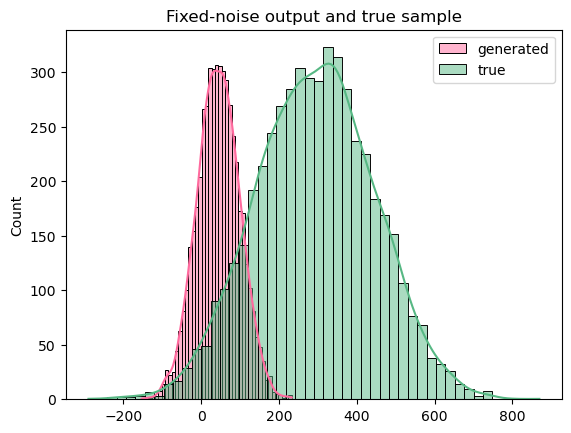

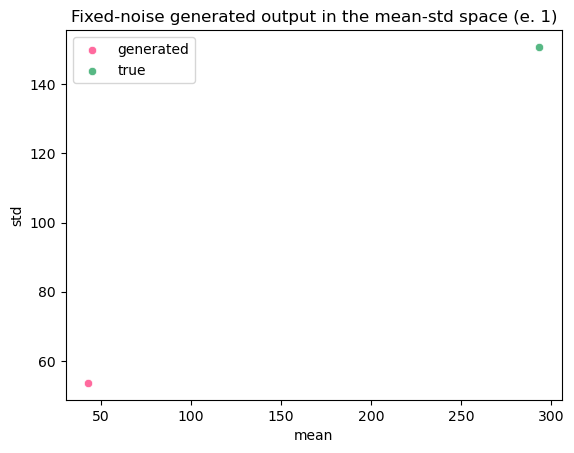

Classifier train:
    5: loss: 0.618, pred: [0.527, 0.447, 0.449]
    10: loss: 0.539, pred: [0.572, 0.405, 0.406]
    15: loss: 0.474, pred: [0.612, 0.366, 0.367]
    20: loss: 0.418, pred: [0.649, 0.331, 0.332]
Generator training: (lr=0.93)
    SE 1: loss: 1.095, pred: 0.335
### Epoch: 2
 train loss = 0.8161, pred = 0.4422, wass_d = 211.6347
output mean: 81.85 std: 108.04
ground mean: 293.48 std: 150.74


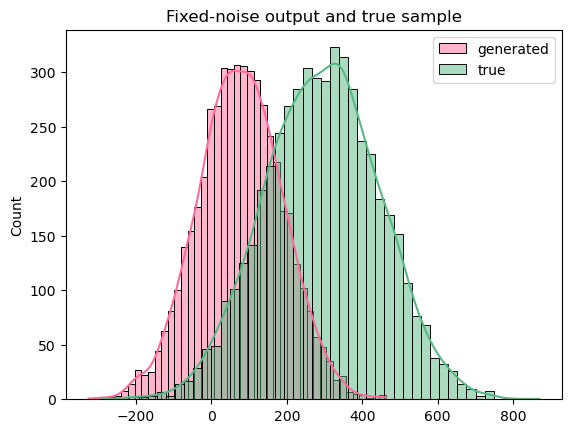

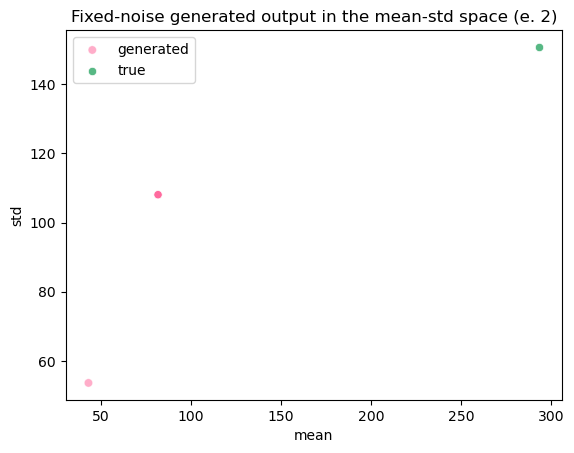

Classifier train:
    5: loss: 0.594, pred: [0.556, 0.448, 0.448, 0.458]
    10: loss: 0.519, pred: [0.598, 0.406, 0.405, 0.415]
    15: loss: 0.457, pred: [0.637, 0.367, 0.367, 0.375]
    20: loss: 0.403, pred: [0.671, 0.332, 0.332, 0.34]
Generator training: (lr=0.865)
    SE 1: loss: 1.09, pred: 0.336
### Epoch: 3
 train loss = 0.8614, pred = 0.4226, wass_d = 205.7780
output mean: 87.71 std: 164.42
ground mean: 293.48 std: 150.74


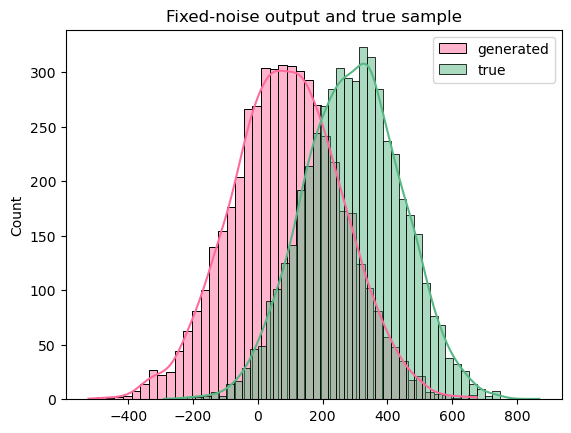

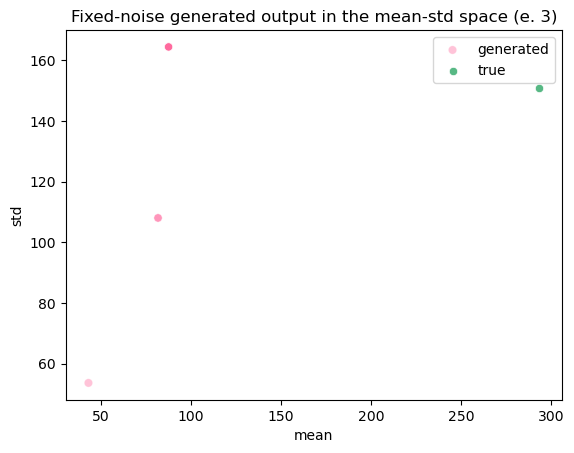

Classifier train:
    5: loss: 0.603, pred: [0.54, 0.451, 0.447, 0.438, 0.444]
    10: loss: 0.527, pred: [0.584, 0.408, 0.404, 0.396, 0.402]
    15: loss: 0.463, pred: [0.624, 0.369, 0.366, 0.359, 0.364]
    20: loss: 0.408, pred: [0.659, 0.334, 0.331, 0.324, 0.329]
Generator training: (lr=0.804)
    SE 1: loss: 1.072, pred: 0.342
### Epoch: 4
 train loss = 0.9358, pred = 0.3923, wass_d = 165.4155
output mean: 128.08 std: 184.74
ground mean: 293.48 std: 150.74


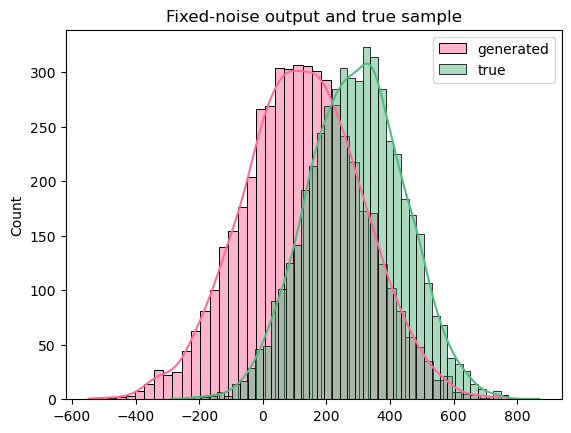

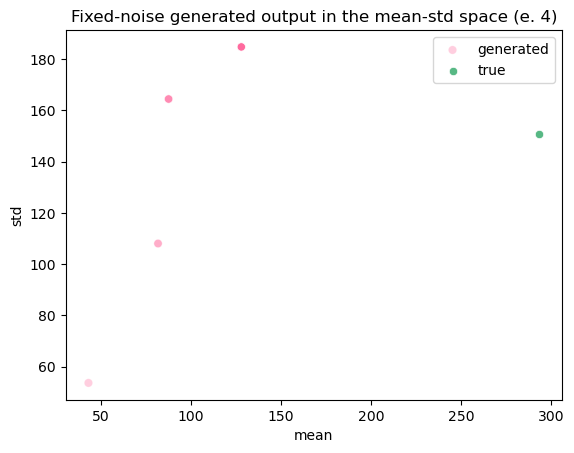

Classifier train:
    5: loss: 0.619, pred: [0.535, 0.46, 0.461, 0.451, 0.453, 0.467]
    10: loss: 0.541, pred: [0.58, 0.416, 0.417, 0.409, 0.402, 0.43]
    15: loss: 0.475, pred: [0.62, 0.377, 0.378, 0.371, 0.358, 0.395]
    20: loss: 0.419, pred: [0.656, 0.341, 0.342, 0.337, 0.32, 0.361]
Generator training: (lr=0.748)
    SE 1: loss: 1.053, pred: 0.349
### Epoch: 5
 train loss = 0.9550, pred = 0.3848, wass_d = 141.6856
output mean: 151.84 std: 191.25
ground mean: 293.48 std: 150.74


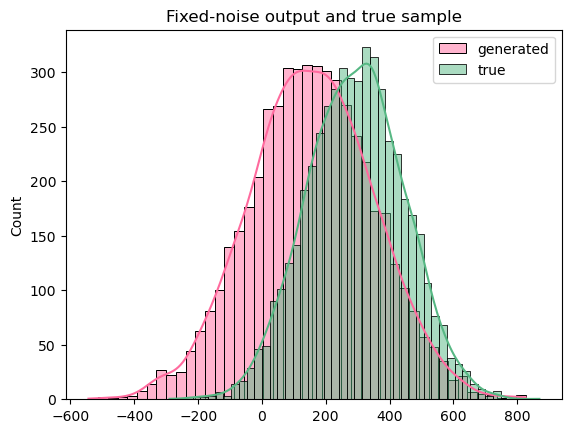

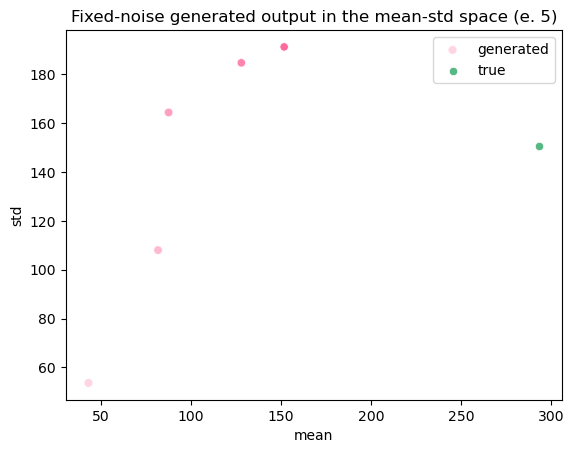

Classifier train:
    5: loss: 0.602, pred: [0.547, 0.451, 0.444, 0.448, 0.442, 0.459, 0.466]
    10: loss: 0.527, pred: [0.59, 0.408, 0.402, 0.407, 0.39, 0.417, 0.43]
    15: loss: 0.463, pred: [0.629, 0.369, 0.363, 0.369, 0.346, 0.379, 0.395]
    20: loss: 0.408, pred: [0.665, 0.334, 0.329, 0.335, 0.309, 0.343, 0.361]
Generator training: (lr=0.696)
    SE 1: loss: 0.993, pred: 0.37
### Epoch: 6
 train loss = 0.8798, pred = 0.4149, wass_d = 110.7674
output mean: 183.06 std: 191.79
ground mean: 293.48 std: 150.74


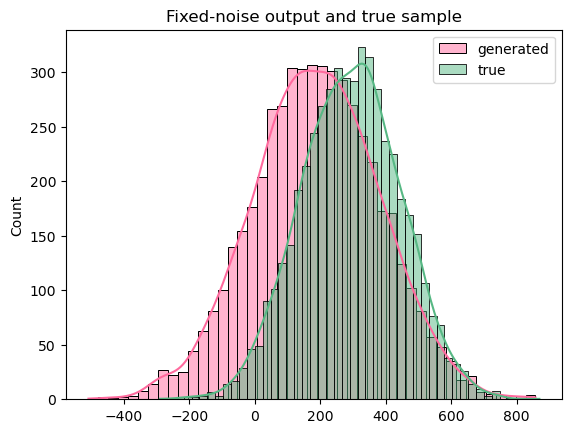

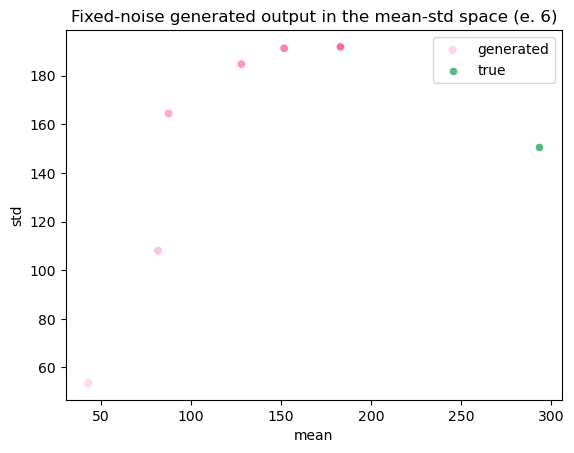

Classifier train:
    5: loss: 0.601, pred: [0.545, 0.467, 0.451, 0.436, 0.425, 0.441, 0.448, 0.466]
    10: loss: 0.526, pred: [0.588, 0.422, 0.408, 0.396, 0.375, 0.395, 0.406, 0.437]
    15: loss: 0.462, pred: [0.627, 0.381, 0.369, 0.361, 0.334, 0.354, 0.365, 0.405]
    20: loss: 0.408, pred: [0.663, 0.345, 0.334, 0.327, 0.302, 0.317, 0.328, 0.373]
Generator training: (lr=0.647)
    SE 1: loss: 0.964, pred: 0.381
### Epoch: 7
 train loss = 0.7868, pred = 0.4553, wass_d = 67.5052
output mean: 226.39 std: 175.84
ground mean: 293.48 std: 150.74


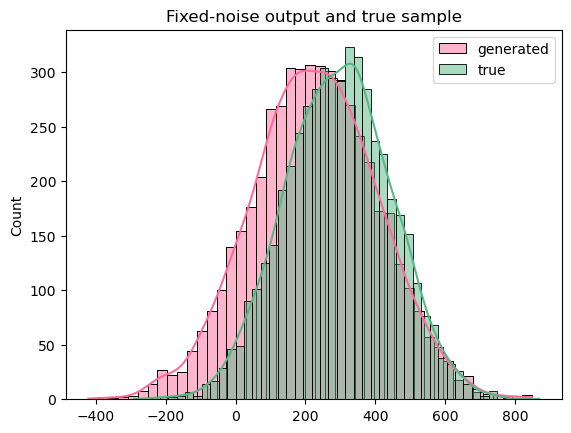

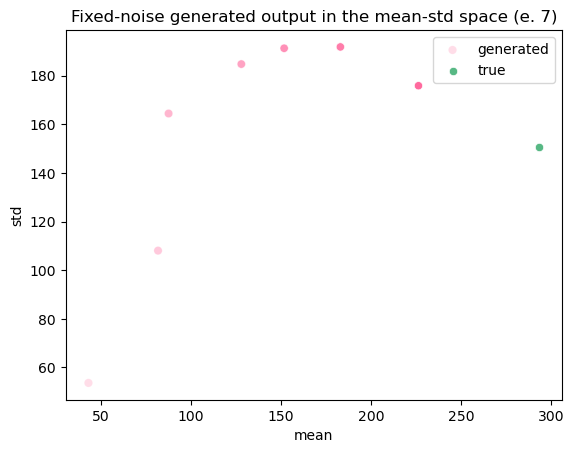

Classifier train:
    5: loss: 0.609, pred: [0.55, 0.445, 0.457, 0.457, 0.448, 0.457, 0.462, 0.477, 0.498]
    10: loss: 0.534, pred: [0.593, 0.402, 0.413, 0.415, 0.4, 0.407, 0.412, 0.435, 0.469]
    15: loss: 0.469, pred: [0.632, 0.363, 0.373, 0.376, 0.366, 0.364, 0.367, 0.393, 0.433]
    20: loss: 0.413, pred: [0.667, 0.329, 0.338, 0.34, 0.337, 0.327, 0.327, 0.355, 0.397]
Generator training: (lr=0.602)
    SE 1: loss: 0.932, pred: 0.394
### Epoch: 8
 train loss = 0.6531, pred = 0.5204, wass_d = 45.6480
output mean: 268.10 std: 201.15
ground mean: 293.48 std: 150.74


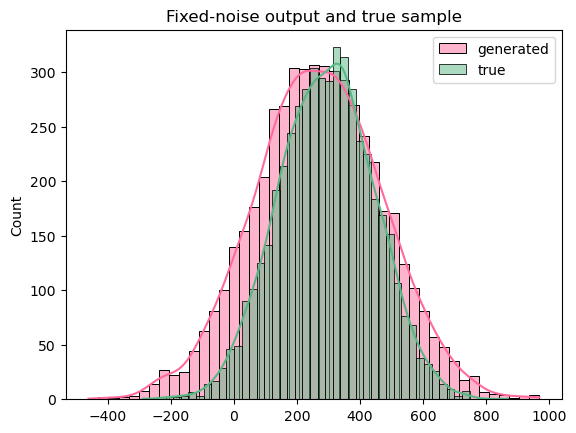

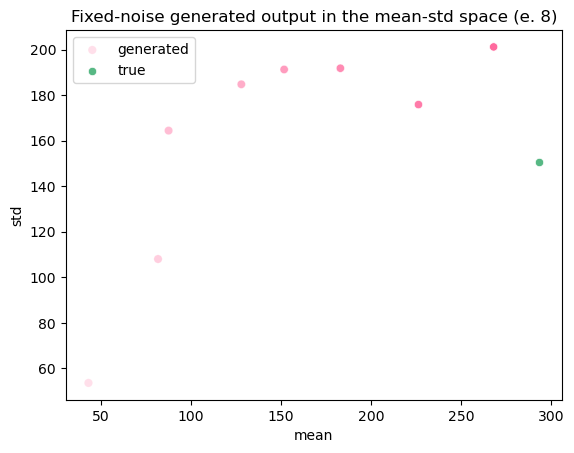

Classifier train:
    5: loss: 0.597, pred: [0.556, 0.445, 0.439, 0.44, 0.429, 0.443, 0.446, 0.464, 0.495, 0.493]
    10: loss: 0.524, pred: [0.598, 0.401, 0.396, 0.4, 0.385, 0.395, 0.392, 0.418, 0.468, 0.455]
    15: loss: 0.461, pred: [0.636, 0.363, 0.358, 0.362, 0.355, 0.357, 0.346, 0.373, 0.436, 0.413]
    20: loss: 0.407, pred: [0.671, 0.328, 0.324, 0.327, 0.327, 0.323, 0.304, 0.332, 0.405, 0.375]
Generator training: (lr=0.56)
    SE 1: loss: 0.885, pred: 0.413
### Epoch: 9
 train loss = 0.2436, pred = 0.7838, wass_d = 20.2582
output mean: 295.53 std: 126.14
ground mean: 293.48 std: 150.74


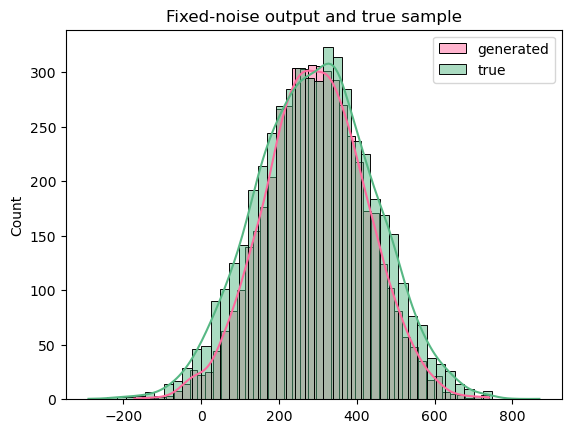

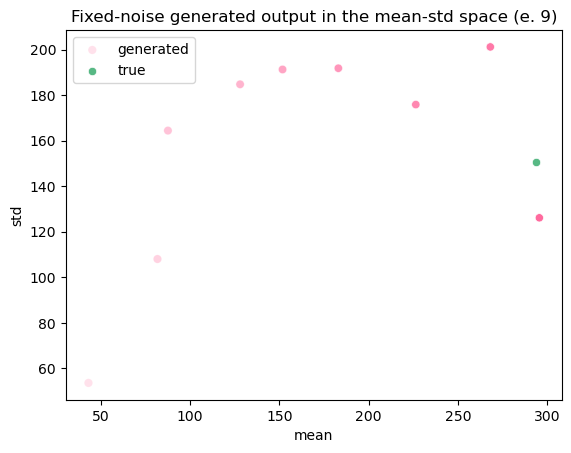

Classifier train:
    5: loss: 0.624, pred: [0.544, 0.444, 0.461, 0.459, 0.442, 0.45, 0.457, 0.471, 0.49, 0.51, 0.532]
    10: loss: 0.553, pred: [0.583, 0.398, 0.411, 0.425, 0.389, 0.392, 0.4, 0.422, 0.45, 0.505, 0.519]
    15: loss: 0.487, pred: [0.622, 0.359, 0.369, 0.39, 0.357, 0.348, 0.351, 0.375, 0.402, 0.484, 0.48]
    20: loss: 0.429, pred: [0.659, 0.325, 0.333, 0.354, 0.331, 0.313, 0.31, 0.335, 0.36, 0.449, 0.438]
Generator training: (lr=0.52)
    SE 1: loss: 0.959, pred: 0.383
### Epoch: 10
 train loss = 0.1977, pred = 0.8206, wass_d = 48.3751
output mean: 341.83 std: 146.63
ground mean: 293.48 std: 150.74


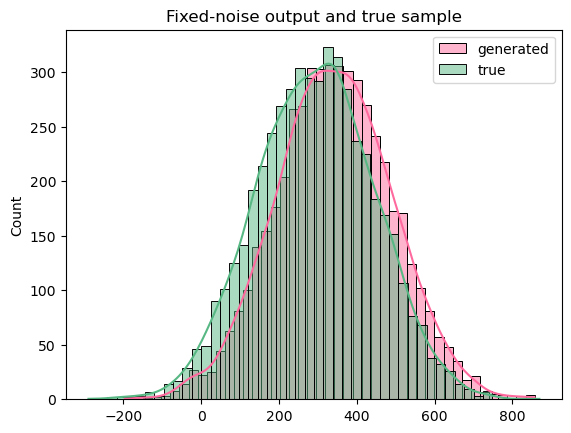

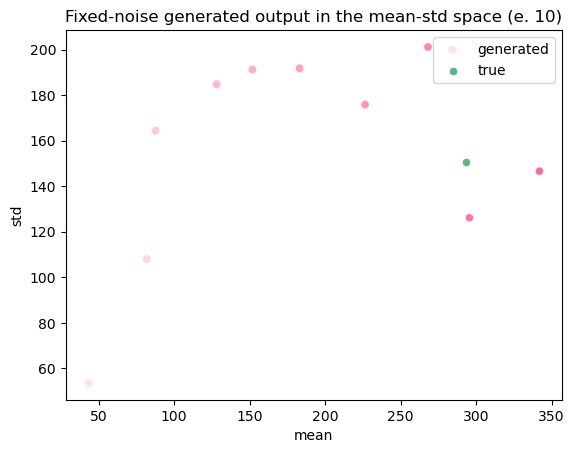

Classifier train:
    5: loss: 0.631, pred: [0.541, 0.462, 0.443, 0.447, 0.433, 0.451, 0.456, 0.475, 0.503, 0.497, 0.541, 0.524]
    10: loss: 0.564, pred: [0.578, 0.411, 0.394, 0.415, 0.363, 0.392, 0.398, 0.439, 0.496, 0.469, 0.537, 0.495]
    15: loss: 0.496, pred: [0.617, 0.37, 0.354, 0.38, 0.32, 0.347, 0.346, 0.401, 0.475, 0.43, 0.491, 0.446]
    20: loss: 0.437, pred: [0.653, 0.335, 0.32, 0.343, 0.293, 0.313, 0.302, 0.364, 0.445, 0.388, 0.442, 0.406]
Generator training: (lr=0.484)
    SE 1: loss: 0.875, pred: 0.417
### Epoch: 11
 train loss = 0.6325, pred = 0.5312, wass_d = 16.3152
output mean: 309.79 std: 153.07
ground mean: 293.48 std: 150.74


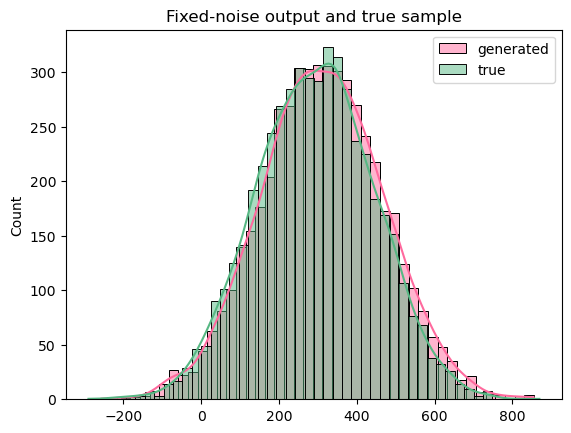

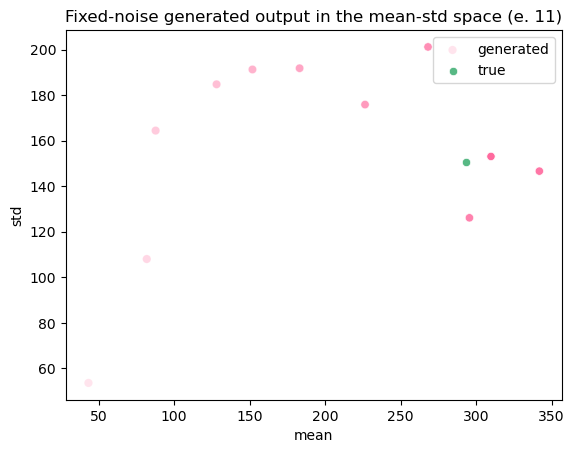

Classifier train:
    5: loss: 0.646, pred: [0.529, 0.46, 0.452, 0.466, 0.444, 0.459, 0.462, 0.479, 0.503, 0.49, 0.526, 0.501, 0.516]
    10: loss: 0.58, pred: [0.565, 0.409, 0.402, 0.432, 0.37, 0.4, 0.404, 0.444, 0.5, 0.456, 0.524, 0.458, 0.514]
    15: loss: 0.512, pred: [0.605, 0.368, 0.361, 0.396, 0.324, 0.357, 0.352, 0.408, 0.482, 0.412, 0.478, 0.402, 0.503]
    20: loss: 0.453, pred: [0.642, 0.333, 0.327, 0.359, 0.295, 0.325, 0.308, 0.372, 0.452, 0.367, 0.426, 0.356, 0.49]
Generator training: (lr=0.45)
    SE 1: loss: 0.659, pred: 0.517
### Epoch: 12
 train loss = 0.5884, pred = 0.5552, wass_d = 7.2758
output mean: 294.31 std: 161.05
ground mean: 293.48 std: 150.74


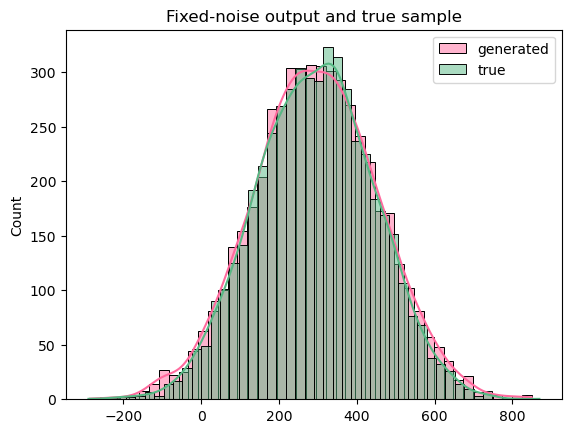

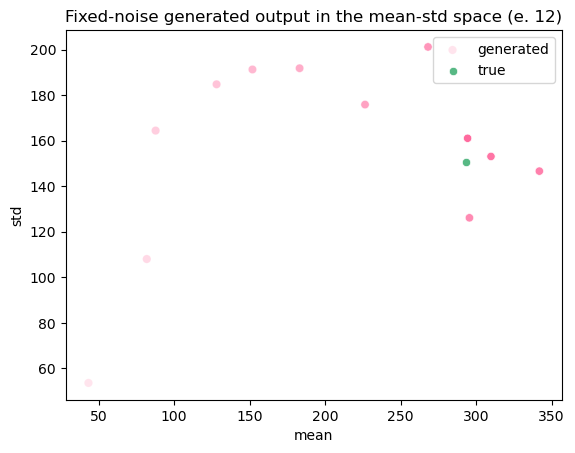

Classifier train:
    5: loss: 0.641, pred: [0.544, 0.451, 0.459, 0.464, 0.442, 0.461, 0.465, 0.484, 0.514, 0.493, 0.548, 0.511, 0.529, 0.531]
    10: loss: 0.577, pred: [0.578, 0.401, 0.407, 0.429, 0.371, 0.402, 0.406, 0.445, 0.507, 0.444, 0.541, 0.46, 0.521, 0.537]
    15: loss: 0.512, pred: [0.615, 0.36, 0.366, 0.391, 0.328, 0.361, 0.355, 0.406, 0.482, 0.385, 0.489, 0.4, 0.503, 0.535]
    20: loss: 0.456, pred: [0.649, 0.325, 0.331, 0.353, 0.3, 0.329, 0.311, 0.367, 0.449, 0.329, 0.432, 0.352, 0.484, 0.528]
Generator training: (lr=0.419)
    SE 1: loss: 0.552, pred: 0.576
### Epoch: 13
 train loss = 0.5010, pred = 0.6059, wass_d = 16.4331
output mean: 278.41 std: 158.16
ground mean: 293.48 std: 150.74


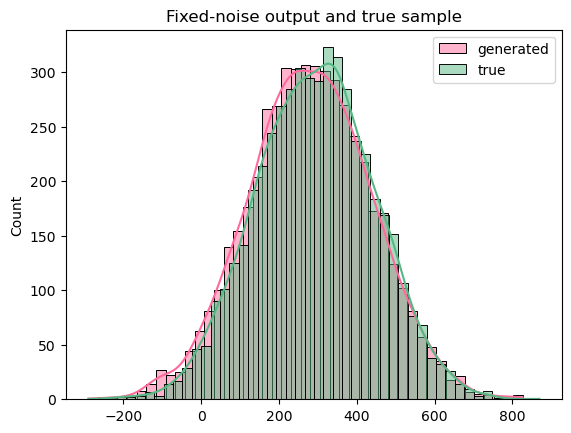

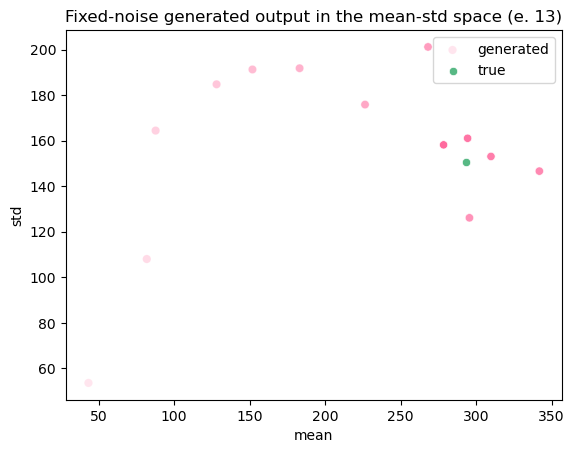

Classifier train:
    5: loss: 0.651, pred: [0.535, 0.448, 0.464, 0.479, 0.452, 0.466, 0.469, 0.484, 0.508, 0.489, 0.534, 0.508, 0.522, 0.523, 0.53]
    10: loss: 0.591, pred: [0.567, 0.397, 0.411, 0.442, 0.384, 0.405, 0.407, 0.44, 0.49, 0.433, 0.526, 0.468, 0.516, 0.525, 0.549]
    15: loss: 0.528, pred: [0.603, 0.357, 0.37, 0.4, 0.346, 0.363, 0.357, 0.397, 0.453, 0.365, 0.469, 0.416, 0.501, 0.516, 0.557]
    20: loss: 0.473, pred: [0.636, 0.322, 0.335, 0.359, 0.32, 0.33, 0.317, 0.357, 0.41, 0.302, 0.408, 0.373, 0.486, 0.502, 0.557]
Generator training: (lr=0.389)
    SE 1: loss: 0.552, pred: 0.576
### Epoch: 14
 train loss = 0.5515, pred = 0.5761, wass_d = 14.2418
output mean: 279.45 std: 153.59
ground mean: 293.48 std: 150.74


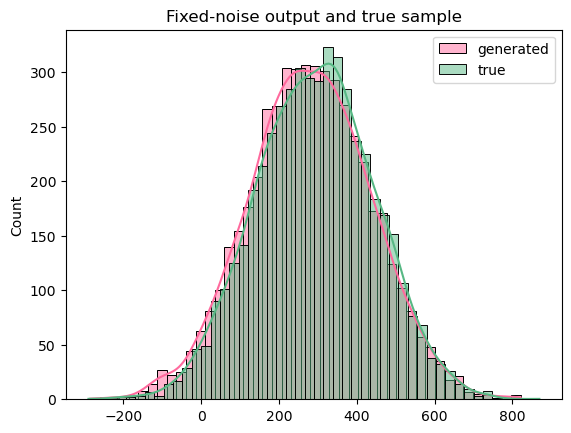

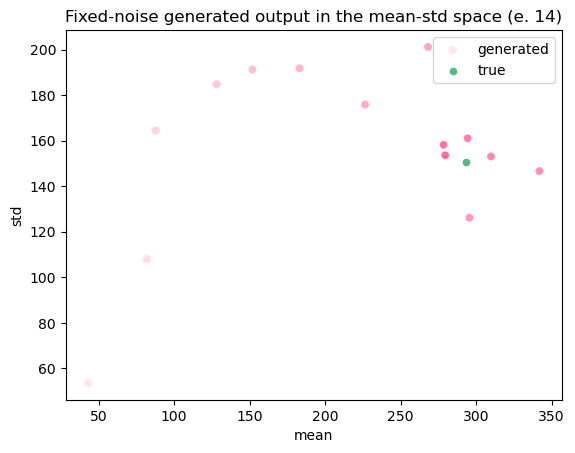

Classifier train:
    5: loss: 0.651, pred: [0.525, 0.452, 0.452, 0.454, 0.433, 0.445, 0.448, 0.464, 0.486, 0.479, 0.525, 0.513, 0.516, 0.514, 0.516, 0.518]
    10: loss: 0.594, pred: [0.557, 0.399, 0.4, 0.422, 0.367, 0.386, 0.386, 0.417, 0.461, 0.425, 0.51, 0.483, 0.512, 0.517, 0.532, 0.53]
    15: loss: 0.533, pred: [0.593, 0.359, 0.36, 0.382, 0.335, 0.348, 0.337, 0.375, 0.416, 0.356, 0.443, 0.437, 0.493, 0.509, 0.539, 0.526]
    20: loss: 0.478, pred: [0.626, 0.324, 0.326, 0.342, 0.312, 0.318, 0.298, 0.337, 0.366, 0.294, 0.378, 0.397, 0.473, 0.496, 0.538, 0.515]
Generator training: (lr=0.362)
    SE 1: loss: 0.639, pred: 0.528
### Epoch: 15
 train loss = 0.6194, pred = 0.5383, wass_d = 7.0598
output mean: 287.34 std: 155.35
ground mean: 293.48 std: 150.74


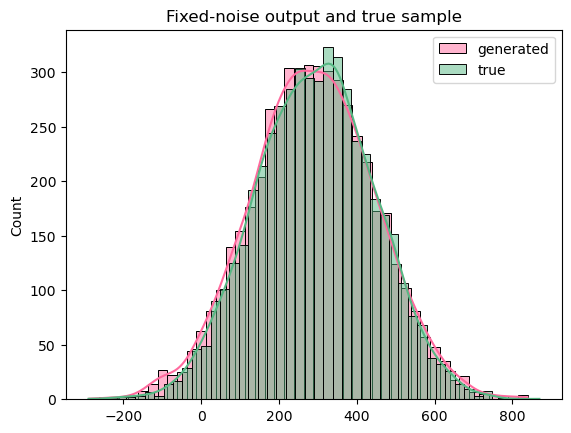

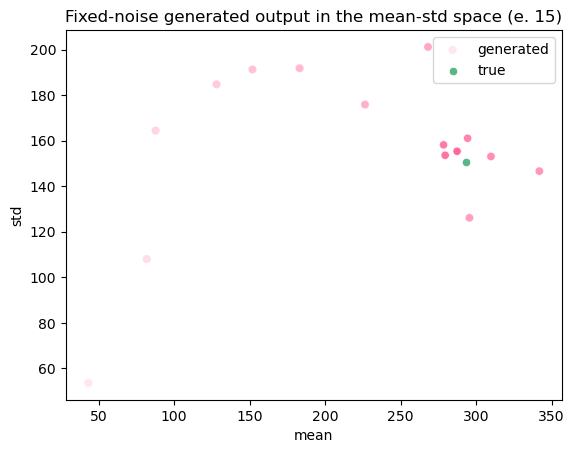

Classifier train:
    5: loss: 0.647, pred: [0.543, 0.44, 0.448, 0.459, 0.436, 0.451, 0.455, 0.474, 0.5, 0.493, 0.54, 0.53, 0.534, 0.532, 0.534, 0.534, 0.535]
    10: loss: 0.59, pred: [0.573, 0.388, 0.395, 0.423, 0.373, 0.392, 0.389, 0.423, 0.465, 0.428, 0.511, 0.495, 0.522, 0.529, 0.544, 0.539, 0.542]
    15: loss: 0.53, pred: [0.607, 0.35, 0.356, 0.381, 0.344, 0.356, 0.339, 0.38, 0.412, 0.353, 0.437, 0.448, 0.498, 0.516, 0.546, 0.524, 0.539]
    20: loss: 0.477, pred: [0.639, 0.316, 0.322, 0.341, 0.32, 0.328, 0.298, 0.341, 0.358, 0.286, 0.369, 0.406, 0.473, 0.5, 0.542, 0.504, 0.533]
Generator training: (lr=0.337)
    SE 1: loss: 0.43, pred: 0.651
### Epoch: 16
 train loss = 0.4014, pred = 0.6694, wass_d = 15.2251
output mean: 279.04 std: 156.00
ground mean: 293.48 std: 150.74


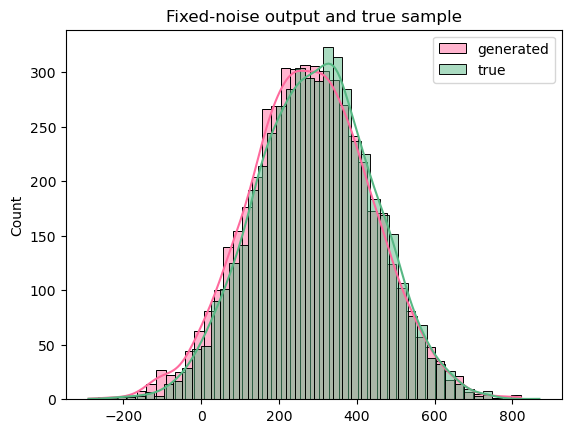

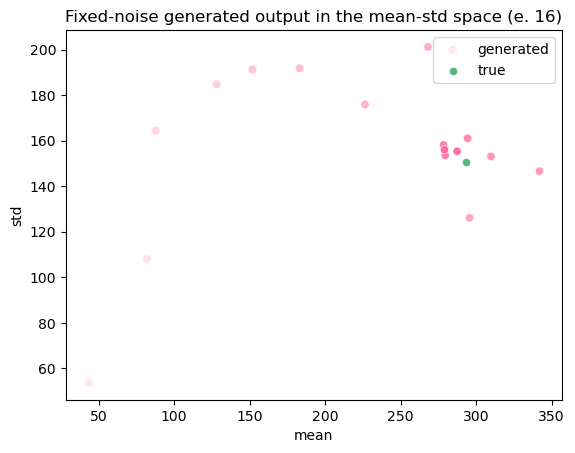

Classifier train:
    5: loss: 0.659, pred: [0.505, 0.446, 0.444, 0.43, 0.415, 0.426, 0.43, 0.444, 0.464, 0.463, 0.508, 0.504, 0.501, 0.495, 0.494, 0.497, 0.498, 0.499]
    10: loss: 0.612, pred: [0.532, 0.393, 0.393, 0.399, 0.355, 0.367, 0.368, 0.394, 0.432, 0.409, 0.506, 0.497, 0.503, 0.497, 0.502, 0.505, 0.509, 0.524]
    15: loss: 0.556, pred: [0.566, 0.352, 0.352, 0.363, 0.329, 0.328, 0.319, 0.348, 0.38, 0.334, 0.448, 0.464, 0.487, 0.484, 0.498, 0.496, 0.51, 0.553]
    20: loss: 0.504, pred: [0.601, 0.317, 0.319, 0.321, 0.316, 0.3, 0.282, 0.309, 0.324, 0.267, 0.382, 0.434, 0.47, 0.466, 0.487, 0.478, 0.508, 0.569]
Generator training: (lr=0.313)
    SE 1: loss: 0.944, pred: 0.389
### Epoch: 17
 train loss = 0.8997, pred = 0.4067, wass_d = 5.2684
output mean: 289.85 std: 154.80
ground mean: 293.48 std: 150.74


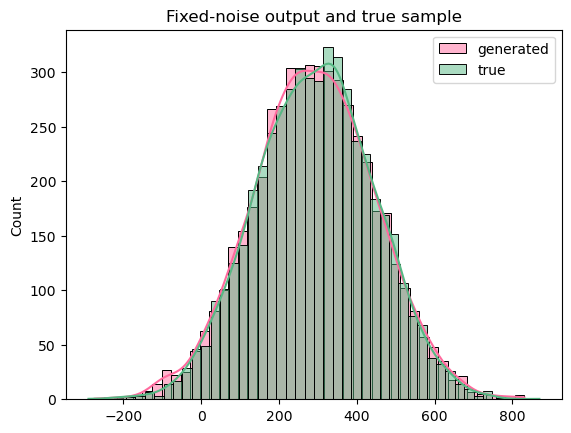

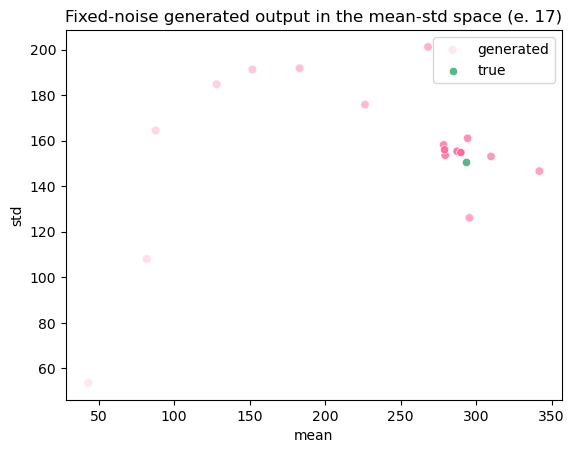

Classifier train:
    5: loss: 0.657, pred: [0.523, 0.447, 0.445, 0.447, 0.435, 0.447, 0.449, 0.464, 0.484, 0.48, 0.519, 0.516, 0.515, 0.513, 0.514, 0.514, 0.516, 0.52, 0.509]
    10: loss: 0.605, pred: [0.552, 0.393, 0.392, 0.413, 0.376, 0.387, 0.383, 0.408, 0.44, 0.414, 0.496, 0.502, 0.509, 0.509, 0.518, 0.513, 0.521, 0.549, 0.487]
    15: loss: 0.547, pred: [0.585, 0.354, 0.354, 0.369, 0.351, 0.352, 0.335, 0.362, 0.381, 0.337, 0.43, 0.471, 0.489, 0.493, 0.511, 0.496, 0.518, 0.575, 0.439]
    20: loss: 0.495, pred: [0.617, 0.319, 0.321, 0.327, 0.332, 0.322, 0.297, 0.321, 0.323, 0.269, 0.368, 0.439, 0.467, 0.473, 0.499, 0.474, 0.512, 0.589, 0.391]
Generator training: (lr=0.291)
    SE 1: loss: 0.679, pred: 0.507
### Epoch: 18
 train loss = 0.6428, pred = 0.5258, wass_d = 6.2002
output mean: 297.49 std: 157.34
ground mean: 293.48 std: 150.74


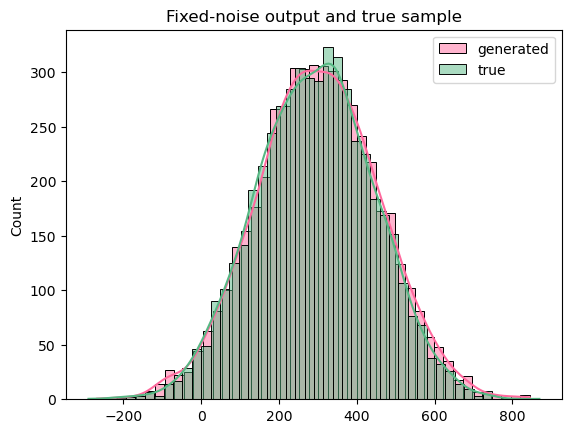

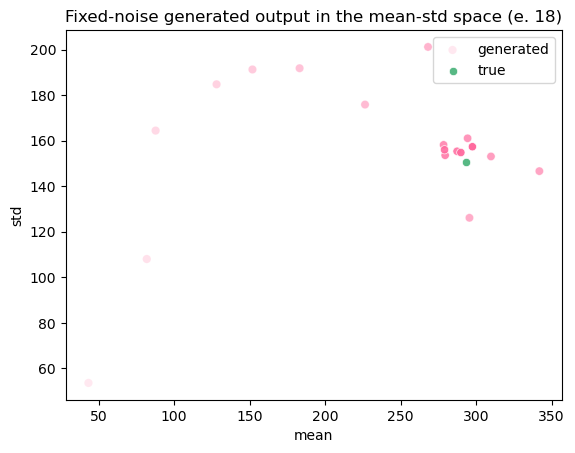

Classifier train:
    5: loss: 0.658, pred: [0.514, 0.453, 0.444, 0.439, 0.419, 0.431, 0.434, 0.449, 0.472, 0.464, 0.517, 0.507, 0.507, 0.503, 0.504, 0.506, 0.506, 0.51, 0.501, 0.507]
    10: loss: 0.609, pred: [0.542, 0.398, 0.39, 0.407, 0.359, 0.371, 0.368, 0.395, 0.434, 0.397, 0.502, 0.489, 0.499, 0.498, 0.509, 0.508, 0.512, 0.54, 0.481, 0.512]
    15: loss: 0.552, pred: [0.576, 0.357, 0.351, 0.366, 0.336, 0.335, 0.321, 0.35, 0.379, 0.315, 0.437, 0.454, 0.477, 0.48, 0.503, 0.492, 0.507, 0.568, 0.434, 0.509]
    20: loss: 0.5, pred: [0.608, 0.322, 0.318, 0.324, 0.319, 0.306, 0.283, 0.311, 0.323, 0.244, 0.373, 0.42, 0.453, 0.457, 0.49, 0.469, 0.498, 0.584, 0.386, 0.503]
Generator training: (lr=0.271)
    SE 1: loss: 0.84, pred: 0.432
### Epoch: 19
 train loss = 0.8248, pred = 0.4383, wass_d = 11.0098
output mean: 304.40 std: 154.03
ground mean: 293.48 std: 150.74


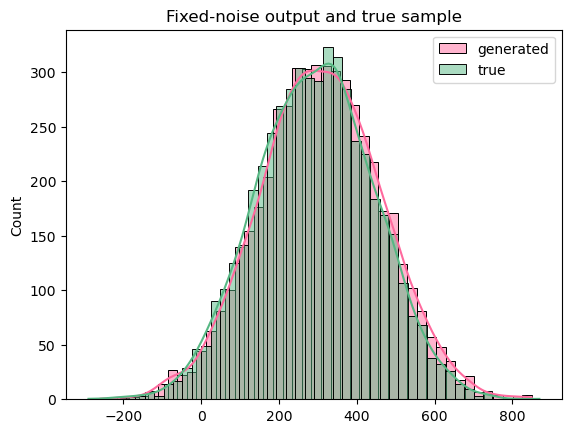

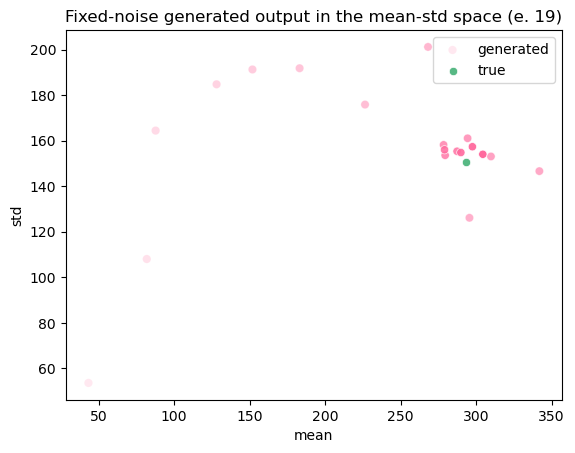

Classifier train:
    5: loss: 0.663, pred: [0.511, 0.452, 0.454, 0.442, 0.429, 0.44, 0.441, 0.454, 0.474, 0.466, 0.512, 0.505, 0.503, 0.5, 0.501, 0.502, 0.503, 0.507, 0.498, 0.504, 0.503]
    10: loss: 0.612, pred: [0.54, 0.397, 0.399, 0.409, 0.367, 0.379, 0.375, 0.401, 0.437, 0.393, 0.494, 0.481, 0.492, 0.493, 0.509, 0.502, 0.508, 0.54, 0.475, 0.508, 0.49]
    15: loss: 0.554, pred: [0.574, 0.356, 0.359, 0.366, 0.341, 0.343, 0.329, 0.356, 0.383, 0.309, 0.428, 0.447, 0.466, 0.473, 0.503, 0.483, 0.503, 0.569, 0.424, 0.505, 0.456]
    20: loss: 0.5, pred: [0.608, 0.321, 0.326, 0.324, 0.323, 0.313, 0.292, 0.318, 0.329, 0.238, 0.365, 0.414, 0.44, 0.448, 0.49, 0.456, 0.494, 0.584, 0.375, 0.498, 0.417]
Generator training: (lr=0.252)
    SE 1: loss: 0.854, pred: 0.426
### Epoch: 20
 train loss = 0.7978, pred = 0.4503, wass_d = 10.4682
output mean: 303.82 std: 147.93
ground mean: 293.48 std: 150.74


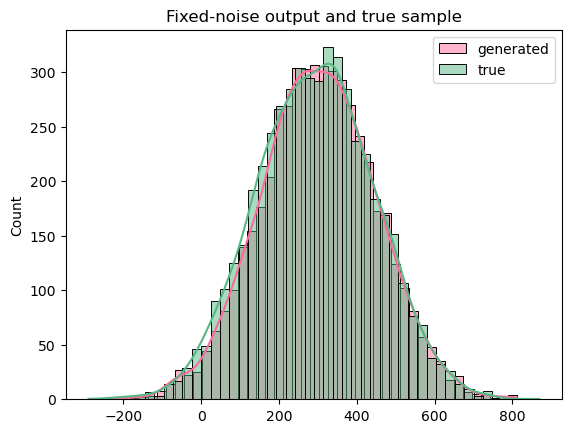

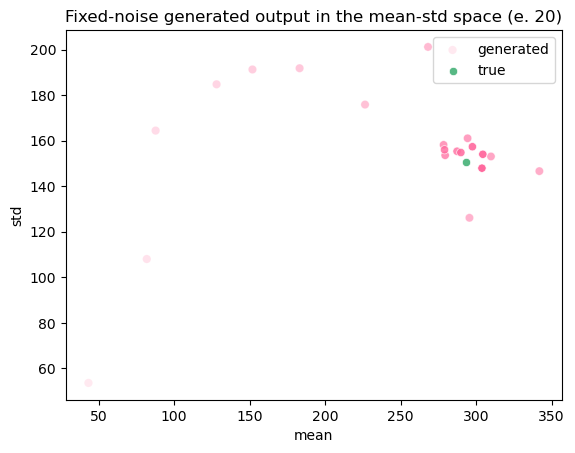

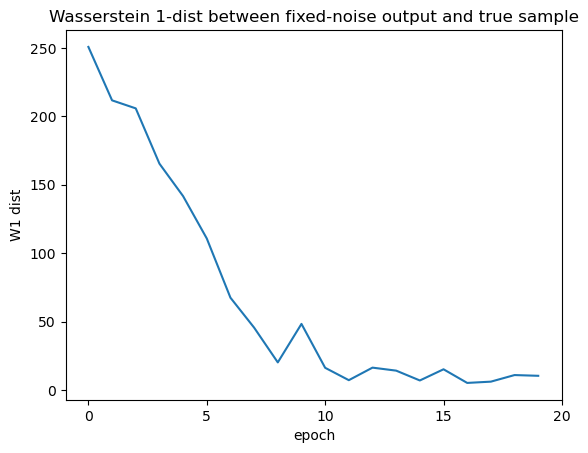

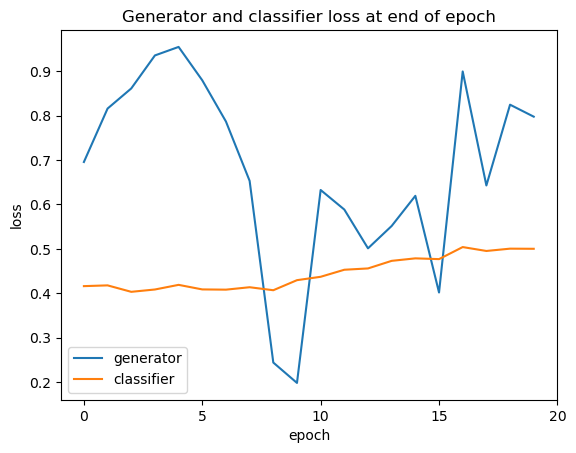

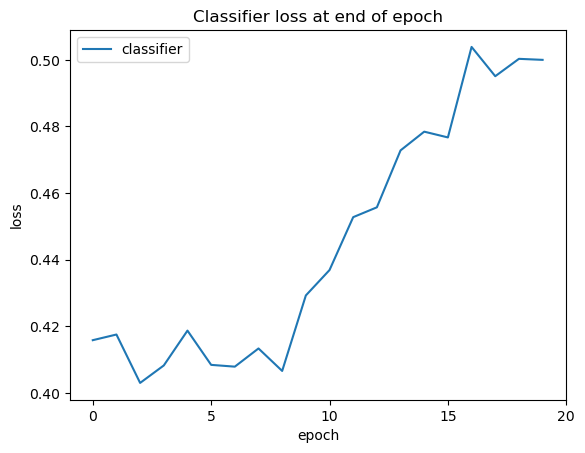

In [ ]:
noise_dim = 1
n_dim = 1
samples_per_dist = 5_000

mean = 300
std = 150

ground_dist = distributions.Normal.rand_unf(
    1, noise_dim, mean, std, subclass="normal"
)

ground_dist.sample(samples_per_dist)

ground_sample = ground_dist.samples

n_kme_features = 200
n_features = 200

kme_rff_encoder = RffEncoder(
    n_dim,
    n_kme_features,
    kernel="gaussian",
    log_amplitude=1.0,
    log_length_scale=4.0,
)

reg_rff_encoder = RffEncoder(
    n_kme_features,
    n_features,
    kernel="gaussian",
    log_amplitude=0.0,
    log_length_scale=0.0,
)


noise_dim = n_dim

fixed_noise_dists = distributions.Normal.rand_unf(
    1, noise_dim, 0, 1, subclass="normal"
)
fixed_noise_dists.sample(samples_per_dist)

noise_dists = distributions.Normal.rand_unf(
    1, noise_dim, 0, 1, subclass="normal"
)
noise_dists.sample(samples_per_dist)

gan_dist_set = GanDistributionSet(
    kme_rff_encoder,
    reg_rff_encoder,
    ground_sample,
    noise_dists,
    fixed_noise_dists,
    samples_per_dist,
)

generator = Generator(noise_dim, n_dim, bias=True)
generator_opt = torch.optim.Adam(
    generator.parameters(), lr=1.0, betas=(0.5, 0.999)
)
generator_scheduler = torch.optim.lr_scheduler.ExponentialLR(
    generator_opt, gamma=0.93
)
gen_epochs = 50

classifier_lr = 0.001

train_gan(
    gan_dist_set,
    classifier_lr,
    generator,
    generator_opt,
    generator_scheduler,
    n_features,
    20,
    20,
    gen_epochs,
    verbose=True,
    save_plots=True,
    resample_each_subepoch=False,
    print_output_params=True,
)

#### Learn Gamma distribution

Classifier train:
    5: loss: 0.613, pred: [0.536, 0.453]
    10: loss: 0.536, pred: [0.58, 0.41]
    15: loss: 0.471, pred: [0.62, 0.371]
Generator training: (lr=0.15)
    SE 1: loss: 0.992, pred: 0.371
### Epoch: 1
 train loss = 0.9917, pred = 0.3709, wass_d = 300.4960
output mean: 2.50 std: 0.75
ground mean: 303.00 std: 150.84


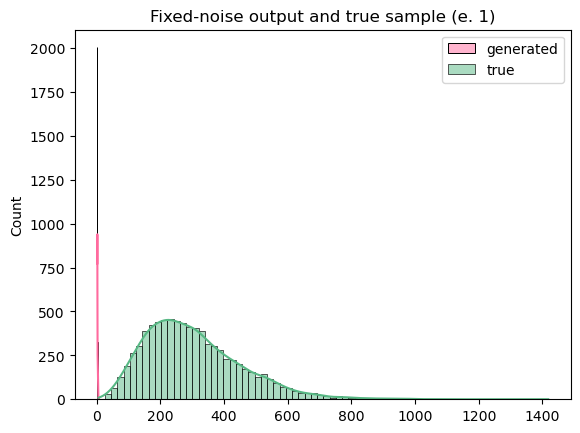

Classifier train:
    5: loss: 0.61, pred: [0.542, 0.456, 0.456]
    10: loss: 0.533, pred: [0.586, 0.412, 0.413]
    15: loss: 0.468, pred: [0.625, 0.373, 0.373]
Generator training: (lr=0.15)
    SE 1: loss: 0.985, pred: 0.373
### Epoch: 2
 train loss = 0.9851, pred = 0.3734, wass_d = 297.2752
output mean: 5.72 std: 1.93
ground mean: 303.00 std: 150.84


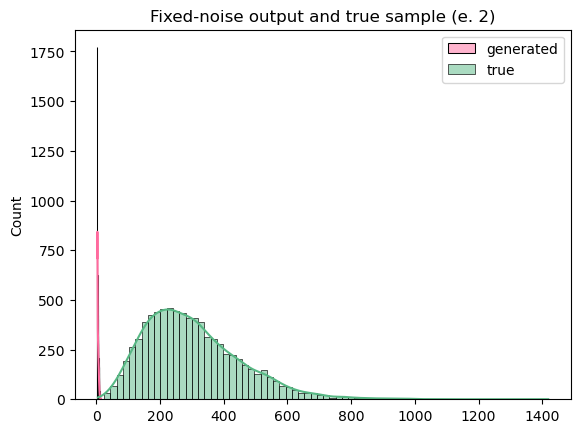

Classifier train:
    5: loss: 0.597, pred: [0.549, 0.447, 0.447, 0.45]
    10: loss: 0.522, pred: [0.592, 0.405, 0.404, 0.407]
    15: loss: 0.459, pred: [0.631, 0.366, 0.366, 0.368]
Generator training: (lr=0.15)
    SE 1: loss: 0.998, pred: 0.368
### Epoch: 3
 train loss = 0.9984, pred = 0.3685, wass_d = 292.6018
output mean: 10.40 std: 3.90
ground mean: 303.00 std: 150.84


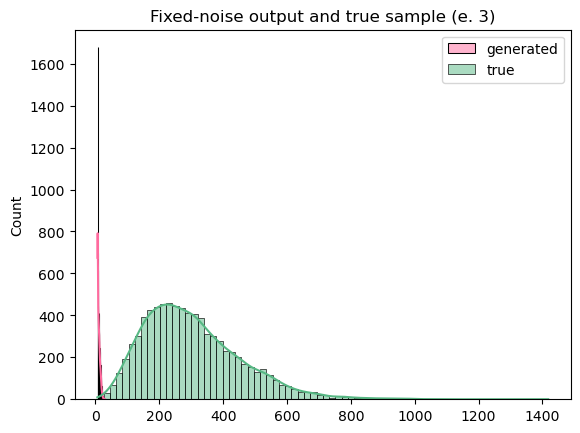

Classifier train:
    5: loss: 0.596, pred: [0.542, 0.441, 0.439, 0.438, 0.44]
    10: loss: 0.521, pred: [0.585, 0.399, 0.397, 0.395, 0.398]
    15: loss: 0.458, pred: [0.625, 0.362, 0.358, 0.357, 0.361]
Generator training: (lr=0.15)
    SE 1: loss: 1.019, pred: 0.361
### Epoch: 4
 train loss = 1.0193, pred = 0.3609, wass_d = 286.0361
output mean: 16.96 std: 6.68
ground mean: 303.00 std: 150.84


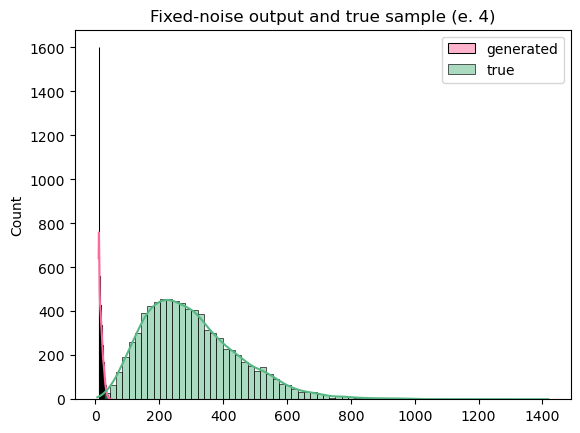

Classifier train:
    5: loss: 0.615, pred: [0.544, 0.464, 0.464, 0.463, 0.463, 0.464]
    10: loss: 0.538, pred: [0.588, 0.421, 0.42, 0.418, 0.418, 0.421]
    15: loss: 0.472, pred: [0.627, 0.381, 0.38, 0.378, 0.377, 0.381]
Generator training: (lr=0.15)
    SE 1: loss: 0.965, pred: 0.381
### Epoch: 5
 train loss = 0.9647, pred = 0.3811, wass_d = 278.0749
output mean: 24.93 std: 10.26
ground mean: 303.00 std: 150.84


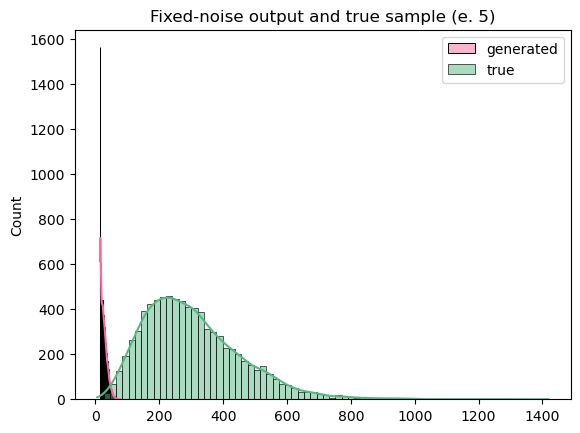

Classifier train:
    5: loss: 0.614, pred: [0.541, 0.461, 0.46, 0.459, 0.457, 0.457, 0.459]
    10: loss: 0.536, pred: [0.585, 0.418, 0.416, 0.415, 0.413, 0.413, 0.416]
    15: loss: 0.471, pred: [0.624, 0.378, 0.376, 0.375, 0.374, 0.373, 0.376]
Generator training: (lr=0.15)
    SE 1: loss: 0.978, pred: 0.376
### Epoch: 6
 train loss = 0.9776, pred = 0.3762, wass_d = 268.3358
output mean: 34.67 std: 12.18
ground mean: 303.00 std: 150.84


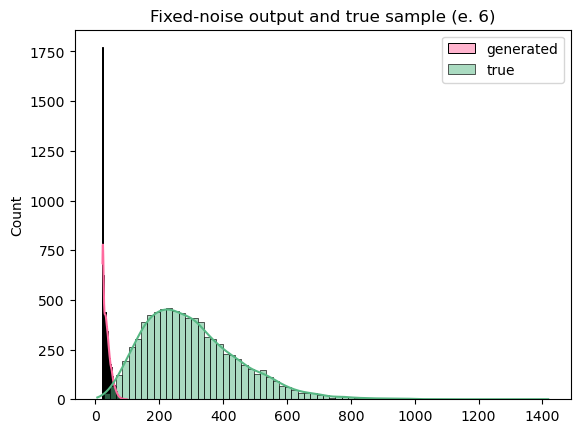

Classifier train:
    5: loss: 0.604, pred: [0.552, 0.462, 0.461, 0.46, 0.459, 0.457, 0.454, 0.453]
    10: loss: 0.528, pred: [0.594, 0.418, 0.417, 0.416, 0.416, 0.414, 0.41, 0.411]
    15: loss: 0.464, pred: [0.633, 0.378, 0.377, 0.376, 0.376, 0.375, 0.37, 0.372]
Generator training: (lr=0.15)
    SE 1: loss: 0.989, pred: 0.372
### Epoch: 7
 train loss = 0.9893, pred = 0.3718, wass_d = 256.6032
output mean: 46.42 std: 12.08
ground mean: 303.00 std: 150.84


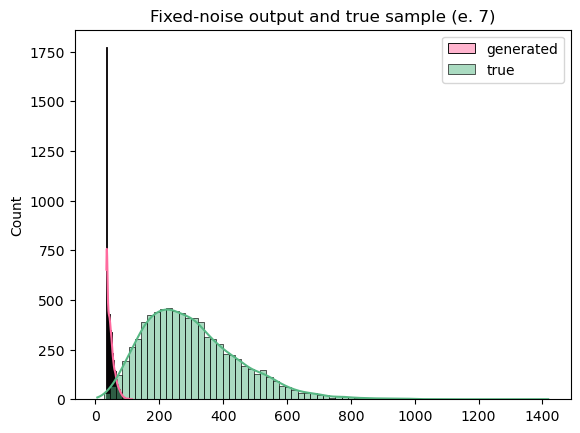

Classifier train:
    5: loss: 0.612, pred: [0.542, 0.454, 0.454, 0.455, 0.457, 0.459, 0.46, 0.459, 0.462]
    10: loss: 0.535, pred: [0.585, 0.412, 0.411, 0.411, 0.413, 0.416, 0.416, 0.414, 0.418]
    15: loss: 0.47, pred: [0.625, 0.373, 0.372, 0.372, 0.374, 0.377, 0.377, 0.374, 0.379]
Generator training: (lr=0.15)
    SE 1: loss: 0.971, pred: 0.379
### Epoch: 8
 train loss = 0.9711, pred = 0.3787, wass_d = 242.3286
output mean: 60.79 std: 11.35
ground mean: 303.00 std: 150.84


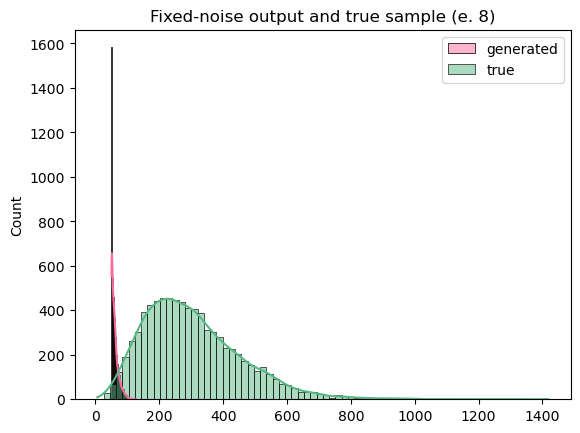

Classifier train:
    5: loss: 0.609, pred: [0.538, 0.455, 0.453, 0.451, 0.45, 0.451, 0.451, 0.45, 0.446, 0.452]
    10: loss: 0.533, pred: [0.582, 0.412, 0.41, 0.408, 0.407, 0.408, 0.409, 0.407, 0.403, 0.41]
    15: loss: 0.468, pred: [0.622, 0.373, 0.371, 0.369, 0.368, 0.369, 0.37, 0.368, 0.364, 0.371]
Generator training: (lr=0.15)
    SE 1: loss: 0.992, pred: 0.371
### Epoch: 9
 train loss = 0.9920, pred = 0.3708, wass_d = 223.6971
output mean: 79.82 std: 11.45
ground mean: 303.00 std: 150.84


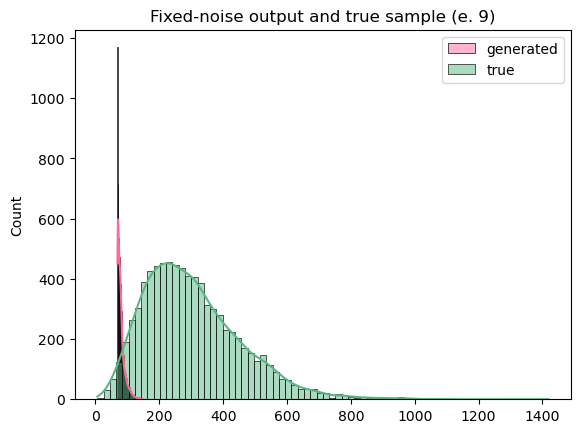

Classifier train:
    5: loss: 0.602, pred: [0.543, 0.441, 0.439, 0.438, 0.439, 0.442, 0.449, 0.456, 0.459, 0.455, 0.454]
    10: loss: 0.526, pred: [0.586, 0.399, 0.397, 0.396, 0.397, 0.401, 0.406, 0.412, 0.417, 0.41, 0.411]
    15: loss: 0.462, pred: [0.626, 0.362, 0.359, 0.358, 0.359, 0.363, 0.367, 0.372, 0.378, 0.371, 0.373]
Generator training: (lr=0.15)
    SE 1: loss: 0.988, pred: 0.372
### Epoch: 10
 train loss = 0.9879, pred = 0.3723, wass_d = 201.1858
output mean: 103.55 std: 11.25
ground mean: 303.00 std: 150.84


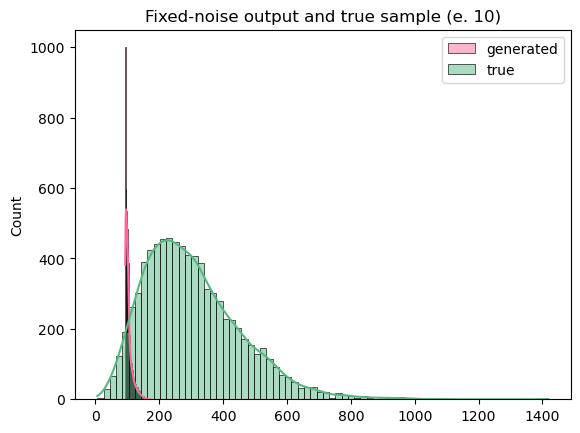

Classifier train:
    5: loss: 0.591, pred: [0.559, 0.443, 0.443, 0.445, 0.447, 0.451, 0.455, 0.458, 0.458, 0.456, 0.454, 0.455]
    10: loss: 0.517, pred: [0.601, 0.401, 0.401, 0.402, 0.405, 0.408, 0.412, 0.414, 0.414, 0.413, 0.41, 0.412]
    15: loss: 0.455, pred: [0.639, 0.363, 0.363, 0.363, 0.366, 0.37, 0.373, 0.375, 0.375, 0.374, 0.371, 0.373]
Generator training: (lr=0.15)
    SE 1: loss: 0.987, pred: 0.373
### Epoch: 11
 train loss = 0.9875, pred = 0.3725, wass_d = 177.6697
output mean: 129.72 std: 13.55
ground mean: 303.00 std: 150.84


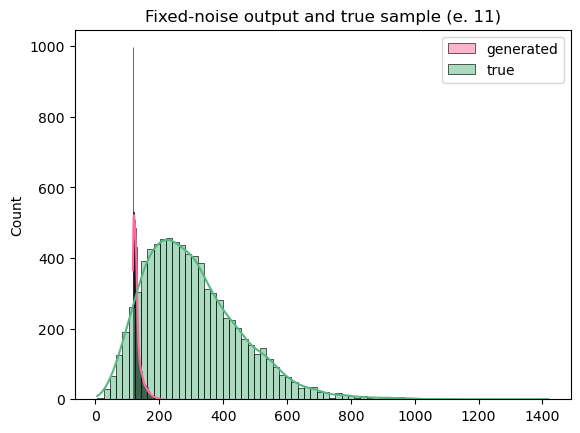

Classifier train:
    5: loss: 0.599, pred: [0.554, 0.468, 0.465, 0.462, 0.457, 0.452, 0.446, 0.442, 0.444, 0.448, 0.459, 0.459, 0.46]
    10: loss: 0.524, pred: [0.597, 0.424, 0.421, 0.417, 0.414, 0.409, 0.404, 0.4, 0.402, 0.405, 0.415, 0.415, 0.416]
    15: loss: 0.46, pred: [0.635, 0.384, 0.381, 0.377, 0.374, 0.371, 0.365, 0.361, 0.364, 0.367, 0.376, 0.375, 0.376]
Generator training: (lr=0.15)
    SE 1: loss: 0.977, pred: 0.377
### Epoch: 12
 train loss = 0.9766, pred = 0.3766, wass_d = 157.2726
output mean: 155.43 std: 13.11
ground mean: 303.00 std: 150.84


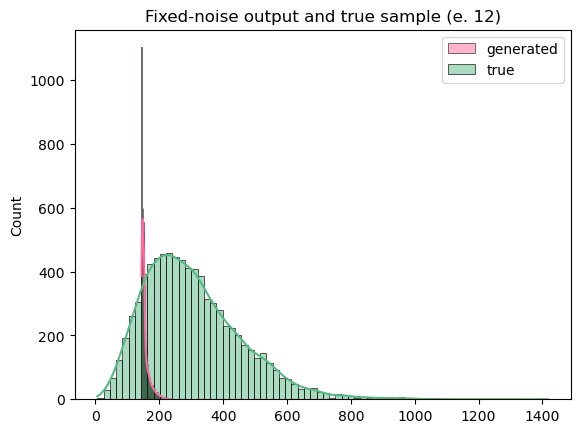

Classifier train:
    5: loss: 0.604, pred: [0.546, 0.454, 0.452, 0.45, 0.449, 0.449, 0.448, 0.448, 0.45, 0.449, 0.449, 0.454, 0.459, 0.471]
    10: loss: 0.528, pred: [0.589, 0.411, 0.409, 0.407, 0.406, 0.406, 0.406, 0.405, 0.407, 0.406, 0.407, 0.411, 0.416, 0.427]
    15: loss: 0.464, pred: [0.628, 0.373, 0.37, 0.368, 0.367, 0.368, 0.367, 0.366, 0.368, 0.368, 0.368, 0.371, 0.376, 0.386]
Generator training: (lr=0.15)
    SE 1: loss: 0.953, pred: 0.386
### Epoch: 13
 train loss = 0.9527, pred = 0.3857, wass_d = 139.3341
output mean: 181.49 std: 14.62
ground mean: 303.00 std: 150.84


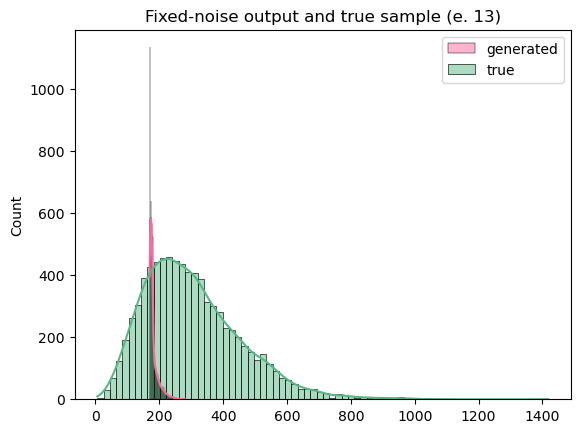

Classifier train:
    5: loss: 0.611, pred: [0.541, 0.461, 0.46, 0.459, 0.459, 0.459, 0.458, 0.457, 0.458, 0.458, 0.452, 0.448, 0.448, 0.446, 0.449]
    10: loss: 0.534, pred: [0.585, 0.418, 0.416, 0.415, 0.415, 0.416, 0.415, 0.413, 0.415, 0.415, 0.409, 0.405, 0.405, 0.404, 0.406]
    15: loss: 0.469, pred: [0.624, 0.379, 0.376, 0.375, 0.375, 0.377, 0.376, 0.374, 0.375, 0.375, 0.37, 0.367, 0.366, 0.365, 0.367]
Generator training: (lr=0.15)
    SE 1: loss: 1.001, pred: 0.368
### Epoch: 14
 train loss = 1.0010, pred = 0.3675, wass_d = 117.2313
output mean: 219.82 std: 19.57
ground mean: 303.00 std: 150.84


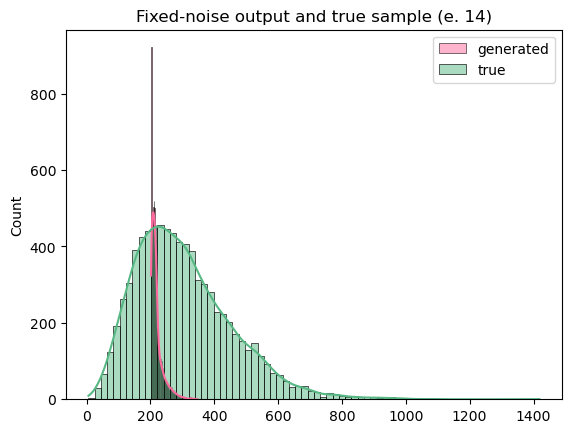

Classifier train:
    5: loss: 0.605, pred: [0.543, 0.451, 0.449, 0.448, 0.448, 0.448, 0.45, 0.454, 0.457, 0.454, 0.444, 0.452, 0.458, 0.45, 0.45, 0.451]
    10: loss: 0.529, pred: [0.587, 0.408, 0.406, 0.405, 0.405, 0.406, 0.407, 0.41, 0.414, 0.411, 0.402, 0.409, 0.414, 0.407, 0.407, 0.408]
    15: loss: 0.464, pred: [0.626, 0.37, 0.367, 0.366, 0.366, 0.368, 0.369, 0.371, 0.375, 0.372, 0.364, 0.37, 0.375, 0.369, 0.368, 0.369]
Generator training: (lr=0.15)
    SE 1: loss: 0.994, pred: 0.37
### Epoch: 15
 train loss = 0.9945, pred = 0.3699, wass_d = 96.7264
output mean: 264.38 std: 31.52
ground mean: 303.00 std: 150.84


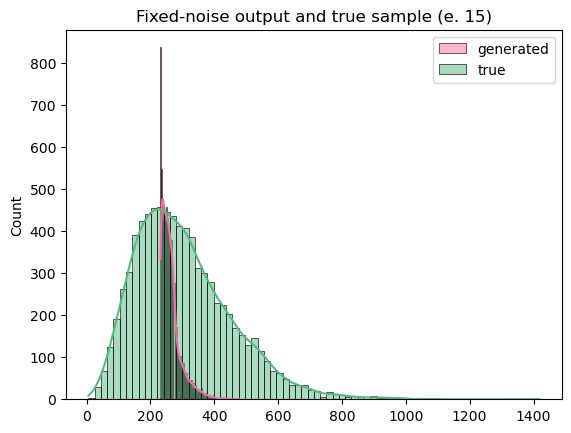

Classifier train:
    5: loss: 0.617, pred: [0.54, 0.467, 0.466, 0.465, 0.466, 0.466, 0.462, 0.458, 0.463, 0.462, 0.449, 0.449, 0.449, 0.462, 0.469, 0.464, 0.464]
    10: loss: 0.539, pred: [0.584, 0.423, 0.421, 0.42, 0.421, 0.422, 0.418, 0.414, 0.419, 0.419, 0.406, 0.407, 0.406, 0.418, 0.424, 0.42, 0.42]
    15: loss: 0.473, pred: [0.623, 0.384, 0.381, 0.379, 0.381, 0.383, 0.379, 0.374, 0.379, 0.379, 0.367, 0.368, 0.367, 0.378, 0.384, 0.38, 0.38]
Generator training: (lr=0.15)
    SE 1: loss: 0.967, pred: 0.38
### Epoch: 16
 train loss = 0.9675, pred = 0.3800, wass_d = 89.3316
output mean: 296.09 std: 39.44
ground mean: 303.00 std: 150.84


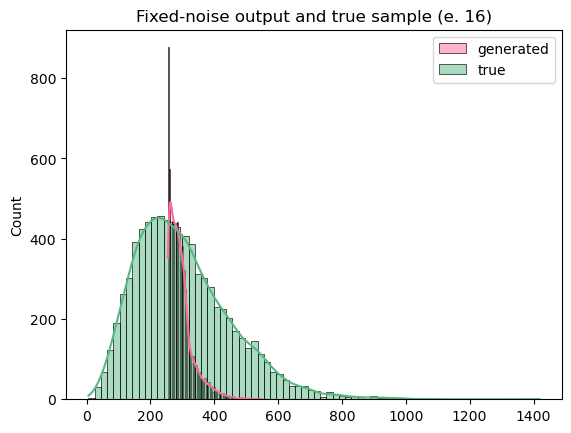

Classifier train:
    5: loss: 0.61, pred: [0.542, 0.46, 0.459, 0.458, 0.457, 0.457, 0.457, 0.455, 0.451, 0.448, 0.445, 0.452, 0.451, 0.451, 0.453, 0.469, 0.462, 0.454]
    10: loss: 0.533, pred: [0.586, 0.417, 0.415, 0.413, 0.413, 0.415, 0.414, 0.411, 0.408, 0.406, 0.402, 0.409, 0.408, 0.408, 0.41, 0.424, 0.418, 0.41]
    15: loss: 0.468, pred: [0.625, 0.378, 0.375, 0.373, 0.374, 0.376, 0.375, 0.371, 0.369, 0.368, 0.363, 0.371, 0.369, 0.369, 0.371, 0.384, 0.378, 0.371]
Generator training: (lr=0.15)
    SE 1: loss: 0.993, pred: 0.37
### Epoch: 17
 train loss = 0.9931, pred = 0.3704, wass_d = 88.0886
output mean: 327.46 std: 47.23
ground mean: 303.00 std: 150.84


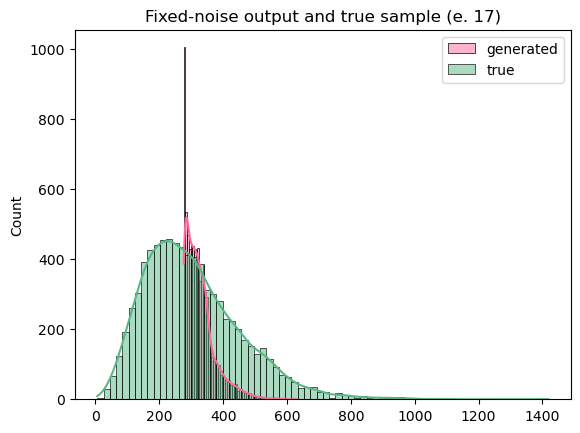

Classifier train:
    5: loss: 0.605, pred: [0.549, 0.451, 0.452, 0.454, 0.458, 0.462, 0.462, 0.46, 0.457, 0.453, 0.449, 0.457, 0.459, 0.455, 0.46, 0.466, 0.453, 0.442, 0.458]
    10: loss: 0.529, pred: [0.591, 0.409, 0.409, 0.41, 0.414, 0.419, 0.419, 0.415, 0.414, 0.41, 0.406, 0.414, 0.415, 0.412, 0.416, 0.422, 0.411, 0.399, 0.415]
    15: loss: 0.464, pred: [0.63, 0.371, 0.37, 0.37, 0.374, 0.379, 0.379, 0.375, 0.375, 0.372, 0.367, 0.374, 0.376, 0.373, 0.377, 0.382, 0.372, 0.361, 0.375]
Generator training: (lr=0.15)
    SE 1: loss: 0.977, pred: 0.376
### Epoch: 18
 train loss = 0.9769, pred = 0.3765, wass_d = 100.5797
output mean: 373.51 std: 55.86
ground mean: 303.00 std: 150.84


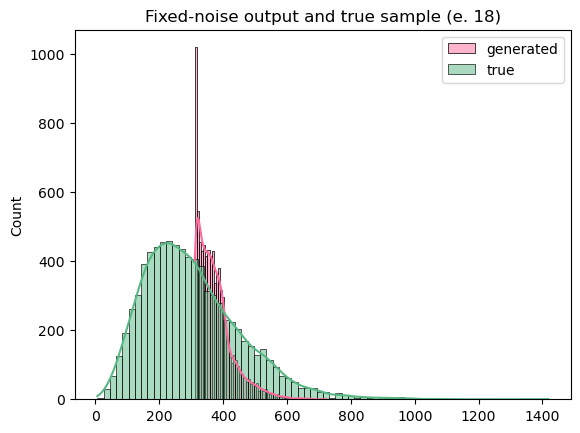

Classifier train:
    5: loss: 0.608, pred: [0.544, 0.459, 0.459, 0.46, 0.462, 0.462, 0.456, 0.449, 0.451, 0.459, 0.46, 0.459, 0.453, 0.466, 0.459, 0.443, 0.451, 0.448, 0.45, 0.446]
    10: loss: 0.532, pred: [0.587, 0.416, 0.415, 0.416, 0.418, 0.419, 0.413, 0.405, 0.408, 0.416, 0.416, 0.416, 0.41, 0.421, 0.416, 0.401, 0.408, 0.405, 0.408, 0.404]
    15: loss: 0.467, pred: [0.627, 0.377, 0.375, 0.375, 0.378, 0.38, 0.374, 0.366, 0.369, 0.376, 0.376, 0.376, 0.371, 0.381, 0.376, 0.363, 0.37, 0.367, 0.369, 0.365]
Generator training: (lr=0.15)
    SE 1: loss: 1.012, pred: 0.363
### Epoch: 19
 train loss = 1.0124, pred = 0.3633, wass_d = 111.5283
output mean: 407.15 std: 78.25
ground mean: 303.00 std: 150.84


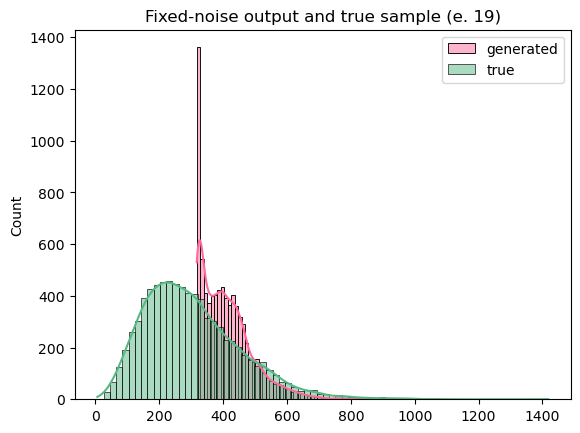

Classifier train:
    5: loss: 0.592, pred: [0.56, 0.445, 0.445, 0.446, 0.448, 0.451, 0.451, 0.448, 0.445, 0.449, 0.458, 0.47, 0.45, 0.448, 0.457, 0.454, 0.468, 0.455, 0.464, 0.46, 0.464]
    10: loss: 0.518, pred: [0.602, 0.404, 0.403, 0.403, 0.405, 0.409, 0.409, 0.404, 0.403, 0.407, 0.413, 0.426, 0.407, 0.405, 0.414, 0.41, 0.424, 0.411, 0.42, 0.415, 0.421]
    15: loss: 0.456, pred: [0.64, 0.366, 0.364, 0.364, 0.366, 0.37, 0.37, 0.365, 0.364, 0.369, 0.374, 0.385, 0.368, 0.367, 0.374, 0.371, 0.384, 0.372, 0.381, 0.375, 0.381]
Generator training: (lr=0.15)
    SE 1: loss: 0.962, pred: 0.382
### Epoch: 20
 train loss = 0.9617, pred = 0.3822, wass_d = 122.8561
output mean: 424.75 std: 111.86
ground mean: 303.00 std: 150.84


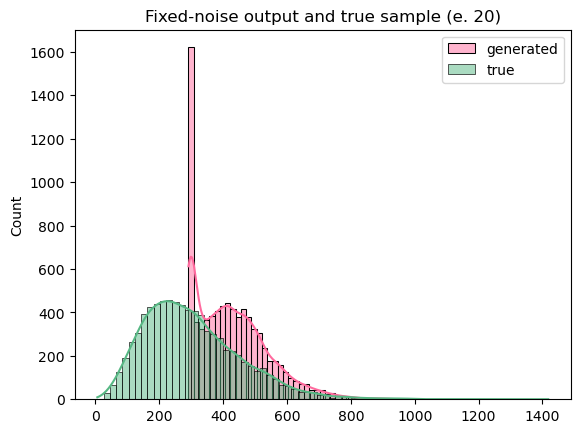

Classifier train:
    5: loss: 0.599, pred: [0.555, 0.45, 0.45, 0.451, 0.454, 0.456, 0.454, 0.452, 0.456, 0.456, 0.451, 0.463, 0.462, 0.46, 0.458, 0.457, 0.447, 0.453, 0.458, 0.453, 0.453, 0.465]
    10: loss: 0.523, pred: [0.597, 0.408, 0.407, 0.408, 0.41, 0.413, 0.411, 0.408, 0.412, 0.414, 0.407, 0.419, 0.418, 0.416, 0.414, 0.414, 0.405, 0.409, 0.414, 0.411, 0.408, 0.422]
    15: loss: 0.46, pred: [0.635, 0.37, 0.368, 0.368, 0.371, 0.375, 0.373, 0.369, 0.373, 0.375, 0.368, 0.379, 0.378, 0.377, 0.375, 0.374, 0.366, 0.37, 0.374, 0.373, 0.368, 0.382]
Generator training: (lr=0.15)
    SE 1: loss: 0.961, pred: 0.382
### Epoch: 21
 train loss = 0.9611, pred = 0.3825, wass_d = 127.6155
output mean: 430.41 std: 145.68
ground mean: 303.00 std: 150.84


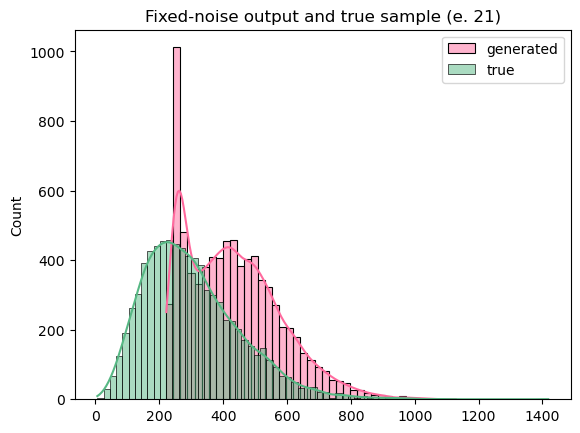

Classifier train:
    5: loss: 0.605, pred: [0.546, 0.452, 0.451, 0.449, 0.447, 0.446, 0.445, 0.445, 0.446, 0.445, 0.451, 0.468, 0.466, 0.463, 0.459, 0.462, 0.464, 0.463, 0.461, 0.45, 0.447, 0.447, 0.468]
    10: loss: 0.529, pred: [0.589, 0.41, 0.408, 0.406, 0.404, 0.404, 0.403, 0.402, 0.403, 0.403, 0.408, 0.424, 0.421, 0.419, 0.416, 0.418, 0.42, 0.419, 0.417, 0.408, 0.404, 0.4, 0.428]
    15: loss: 0.465, pred: [0.628, 0.371, 0.369, 0.366, 0.365, 0.366, 0.365, 0.363, 0.365, 0.365, 0.368, 0.384, 0.381, 0.38, 0.376, 0.378, 0.38, 0.379, 0.378, 0.369, 0.367, 0.359, 0.39]
Generator training: (lr=0.15)
    SE 1: loss: 0.943, pred: 0.39
### Epoch: 22
 train loss = 0.9428, pred = 0.3895, wass_d = 122.7301
output mean: 425.70 std: 181.71
ground mean: 303.00 std: 150.84


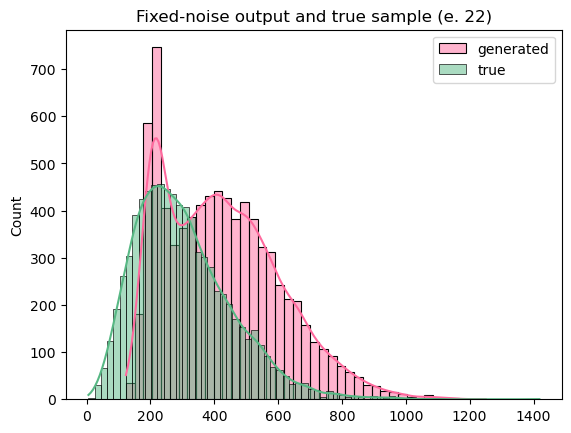

Classifier train:
    5: loss: 0.606, pred: [0.544, 0.453, 0.45, 0.447, 0.446, 0.447, 0.448, 0.447, 0.448, 0.451, 0.454, 0.464, 0.455, 0.443, 0.455, 0.458, 0.457, 0.453, 0.459, 0.458, 0.453, 0.447, 0.453, 0.472]
    10: loss: 0.53, pred: [0.587, 0.411, 0.407, 0.403, 0.402, 0.406, 0.406, 0.403, 0.405, 0.409, 0.41, 0.421, 0.411, 0.401, 0.412, 0.414, 0.414, 0.409, 0.416, 0.414, 0.411, 0.403, 0.405, 0.433]
    15: loss: 0.466, pred: [0.626, 0.373, 0.368, 0.364, 0.363, 0.368, 0.369, 0.364, 0.366, 0.371, 0.371, 0.381, 0.372, 0.362, 0.373, 0.375, 0.375, 0.37, 0.377, 0.374, 0.372, 0.366, 0.363, 0.394]
Generator training: (lr=0.15)
    SE 1: loss: 0.917, pred: 0.4
### Epoch: 23
 train loss = 0.9169, pred = 0.3998, wass_d = 96.7218
output mean: 399.72 std: 207.26
ground mean: 303.00 std: 150.84


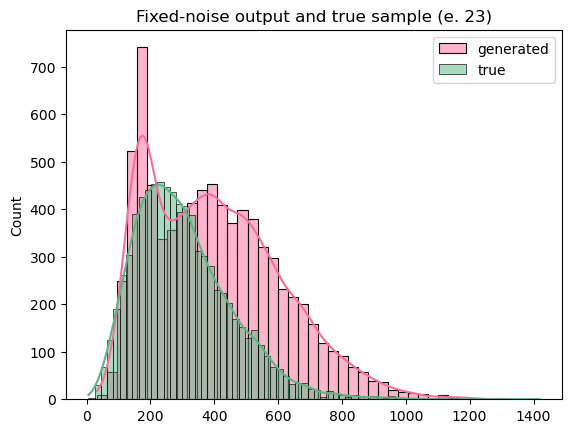

Classifier train:
    5: loss: 0.608, pred: [0.547, 0.457, 0.454, 0.452, 0.454, 0.46, 0.464, 0.461, 0.457, 0.448, 0.438, 0.446, 0.446, 0.451, 0.462, 0.456, 0.459, 0.457, 0.469, 0.463, 0.46, 0.46, 0.462, 0.466, 0.487]
    10: loss: 0.532, pred: [0.59, 0.415, 0.411, 0.407, 0.409, 0.418, 0.421, 0.416, 0.413, 0.406, 0.396, 0.403, 0.404, 0.408, 0.418, 0.412, 0.416, 0.413, 0.424, 0.419, 0.417, 0.416, 0.417, 0.417, 0.448]
    15: loss: 0.467, pred: [0.629, 0.377, 0.371, 0.367, 0.369, 0.379, 0.383, 0.375, 0.373, 0.367, 0.358, 0.365, 0.365, 0.369, 0.378, 0.373, 0.376, 0.374, 0.384, 0.379, 0.377, 0.377, 0.379, 0.373, 0.409]
Generator training: (lr=0.15)
    SE 1: loss: 0.924, pred: 0.397
### Epoch: 24
 train loss = 0.9236, pred = 0.3971, wass_d = 72.0218
output mean: 372.46 std: 208.25
ground mean: 303.00 std: 150.84


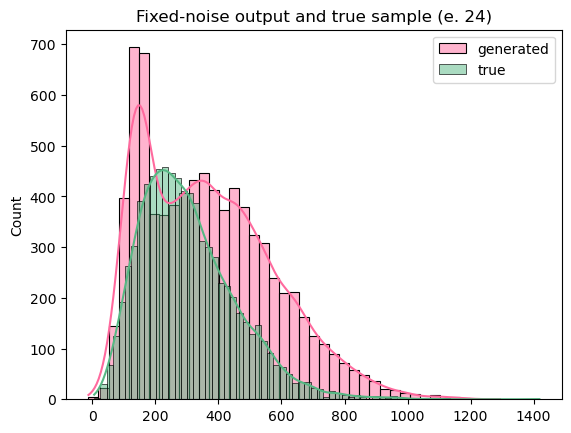

Classifier train:
    5: loss: 0.597, pred: [0.556, 0.448, 0.445, 0.442, 0.442, 0.446, 0.448, 0.45, 0.459, 0.454, 0.445, 0.447, 0.44, 0.448, 0.447, 0.459, 0.461, 0.452, 0.459, 0.464, 0.463, 0.457, 0.46, 0.466, 0.476, 0.485]
    10: loss: 0.522, pred: [0.598, 0.408, 0.402, 0.398, 0.398, 0.405, 0.407, 0.406, 0.415, 0.412, 0.402, 0.404, 0.398, 0.405, 0.404, 0.415, 0.418, 0.409, 0.416, 0.42, 0.419, 0.414, 0.418, 0.419, 0.43, 0.443]
    15: loss: 0.459, pred: [0.637, 0.37, 0.364, 0.359, 0.359, 0.368, 0.369, 0.365, 0.376, 0.373, 0.364, 0.366, 0.36, 0.366, 0.366, 0.376, 0.378, 0.37, 0.376, 0.38, 0.379, 0.374, 0.379, 0.379, 0.387, 0.404]
Generator training: (lr=0.15)
    SE 1: loss: 0.886, pred: 0.412
### Epoch: 25
 train loss = 0.8859, pred = 0.4123, wass_d = 42.8504
output mean: 337.70 std: 188.36
ground mean: 303.00 std: 150.84


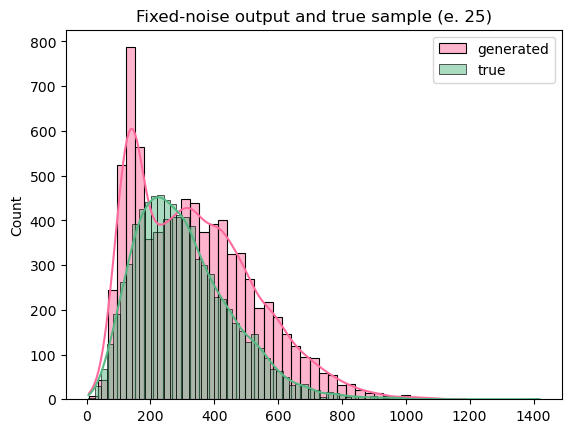

Classifier train:
    5: loss: 0.602, pred: [0.551, 0.447, 0.445, 0.443, 0.445, 0.451, 0.451, 0.448, 0.449, 0.447, 0.446, 0.464, 0.46, 0.445, 0.449, 0.456, 0.455, 0.459, 0.465, 0.458, 0.452, 0.451, 0.459, 0.464, 0.468, 0.471, 0.494]
    10: loss: 0.526, pred: [0.594, 0.407, 0.402, 0.399, 0.402, 0.41, 0.41, 0.403, 0.407, 0.405, 0.403, 0.42, 0.416, 0.403, 0.406, 0.412, 0.412, 0.415, 0.421, 0.415, 0.409, 0.407, 0.418, 0.421, 0.417, 0.418, 0.463]
    15: loss: 0.463, pred: [0.633, 0.37, 0.364, 0.359, 0.362, 0.373, 0.372, 0.362, 0.369, 0.367, 0.364, 0.38, 0.377, 0.364, 0.368, 0.373, 0.373, 0.376, 0.381, 0.376, 0.37, 0.367, 0.38, 0.385, 0.372, 0.37, 0.434]
Generator training: (lr=0.15)
    SE 1: loss: 0.828, pred: 0.437
### Epoch: 26
 train loss = 0.8275, pred = 0.4371, wass_d = 14.8600
output mean: 309.61 std: 154.52
ground mean: 303.00 std: 150.84


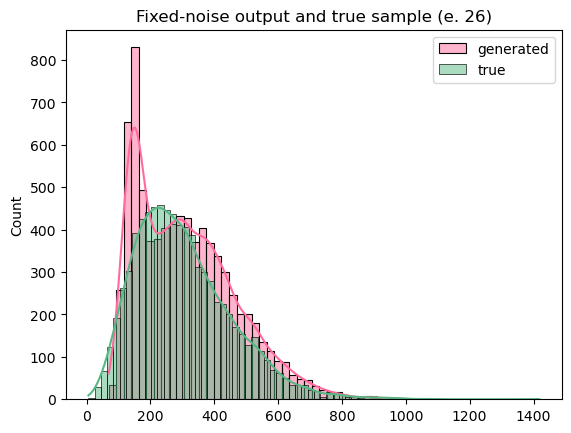

Classifier train:
    5: loss: 0.602, pred: [0.558, 0.454, 0.453, 0.453, 0.457, 0.467, 0.47, 0.466, 0.464, 0.458, 0.455, 0.458, 0.438, 0.434, 0.451, 0.457, 0.458, 0.463, 0.461, 0.457, 0.458, 0.459, 0.472, 0.476, 0.467, 0.467, 0.487, 0.525]
    10: loss: 0.528, pred: [0.6, 0.414, 0.41, 0.407, 0.411, 0.424, 0.428, 0.42, 0.419, 0.415, 0.412, 0.414, 0.395, 0.393, 0.407, 0.414, 0.415, 0.419, 0.417, 0.415, 0.412, 0.411, 0.433, 0.44, 0.411, 0.408, 0.445, 0.518]
    15: loss: 0.465, pred: [0.637, 0.377, 0.371, 0.366, 0.369, 0.384, 0.389, 0.38, 0.378, 0.376, 0.372, 0.374, 0.357, 0.356, 0.367, 0.374, 0.375, 0.38, 0.377, 0.377, 0.372, 0.368, 0.396, 0.409, 0.362, 0.356, 0.404, 0.501]
Generator training: (lr=0.15)
    SE 1: loss: 0.693, pred: 0.5
### Epoch: 27
 train loss = 0.6929, pred = 0.5001, wass_d = 22.3616
output mean: 293.58 std: 120.80
ground mean: 303.00 std: 150.84


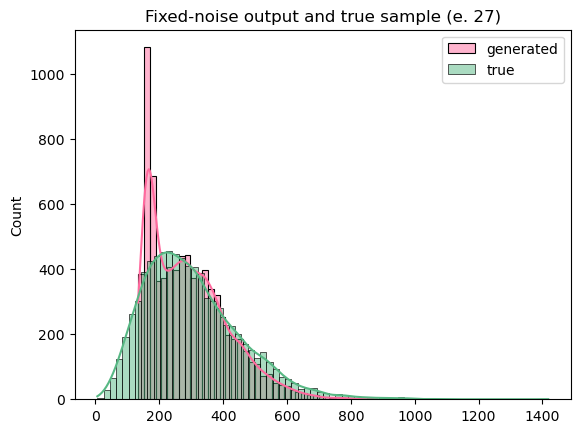

Classifier train:
    5: loss: 0.613, pred: [0.542, 0.448, 0.444, 0.442, 0.441, 0.445, 0.445, 0.441, 0.443, 0.446, 0.452, 0.453, 0.451, 0.444, 0.447, 0.459, 0.464, 0.457, 0.452, 0.46, 0.461, 0.459, 0.47, 0.467, 0.46, 0.467, 0.486, 0.509, 0.533]
    10: loss: 0.539, pred: [0.584, 0.407, 0.401, 0.395, 0.395, 0.403, 0.404, 0.398, 0.398, 0.403, 0.409, 0.407, 0.405, 0.403, 0.397, 0.414, 0.418, 0.414, 0.404, 0.417, 0.413, 0.408, 0.438, 0.424, 0.396, 0.419, 0.456, 0.488, 0.529]
    15: loss: 0.474, pred: [0.624, 0.371, 0.362, 0.355, 0.355, 0.365, 0.368, 0.359, 0.359, 0.365, 0.37, 0.366, 0.365, 0.365, 0.356, 0.374, 0.376, 0.376, 0.363, 0.378, 0.373, 0.362, 0.409, 0.386, 0.338, 0.378, 0.427, 0.451, 0.496]
Generator training: (lr=0.15)
    SE 1: loss: 0.719, pred: 0.487
### Epoch: 28
 train loss = 0.7195, pred = 0.4870, wass_d = 42.2804
output mean: 285.49 std: 95.35
ground mean: 303.00 std: 150.84


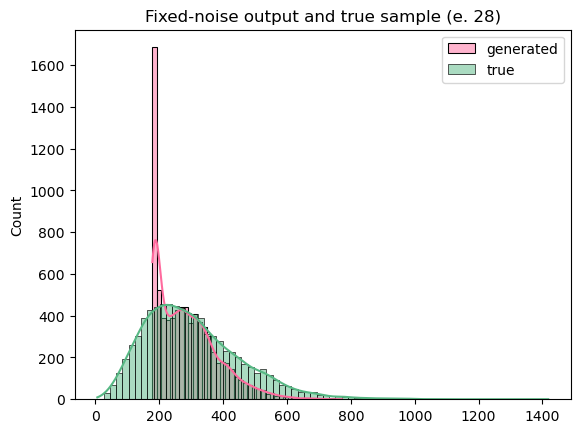

Classifier train:
    5: loss: 0.62, pred: [0.533, 0.445, 0.441, 0.437, 0.437, 0.443, 0.448, 0.449, 0.453, 0.455, 0.453, 0.448, 0.439, 0.443, 0.437, 0.445, 0.47, 0.467, 0.452, 0.448, 0.442, 0.446, 0.46, 0.453, 0.455, 0.47, 0.49, 0.507, 0.509, 0.497]
    10: loss: 0.544, pred: [0.576, 0.404, 0.397, 0.391, 0.392, 0.402, 0.407, 0.404, 0.407, 0.411, 0.409, 0.401, 0.394, 0.401, 0.389, 0.4, 0.422, 0.424, 0.404, 0.407, 0.395, 0.398, 0.431, 0.403, 0.389, 0.426, 0.468, 0.493, 0.488, 0.462]
    15: loss: 0.478, pred: [0.616, 0.368, 0.358, 0.351, 0.352, 0.365, 0.37, 0.364, 0.367, 0.373, 0.369, 0.362, 0.355, 0.364, 0.35, 0.362, 0.38, 0.386, 0.363, 0.371, 0.355, 0.353, 0.404, 0.365, 0.33, 0.383, 0.44, 0.463, 0.451, 0.418]
Generator training: (lr=0.15)
    SE 1: loss: 0.872, pred: 0.418
### Epoch: 29
 train loss = 0.8724, pred = 0.4180, wass_d = 44.8531
output mean: 295.62 std: 91.15
ground mean: 303.00 std: 150.84


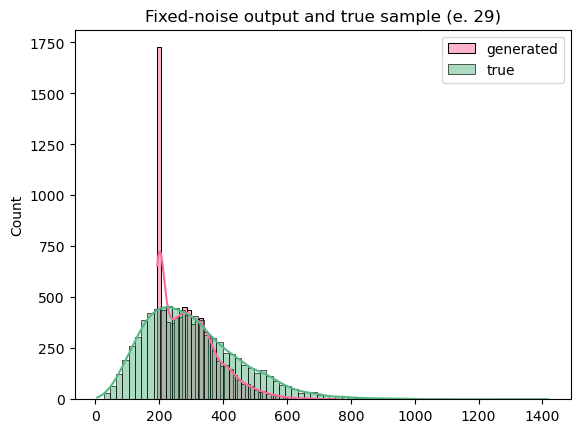

Classifier train:
    5: loss: 0.614, pred: [0.547, 0.447, 0.446, 0.447, 0.451, 0.458, 0.459, 0.458, 0.461, 0.458, 0.45, 0.445, 0.453, 0.454, 0.45, 0.45, 0.464, 0.452, 0.44, 0.456, 0.455, 0.454, 0.467, 0.464, 0.469, 0.487, 0.507, 0.522, 0.518, 0.494, 0.485]
    10: loss: 0.538, pred: [0.59, 0.407, 0.402, 0.4, 0.404, 0.415, 0.418, 0.412, 0.414, 0.414, 0.406, 0.399, 0.407, 0.411, 0.401, 0.406, 0.417, 0.411, 0.393, 0.415, 0.406, 0.406, 0.437, 0.414, 0.402, 0.44, 0.483, 0.507, 0.495, 0.45, 0.441]
    15: loss: 0.473, pred: [0.628, 0.371, 0.363, 0.359, 0.363, 0.377, 0.38, 0.371, 0.374, 0.376, 0.367, 0.361, 0.367, 0.373, 0.361, 0.368, 0.376, 0.374, 0.353, 0.378, 0.365, 0.361, 0.409, 0.378, 0.343, 0.395, 0.452, 0.475, 0.458, 0.404, 0.399]
Generator training: (lr=0.15)
    SE 1: loss: 0.92, pred: 0.399
### Epoch: 30
 train loss = 0.9196, pred = 0.3987, wass_d = 38.3669
output mean: 313.34 std: 103.26
ground mean: 303.00 std: 150.84


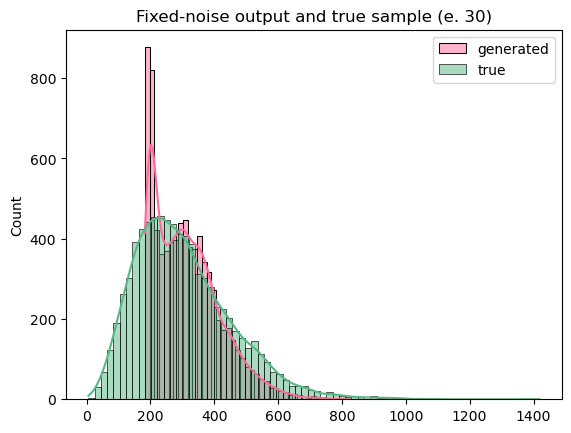

Classifier train:
    5: loss: 0.611, pred: [0.552, 0.455, 0.453, 0.452, 0.453, 0.456, 0.456, 0.451, 0.451, 0.452, 0.452, 0.45, 0.448, 0.457, 0.457, 0.446, 0.453, 0.457, 0.448, 0.459, 0.455, 0.458, 0.47, 0.463, 0.469, 0.486, 0.508, 0.527, 0.523, 0.492, 0.477, 0.487]
    10: loss: 0.536, pred: [0.594, 0.414, 0.408, 0.404, 0.406, 0.414, 0.415, 0.406, 0.405, 0.409, 0.409, 0.404, 0.403, 0.414, 0.408, 0.403, 0.408, 0.417, 0.399, 0.417, 0.407, 0.411, 0.439, 0.412, 0.402, 0.439, 0.483, 0.51, 0.499, 0.447, 0.426, 0.449]
    15: loss: 0.471, pred: [0.632, 0.378, 0.369, 0.363, 0.364, 0.376, 0.378, 0.366, 0.365, 0.371, 0.369, 0.365, 0.363, 0.375, 0.367, 0.365, 0.368, 0.379, 0.359, 0.38, 0.366, 0.365, 0.409, 0.376, 0.344, 0.394, 0.452, 0.478, 0.462, 0.401, 0.379, 0.412]
Generator training: (lr=0.15)
    SE 1: loss: 0.89, pred: 0.41
### Epoch: 31
 train loss = 0.8905, pred = 0.4105, wass_d = 33.4633
output mean: 326.17 std: 119.72
ground mean: 303.00 std: 150.84


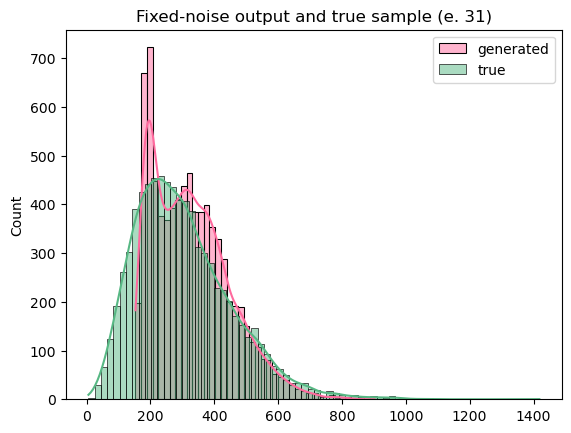

Classifier train:
    5: loss: 0.617, pred: [0.542, 0.459, 0.456, 0.453, 0.453, 0.456, 0.454, 0.446, 0.442, 0.445, 0.455, 0.467, 0.464, 0.466, 0.455, 0.459, 0.453, 0.447, 0.439, 0.454, 0.446, 0.447, 0.454, 0.449, 0.461, 0.481, 0.504, 0.523, 0.514, 0.48, 0.461, 0.468, 0.48]
    10: loss: 0.541, pred: [0.585, 0.418, 0.411, 0.406, 0.406, 0.413, 0.413, 0.401, 0.397, 0.403, 0.411, 0.419, 0.417, 0.422, 0.406, 0.415, 0.408, 0.407, 0.392, 0.412, 0.399, 0.401, 0.423, 0.398, 0.396, 0.436, 0.481, 0.507, 0.491, 0.437, 0.41, 0.426, 0.441]
    15: loss: 0.475, pred: [0.624, 0.381, 0.372, 0.364, 0.365, 0.375, 0.376, 0.361, 0.358, 0.366, 0.371, 0.379, 0.376, 0.383, 0.366, 0.376, 0.368, 0.371, 0.353, 0.375, 0.359, 0.356, 0.395, 0.361, 0.339, 0.391, 0.45, 0.474, 0.455, 0.394, 0.365, 0.387, 0.402]
Generator training: (lr=0.15)
    SE 1: loss: 0.908, pred: 0.403
### Epoch: 32
 train loss = 0.9082, pred = 0.4032, wass_d = 34.6056
output mean: 334.99 std: 133.93
ground mean: 303.00 std: 150.84


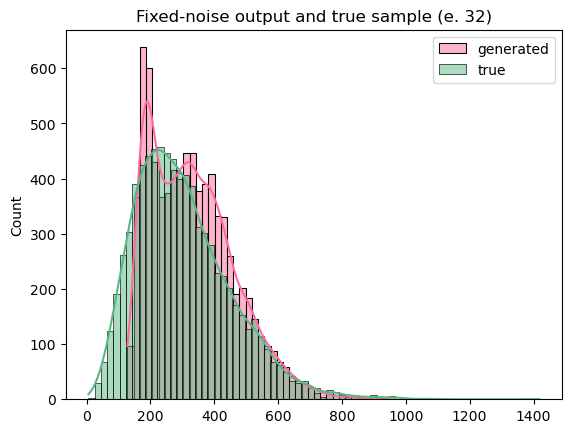

Classifier train:
    5: loss: 0.611, pred: [0.55, 0.451, 0.447, 0.443, 0.443, 0.449, 0.455, 0.457, 0.456, 0.451, 0.446, 0.458, 0.457, 0.465, 0.461, 0.457, 0.462, 0.453, 0.447, 0.453, 0.451, 0.446, 0.456, 0.45, 0.468, 0.491, 0.514, 0.528, 0.515, 0.484, 0.468, 0.471, 0.478, 0.483]
    10: loss: 0.536, pred: [0.592, 0.411, 0.403, 0.397, 0.397, 0.407, 0.415, 0.411, 0.41, 0.409, 0.403, 0.411, 0.411, 0.421, 0.412, 0.413, 0.417, 0.413, 0.4, 0.411, 0.403, 0.4, 0.426, 0.399, 0.401, 0.445, 0.489, 0.508, 0.488, 0.441, 0.418, 0.427, 0.436, 0.44]
    15: loss: 0.471, pred: [0.631, 0.375, 0.364, 0.356, 0.356, 0.37, 0.378, 0.371, 0.369, 0.371, 0.363, 0.371, 0.371, 0.381, 0.371, 0.374, 0.376, 0.376, 0.36, 0.374, 0.363, 0.355, 0.398, 0.362, 0.344, 0.4, 0.457, 0.473, 0.451, 0.399, 0.374, 0.388, 0.394, 0.397]
Generator training: (lr=0.15)
    SE 1: loss: 0.936, pred: 0.392
### Epoch: 33
 train loss = 0.9357, pred = 0.3923, wass_d = 24.7851
output mean: 325.14 std: 138.72
ground mean: 303.00 std: 150.84


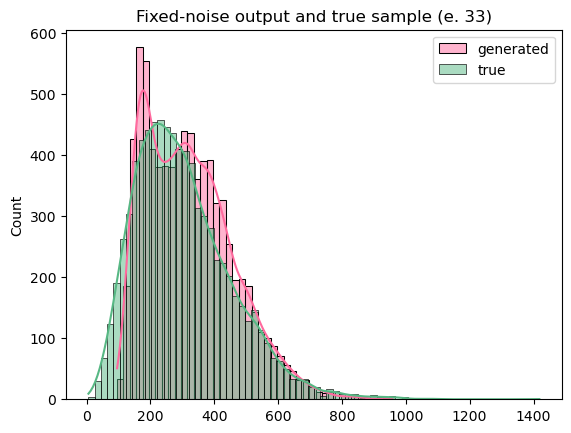

Classifier train:
    5: loss: 0.615, pred: [0.548, 0.455, 0.452, 0.449, 0.45, 0.457, 0.463, 0.463, 0.462, 0.463, 0.462, 0.464, 0.462, 0.464, 0.454, 0.448, 0.455, 0.453, 0.453, 0.458, 0.451, 0.455, 0.46, 0.448, 0.462, 0.486, 0.509, 0.521, 0.509, 0.482, 0.466, 0.469, 0.474, 0.478, 0.494]
    10: loss: 0.539, pred: [0.591, 0.415, 0.408, 0.402, 0.403, 0.415, 0.422, 0.417, 0.415, 0.42, 0.418, 0.417, 0.416, 0.421, 0.406, 0.406, 0.41, 0.414, 0.405, 0.417, 0.404, 0.408, 0.431, 0.397, 0.396, 0.441, 0.484, 0.498, 0.48, 0.441, 0.418, 0.425, 0.428, 0.431, 0.455]
    15: loss: 0.473, pred: [0.63, 0.378, 0.369, 0.361, 0.362, 0.377, 0.384, 0.376, 0.374, 0.381, 0.377, 0.377, 0.376, 0.381, 0.366, 0.367, 0.37, 0.376, 0.365, 0.38, 0.364, 0.363, 0.403, 0.363, 0.34, 0.397, 0.453, 0.462, 0.441, 0.401, 0.377, 0.387, 0.386, 0.386, 0.413]
Generator training: (lr=0.15)
    SE 1: loss: 0.878, pred: 0.416
### Epoch: 34
 train loss = 0.8776, pred = 0.4158, wass_d = 9.9914
output mean: 295.76 std: 143.68
ground me

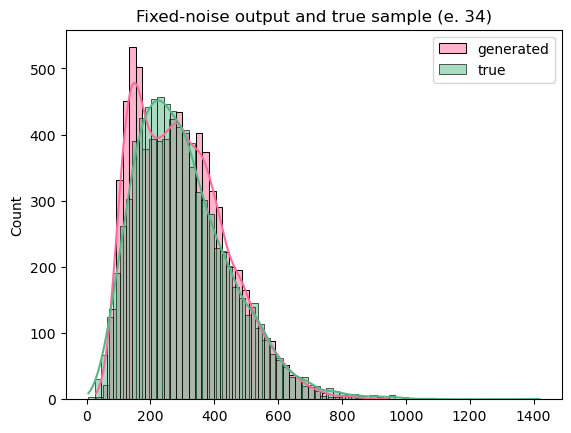

Classifier train:
    5: loss: 0.616, pred: [0.542, 0.454, 0.451, 0.448, 0.447, 0.451, 0.456, 0.455, 0.45, 0.447, 0.449, 0.453, 0.445, 0.454, 0.452, 0.454, 0.45, 0.447, 0.439, 0.443, 0.437, 0.44, 0.455, 0.449, 0.459, 0.48, 0.501, 0.512, 0.505, 0.484, 0.468, 0.468, 0.471, 0.474, 0.487, 0.532]
    10: loss: 0.541, pred: [0.585, 0.413, 0.407, 0.401, 0.4, 0.409, 0.416, 0.41, 0.404, 0.405, 0.406, 0.407, 0.4, 0.412, 0.404, 0.41, 0.405, 0.408, 0.392, 0.404, 0.389, 0.394, 0.429, 0.404, 0.394, 0.432, 0.469, 0.479, 0.472, 0.446, 0.421, 0.424, 0.425, 0.427, 0.444, 0.539]
    15: loss: 0.476, pred: [0.626, 0.377, 0.368, 0.36, 0.359, 0.371, 0.379, 0.37, 0.364, 0.368, 0.366, 0.368, 0.361, 0.373, 0.364, 0.372, 0.365, 0.372, 0.353, 0.369, 0.35, 0.35, 0.402, 0.376, 0.341, 0.387, 0.433, 0.433, 0.431, 0.411, 0.381, 0.386, 0.383, 0.384, 0.399, 0.533]
Generator training: (lr=0.15)
    SE 1: loss: 0.627, pred: 0.534
### Epoch: 35
 train loss = 0.6271, pred = 0.5341, wass_d = 40.6822
output mean: 262.32 std:

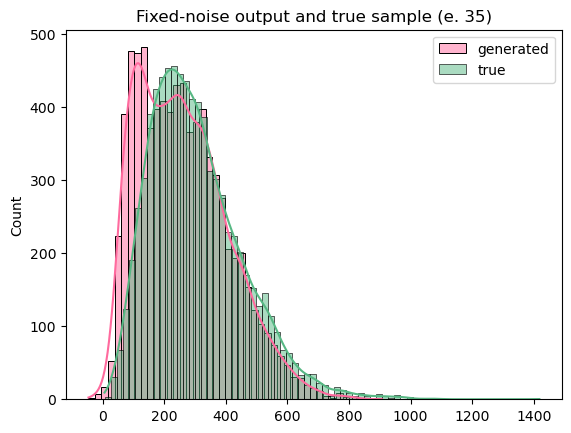

Classifier train:
    5: loss: 0.628, pred: [0.529, 0.455, 0.454, 0.454, 0.458, 0.464, 0.46, 0.45, 0.449, 0.449, 0.446, 0.448, 0.44, 0.448, 0.443, 0.448, 0.454, 0.458, 0.443, 0.428, 0.421, 0.429, 0.446, 0.445, 0.454, 0.467, 0.486, 0.503, 0.503, 0.481, 0.464, 0.465, 0.47, 0.474, 0.486, 0.519, 0.544]
    10: loss: 0.556, pred: [0.57, 0.411, 0.407, 0.405, 0.411, 0.422, 0.417, 0.4, 0.403, 0.407, 0.399, 0.4, 0.393, 0.405, 0.391, 0.401, 0.409, 0.416, 0.392, 0.385, 0.369, 0.384, 0.422, 0.405, 0.394, 0.409, 0.44, 0.476, 0.491, 0.449, 0.414, 0.421, 0.433, 0.44, 0.461, 0.52, 0.574]
    15: loss: 0.491, pred: [0.609, 0.372, 0.366, 0.363, 0.37, 0.385, 0.378, 0.355, 0.364, 0.37, 0.357, 0.359, 0.352, 0.367, 0.35, 0.361, 0.37, 0.378, 0.353, 0.351, 0.326, 0.34, 0.398, 0.38, 0.346, 0.353, 0.384, 0.429, 0.465, 0.411, 0.365, 0.376, 0.391, 0.404, 0.43, 0.5, 0.573]
Generator training: (lr=0.15)
    SE 1: loss: 0.589, pred: 0.555
### Epoch: 36
 train loss = 0.5894, pred = 0.5546, wass_d = 67.8690
output mea

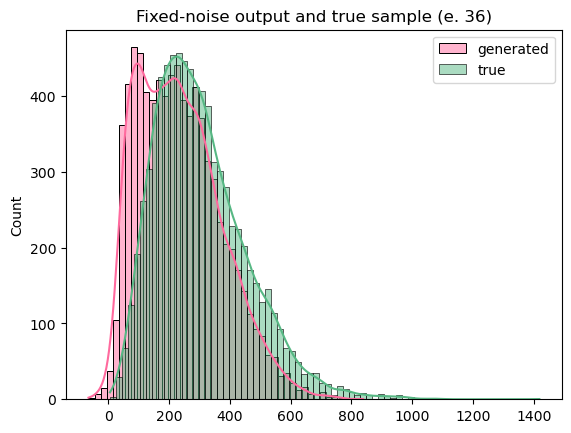

Classifier train:
    5: loss: 0.631, pred: [0.536, 0.464, 0.463, 0.463, 0.464, 0.465, 0.458, 0.446, 0.447, 0.452, 0.445, 0.456, 0.45, 0.457, 0.453, 0.457, 0.464, 0.46, 0.447, 0.451, 0.445, 0.449, 0.461, 0.462, 0.469, 0.476, 0.49, 0.513, 0.521, 0.494, 0.475, 0.478, 0.486, 0.491, 0.504, 0.525, 0.527, 0.522]
    10: loss: 0.557, pred: [0.578, 0.418, 0.414, 0.413, 0.417, 0.425, 0.414, 0.393, 0.403, 0.409, 0.397, 0.406, 0.401, 0.414, 0.399, 0.409, 0.42, 0.417, 0.396, 0.405, 0.389, 0.402, 0.436, 0.419, 0.409, 0.413, 0.437, 0.487, 0.513, 0.455, 0.418, 0.429, 0.449, 0.462, 0.488, 0.523, 0.521, 0.499]
    15: loss: 0.49, pred: [0.617, 0.38, 0.374, 0.37, 0.376, 0.387, 0.376, 0.351, 0.365, 0.37, 0.358, 0.366, 0.361, 0.376, 0.357, 0.371, 0.381, 0.38, 0.358, 0.37, 0.345, 0.356, 0.409, 0.389, 0.362, 0.361, 0.382, 0.441, 0.485, 0.411, 0.366, 0.382, 0.404, 0.423, 0.459, 0.502, 0.496, 0.449]
Generator training: (lr=0.15)
    SE 1: loss: 0.8, pred: 0.449
### Epoch: 37
 train loss = 0.8004, pred = 0.449

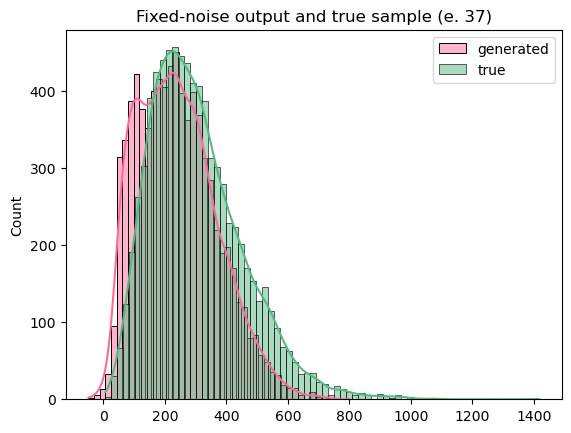

Classifier train:
    5: loss: 0.633, pred: [0.529, 0.448, 0.445, 0.444, 0.445, 0.449, 0.45, 0.45, 0.46, 0.46, 0.449, 0.452, 0.439, 0.448, 0.458, 0.453, 0.46, 0.453, 0.439, 0.436, 0.426, 0.435, 0.455, 0.456, 0.462, 0.469, 0.482, 0.505, 0.514, 0.488, 0.471, 0.475, 0.484, 0.489, 0.501, 0.516, 0.514, 0.507, 0.522]
    10: loss: 0.559, pred: [0.57, 0.402, 0.397, 0.395, 0.399, 0.41, 0.405, 0.396, 0.413, 0.416, 0.399, 0.402, 0.389, 0.405, 0.402, 0.404, 0.416, 0.41, 0.388, 0.39, 0.37, 0.388, 0.429, 0.412, 0.404, 0.41, 0.433, 0.484, 0.51, 0.447, 0.412, 0.429, 0.452, 0.465, 0.492, 0.516, 0.498, 0.463, 0.511]
    15: loss: 0.492, pred: [0.611, 0.365, 0.358, 0.354, 0.359, 0.374, 0.368, 0.353, 0.375, 0.376, 0.36, 0.362, 0.349, 0.367, 0.359, 0.366, 0.378, 0.373, 0.349, 0.356, 0.327, 0.343, 0.403, 0.379, 0.357, 0.36, 0.38, 0.44, 0.482, 0.401, 0.36, 0.382, 0.409, 0.429, 0.467, 0.496, 0.468, 0.404, 0.483]
Generator training: (lr=0.15)
    SE 1: loss: 0.74, pred: 0.477
### Epoch: 38
 train loss = 0.740

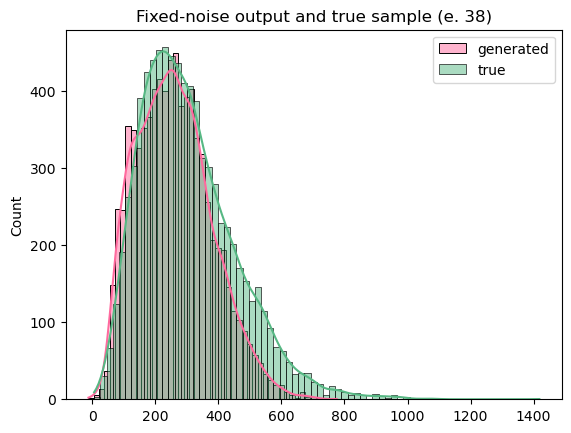

Classifier train:
    5: loss: 0.632, pred: [0.536, 0.448, 0.446, 0.444, 0.445, 0.445, 0.441, 0.437, 0.447, 0.449, 0.44, 0.437, 0.44, 0.455, 0.448, 0.459, 0.471, 0.463, 0.444, 0.444, 0.443, 0.459, 0.48, 0.477, 0.475, 0.478, 0.49, 0.51, 0.518, 0.495, 0.483, 0.492, 0.502, 0.507, 0.514, 0.52, 0.512, 0.499, 0.515, 0.536]
    10: loss: 0.56, pred: [0.576, 0.402, 0.398, 0.396, 0.4, 0.406, 0.397, 0.386, 0.403, 0.406, 0.392, 0.388, 0.391, 0.411, 0.393, 0.41, 0.425, 0.419, 0.393, 0.399, 0.384, 0.408, 0.451, 0.435, 0.42, 0.424, 0.444, 0.485, 0.505, 0.445, 0.419, 0.444, 0.472, 0.488, 0.507, 0.513, 0.489, 0.445, 0.489, 0.555]
    15: loss: 0.492, pred: [0.619, 0.366, 0.359, 0.355, 0.359, 0.369, 0.361, 0.346, 0.366, 0.366, 0.355, 0.351, 0.351, 0.374, 0.354, 0.373, 0.387, 0.382, 0.355, 0.366, 0.342, 0.361, 0.421, 0.401, 0.376, 0.382, 0.399, 0.435, 0.466, 0.394, 0.365, 0.399, 0.433, 0.458, 0.483, 0.485, 0.457, 0.384, 0.448, 0.554]
Generator training: (lr=0.15)
    SE 1: loss: 0.607, pred: 0.545
### E

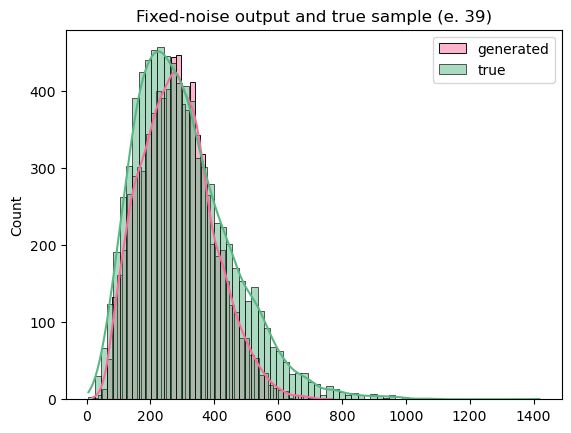

Classifier train:
    5: loss: 0.638, pred: [0.528, 0.442, 0.439, 0.436, 0.437, 0.443, 0.446, 0.449, 0.458, 0.461, 0.452, 0.449, 0.441, 0.445, 0.453, 0.446, 0.457, 0.45, 0.441, 0.446, 0.434, 0.446, 0.467, 0.475, 0.48, 0.481, 0.492, 0.51, 0.515, 0.487, 0.47, 0.479, 0.494, 0.501, 0.51, 0.516, 0.507, 0.495, 0.509, 0.525, 0.523]
    10: loss: 0.566, pred: [0.568, 0.395, 0.391, 0.388, 0.392, 0.403, 0.402, 0.395, 0.412, 0.415, 0.402, 0.397, 0.389, 0.402, 0.397, 0.398, 0.411, 0.405, 0.387, 0.399, 0.374, 0.393, 0.437, 0.437, 0.429, 0.431, 0.45, 0.486, 0.502, 0.439, 0.402, 0.427, 0.463, 0.485, 0.501, 0.506, 0.485, 0.448, 0.485, 0.536, 0.541]
    15: loss: 0.499, pred: [0.609, 0.359, 0.353, 0.349, 0.352, 0.366, 0.364, 0.354, 0.374, 0.374, 0.364, 0.358, 0.349, 0.365, 0.356, 0.362, 0.373, 0.368, 0.349, 0.365, 0.332, 0.346, 0.405, 0.406, 0.384, 0.386, 0.405, 0.436, 0.462, 0.39, 0.342, 0.374, 0.422, 0.457, 0.472, 0.469, 0.45, 0.39, 0.444, 0.521, 0.536]
Generator training: (lr=0.15)
    SE 1: loss: 0

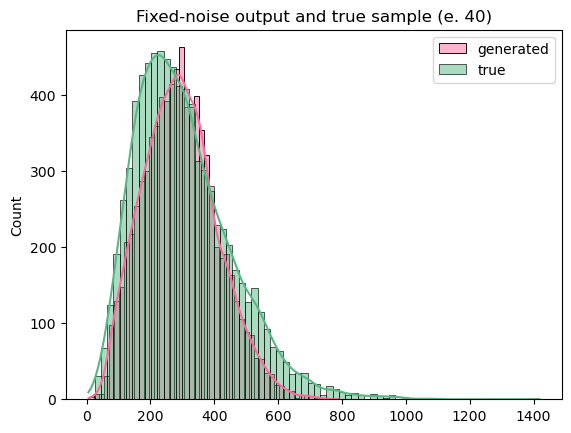

Classifier train:
    5: loss: 0.635, pred: [0.532, 0.441, 0.439, 0.438, 0.44, 0.445, 0.445, 0.441, 0.443, 0.44, 0.437, 0.446, 0.452, 0.453, 0.454, 0.455, 0.458, 0.452, 0.442, 0.432, 0.427, 0.442, 0.465, 0.481, 0.488, 0.489, 0.499, 0.515, 0.517, 0.489, 0.469, 0.475, 0.491, 0.502, 0.51, 0.519, 0.514, 0.506, 0.518, 0.529, 0.521, 0.519]
    10: loss: 0.565, pred: [0.572, 0.394, 0.391, 0.39, 0.394, 0.405, 0.4, 0.388, 0.398, 0.397, 0.389, 0.394, 0.398, 0.409, 0.398, 0.405, 0.412, 0.406, 0.386, 0.386, 0.37, 0.388, 0.432, 0.447, 0.44, 0.438, 0.458, 0.491, 0.505, 0.444, 0.395, 0.413, 0.454, 0.483, 0.496, 0.504, 0.49, 0.459, 0.494, 0.534, 0.526, 0.53]
    15: loss: 0.497, pred: [0.612, 0.357, 0.353, 0.35, 0.354, 0.367, 0.363, 0.347, 0.362, 0.358, 0.352, 0.355, 0.357, 0.371, 0.358, 0.369, 0.374, 0.369, 0.348, 0.353, 0.329, 0.34, 0.397, 0.418, 0.397, 0.391, 0.413, 0.439, 0.466, 0.402, 0.332, 0.354, 0.409, 0.454, 0.462, 0.46, 0.451, 0.404, 0.454, 0.51, 0.501, 0.52]
Generator training: (lr=0.15)
  

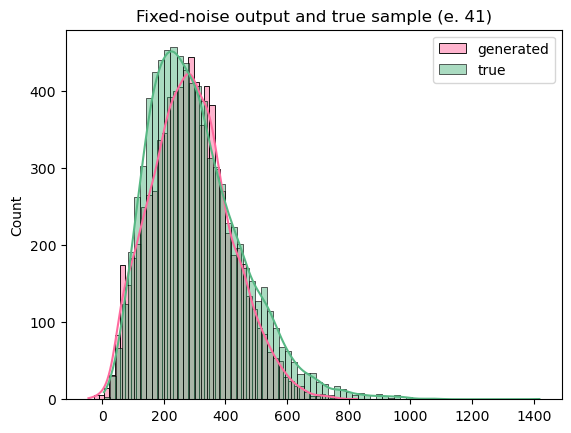

Classifier train:
    5: loss: 0.635, pred: [0.533, 0.445, 0.442, 0.44, 0.44, 0.441, 0.438, 0.436, 0.446, 0.456, 0.451, 0.451, 0.443, 0.443, 0.449, 0.435, 0.448, 0.447, 0.439, 0.439, 0.434, 0.446, 0.47, 0.488, 0.495, 0.496, 0.504, 0.517, 0.517, 0.484, 0.463, 0.471, 0.491, 0.503, 0.512, 0.519, 0.513, 0.502, 0.514, 0.525, 0.519, 0.518, 0.522]
    10: loss: 0.565, pred: [0.573, 0.396, 0.394, 0.393, 0.396, 0.401, 0.394, 0.383, 0.401, 0.412, 0.401, 0.399, 0.39, 0.401, 0.394, 0.388, 0.402, 0.403, 0.384, 0.393, 0.376, 0.391, 0.435, 0.455, 0.45, 0.443, 0.462, 0.495, 0.51, 0.444, 0.387, 0.405, 0.45, 0.482, 0.496, 0.502, 0.483, 0.453, 0.489, 0.528, 0.515, 0.519, 0.527]
    15: loss: 0.497, pred: [0.613, 0.358, 0.356, 0.354, 0.356, 0.364, 0.357, 0.343, 0.364, 0.371, 0.363, 0.36, 0.35, 0.365, 0.354, 0.353, 0.365, 0.367, 0.346, 0.359, 0.335, 0.343, 0.4, 0.426, 0.406, 0.393, 0.417, 0.447, 0.476, 0.409, 0.325, 0.342, 0.4, 0.452, 0.457, 0.454, 0.44, 0.397, 0.447, 0.5, 0.479, 0.496, 0.51]
Generator tra

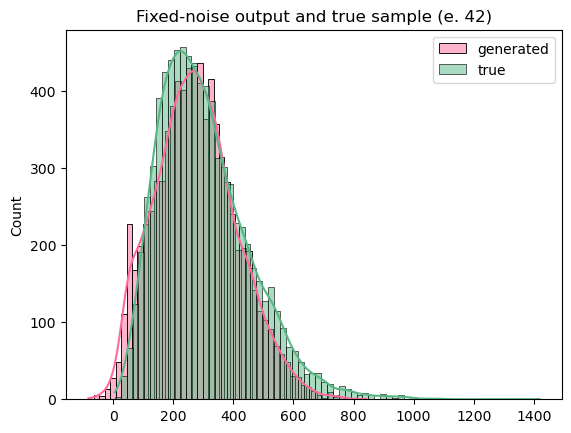

Classifier train:
    5: loss: 0.638, pred: [0.531, 0.438, 0.437, 0.436, 0.438, 0.441, 0.44, 0.437, 0.444, 0.446, 0.441, 0.451, 0.448, 0.459, 0.461, 0.457, 0.457, 0.448, 0.439, 0.432, 0.431, 0.442, 0.467, 0.486, 0.496, 0.496, 0.505, 0.519, 0.516, 0.483, 0.46, 0.466, 0.484, 0.497, 0.508, 0.519, 0.509, 0.498, 0.511, 0.524, 0.515, 0.512, 0.516, 0.519]
    10: loss: 0.568, pred: [0.569, 0.388, 0.388, 0.388, 0.392, 0.399, 0.393, 0.383, 0.398, 0.401, 0.39, 0.398, 0.394, 0.414, 0.404, 0.406, 0.41, 0.403, 0.382, 0.384, 0.371, 0.386, 0.432, 0.453, 0.452, 0.445, 0.466, 0.504, 0.515, 0.445, 0.384, 0.398, 0.443, 0.478, 0.493, 0.504, 0.476, 0.444, 0.483, 0.525, 0.509, 0.511, 0.513, 0.524]
    15: loss: 0.501, pred: [0.609, 0.349, 0.35, 0.35, 0.353, 0.361, 0.355, 0.343, 0.361, 0.361, 0.352, 0.358, 0.352, 0.376, 0.362, 0.368, 0.371, 0.367, 0.343, 0.351, 0.329, 0.338, 0.399, 0.422, 0.407, 0.393, 0.423, 0.464, 0.486, 0.411, 0.32, 0.333, 0.392, 0.448, 0.456, 0.459, 0.428, 0.383, 0.439, 0.499, 0.472, 0.4

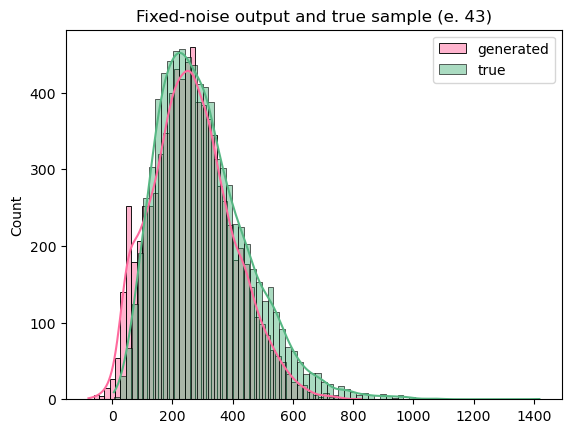

Classifier train:
    5: loss: 0.638, pred: [0.532, 0.451, 0.45, 0.45, 0.45, 0.451, 0.446, 0.439, 0.442, 0.44, 0.437, 0.446, 0.44, 0.44, 0.438, 0.445, 0.452, 0.44, 0.433, 0.434, 0.434, 0.452, 0.47, 0.487, 0.499, 0.499, 0.508, 0.523, 0.52, 0.483, 0.46, 0.468, 0.489, 0.503, 0.514, 0.521, 0.506, 0.49, 0.505, 0.521, 0.516, 0.514, 0.517, 0.518, 0.519]
    10: loss: 0.568, pred: [0.571, 0.4, 0.401, 0.402, 0.405, 0.409, 0.399, 0.386, 0.398, 0.397, 0.388, 0.395, 0.388, 0.399, 0.384, 0.396, 0.407, 0.398, 0.378, 0.388, 0.375, 0.396, 0.436, 0.452, 0.455, 0.448, 0.471, 0.513, 0.521, 0.444, 0.382, 0.397, 0.447, 0.484, 0.501, 0.507, 0.466, 0.426, 0.468, 0.519, 0.509, 0.511, 0.509, 0.514, 0.519]
    15: loss: 0.5, pred: [0.613, 0.359, 0.362, 0.363, 0.365, 0.368, 0.36, 0.347, 0.361, 0.358, 0.351, 0.357, 0.348, 0.363, 0.345, 0.36, 0.37, 0.363, 0.342, 0.356, 0.334, 0.347, 0.406, 0.421, 0.409, 0.397, 0.431, 0.475, 0.491, 0.411, 0.321, 0.335, 0.396, 0.454, 0.462, 0.464, 0.416, 0.361, 0.42, 0.489, 0.468, 0

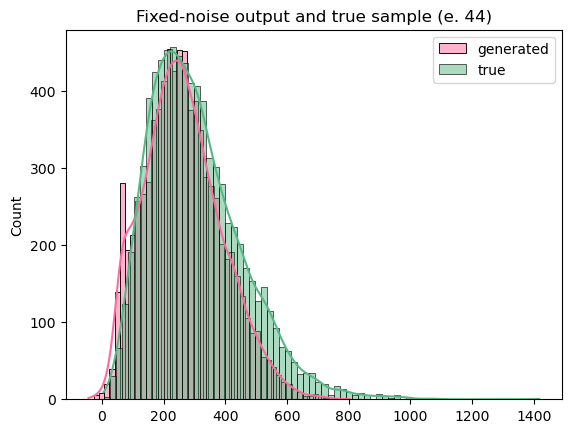

Classifier train:
    5: loss: 0.642, pred: [0.528, 0.452, 0.452, 0.452, 0.452, 0.451, 0.446, 0.442, 0.45, 0.45, 0.437, 0.443, 0.449, 0.461, 0.46, 0.448, 0.455, 0.439, 0.429, 0.436, 0.44, 0.453, 0.469, 0.485, 0.499, 0.501, 0.51, 0.523, 0.515, 0.478, 0.453, 0.46, 0.482, 0.497, 0.509, 0.519, 0.505, 0.49, 0.504, 0.517, 0.509, 0.507, 0.51, 0.511, 0.513, 0.519]
    10: loss: 0.574, pred: [0.566, 0.399, 0.401, 0.403, 0.406, 0.408, 0.398, 0.388, 0.403, 0.405, 0.386, 0.392, 0.395, 0.416, 0.403, 0.397, 0.408, 0.395, 0.373, 0.388, 0.378, 0.395, 0.433, 0.45, 0.459, 0.455, 0.478, 0.518, 0.519, 0.437, 0.375, 0.391, 0.443, 0.481, 0.501, 0.509, 0.463, 0.421, 0.461, 0.51, 0.502, 0.505, 0.501, 0.504, 0.507, 0.529]
    15: loss: 0.507, pred: [0.606, 0.359, 0.363, 0.365, 0.366, 0.367, 0.359, 0.349, 0.366, 0.365, 0.35, 0.353, 0.354, 0.379, 0.362, 0.361, 0.37, 0.361, 0.336, 0.355, 0.335, 0.346, 0.403, 0.416, 0.413, 0.405, 0.441, 0.485, 0.492, 0.399, 0.312, 0.33, 0.393, 0.452, 0.465, 0.468, 0.411, 0.351, 0.

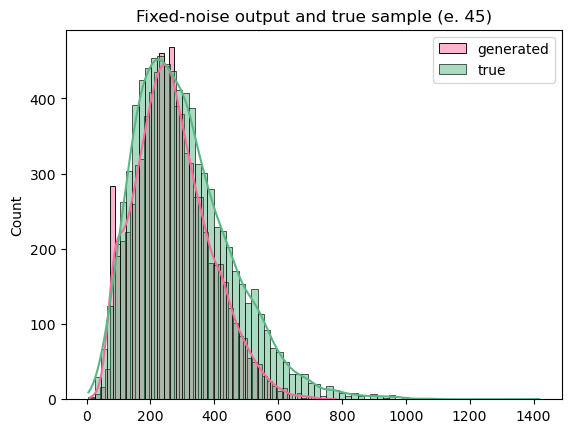

Classifier train:
    5: loss: 0.641, pred: [0.529, 0.435, 0.434, 0.435, 0.438, 0.442, 0.442, 0.443, 0.457, 0.458, 0.442, 0.446, 0.437, 0.444, 0.437, 0.454, 0.464, 0.454, 0.443, 0.433, 0.429, 0.442, 0.465, 0.483, 0.494, 0.497, 0.506, 0.521, 0.516, 0.48, 0.461, 0.47, 0.49, 0.503, 0.513, 0.519, 0.503, 0.486, 0.499, 0.515, 0.513, 0.513, 0.514, 0.515, 0.515, 0.519, 0.52]
    10: loss: 0.574, pred: [0.567, 0.386, 0.386, 0.388, 0.394, 0.4, 0.394, 0.389, 0.41, 0.412, 0.391, 0.395, 0.385, 0.401, 0.383, 0.403, 0.416, 0.409, 0.387, 0.388, 0.368, 0.385, 0.429, 0.448, 0.456, 0.454, 0.479, 0.516, 0.513, 0.43, 0.378, 0.401, 0.453, 0.49, 0.506, 0.508, 0.461, 0.414, 0.45, 0.497, 0.5, 0.507, 0.505, 0.507, 0.507, 0.523, 0.528]
    15: loss: 0.506, pred: [0.608, 0.347, 0.35, 0.352, 0.355, 0.36, 0.356, 0.351, 0.372, 0.371, 0.355, 0.357, 0.346, 0.366, 0.345, 0.366, 0.378, 0.375, 0.35, 0.357, 0.327, 0.337, 0.4, 0.413, 0.41, 0.409, 0.446, 0.481, 0.479, 0.387, 0.315, 0.342, 0.407, 0.464, 0.473, 0.466, 0.413, 

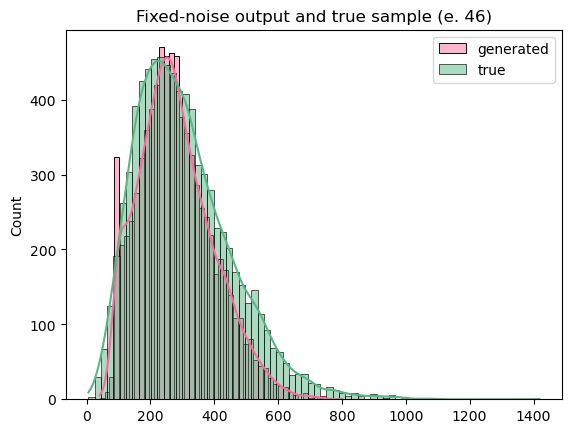

Classifier train:
    5: loss: 0.642, pred: [0.532, 0.445, 0.445, 0.445, 0.445, 0.444, 0.437, 0.434, 0.447, 0.453, 0.44, 0.446, 0.446, 0.459, 0.462, 0.448, 0.452, 0.453, 0.436, 0.433, 0.434, 0.447, 0.469, 0.494, 0.508, 0.508, 0.515, 0.529, 0.523, 0.481, 0.459, 0.471, 0.495, 0.511, 0.521, 0.524, 0.506, 0.488, 0.5, 0.513, 0.513, 0.513, 0.515, 0.516, 0.515, 0.518, 0.519, 0.521]
    10: loss: 0.575, pred: [0.569, 0.394, 0.395, 0.396, 0.399, 0.4, 0.389, 0.38, 0.401, 0.407, 0.389, 0.394, 0.391, 0.413, 0.405, 0.397, 0.404, 0.406, 0.381, 0.387, 0.371, 0.388, 0.431, 0.459, 0.472, 0.469, 0.491, 0.522, 0.517, 0.428, 0.372, 0.4, 0.459, 0.499, 0.515, 0.511, 0.466, 0.419, 0.449, 0.487, 0.491, 0.501, 0.503, 0.509, 0.508, 0.519, 0.518, 0.532]
    15: loss: 0.508, pred: [0.609, 0.355, 0.358, 0.358, 0.359, 0.36, 0.351, 0.342, 0.364, 0.366, 0.352, 0.355, 0.351, 0.375, 0.364, 0.36, 0.365, 0.37, 0.344, 0.355, 0.329, 0.34, 0.397, 0.421, 0.424, 0.422, 0.459, 0.484, 0.481, 0.383, 0.307, 0.341, 0.415, 0.474, 0

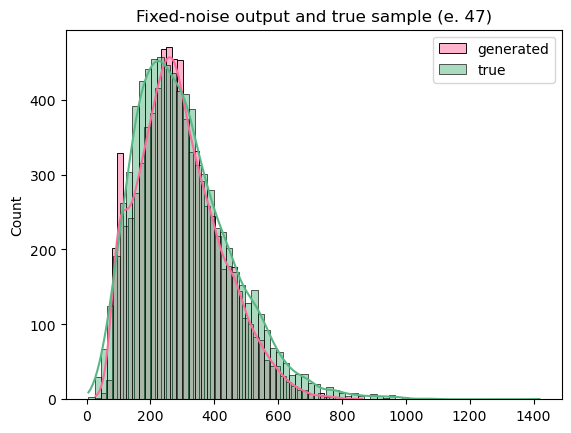

Classifier train:
    5: loss: 0.644, pred: [0.527, 0.443, 0.44, 0.438, 0.436, 0.434, 0.427, 0.423, 0.436, 0.446, 0.445, 0.453, 0.445, 0.441, 0.447, 0.448, 0.458, 0.449, 0.441, 0.44, 0.437, 0.447, 0.468, 0.489, 0.504, 0.504, 0.51, 0.522, 0.517, 0.48, 0.458, 0.468, 0.49, 0.505, 0.515, 0.518, 0.502, 0.485, 0.497, 0.51, 0.508, 0.508, 0.51, 0.512, 0.512, 0.515, 0.515, 0.518, 0.524]
    10: loss: 0.578, pred: [0.564, 0.392, 0.391, 0.391, 0.392, 0.393, 0.381, 0.371, 0.392, 0.402, 0.394, 0.4, 0.39, 0.398, 0.393, 0.397, 0.408, 0.403, 0.387, 0.396, 0.375, 0.387, 0.426, 0.458, 0.472, 0.466, 0.487, 0.517, 0.515, 0.429, 0.371, 0.396, 0.454, 0.494, 0.51, 0.505, 0.461, 0.417, 0.447, 0.482, 0.483, 0.491, 0.495, 0.504, 0.505, 0.515, 0.512, 0.523, 0.546]
    15: loss: 0.512, pred: [0.603, 0.353, 0.354, 0.353, 0.353, 0.355, 0.344, 0.333, 0.356, 0.362, 0.356, 0.361, 0.351, 0.362, 0.353, 0.36, 0.369, 0.368, 0.35, 0.364, 0.333, 0.34, 0.389, 0.423, 0.428, 0.418, 0.454, 0.478, 0.483, 0.388, 0.304, 0.334, 0.4

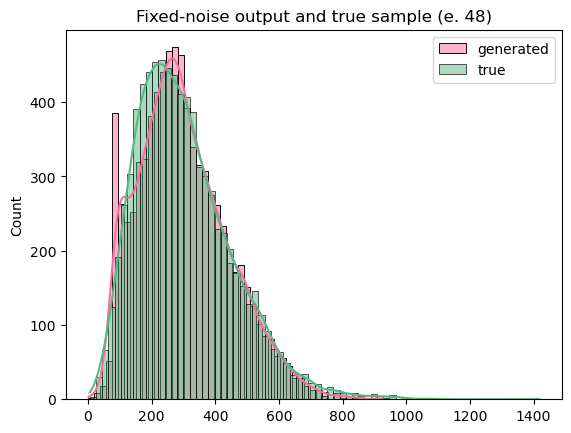

Classifier train:
    5: loss: 0.653, pred: [0.517, 0.448, 0.449, 0.45, 0.452, 0.452, 0.445, 0.435, 0.435, 0.438, 0.441, 0.455, 0.461, 0.454, 0.438, 0.453, 0.457, 0.448, 0.445, 0.444, 0.441, 0.444, 0.462, 0.484, 0.497, 0.497, 0.503, 0.513, 0.507, 0.475, 0.454, 0.461, 0.481, 0.494, 0.503, 0.508, 0.499, 0.489, 0.497, 0.503, 0.497, 0.496, 0.5, 0.504, 0.506, 0.508, 0.506, 0.506, 0.511, 0.514]
    10: loss: 0.589, pred: [0.552, 0.395, 0.397, 0.4, 0.405, 0.408, 0.395, 0.379, 0.39, 0.394, 0.388, 0.4, 0.403, 0.408, 0.384, 0.399, 0.405, 0.399, 0.388, 0.397, 0.377, 0.383, 0.415, 0.455, 0.472, 0.462, 0.483, 0.515, 0.517, 0.432, 0.369, 0.39, 0.447, 0.486, 0.503, 0.5, 0.46, 0.425, 0.452, 0.48, 0.474, 0.478, 0.484, 0.496, 0.499, 0.509, 0.507, 0.512, 0.531, 0.54]
    15: loss: 0.524, pred: [0.592, 0.355, 0.358, 0.361, 0.366, 0.37, 0.356, 0.338, 0.355, 0.355, 0.351, 0.361, 0.361, 0.371, 0.345, 0.362, 0.366, 0.365, 0.352, 0.365, 0.334, 0.337, 0.376, 0.424, 0.433, 0.412, 0.448, 0.483, 0.5, 0.397, 0.3, 0

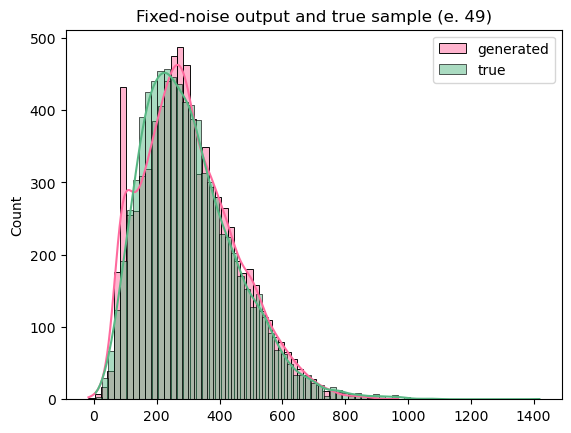

Classifier train:
    5: loss: 0.653, pred: [0.518, 0.446, 0.445, 0.445, 0.447, 0.451, 0.452, 0.455, 0.464, 0.458, 0.442, 0.444, 0.442, 0.455, 0.466, 0.45, 0.455, 0.446, 0.433, 0.436, 0.435, 0.443, 0.462, 0.488, 0.501, 0.497, 0.504, 0.517, 0.516, 0.482, 0.459, 0.465, 0.485, 0.499, 0.507, 0.51, 0.492, 0.48, 0.491, 0.501, 0.497, 0.495, 0.497, 0.5, 0.502, 0.505, 0.508, 0.507, 0.511, 0.512, 0.516]
    10: loss: 0.593, pred: [0.551, 0.393, 0.394, 0.396, 0.401, 0.408, 0.401, 0.395, 0.417, 0.413, 0.389, 0.392, 0.387, 0.408, 0.41, 0.396, 0.402, 0.398, 0.378, 0.39, 0.373, 0.383, 0.411, 0.458, 0.478, 0.461, 0.482, 0.523, 0.533, 0.446, 0.376, 0.392, 0.45, 0.491, 0.508, 0.502, 0.452, 0.417, 0.448, 0.482, 0.474, 0.475, 0.478, 0.491, 0.494, 0.506, 0.511, 0.513, 0.528, 0.532, 0.551]
    15: loss: 0.532, pred: [0.588, 0.353, 0.355, 0.357, 0.363, 0.372, 0.362, 0.351, 0.379, 0.373, 0.351, 0.352, 0.347, 0.371, 0.367, 0.358, 0.363, 0.363, 0.342, 0.359, 0.33, 0.337, 0.367, 0.425, 0.441, 0.407, 0.444, 0.497

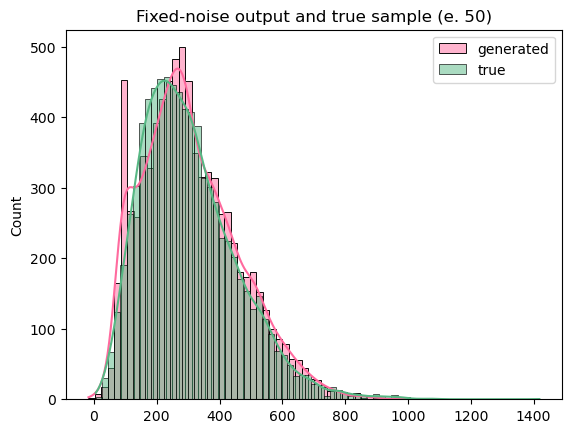

Classifier train:
    5: loss: 0.654, pred: [0.518, 0.454, 0.454, 0.454, 0.455, 0.456, 0.454, 0.451, 0.456, 0.449, 0.441, 0.449, 0.442, 0.442, 0.453, 0.438, 0.459, 0.454, 0.446, 0.441, 0.431, 0.436, 0.452, 0.481, 0.497, 0.493, 0.501, 0.516, 0.516, 0.483, 0.46, 0.466, 0.486, 0.499, 0.508, 0.511, 0.494, 0.481, 0.492, 0.503, 0.5, 0.498, 0.501, 0.504, 0.505, 0.507, 0.509, 0.508, 0.512, 0.513, 0.516, 0.516]
    10: loss: 0.595, pred: [0.551, 0.4, 0.402, 0.404, 0.41, 0.416, 0.404, 0.392, 0.41, 0.406, 0.388, 0.396, 0.388, 0.397, 0.399, 0.386, 0.405, 0.405, 0.391, 0.397, 0.372, 0.377, 0.398, 0.451, 0.474, 0.452, 0.475, 0.522, 0.541, 0.454, 0.378, 0.392, 0.451, 0.491, 0.509, 0.502, 0.449, 0.415, 0.449, 0.485, 0.476, 0.475, 0.478, 0.492, 0.496, 0.507, 0.514, 0.513, 0.525, 0.528, 0.545, 0.542]
    15: loss: 0.536, pred: [0.586, 0.359, 0.361, 0.364, 0.371, 0.38, 0.364, 0.346, 0.373, 0.368, 0.349, 0.356, 0.348, 0.361, 0.357, 0.348, 0.365, 0.37, 0.355, 0.365, 0.331, 0.333, 0.351, 0.421, 0.441, 0.393

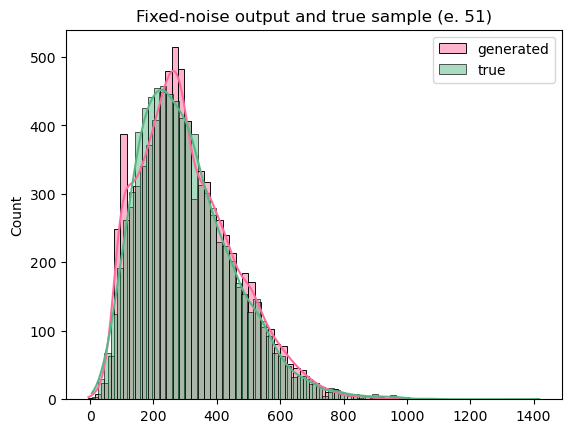

Classifier train:
    5: loss: 0.653, pred: [0.528, 0.458, 0.457, 0.457, 0.458, 0.46, 0.458, 0.454, 0.456, 0.451, 0.446, 0.461, 0.454, 0.458, 0.461, 0.458, 0.456, 0.451, 0.452, 0.458, 0.445, 0.442, 0.455, 0.484, 0.5, 0.495, 0.504, 0.524, 0.53, 0.493, 0.466, 0.471, 0.492, 0.505, 0.516, 0.52, 0.5, 0.488, 0.501, 0.516, 0.511, 0.508, 0.509, 0.512, 0.513, 0.517, 0.521, 0.52, 0.522, 0.521, 0.523, 0.523, 0.527]
    10: loss: 0.595, pred: [0.559, 0.404, 0.405, 0.406, 0.412, 0.419, 0.408, 0.394, 0.411, 0.408, 0.393, 0.407, 0.399, 0.411, 0.407, 0.404, 0.402, 0.403, 0.398, 0.413, 0.386, 0.384, 0.397, 0.454, 0.477, 0.449, 0.474, 0.528, 0.557, 0.467, 0.383, 0.395, 0.455, 0.495, 0.515, 0.507, 0.452, 0.42, 0.456, 0.494, 0.482, 0.479, 0.481, 0.498, 0.503, 0.515, 0.524, 0.52, 0.53, 0.53, 0.549, 0.544, 0.558]
    15: loss: 0.536, pred: [0.595, 0.363, 0.364, 0.365, 0.373, 0.384, 0.368, 0.347, 0.375, 0.37, 0.354, 0.367, 0.359, 0.373, 0.365, 0.364, 0.363, 0.368, 0.364, 0.379, 0.345, 0.342, 0.346, 0.423, 0.

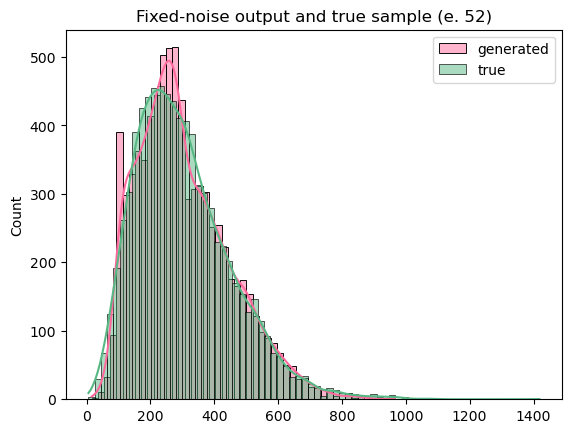

Classifier train:
    5: loss: 0.654, pred: [0.519, 0.445, 0.443, 0.442, 0.443, 0.445, 0.444, 0.442, 0.448, 0.446, 0.44, 0.456, 0.459, 0.454, 0.457, 0.449, 0.443, 0.445, 0.439, 0.439, 0.427, 0.436, 0.453, 0.485, 0.501, 0.496, 0.503, 0.518, 0.52, 0.485, 0.456, 0.462, 0.484, 0.498, 0.508, 0.511, 0.495, 0.484, 0.495, 0.506, 0.5, 0.497, 0.5, 0.505, 0.506, 0.509, 0.511, 0.509, 0.512, 0.511, 0.515, 0.515, 0.519, 0.521]
    10: loss: 0.599, pred: [0.55, 0.393, 0.392, 0.394, 0.4, 0.408, 0.396, 0.382, 0.403, 0.405, 0.387, 0.403, 0.404, 0.407, 0.404, 0.394, 0.389, 0.397, 0.387, 0.397, 0.371, 0.378, 0.392, 0.455, 0.482, 0.453, 0.474, 0.524, 0.552, 0.461, 0.377, 0.388, 0.45, 0.49, 0.511, 0.503, 0.45, 0.42, 0.453, 0.488, 0.476, 0.472, 0.476, 0.495, 0.499, 0.508, 0.515, 0.509, 0.519, 0.52, 0.538, 0.534, 0.547, 0.554]
    15: loss: 0.542, pred: [0.584, 0.353, 0.352, 0.353, 0.362, 0.375, 0.357, 0.335, 0.368, 0.368, 0.348, 0.362, 0.362, 0.37, 0.362, 0.354, 0.351, 0.362, 0.354, 0.365, 0.331, 0.338, 0.33

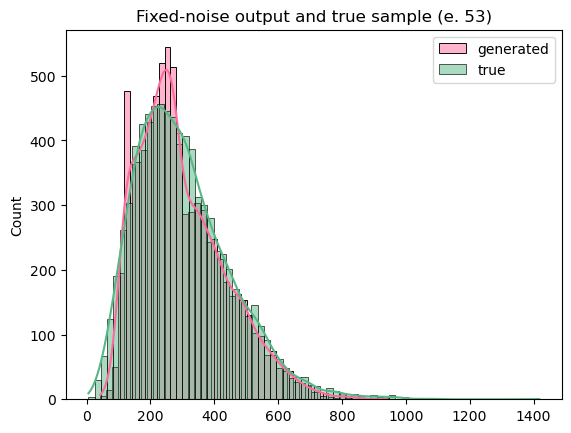

Classifier train:
    5: loss: 0.659, pred: [0.518, 0.454, 0.454, 0.455, 0.46, 0.466, 0.464, 0.462, 0.471, 0.469, 0.456, 0.458, 0.452, 0.457, 0.458, 0.445, 0.443, 0.442, 0.444, 0.451, 0.445, 0.445, 0.454, 0.483, 0.503, 0.499, 0.507, 0.521, 0.52, 0.48, 0.453, 0.46, 0.483, 0.498, 0.509, 0.515, 0.5, 0.489, 0.499, 0.507, 0.5, 0.497, 0.502, 0.506, 0.507, 0.508, 0.509, 0.506, 0.51, 0.511, 0.514, 0.514, 0.517, 0.518, 0.523]
    10: loss: 0.606, pred: [0.548, 0.4, 0.401, 0.404, 0.414, 0.424, 0.413, 0.399, 0.423, 0.424, 0.399, 0.403, 0.397, 0.409, 0.403, 0.39, 0.387, 0.392, 0.392, 0.407, 0.386, 0.386, 0.391, 0.453, 0.486, 0.461, 0.481, 0.525, 0.545, 0.452, 0.374, 0.39, 0.451, 0.489, 0.513, 0.507, 0.459, 0.43, 0.458, 0.487, 0.477, 0.474, 0.483, 0.502, 0.503, 0.507, 0.507, 0.499, 0.515, 0.52, 0.537, 0.533, 0.542, 0.546, 0.563]
    15: loss: 0.55, pred: [0.581, 0.36, 0.359, 0.362, 0.374, 0.391, 0.373, 0.349, 0.385, 0.385, 0.357, 0.362, 0.355, 0.37, 0.361, 0.35, 0.347, 0.356, 0.357, 0.374, 0.343, 0

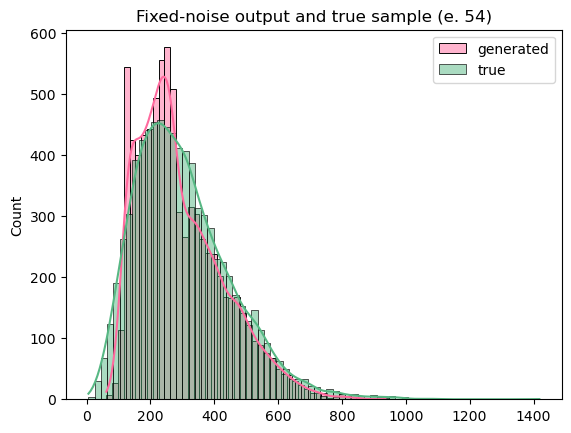

Classifier train:
    5: loss: 0.654, pred: [0.528, 0.447, 0.446, 0.446, 0.447, 0.449, 0.447, 0.448, 0.463, 0.462, 0.442, 0.455, 0.462, 0.46, 0.46, 0.447, 0.451, 0.443, 0.44, 0.454, 0.45, 0.455, 0.463, 0.492, 0.51, 0.507, 0.515, 0.528, 0.526, 0.489, 0.462, 0.469, 0.493, 0.507, 0.519, 0.523, 0.508, 0.497, 0.506, 0.513, 0.508, 0.506, 0.511, 0.516, 0.517, 0.517, 0.516, 0.513, 0.519, 0.522, 0.525, 0.525, 0.527, 0.528, 0.531, 0.535]
    10: loss: 0.602, pred: [0.558, 0.396, 0.396, 0.397, 0.404, 0.412, 0.399, 0.387, 0.417, 0.42, 0.388, 0.401, 0.407, 0.412, 0.404, 0.391, 0.396, 0.395, 0.392, 0.413, 0.391, 0.396, 0.399, 0.46, 0.491, 0.467, 0.486, 0.522, 0.541, 0.448, 0.378, 0.399, 0.461, 0.496, 0.52, 0.51, 0.467, 0.434, 0.458, 0.485, 0.484, 0.485, 0.498, 0.518, 0.515, 0.512, 0.503, 0.498, 0.521, 0.534, 0.553, 0.547, 0.551, 0.551, 0.561, 0.567]
    15: loss: 0.545, pred: [0.59, 0.357, 0.354, 0.353, 0.363, 0.38, 0.359, 0.336, 0.379, 0.38, 0.346, 0.361, 0.364, 0.372, 0.362, 0.35, 0.355, 0.359, 0.

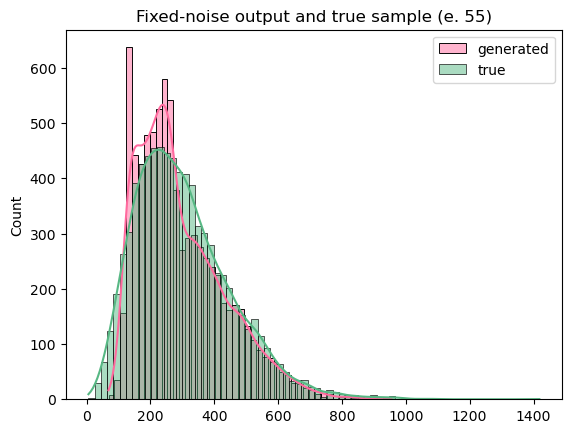

Classifier train:
    5: loss: 0.654, pred: [0.527, 0.447, 0.444, 0.442, 0.44, 0.438, 0.432, 0.434, 0.454, 0.463, 0.446, 0.453, 0.445, 0.455, 0.456, 0.446, 0.441, 0.44, 0.449, 0.448, 0.44, 0.447, 0.462, 0.492, 0.511, 0.51, 0.516, 0.526, 0.52, 0.479, 0.457, 0.469, 0.494, 0.508, 0.519, 0.521, 0.507, 0.493, 0.501, 0.508, 0.506, 0.506, 0.511, 0.515, 0.514, 0.513, 0.51, 0.509, 0.518, 0.522, 0.527, 0.527, 0.527, 0.527, 0.527, 0.528, 0.527]
    10: loss: 0.603, pred: [0.554, 0.394, 0.392, 0.39, 0.394, 0.399, 0.383, 0.373, 0.407, 0.418, 0.389, 0.399, 0.39, 0.406, 0.399, 0.387, 0.384, 0.389, 0.398, 0.405, 0.378, 0.387, 0.398, 0.46, 0.493, 0.475, 0.491, 0.517, 0.526, 0.43, 0.374, 0.403, 0.464, 0.497, 0.521, 0.511, 0.472, 0.434, 0.454, 0.48, 0.486, 0.491, 0.507, 0.523, 0.516, 0.508, 0.492, 0.49, 0.52, 0.539, 0.556, 0.551, 0.55, 0.547, 0.547, 0.546, 0.543]
    15: loss: 0.547, pred: [0.587, 0.355, 0.349, 0.347, 0.355, 0.368, 0.345, 0.322, 0.369, 0.379, 0.345, 0.357, 0.347, 0.366, 0.356, 0.346, 0.3

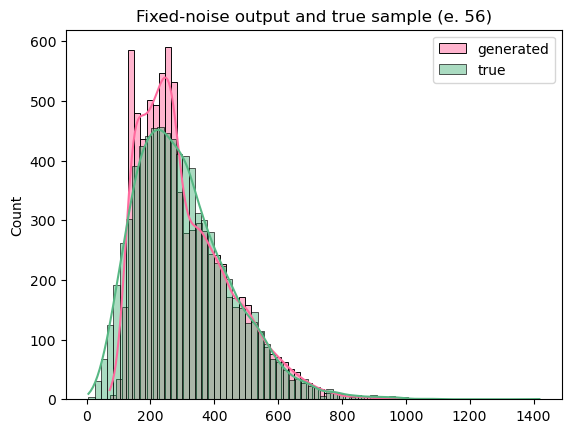

Classifier train:
    5: loss: 0.66, pred: [0.517, 0.439, 0.44, 0.441, 0.445, 0.448, 0.445, 0.443, 0.454, 0.457, 0.442, 0.453, 0.443, 0.45, 0.45, 0.449, 0.442, 0.443, 0.45, 0.453, 0.45, 0.457, 0.462, 0.484, 0.501, 0.502, 0.507, 0.514, 0.508, 0.473, 0.456, 0.467, 0.486, 0.496, 0.507, 0.513, 0.505, 0.495, 0.501, 0.507, 0.504, 0.503, 0.509, 0.513, 0.512, 0.51, 0.506, 0.504, 0.511, 0.515, 0.518, 0.518, 0.517, 0.516, 0.514, 0.514, 0.512, 0.513]
    10: loss: 0.61, pred: [0.545, 0.389, 0.389, 0.391, 0.4, 0.409, 0.395, 0.381, 0.408, 0.415, 0.385, 0.397, 0.388, 0.402, 0.392, 0.388, 0.384, 0.392, 0.399, 0.41, 0.388, 0.397, 0.399, 0.449, 0.483, 0.472, 0.486, 0.507, 0.51, 0.417, 0.374, 0.404, 0.458, 0.485, 0.512, 0.508, 0.476, 0.439, 0.456, 0.482, 0.492, 0.496, 0.513, 0.526, 0.516, 0.505, 0.487, 0.487, 0.517, 0.536, 0.55, 0.545, 0.541, 0.535, 0.529, 0.521, 0.518, 0.53]
    15: loss: 0.553, pred: [0.582, 0.35, 0.347, 0.348, 0.361, 0.379, 0.357, 0.33, 0.372, 0.378, 0.343, 0.359, 0.348, 0.365, 0.353

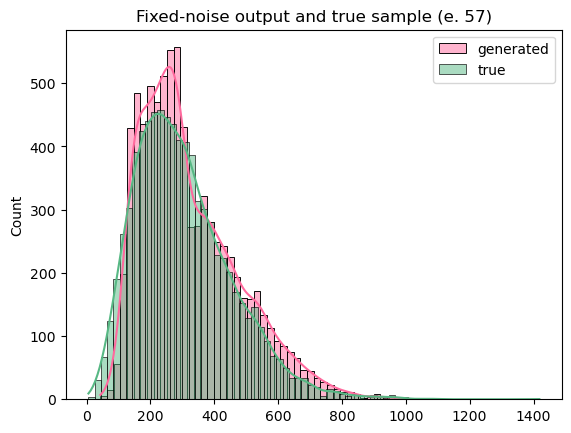

Classifier train:
    5: loss: 0.661, pred: [0.516, 0.466, 0.465, 0.464, 0.464, 0.461, 0.452, 0.443, 0.445, 0.449, 0.444, 0.449, 0.448, 0.45, 0.463, 0.441, 0.443, 0.443, 0.445, 0.446, 0.436, 0.447, 0.459, 0.483, 0.505, 0.507, 0.512, 0.517, 0.508, 0.471, 0.455, 0.466, 0.486, 0.497, 0.509, 0.515, 0.505, 0.492, 0.498, 0.503, 0.503, 0.502, 0.508, 0.511, 0.509, 0.506, 0.501, 0.5, 0.51, 0.515, 0.517, 0.518, 0.516, 0.515, 0.512, 0.511, 0.509, 0.511, 0.513]
    10: loss: 0.614, pred: [0.543, 0.412, 0.41, 0.41, 0.415, 0.419, 0.4, 0.38, 0.399, 0.407, 0.384, 0.393, 0.391, 0.401, 0.404, 0.38, 0.384, 0.389, 0.394, 0.402, 0.376, 0.389, 0.394, 0.444, 0.484, 0.479, 0.493, 0.512, 0.509, 0.413, 0.373, 0.405, 0.459, 0.484, 0.514, 0.514, 0.483, 0.441, 0.458, 0.483, 0.495, 0.499, 0.518, 0.529, 0.517, 0.504, 0.484, 0.484, 0.516, 0.536, 0.548, 0.544, 0.538, 0.531, 0.521, 0.512, 0.508, 0.519, 0.534]
    15: loss: 0.557, pred: [0.577, 0.37, 0.365, 0.364, 0.374, 0.389, 0.36, 0.327, 0.362, 0.37, 0.34, 0.354, 0.3

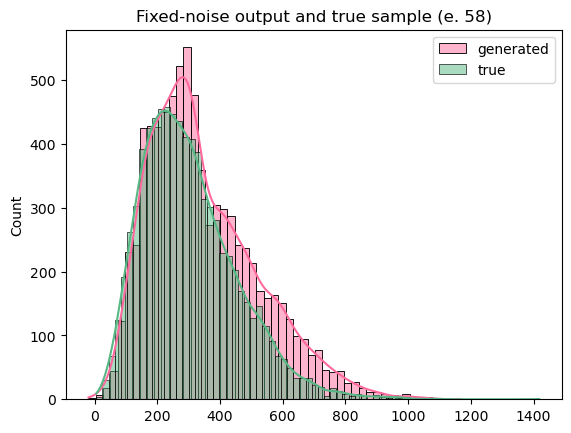

Classifier train:
    5: loss: 0.663, pred: [0.512, 0.455, 0.453, 0.452, 0.452, 0.452, 0.447, 0.442, 0.449, 0.453, 0.445, 0.453, 0.443, 0.448, 0.454, 0.44, 0.446, 0.441, 0.446, 0.445, 0.44, 0.444, 0.451, 0.474, 0.498, 0.502, 0.509, 0.516, 0.505, 0.467, 0.448, 0.457, 0.477, 0.489, 0.502, 0.513, 0.505, 0.495, 0.501, 0.505, 0.499, 0.497, 0.503, 0.507, 0.507, 0.505, 0.502, 0.5, 0.507, 0.51, 0.512, 0.513, 0.513, 0.512, 0.511, 0.511, 0.509, 0.51, 0.51, 0.51]
    10: loss: 0.618, pred: [0.538, 0.404, 0.401, 0.401, 0.407, 0.414, 0.399, 0.381, 0.403, 0.411, 0.388, 0.397, 0.387, 0.401, 0.396, 0.38, 0.387, 0.388, 0.397, 0.402, 0.384, 0.388, 0.381, 0.425, 0.47, 0.471, 0.491, 0.516, 0.511, 0.413, 0.369, 0.398, 0.453, 0.479, 0.511, 0.518, 0.487, 0.448, 0.467, 0.489, 0.495, 0.496, 0.514, 0.525, 0.516, 0.506, 0.49, 0.487, 0.514, 0.53, 0.54, 0.537, 0.532, 0.528, 0.52, 0.516, 0.511, 0.518, 0.526, 0.545]
    15: loss: 0.567, pred: [0.568, 0.362, 0.356, 0.355, 0.367, 0.384, 0.359, 0.328, 0.365, 0.373, 0.3

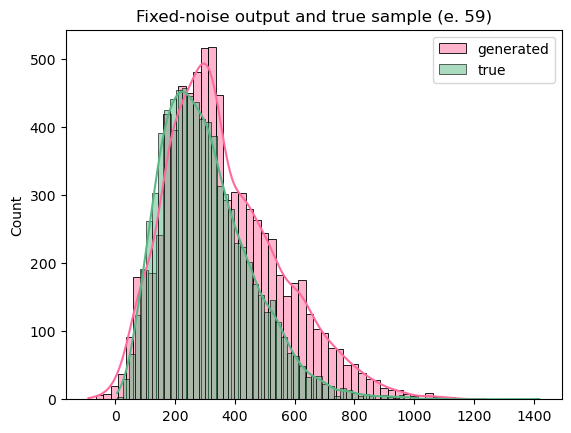

Classifier train:
    5: loss: 0.666, pred: [0.509, 0.445, 0.443, 0.442, 0.443, 0.444, 0.442, 0.442, 0.454, 0.46, 0.447, 0.451, 0.452, 0.441, 0.457, 0.449, 0.45, 0.449, 0.456, 0.457, 0.45, 0.453, 0.456, 0.473, 0.489, 0.491, 0.499, 0.511, 0.506, 0.472, 0.456, 0.465, 0.483, 0.493, 0.504, 0.51, 0.499, 0.488, 0.495, 0.503, 0.501, 0.499, 0.503, 0.505, 0.503, 0.503, 0.501, 0.5, 0.506, 0.507, 0.508, 0.508, 0.508, 0.508, 0.507, 0.508, 0.506, 0.506, 0.506, 0.504, 0.499]
    10: loss: 0.623, pred: [0.533, 0.394, 0.392, 0.393, 0.399, 0.406, 0.395, 0.383, 0.408, 0.417, 0.391, 0.396, 0.396, 0.395, 0.4, 0.388, 0.39, 0.395, 0.406, 0.412, 0.397, 0.398, 0.382, 0.415, 0.455, 0.456, 0.482, 0.517, 0.517, 0.422, 0.377, 0.405, 0.459, 0.484, 0.514, 0.518, 0.483, 0.445, 0.468, 0.492, 0.498, 0.498, 0.513, 0.52, 0.512, 0.505, 0.495, 0.491, 0.515, 0.525, 0.532, 0.529, 0.526, 0.525, 0.52, 0.519, 0.514, 0.52, 0.521, 0.528, 0.518]
    15: loss: 0.575, pred: [0.562, 0.352, 0.348, 0.349, 0.361, 0.377, 0.355, 0.33, 0.

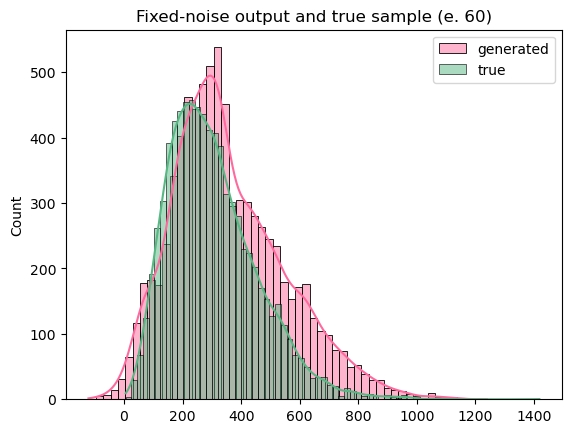

Classifier train:
    5: loss: 0.66, pred: [0.521, 0.446, 0.444, 0.443, 0.443, 0.444, 0.443, 0.444, 0.452, 0.451, 0.44, 0.452, 0.471, 0.463, 0.465, 0.447, 0.443, 0.442, 0.449, 0.443, 0.434, 0.44, 0.449, 0.475, 0.497, 0.499, 0.509, 0.524, 0.52, 0.48, 0.46, 0.469, 0.49, 0.502, 0.515, 0.522, 0.506, 0.491, 0.502, 0.512, 0.51, 0.507, 0.512, 0.513, 0.511, 0.512, 0.512, 0.51, 0.516, 0.518, 0.519, 0.519, 0.52, 0.52, 0.521, 0.523, 0.521, 0.522, 0.52, 0.515, 0.508, 0.505]
    10: loss: 0.617, pred: [0.545, 0.394, 0.392, 0.392, 0.398, 0.405, 0.395, 0.384, 0.405, 0.407, 0.385, 0.397, 0.414, 0.414, 0.407, 0.389, 0.385, 0.39, 0.4, 0.397, 0.383, 0.388, 0.37, 0.407, 0.455, 0.457, 0.489, 0.532, 0.533, 0.429, 0.376, 0.404, 0.463, 0.491, 0.523, 0.53, 0.488, 0.444, 0.472, 0.5, 0.504, 0.503, 0.518, 0.525, 0.516, 0.512, 0.504, 0.498, 0.523, 0.532, 0.54, 0.537, 0.535, 0.535, 0.533, 0.536, 0.53, 0.535, 0.532, 0.533, 0.518, 0.506]
    15: loss: 0.567, pred: [0.575, 0.352, 0.348, 0.348, 0.359, 0.374, 0.355, 0.3

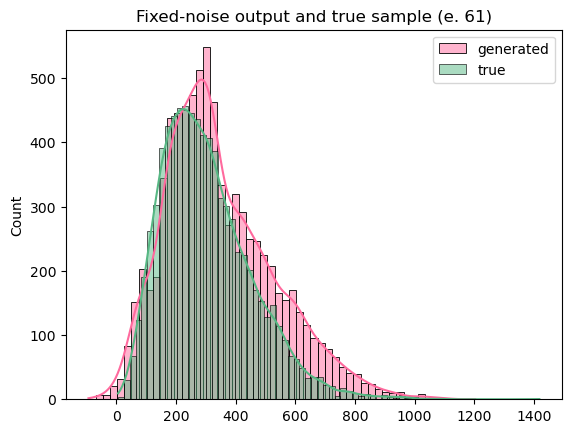

Classifier train:
    5: loss: 0.661, pred: [0.515, 0.442, 0.441, 0.44, 0.442, 0.444, 0.443, 0.443, 0.452, 0.454, 0.442, 0.455, 0.459, 0.464, 0.454, 0.435, 0.45, 0.439, 0.441, 0.442, 0.437, 0.435, 0.436, 0.458, 0.484, 0.491, 0.505, 0.521, 0.513, 0.473, 0.45, 0.457, 0.477, 0.489, 0.504, 0.52, 0.513, 0.503, 0.512, 0.515, 0.505, 0.5, 0.507, 0.511, 0.512, 0.513, 0.512, 0.507, 0.511, 0.512, 0.513, 0.513, 0.514, 0.514, 0.515, 0.519, 0.516, 0.515, 0.51, 0.501, 0.492, 0.49, 0.497]
    10: loss: 0.619, pred: [0.54, 0.392, 0.39, 0.392, 0.399, 0.407, 0.396, 0.384, 0.406, 0.411, 0.388, 0.4, 0.404, 0.416, 0.398, 0.377, 0.391, 0.388, 0.394, 0.398, 0.388, 0.386, 0.357, 0.388, 0.44, 0.449, 0.487, 0.534, 0.53, 0.423, 0.369, 0.394, 0.452, 0.481, 0.517, 0.533, 0.495, 0.455, 0.483, 0.507, 0.503, 0.499, 0.514, 0.522, 0.515, 0.514, 0.508, 0.5, 0.521, 0.527, 0.533, 0.531, 0.531, 0.531, 0.53, 0.536, 0.528, 0.531, 0.523, 0.513, 0.495, 0.484, 0.501]
    15: loss: 0.57, pred: [0.569, 0.348, 0.346, 0.347, 0.36, 0

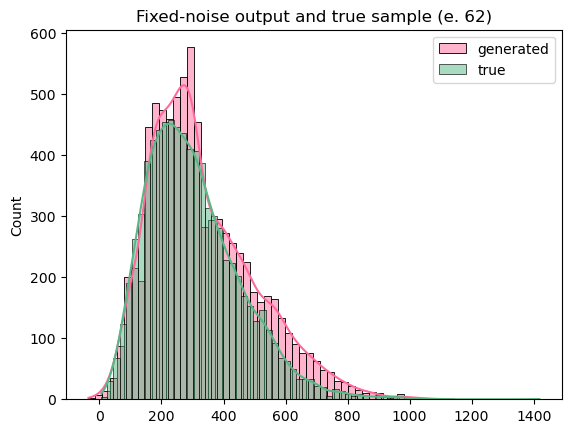

Classifier train:
    5: loss: 0.666, pred: [0.509, 0.456, 0.454, 0.452, 0.451, 0.451, 0.448, 0.448, 0.457, 0.451, 0.435, 0.451, 0.445, 0.45, 0.457, 0.453, 0.458, 0.45, 0.453, 0.449, 0.441, 0.438, 0.433, 0.449, 0.476, 0.482, 0.497, 0.515, 0.512, 0.478, 0.46, 0.465, 0.48, 0.487, 0.502, 0.514, 0.503, 0.493, 0.501, 0.508, 0.504, 0.499, 0.503, 0.505, 0.505, 0.505, 0.506, 0.503, 0.506, 0.505, 0.504, 0.504, 0.506, 0.507, 0.509, 0.512, 0.51, 0.508, 0.502, 0.494, 0.486, 0.483, 0.489, 0.498]
    10: loss: 0.625, pred: [0.533, 0.404, 0.402, 0.402, 0.408, 0.414, 0.401, 0.389, 0.411, 0.409, 0.381, 0.395, 0.392, 0.404, 0.4, 0.392, 0.397, 0.397, 0.406, 0.404, 0.393, 0.39, 0.355, 0.378, 0.433, 0.444, 0.482, 0.534, 0.531, 0.429, 0.379, 0.403, 0.456, 0.48, 0.516, 0.533, 0.49, 0.449, 0.478, 0.505, 0.506, 0.501, 0.513, 0.517, 0.51, 0.508, 0.506, 0.499, 0.518, 0.521, 0.524, 0.522, 0.522, 0.524, 0.523, 0.529, 0.523, 0.523, 0.512, 0.501, 0.484, 0.472, 0.488, 0.51]
    15: loss: 0.577, pred: [0.563, 0.36, 0.

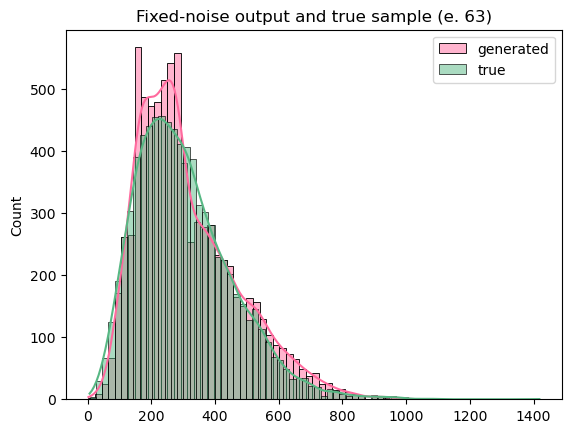

Classifier train:
    5: loss: 0.66, pred: [0.527, 0.447, 0.445, 0.445, 0.447, 0.451, 0.448, 0.443, 0.45, 0.455, 0.448, 0.452, 0.464, 0.463, 0.464, 0.452, 0.437, 0.44, 0.451, 0.462, 0.461, 0.461, 0.455, 0.47, 0.496, 0.502, 0.516, 0.533, 0.526, 0.481, 0.458, 0.469, 0.492, 0.503, 0.519, 0.531, 0.518, 0.504, 0.514, 0.522, 0.517, 0.513, 0.52, 0.522, 0.521, 0.52, 0.519, 0.516, 0.522, 0.523, 0.524, 0.524, 0.524, 0.525, 0.525, 0.527, 0.525, 0.523, 0.519, 0.513, 0.507, 0.505, 0.51, 0.517, 0.525]
    10: loss: 0.618, pred: [0.55, 0.395, 0.393, 0.393, 0.401, 0.412, 0.399, 0.382, 0.403, 0.41, 0.392, 0.397, 0.408, 0.415, 0.407, 0.394, 0.38, 0.388, 0.402, 0.413, 0.411, 0.412, 0.369, 0.389, 0.443, 0.455, 0.495, 0.546, 0.541, 0.425, 0.371, 0.403, 0.466, 0.494, 0.534, 0.547, 0.501, 0.452, 0.483, 0.511, 0.516, 0.513, 0.531, 0.536, 0.525, 0.519, 0.511, 0.503, 0.528, 0.537, 0.543, 0.54, 0.536, 0.536, 0.53, 0.535, 0.526, 0.528, 0.518, 0.516, 0.506, 0.493, 0.506, 0.524, 0.539]
    15: loss: 0.567, pred: [0

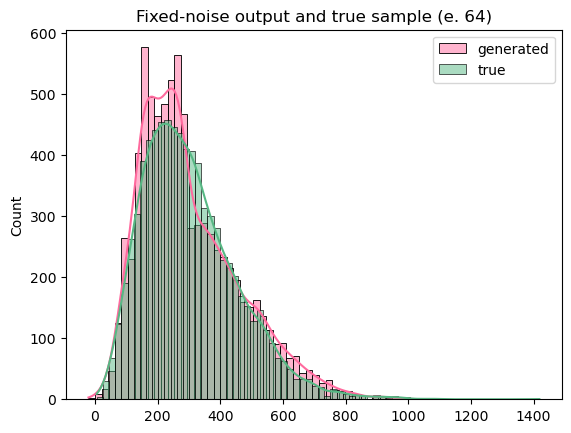

Classifier train:
    5: loss: 0.659, pred: [0.526, 0.44, 0.437, 0.435, 0.435, 0.436, 0.433, 0.433, 0.447, 0.453, 0.44, 0.449, 0.449, 0.455, 0.448, 0.428, 0.454, 0.452, 0.471, 0.458, 0.454, 0.456, 0.45, 0.466, 0.489, 0.495, 0.509, 0.529, 0.526, 0.482, 0.466, 0.479, 0.501, 0.51, 0.524, 0.53, 0.512, 0.495, 0.507, 0.519, 0.522, 0.52, 0.525, 0.523, 0.52, 0.519, 0.517, 0.516, 0.523, 0.524, 0.523, 0.523, 0.522, 0.523, 0.521, 0.521, 0.519, 0.518, 0.515, 0.511, 0.506, 0.503, 0.507, 0.514, 0.52, 0.519]
    10: loss: 0.617, pred: [0.55, 0.391, 0.387, 0.386, 0.392, 0.401, 0.388, 0.374, 0.401, 0.409, 0.386, 0.395, 0.395, 0.408, 0.393, 0.373, 0.395, 0.4, 0.421, 0.41, 0.406, 0.409, 0.365, 0.384, 0.436, 0.448, 0.488, 0.543, 0.542, 0.424, 0.379, 0.416, 0.479, 0.503, 0.543, 0.549, 0.496, 0.439, 0.473, 0.509, 0.528, 0.527, 0.542, 0.541, 0.525, 0.517, 0.508, 0.505, 0.533, 0.542, 0.544, 0.542, 0.535, 0.535, 0.524, 0.524, 0.515, 0.517, 0.511, 0.515, 0.508, 0.494, 0.505, 0.52, 0.529, 0.522]
    15: loss: 0.

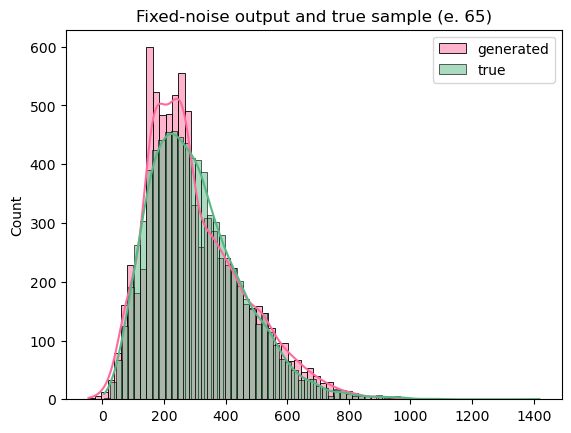

Classifier train:
    5: loss: 0.667, pred: [0.511, 0.441, 0.441, 0.442, 0.447, 0.456, 0.46, 0.458, 0.462, 0.457, 0.446, 0.456, 0.457, 0.454, 0.455, 0.455, 0.45, 0.445, 0.458, 0.451, 0.443, 0.44, 0.436, 0.45, 0.476, 0.484, 0.498, 0.515, 0.511, 0.477, 0.46, 0.469, 0.485, 0.492, 0.506, 0.517, 0.506, 0.494, 0.503, 0.511, 0.509, 0.506, 0.51, 0.51, 0.509, 0.508, 0.508, 0.505, 0.509, 0.509, 0.507, 0.508, 0.508, 0.508, 0.507, 0.508, 0.507, 0.504, 0.499, 0.494, 0.489, 0.487, 0.491, 0.497, 0.504, 0.506, 0.507]
    10: loss: 0.627, pred: [0.533, 0.393, 0.391, 0.393, 0.403, 0.418, 0.411, 0.397, 0.415, 0.414, 0.391, 0.4, 0.402, 0.406, 0.398, 0.394, 0.39, 0.391, 0.409, 0.405, 0.395, 0.393, 0.358, 0.373, 0.428, 0.445, 0.482, 0.534, 0.529, 0.421, 0.381, 0.413, 0.467, 0.488, 0.527, 0.541, 0.494, 0.444, 0.473, 0.508, 0.522, 0.52, 0.532, 0.528, 0.514, 0.508, 0.503, 0.502, 0.525, 0.53, 0.528, 0.528, 0.522, 0.523, 0.513, 0.511, 0.504, 0.502, 0.496, 0.498, 0.49, 0.478, 0.488, 0.501, 0.512, 0.506, 0.513]
  

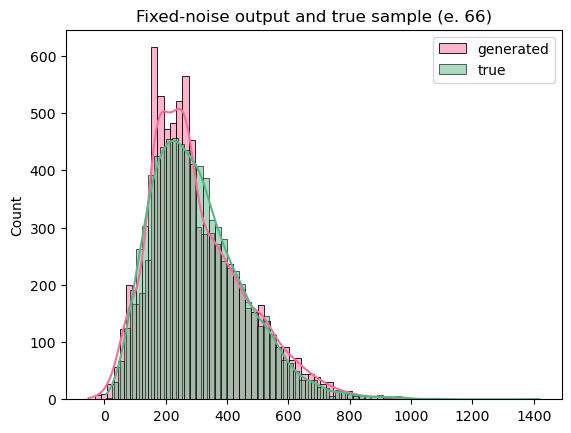

Classifier train:
    5: loss: 0.662, pred: [0.524, 0.453, 0.452, 0.452, 0.455, 0.459, 0.456, 0.453, 0.459, 0.456, 0.442, 0.449, 0.447, 0.445, 0.456, 0.442, 0.451, 0.455, 0.456, 0.451, 0.448, 0.453, 0.446, 0.461, 0.488, 0.497, 0.51, 0.528, 0.522, 0.48, 0.465, 0.477, 0.496, 0.505, 0.521, 0.529, 0.513, 0.496, 0.507, 0.519, 0.522, 0.52, 0.524, 0.522, 0.518, 0.516, 0.516, 0.516, 0.523, 0.523, 0.521, 0.522, 0.521, 0.522, 0.519, 0.517, 0.516, 0.514, 0.512, 0.51, 0.505, 0.502, 0.506, 0.511, 0.516, 0.516, 0.517, 0.513]
    10: loss: 0.621, pred: [0.546, 0.402, 0.399, 0.399, 0.408, 0.419, 0.407, 0.392, 0.412, 0.412, 0.387, 0.395, 0.394, 0.398, 0.4, 0.385, 0.392, 0.401, 0.406, 0.402, 0.398, 0.406, 0.364, 0.377, 0.435, 0.452, 0.491, 0.545, 0.538, 0.418, 0.38, 0.417, 0.476, 0.498, 0.542, 0.553, 0.498, 0.437, 0.47, 0.512, 0.535, 0.534, 0.546, 0.539, 0.521, 0.511, 0.505, 0.506, 0.536, 0.543, 0.542, 0.541, 0.532, 0.532, 0.518, 0.512, 0.504, 0.503, 0.5, 0.512, 0.508, 0.492, 0.501, 0.512, 0.519, 0.508,

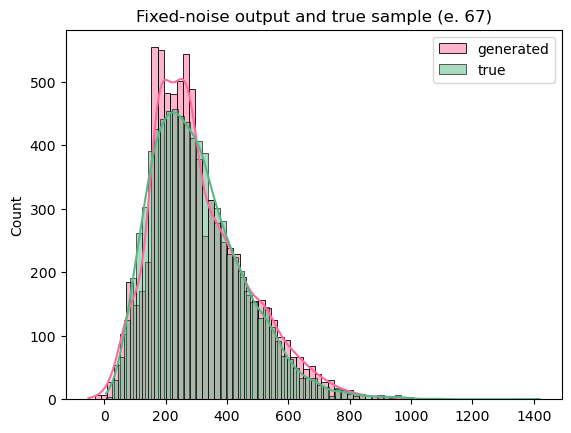

Classifier train:
    5: loss: 0.668, pred: [0.51, 0.455, 0.452, 0.451, 0.452, 0.455, 0.451, 0.445, 0.448, 0.444, 0.435, 0.447, 0.445, 0.453, 0.459, 0.443, 0.452, 0.456, 0.457, 0.459, 0.458, 0.458, 0.45, 0.461, 0.483, 0.49, 0.5, 0.515, 0.509, 0.472, 0.461, 0.471, 0.487, 0.494, 0.508, 0.517, 0.503, 0.489, 0.497, 0.508, 0.51, 0.508, 0.511, 0.509, 0.506, 0.504, 0.504, 0.505, 0.511, 0.511, 0.509, 0.51, 0.508, 0.509, 0.506, 0.503, 0.502, 0.5, 0.499, 0.499, 0.496, 0.493, 0.496, 0.499, 0.503, 0.501, 0.503, 0.498, 0.5]
    10: loss: 0.629, pred: [0.532, 0.404, 0.399, 0.398, 0.405, 0.415, 0.402, 0.385, 0.402, 0.401, 0.38, 0.394, 0.392, 0.406, 0.402, 0.383, 0.393, 0.4, 0.407, 0.41, 0.407, 0.41, 0.372, 0.379, 0.434, 0.453, 0.488, 0.538, 0.526, 0.413, 0.382, 0.417, 0.469, 0.488, 0.531, 0.546, 0.493, 0.437, 0.467, 0.508, 0.53, 0.529, 0.537, 0.527, 0.509, 0.502, 0.5, 0.503, 0.529, 0.534, 0.529, 0.53, 0.522, 0.523, 0.509, 0.501, 0.494, 0.491, 0.49, 0.501, 0.497, 0.483, 0.489, 0.499, 0.504, 0.494, 0.5

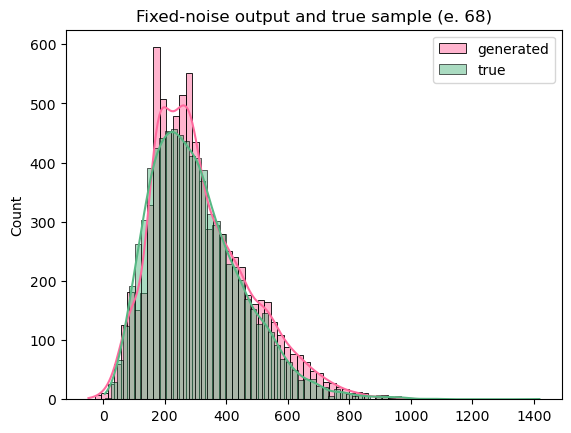

Classifier train:
    5: loss: 0.664, pred: [0.519, 0.441, 0.439, 0.438, 0.44, 0.443, 0.443, 0.442, 0.447, 0.449, 0.445, 0.455, 0.461, 0.458, 0.454, 0.443, 0.458, 0.461, 0.462, 0.458, 0.456, 0.463, 0.456, 0.461, 0.483, 0.493, 0.506, 0.524, 0.518, 0.477, 0.463, 0.476, 0.495, 0.502, 0.518, 0.526, 0.51, 0.493, 0.503, 0.516, 0.519, 0.518, 0.521, 0.518, 0.513, 0.512, 0.512, 0.513, 0.52, 0.52, 0.517, 0.519, 0.517, 0.518, 0.515, 0.513, 0.511, 0.509, 0.507, 0.506, 0.501, 0.498, 0.501, 0.506, 0.511, 0.51, 0.51, 0.506, 0.508, 0.508]
    10: loss: 0.624, pred: [0.541, 0.392, 0.388, 0.387, 0.394, 0.405, 0.395, 0.381, 0.401, 0.405, 0.39, 0.402, 0.407, 0.411, 0.399, 0.386, 0.399, 0.406, 0.411, 0.408, 0.406, 0.416, 0.375, 0.374, 0.431, 0.453, 0.493, 0.547, 0.535, 0.413, 0.379, 0.418, 0.475, 0.495, 0.541, 0.556, 0.498, 0.435, 0.469, 0.514, 0.539, 0.538, 0.547, 0.535, 0.515, 0.507, 0.504, 0.508, 0.537, 0.543, 0.538, 0.539, 0.529, 0.53, 0.514, 0.506, 0.498, 0.495, 0.492, 0.506, 0.502, 0.485, 0.492, 0.50

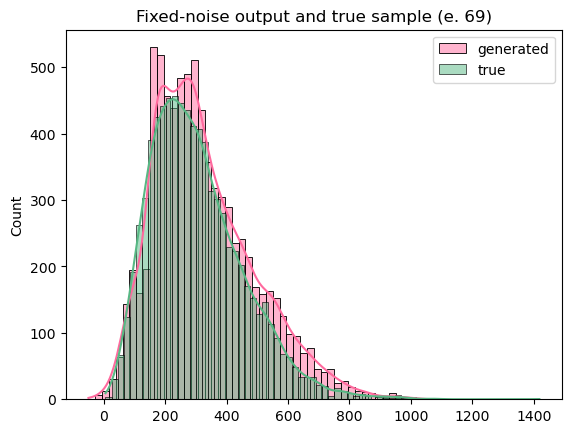

Classifier train:
    5: loss: 0.659, pred: [0.528, 0.447, 0.444, 0.441, 0.441, 0.441, 0.435, 0.431, 0.444, 0.45, 0.442, 0.452, 0.448, 0.457, 0.442, 0.445, 0.45, 0.444, 0.459, 0.46, 0.454, 0.456, 0.45, 0.462, 0.49, 0.501, 0.516, 0.535, 0.523, 0.473, 0.458, 0.474, 0.497, 0.507, 0.526, 0.537, 0.518, 0.496, 0.508, 0.522, 0.526, 0.525, 0.529, 0.526, 0.52, 0.518, 0.517, 0.518, 0.528, 0.53, 0.528, 0.529, 0.526, 0.527, 0.521, 0.518, 0.516, 0.514, 0.513, 0.513, 0.509, 0.505, 0.508, 0.513, 0.518, 0.516, 0.518, 0.512, 0.515, 0.515, 0.518]
    10: loss: 0.618, pred: [0.552, 0.398, 0.393, 0.391, 0.397, 0.406, 0.39, 0.373, 0.399, 0.407, 0.388, 0.398, 0.395, 0.41, 0.388, 0.39, 0.393, 0.394, 0.408, 0.41, 0.405, 0.414, 0.367, 0.369, 0.432, 0.456, 0.499, 0.558, 0.542, 0.408, 0.371, 0.412, 0.476, 0.498, 0.551, 0.569, 0.504, 0.432, 0.47, 0.519, 0.547, 0.546, 0.557, 0.544, 0.521, 0.511, 0.508, 0.511, 0.545, 0.552, 0.548, 0.549, 0.537, 0.538, 0.519, 0.509, 0.5, 0.497, 0.494, 0.51, 0.509, 0.489, 0.496, 0.50

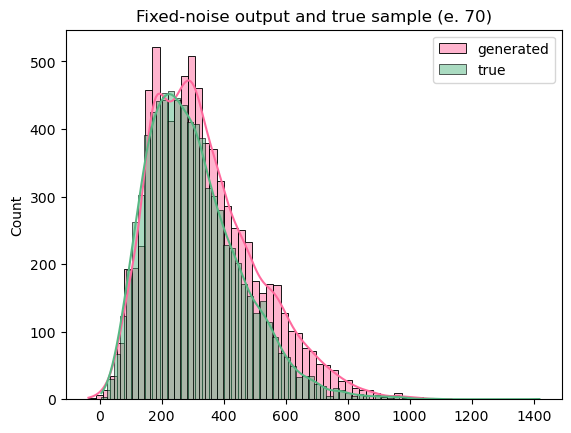

Classifier train:
    5: loss: 0.659, pred: [0.533, 0.439, 0.439, 0.44, 0.445, 0.451, 0.449, 0.444, 0.451, 0.453, 0.452, 0.454, 0.452, 0.464, 0.46, 0.442, 0.452, 0.452, 0.453, 0.46, 0.46, 0.462, 0.451, 0.458, 0.487, 0.5, 0.517, 0.539, 0.529, 0.479, 0.463, 0.478, 0.5, 0.509, 0.529, 0.542, 0.525, 0.505, 0.517, 0.53, 0.532, 0.529, 0.535, 0.532, 0.528, 0.526, 0.525, 0.524, 0.533, 0.533, 0.531, 0.532, 0.53, 0.53, 0.526, 0.524, 0.521, 0.518, 0.514, 0.512, 0.509, 0.504, 0.508, 0.514, 0.521, 0.521, 0.523, 0.516, 0.519, 0.517, 0.521, 0.521]
    10: loss: 0.617, pred: [0.556, 0.391, 0.388, 0.389, 0.4, 0.414, 0.402, 0.383, 0.405, 0.408, 0.397, 0.4, 0.398, 0.416, 0.403, 0.389, 0.395, 0.402, 0.402, 0.409, 0.411, 0.42, 0.366, 0.362, 0.424, 0.45, 0.498, 0.56, 0.548, 0.412, 0.372, 0.412, 0.476, 0.498, 0.551, 0.572, 0.509, 0.437, 0.477, 0.525, 0.55, 0.548, 0.56, 0.549, 0.526, 0.518, 0.515, 0.515, 0.547, 0.553, 0.55, 0.55, 0.538, 0.539, 0.521, 0.514, 0.503, 0.499, 0.491, 0.506, 0.505, 0.483, 0.491, 0.50

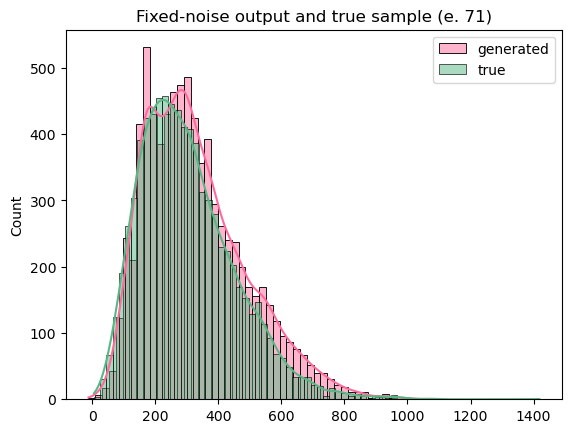

Classifier train:
    5: loss: 0.663, pred: [0.521, 0.445, 0.443, 0.443, 0.446, 0.45, 0.447, 0.441, 0.445, 0.443, 0.439, 0.45, 0.448, 0.456, 0.457, 0.445, 0.455, 0.455, 0.45, 0.453, 0.45, 0.448, 0.439, 0.445, 0.473, 0.484, 0.501, 0.525, 0.522, 0.482, 0.466, 0.476, 0.492, 0.498, 0.515, 0.528, 0.512, 0.496, 0.508, 0.523, 0.524, 0.52, 0.523, 0.52, 0.517, 0.517, 0.519, 0.52, 0.524, 0.522, 0.518, 0.519, 0.519, 0.52, 0.519, 0.518, 0.516, 0.512, 0.508, 0.502, 0.494, 0.491, 0.496, 0.504, 0.513, 0.513, 0.513, 0.508, 0.509, 0.508, 0.509, 0.508, 0.511]
    10: loss: 0.624, pred: [0.542, 0.396, 0.392, 0.392, 0.401, 0.413, 0.4, 0.382, 0.4, 0.401, 0.386, 0.397, 0.395, 0.409, 0.401, 0.388, 0.396, 0.403, 0.4, 0.402, 0.402, 0.406, 0.359, 0.352, 0.413, 0.44, 0.485, 0.548, 0.539, 0.418, 0.38, 0.414, 0.469, 0.487, 0.536, 0.559, 0.502, 0.44, 0.477, 0.524, 0.545, 0.541, 0.549, 0.537, 0.519, 0.514, 0.515, 0.517, 0.542, 0.543, 0.537, 0.538, 0.53, 0.532, 0.519, 0.513, 0.504, 0.498, 0.489, 0.493, 0.486, 0.469, 

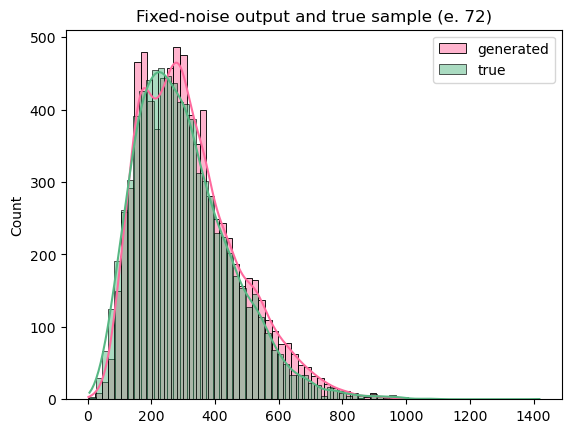

Classifier train:
    5: loss: 0.661, pred: [0.525, 0.442, 0.44, 0.439, 0.441, 0.444, 0.439, 0.436, 0.449, 0.453, 0.442, 0.452, 0.443, 0.446, 0.45, 0.448, 0.457, 0.451, 0.45, 0.442, 0.438, 0.445, 0.444, 0.45, 0.479, 0.493, 0.509, 0.53, 0.521, 0.477, 0.461, 0.472, 0.489, 0.497, 0.516, 0.533, 0.519, 0.502, 0.514, 0.527, 0.526, 0.522, 0.526, 0.525, 0.521, 0.521, 0.522, 0.522, 0.527, 0.527, 0.524, 0.525, 0.524, 0.524, 0.522, 0.52, 0.518, 0.513, 0.51, 0.507, 0.5, 0.497, 0.502, 0.509, 0.516, 0.517, 0.517, 0.512, 0.513, 0.511, 0.513, 0.512, 0.516, 0.522]
    10: loss: 0.622, pred: [0.547, 0.393, 0.389, 0.389, 0.397, 0.408, 0.394, 0.377, 0.403, 0.409, 0.388, 0.398, 0.39, 0.401, 0.394, 0.393, 0.398, 0.4, 0.4, 0.393, 0.392, 0.403, 0.361, 0.355, 0.415, 0.445, 0.49, 0.55, 0.537, 0.413, 0.374, 0.41, 0.466, 0.486, 0.536, 0.563, 0.509, 0.444, 0.483, 0.527, 0.546, 0.542, 0.553, 0.544, 0.525, 0.519, 0.517, 0.517, 0.544, 0.547, 0.542, 0.543, 0.534, 0.534, 0.519, 0.513, 0.503, 0.496, 0.488, 0.495, 0.491,

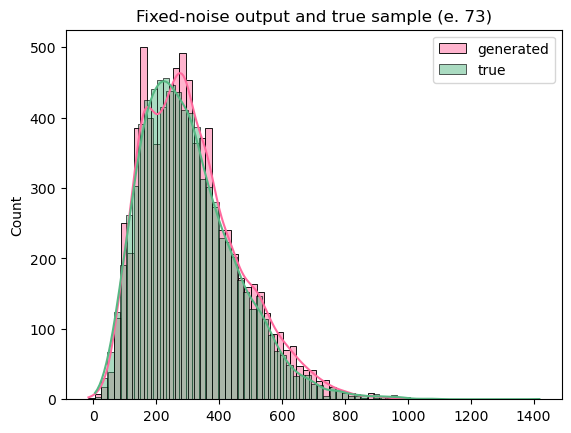

Classifier train:
    5: loss: 0.666, pred: [0.516, 0.452, 0.45, 0.449, 0.45, 0.452, 0.451, 0.449, 0.456, 0.455, 0.443, 0.461, 0.461, 0.451, 0.451, 0.455, 0.444, 0.438, 0.449, 0.443, 0.443, 0.45, 0.44, 0.444, 0.469, 0.481, 0.498, 0.519, 0.516, 0.481, 0.465, 0.474, 0.489, 0.495, 0.511, 0.523, 0.511, 0.496, 0.506, 0.518, 0.519, 0.516, 0.52, 0.518, 0.515, 0.515, 0.515, 0.514, 0.519, 0.518, 0.514, 0.515, 0.514, 0.515, 0.513, 0.512, 0.51, 0.507, 0.502, 0.496, 0.491, 0.488, 0.493, 0.499, 0.507, 0.508, 0.509, 0.505, 0.506, 0.504, 0.505, 0.504, 0.506, 0.513, 0.514]
    10: loss: 0.629, pred: [0.537, 0.402, 0.398, 0.398, 0.405, 0.415, 0.404, 0.389, 0.409, 0.411, 0.389, 0.405, 0.406, 0.406, 0.395, 0.396, 0.386, 0.386, 0.4, 0.394, 0.398, 0.407, 0.359, 0.352, 0.408, 0.437, 0.481, 0.54, 0.532, 0.42, 0.382, 0.414, 0.467, 0.484, 0.529, 0.553, 0.504, 0.446, 0.482, 0.523, 0.539, 0.535, 0.547, 0.538, 0.521, 0.516, 0.515, 0.514, 0.536, 0.538, 0.532, 0.533, 0.525, 0.526, 0.513, 0.51, 0.5, 0.494, 0.483, 0.

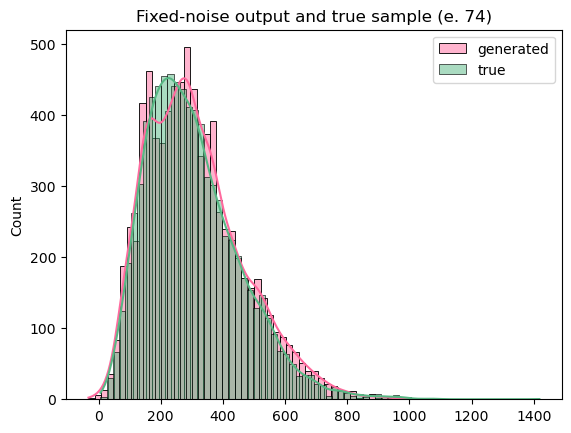

Classifier train:
    5: loss: 0.665, pred: [0.517, 0.446, 0.442, 0.44, 0.44, 0.443, 0.442, 0.441, 0.453, 0.459, 0.456, 0.452, 0.448, 0.451, 0.459, 0.434, 0.448, 0.45, 0.466, 0.459, 0.453, 0.454, 0.444, 0.446, 0.471, 0.481, 0.498, 0.521, 0.517, 0.474, 0.458, 0.468, 0.486, 0.492, 0.51, 0.526, 0.516, 0.504, 0.515, 0.524, 0.52, 0.516, 0.521, 0.52, 0.518, 0.518, 0.518, 0.516, 0.519, 0.518, 0.514, 0.515, 0.515, 0.515, 0.513, 0.513, 0.511, 0.506, 0.501, 0.496, 0.49, 0.487, 0.492, 0.498, 0.508, 0.51, 0.51, 0.505, 0.506, 0.503, 0.504, 0.503, 0.506, 0.513, 0.514, 0.514]
    10: loss: 0.628, pred: [0.539, 0.397, 0.392, 0.39, 0.397, 0.407, 0.396, 0.382, 0.405, 0.414, 0.4, 0.397, 0.394, 0.405, 0.4, 0.378, 0.39, 0.397, 0.414, 0.409, 0.406, 0.411, 0.362, 0.353, 0.409, 0.435, 0.48, 0.543, 0.535, 0.415, 0.375, 0.409, 0.463, 0.482, 0.529, 0.555, 0.508, 0.453, 0.491, 0.53, 0.541, 0.536, 0.548, 0.54, 0.525, 0.521, 0.52, 0.517, 0.538, 0.539, 0.532, 0.533, 0.526, 0.527, 0.515, 0.513, 0.503, 0.495, 0.483, 0

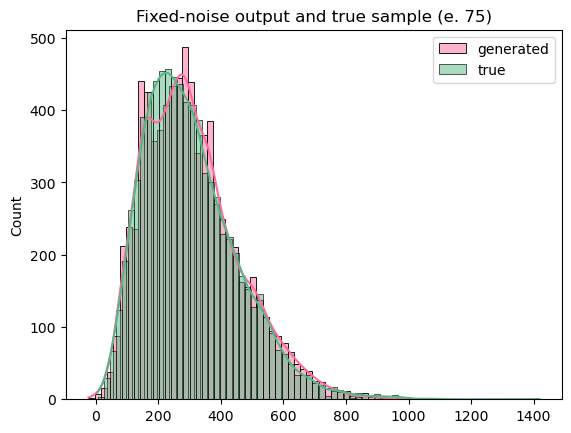

Classifier train:
    5: loss: 0.667, pred: [0.516, 0.45, 0.449, 0.449, 0.452, 0.455, 0.452, 0.448, 0.454, 0.456, 0.45, 0.463, 0.461, 0.453, 0.448, 0.451, 0.456, 0.446, 0.447, 0.445, 0.445, 0.447, 0.442, 0.451, 0.474, 0.483, 0.499, 0.52, 0.516, 0.478, 0.461, 0.469, 0.486, 0.493, 0.509, 0.523, 0.511, 0.498, 0.51, 0.52, 0.517, 0.512, 0.517, 0.516, 0.514, 0.515, 0.516, 0.514, 0.517, 0.515, 0.513, 0.513, 0.513, 0.514, 0.514, 0.515, 0.513, 0.509, 0.503, 0.496, 0.489, 0.487, 0.492, 0.499, 0.509, 0.511, 0.511, 0.507, 0.507, 0.504, 0.504, 0.502, 0.506, 0.512, 0.512, 0.512, 0.514]
    10: loss: 0.631, pred: [0.537, 0.401, 0.398, 0.399, 0.408, 0.418, 0.406, 0.388, 0.407, 0.412, 0.395, 0.406, 0.405, 0.408, 0.391, 0.392, 0.396, 0.393, 0.397, 0.395, 0.4, 0.405, 0.361, 0.358, 0.411, 0.436, 0.48, 0.541, 0.535, 0.421, 0.378, 0.409, 0.463, 0.483, 0.527, 0.551, 0.504, 0.45, 0.487, 0.526, 0.536, 0.53, 0.542, 0.535, 0.521, 0.519, 0.519, 0.516, 0.535, 0.535, 0.53, 0.53, 0.524, 0.526, 0.516, 0.516, 0.507, 0

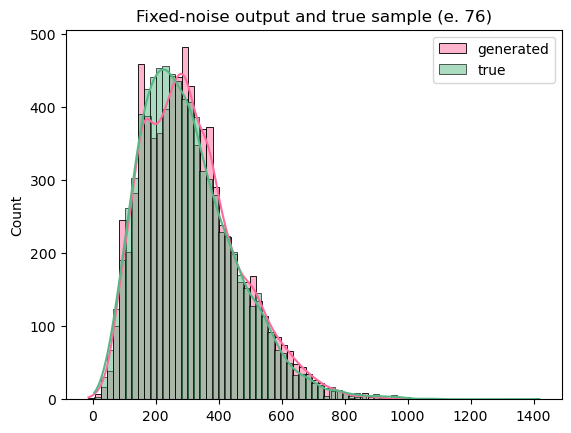

Classifier train:
    5: loss: 0.666, pred: [0.518, 0.449, 0.446, 0.444, 0.445, 0.448, 0.445, 0.441, 0.449, 0.453, 0.452, 0.459, 0.453, 0.452, 0.446, 0.45, 0.456, 0.45, 0.461, 0.457, 0.453, 0.449, 0.44, 0.448, 0.474, 0.486, 0.502, 0.523, 0.519, 0.479, 0.463, 0.472, 0.489, 0.496, 0.512, 0.526, 0.515, 0.501, 0.512, 0.522, 0.52, 0.516, 0.521, 0.52, 0.517, 0.517, 0.518, 0.516, 0.52, 0.518, 0.515, 0.516, 0.516, 0.517, 0.515, 0.516, 0.513, 0.509, 0.503, 0.496, 0.491, 0.488, 0.493, 0.499, 0.509, 0.512, 0.512, 0.508, 0.508, 0.505, 0.506, 0.504, 0.507, 0.514, 0.515, 0.515, 0.517, 0.518]
    10: loss: 0.631, pred: [0.538, 0.397, 0.393, 0.392, 0.399, 0.409, 0.397, 0.38, 0.4, 0.407, 0.396, 0.402, 0.398, 0.406, 0.389, 0.392, 0.396, 0.396, 0.407, 0.405, 0.405, 0.404, 0.357, 0.358, 0.412, 0.437, 0.481, 0.541, 0.536, 0.424, 0.379, 0.409, 0.464, 0.483, 0.527, 0.551, 0.506, 0.454, 0.491, 0.526, 0.535, 0.529, 0.541, 0.537, 0.524, 0.521, 0.521, 0.516, 0.534, 0.534, 0.53, 0.529, 0.524, 0.526, 0.517, 0.519,

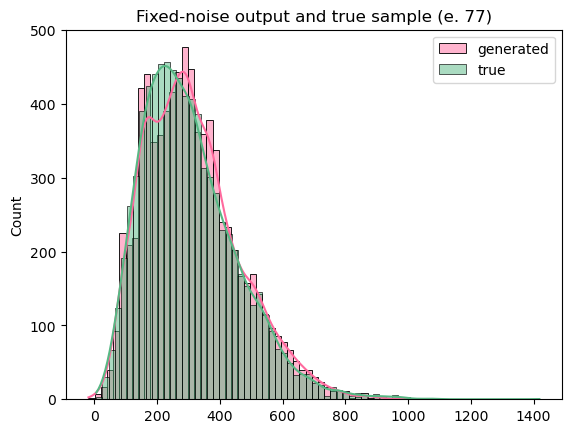

Classifier train:
    5: loss: 0.667, pred: [0.513, 0.443, 0.44, 0.437, 0.436, 0.438, 0.435, 0.432, 0.443, 0.451, 0.45, 0.458, 0.451, 0.44, 0.446, 0.46, 0.444, 0.439, 0.451, 0.453, 0.448, 0.441, 0.434, 0.442, 0.467, 0.479, 0.496, 0.517, 0.513, 0.477, 0.461, 0.469, 0.485, 0.49, 0.505, 0.52, 0.512, 0.501, 0.511, 0.519, 0.514, 0.51, 0.514, 0.514, 0.513, 0.514, 0.515, 0.513, 0.515, 0.512, 0.509, 0.51, 0.511, 0.511, 0.511, 0.513, 0.511, 0.506, 0.499, 0.489, 0.482, 0.481, 0.486, 0.494, 0.505, 0.509, 0.508, 0.505, 0.503, 0.499, 0.499, 0.497, 0.5, 0.507, 0.508, 0.508, 0.51, 0.51, 0.509]
    10: loss: 0.633, pred: [0.532, 0.392, 0.387, 0.386, 0.391, 0.4, 0.388, 0.373, 0.395, 0.406, 0.394, 0.402, 0.396, 0.396, 0.389, 0.4, 0.384, 0.385, 0.399, 0.401, 0.402, 0.396, 0.353, 0.355, 0.408, 0.433, 0.476, 0.536, 0.532, 0.426, 0.381, 0.409, 0.46, 0.478, 0.519, 0.546, 0.506, 0.46, 0.495, 0.527, 0.53, 0.522, 0.534, 0.53, 0.521, 0.521, 0.521, 0.515, 0.53, 0.528, 0.522, 0.523, 0.52, 0.522, 0.516, 0.519, 0.51

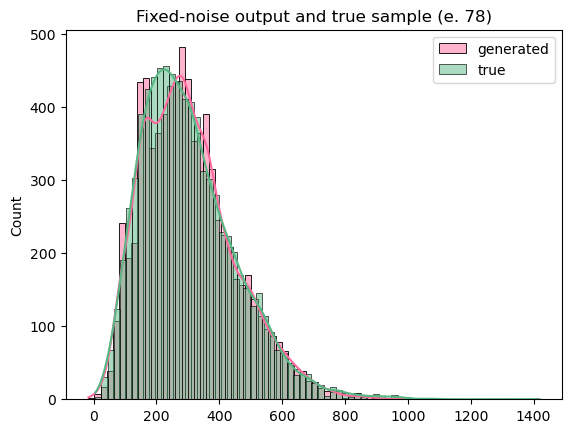

Classifier train:
    5: loss: 0.671, pred: [0.507, 0.46, 0.457, 0.455, 0.454, 0.456, 0.454, 0.453, 0.462, 0.462, 0.454, 0.463, 0.454, 0.457, 0.449, 0.438, 0.45, 0.441, 0.444, 0.452, 0.451, 0.446, 0.438, 0.446, 0.468, 0.478, 0.493, 0.511, 0.507, 0.472, 0.456, 0.464, 0.48, 0.487, 0.5, 0.514, 0.508, 0.499, 0.507, 0.512, 0.507, 0.502, 0.508, 0.509, 0.508, 0.508, 0.508, 0.505, 0.507, 0.506, 0.504, 0.505, 0.505, 0.505, 0.505, 0.506, 0.504, 0.5, 0.495, 0.488, 0.482, 0.48, 0.485, 0.492, 0.501, 0.504, 0.504, 0.501, 0.5, 0.496, 0.496, 0.495, 0.497, 0.503, 0.504, 0.504, 0.505, 0.506, 0.504, 0.506]
    10: loss: 0.638, pred: [0.528, 0.409, 0.405, 0.404, 0.41, 0.419, 0.408, 0.393, 0.413, 0.417, 0.398, 0.406, 0.399, 0.411, 0.391, 0.379, 0.389, 0.388, 0.394, 0.403, 0.407, 0.402, 0.357, 0.359, 0.41, 0.433, 0.475, 0.533, 0.528, 0.424, 0.379, 0.406, 0.457, 0.476, 0.516, 0.541, 0.504, 0.461, 0.494, 0.523, 0.523, 0.516, 0.528, 0.527, 0.517, 0.517, 0.517, 0.51, 0.524, 0.522, 0.518, 0.518, 0.516, 0.517, 0.

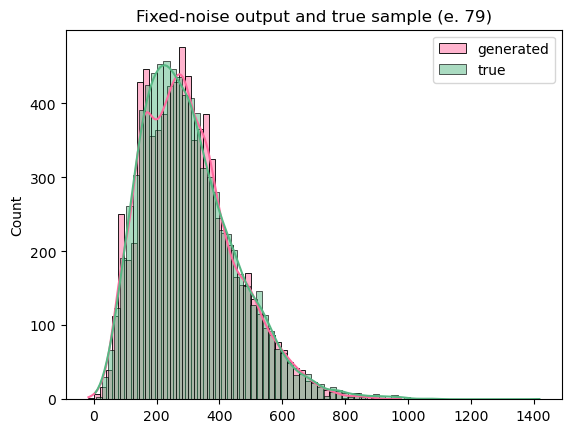

Classifier train:
    5: loss: 0.667, pred: [0.514, 0.442, 0.439, 0.437, 0.438, 0.441, 0.438, 0.438, 0.451, 0.455, 0.444, 0.45, 0.446, 0.452, 0.452, 0.444, 0.444, 0.449, 0.456, 0.449, 0.444, 0.44, 0.432, 0.441, 0.468, 0.48, 0.497, 0.518, 0.514, 0.476, 0.455, 0.462, 0.479, 0.487, 0.503, 0.521, 0.514, 0.505, 0.515, 0.522, 0.513, 0.508, 0.514, 0.516, 0.516, 0.517, 0.517, 0.512, 0.514, 0.512, 0.509, 0.51, 0.511, 0.511, 0.511, 0.514, 0.512, 0.507, 0.499, 0.488, 0.482, 0.481, 0.486, 0.494, 0.506, 0.512, 0.511, 0.507, 0.506, 0.5, 0.5, 0.497, 0.5, 0.507, 0.508, 0.508, 0.51, 0.51, 0.509, 0.511, 0.513]
    10: loss: 0.633, pred: [0.533, 0.392, 0.388, 0.388, 0.395, 0.405, 0.394, 0.378, 0.402, 0.41, 0.389, 0.393, 0.39, 0.405, 0.393, 0.384, 0.383, 0.395, 0.403, 0.399, 0.4, 0.396, 0.349, 0.353, 0.408, 0.432, 0.476, 0.537, 0.534, 0.426, 0.375, 0.401, 0.455, 0.476, 0.517, 0.545, 0.507, 0.462, 0.499, 0.528, 0.527, 0.518, 0.533, 0.532, 0.524, 0.523, 0.523, 0.514, 0.527, 0.525, 0.521, 0.521, 0.519, 0.521

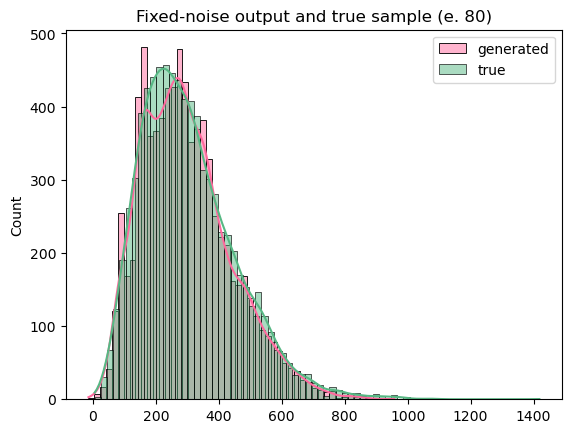

Classifier train:
    5: loss: 0.668, pred: [0.522, 0.45, 0.448, 0.447, 0.448, 0.452, 0.454, 0.455, 0.462, 0.456, 0.44, 0.457, 0.465, 0.46, 0.46, 0.451, 0.451, 0.459, 0.468, 0.464, 0.458, 0.454, 0.444, 0.455, 0.478, 0.487, 0.503, 0.523, 0.522, 0.486, 0.468, 0.476, 0.493, 0.5, 0.514, 0.527, 0.516, 0.504, 0.516, 0.525, 0.521, 0.517, 0.522, 0.522, 0.521, 0.522, 0.523, 0.519, 0.522, 0.52, 0.518, 0.518, 0.519, 0.52, 0.52, 0.522, 0.52, 0.516, 0.51, 0.5, 0.494, 0.491, 0.497, 0.505, 0.516, 0.519, 0.519, 0.516, 0.515, 0.511, 0.51, 0.508, 0.511, 0.517, 0.517, 0.517, 0.519, 0.52, 0.519, 0.52, 0.521, 0.523]
    10: loss: 0.632, pred: [0.543, 0.398, 0.395, 0.395, 0.404, 0.416, 0.407, 0.392, 0.411, 0.41, 0.386, 0.399, 0.407, 0.413, 0.399, 0.393, 0.39, 0.405, 0.412, 0.41, 0.412, 0.409, 0.356, 0.363, 0.413, 0.433, 0.478, 0.539, 0.541, 0.433, 0.379, 0.408, 0.466, 0.488, 0.528, 0.548, 0.504, 0.453, 0.493, 0.525, 0.529, 0.523, 0.538, 0.538, 0.527, 0.527, 0.525, 0.515, 0.531, 0.531, 0.53, 0.528, 0.525, 0.

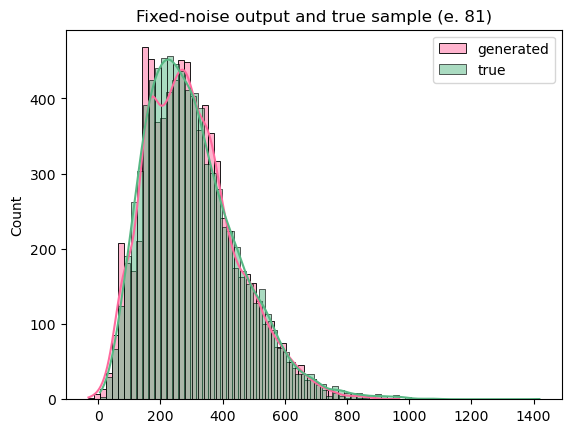

Classifier train:
    5: loss: 0.671, pred: [0.509, 0.446, 0.444, 0.443, 0.445, 0.451, 0.456, 0.459, 0.462, 0.46, 0.451, 0.455, 0.449, 0.451, 0.454, 0.447, 0.447, 0.446, 0.446, 0.447, 0.45, 0.446, 0.437, 0.446, 0.473, 0.484, 0.499, 0.518, 0.511, 0.476, 0.458, 0.462, 0.477, 0.485, 0.5, 0.518, 0.51, 0.501, 0.51, 0.516, 0.507, 0.502, 0.506, 0.507, 0.508, 0.51, 0.512, 0.508, 0.509, 0.507, 0.505, 0.506, 0.507, 0.508, 0.509, 0.513, 0.51, 0.506, 0.498, 0.488, 0.481, 0.478, 0.484, 0.492, 0.505, 0.51, 0.508, 0.504, 0.502, 0.497, 0.497, 0.495, 0.498, 0.504, 0.505, 0.504, 0.506, 0.506, 0.505, 0.506, 0.508, 0.51, 0.507]
    10: loss: 0.639, pred: [0.528, 0.396, 0.393, 0.393, 0.401, 0.414, 0.409, 0.398, 0.413, 0.415, 0.396, 0.397, 0.393, 0.405, 0.394, 0.386, 0.385, 0.392, 0.394, 0.397, 0.406, 0.401, 0.356, 0.36, 0.414, 0.437, 0.48, 0.537, 0.532, 0.429, 0.379, 0.402, 0.453, 0.474, 0.514, 0.541, 0.502, 0.46, 0.495, 0.523, 0.519, 0.51, 0.522, 0.521, 0.514, 0.517, 0.519, 0.511, 0.522, 0.519, 0.516, 0.5

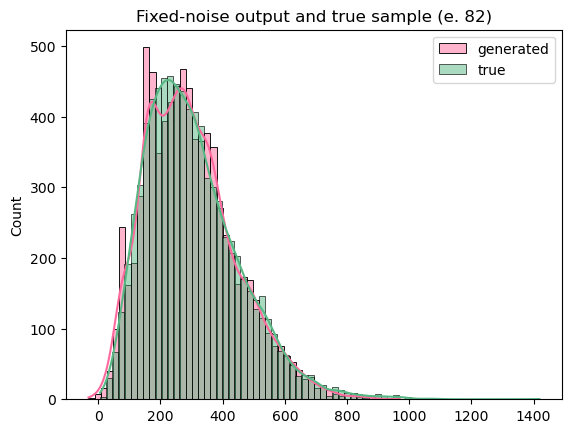

Classifier train:
    5: loss: 0.671, pred: [0.51, 0.451, 0.448, 0.445, 0.443, 0.444, 0.44, 0.435, 0.439, 0.441, 0.443, 0.456, 0.455, 0.464, 0.47, 0.452, 0.451, 0.44, 0.445, 0.457, 0.45, 0.45, 0.444, 0.448, 0.471, 0.481, 0.496, 0.515, 0.512, 0.478, 0.459, 0.466, 0.483, 0.49, 0.503, 0.517, 0.507, 0.495, 0.506, 0.514, 0.509, 0.505, 0.509, 0.509, 0.508, 0.509, 0.511, 0.508, 0.511, 0.509, 0.507, 0.508, 0.508, 0.509, 0.51, 0.512, 0.51, 0.506, 0.499, 0.49, 0.483, 0.481, 0.486, 0.494, 0.504, 0.508, 0.507, 0.504, 0.503, 0.498, 0.499, 0.496, 0.499, 0.506, 0.506, 0.506, 0.507, 0.508, 0.507, 0.508, 0.509, 0.511, 0.508, 0.51]
    10: loss: 0.639, pred: [0.528, 0.398, 0.394, 0.393, 0.397, 0.405, 0.393, 0.376, 0.391, 0.397, 0.388, 0.399, 0.398, 0.417, 0.409, 0.392, 0.389, 0.387, 0.392, 0.406, 0.404, 0.403, 0.362, 0.364, 0.413, 0.435, 0.476, 0.534, 0.53, 0.43, 0.38, 0.405, 0.456, 0.477, 0.514, 0.539, 0.499, 0.455, 0.491, 0.521, 0.519, 0.511, 0.523, 0.52, 0.513, 0.515, 0.519, 0.511, 0.523, 0.52, 0.518

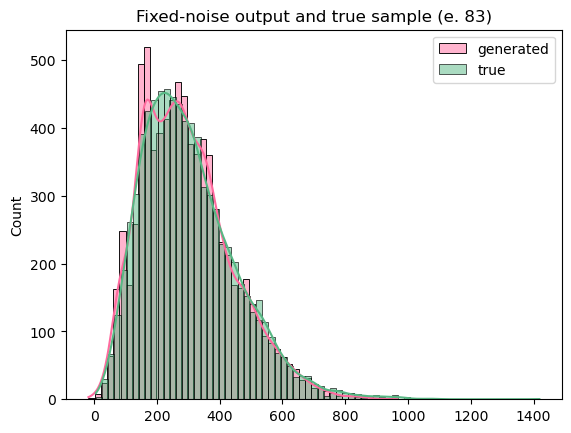

Classifier train:
    5: loss: 0.668, pred: [0.519, 0.454, 0.452, 0.451, 0.451, 0.45, 0.444, 0.438, 0.447, 0.456, 0.449, 0.453, 0.46, 0.46, 0.461, 0.441, 0.44, 0.437, 0.437, 0.453, 0.452, 0.445, 0.436, 0.452, 0.476, 0.485, 0.502, 0.523, 0.52, 0.48, 0.459, 0.467, 0.486, 0.496, 0.51, 0.525, 0.517, 0.508, 0.517, 0.523, 0.516, 0.51, 0.516, 0.518, 0.518, 0.519, 0.52, 0.515, 0.518, 0.516, 0.514, 0.514, 0.516, 0.516, 0.517, 0.52, 0.518, 0.514, 0.507, 0.496, 0.488, 0.486, 0.492, 0.501, 0.513, 0.518, 0.517, 0.514, 0.512, 0.507, 0.507, 0.503, 0.507, 0.513, 0.514, 0.513, 0.515, 0.515, 0.514, 0.516, 0.517, 0.52, 0.517, 0.519, 0.521]
    10: loss: 0.635, pred: [0.538, 0.402, 0.4, 0.4, 0.407, 0.414, 0.398, 0.379, 0.398, 0.41, 0.394, 0.395, 0.403, 0.414, 0.399, 0.383, 0.38, 0.387, 0.385, 0.402, 0.406, 0.402, 0.355, 0.363, 0.413, 0.434, 0.478, 0.539, 0.537, 0.428, 0.374, 0.401, 0.459, 0.483, 0.521, 0.544, 0.503, 0.456, 0.494, 0.524, 0.523, 0.516, 0.529, 0.529, 0.52, 0.522, 0.524, 0.515, 0.529, 0.527, 

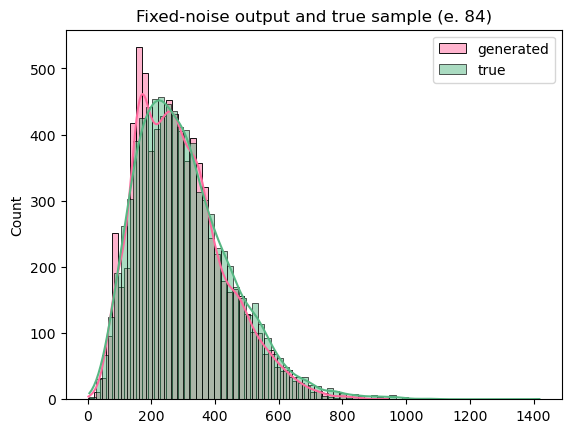

Classifier train:
    5: loss: 0.669, pred: [0.519, 0.454, 0.453, 0.452, 0.454, 0.458, 0.457, 0.451, 0.452, 0.45, 0.442, 0.448, 0.446, 0.445, 0.451, 0.455, 0.451, 0.449, 0.449, 0.459, 0.457, 0.454, 0.444, 0.451, 0.474, 0.483, 0.5, 0.522, 0.52, 0.484, 0.466, 0.474, 0.491, 0.498, 0.512, 0.524, 0.512, 0.499, 0.511, 0.521, 0.518, 0.514, 0.518, 0.517, 0.516, 0.518, 0.519, 0.517, 0.52, 0.517, 0.515, 0.515, 0.516, 0.517, 0.517, 0.52, 0.517, 0.513, 0.507, 0.496, 0.489, 0.487, 0.493, 0.501, 0.512, 0.515, 0.514, 0.511, 0.511, 0.506, 0.506, 0.504, 0.507, 0.514, 0.514, 0.514, 0.515, 0.516, 0.515, 0.516, 0.517, 0.519, 0.517, 0.518, 0.52, 0.522]
    10: loss: 0.637, pred: [0.537, 0.402, 0.4, 0.401, 0.409, 0.421, 0.41, 0.391, 0.402, 0.405, 0.389, 0.39, 0.39, 0.401, 0.39, 0.396, 0.39, 0.398, 0.395, 0.407, 0.41, 0.41, 0.364, 0.364, 0.41, 0.433, 0.476, 0.535, 0.532, 0.429, 0.38, 0.408, 0.464, 0.486, 0.522, 0.541, 0.498, 0.448, 0.487, 0.519, 0.524, 0.519, 0.531, 0.528, 0.518, 0.521, 0.522, 0.517, 0.531, 

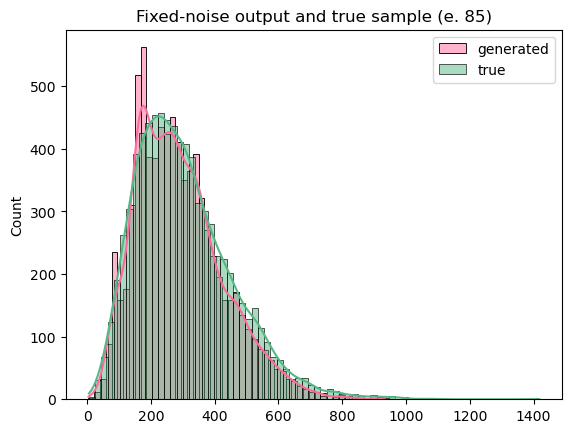

Classifier train:
    5: loss: 0.673, pred: [0.508, 0.443, 0.44, 0.438, 0.438, 0.44, 0.443, 0.448, 0.46, 0.461, 0.454, 0.458, 0.458, 0.456, 0.451, 0.443, 0.446, 0.447, 0.458, 0.46, 0.458, 0.457, 0.449, 0.451, 0.472, 0.483, 0.497, 0.513, 0.507, 0.473, 0.457, 0.464, 0.479, 0.486, 0.499, 0.514, 0.506, 0.496, 0.505, 0.511, 0.506, 0.502, 0.506, 0.507, 0.507, 0.508, 0.508, 0.506, 0.509, 0.508, 0.506, 0.508, 0.508, 0.509, 0.509, 0.51, 0.509, 0.506, 0.5, 0.492, 0.485, 0.484, 0.488, 0.495, 0.505, 0.509, 0.507, 0.504, 0.503, 0.499, 0.499, 0.496, 0.499, 0.505, 0.505, 0.505, 0.506, 0.506, 0.505, 0.507, 0.508, 0.509, 0.507, 0.508, 0.509, 0.511, 0.509]
    10: loss: 0.643, pred: [0.525, 0.391, 0.388, 0.387, 0.392, 0.401, 0.395, 0.388, 0.409, 0.415, 0.399, 0.4, 0.401, 0.411, 0.39, 0.384, 0.386, 0.394, 0.403, 0.408, 0.409, 0.409, 0.372, 0.368, 0.414, 0.439, 0.478, 0.528, 0.517, 0.422, 0.38, 0.406, 0.454, 0.474, 0.508, 0.532, 0.498, 0.456, 0.488, 0.514, 0.514, 0.509, 0.52, 0.517, 0.51, 0.513, 0.514, 0.

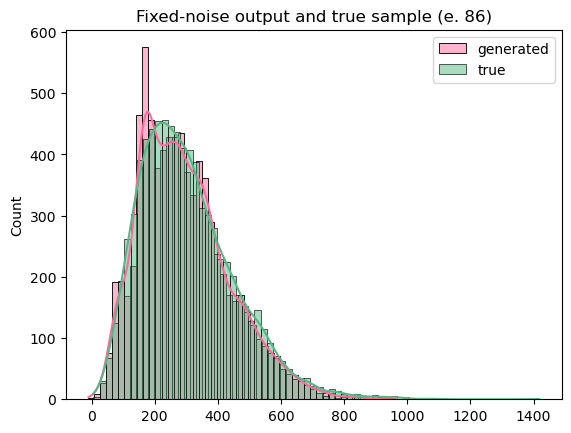

Classifier train:
    5: loss: 0.671, pred: [0.516, 0.452, 0.451, 0.451, 0.455, 0.461, 0.46, 0.454, 0.456, 0.453, 0.449, 0.458, 0.437, 0.439, 0.449, 0.435, 0.445, 0.451, 0.449, 0.452, 0.454, 0.455, 0.447, 0.454, 0.481, 0.491, 0.505, 0.522, 0.516, 0.477, 0.46, 0.469, 0.486, 0.494, 0.509, 0.522, 0.511, 0.499, 0.51, 0.518, 0.514, 0.51, 0.514, 0.514, 0.513, 0.515, 0.516, 0.514, 0.517, 0.515, 0.513, 0.514, 0.515, 0.516, 0.515, 0.517, 0.515, 0.511, 0.506, 0.498, 0.49, 0.488, 0.494, 0.501, 0.511, 0.515, 0.513, 0.51, 0.509, 0.505, 0.505, 0.503, 0.506, 0.512, 0.513, 0.512, 0.513, 0.514, 0.513, 0.514, 0.515, 0.517, 0.514, 0.516, 0.517, 0.519, 0.518, 0.517]
    10: loss: 0.64, pred: [0.534, 0.401, 0.399, 0.4, 0.41, 0.422, 0.412, 0.394, 0.406, 0.408, 0.395, 0.399, 0.382, 0.397, 0.387, 0.379, 0.385, 0.4, 0.395, 0.401, 0.407, 0.409, 0.369, 0.367, 0.416, 0.443, 0.482, 0.534, 0.522, 0.419, 0.375, 0.406, 0.459, 0.482, 0.517, 0.539, 0.498, 0.449, 0.486, 0.516, 0.52, 0.516, 0.528, 0.524, 0.515, 0.518, 0.

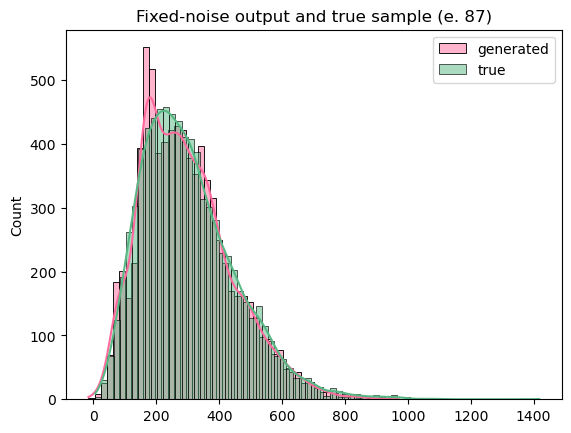

Classifier train:
    5: loss: 0.673, pred: [0.509, 0.445, 0.444, 0.443, 0.445, 0.449, 0.446, 0.442, 0.449, 0.451, 0.446, 0.467, 0.457, 0.458, 0.463, 0.45, 0.433, 0.426, 0.446, 0.456, 0.451, 0.451, 0.443, 0.452, 0.478, 0.487, 0.501, 0.518, 0.512, 0.473, 0.453, 0.461, 0.478, 0.487, 0.502, 0.517, 0.507, 0.497, 0.506, 0.513, 0.506, 0.501, 0.505, 0.506, 0.506, 0.508, 0.509, 0.506, 0.509, 0.507, 0.505, 0.507, 0.507, 0.508, 0.509, 0.512, 0.51, 0.507, 0.501, 0.492, 0.484, 0.482, 0.487, 0.495, 0.506, 0.51, 0.508, 0.505, 0.503, 0.499, 0.499, 0.497, 0.5, 0.506, 0.506, 0.505, 0.506, 0.507, 0.505, 0.507, 0.508, 0.51, 0.507, 0.509, 0.511, 0.513, 0.512, 0.51, 0.509]
    10: loss: 0.644, pred: [0.527, 0.395, 0.393, 0.394, 0.401, 0.411, 0.4, 0.385, 0.4, 0.406, 0.393, 0.407, 0.399, 0.414, 0.399, 0.39, 0.375, 0.377, 0.393, 0.405, 0.404, 0.405, 0.37, 0.368, 0.417, 0.443, 0.481, 0.531, 0.518, 0.418, 0.375, 0.402, 0.453, 0.475, 0.509, 0.535, 0.497, 0.454, 0.487, 0.515, 0.515, 0.51, 0.519, 0.516, 0.509, 0.5

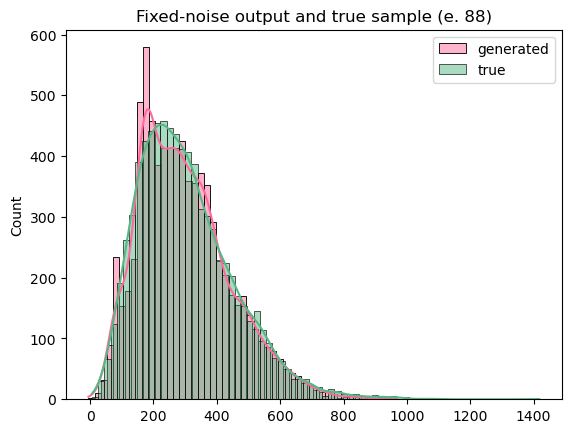

Classifier train:
    5: loss: 0.669, pred: [0.523, 0.453, 0.449, 0.446, 0.446, 0.448, 0.447, 0.446, 0.456, 0.456, 0.445, 0.46, 0.449, 0.452, 0.443, 0.45, 0.448, 0.459, 0.464, 0.454, 0.458, 0.461, 0.451, 0.453, 0.476, 0.487, 0.503, 0.523, 0.518, 0.482, 0.466, 0.477, 0.494, 0.501, 0.515, 0.526, 0.513, 0.498, 0.511, 0.522, 0.522, 0.519, 0.522, 0.52, 0.519, 0.521, 0.522, 0.522, 0.525, 0.523, 0.521, 0.522, 0.523, 0.524, 0.523, 0.523, 0.52, 0.517, 0.512, 0.503, 0.495, 0.493, 0.498, 0.507, 0.517, 0.519, 0.518, 0.516, 0.515, 0.511, 0.511, 0.508, 0.512, 0.519, 0.519, 0.519, 0.52, 0.521, 0.52, 0.521, 0.522, 0.523, 0.521, 0.521, 0.523, 0.524, 0.523, 0.522, 0.52, 0.522]
    10: loss: 0.638, pred: [0.539, 0.399, 0.395, 0.393, 0.398, 0.407, 0.398, 0.385, 0.404, 0.408, 0.392, 0.401, 0.393, 0.408, 0.382, 0.394, 0.389, 0.41, 0.406, 0.401, 0.407, 0.414, 0.373, 0.363, 0.406, 0.436, 0.477, 0.528, 0.515, 0.417, 0.378, 0.41, 0.462, 0.484, 0.517, 0.537, 0.496, 0.442, 0.482, 0.515, 0.524, 0.523, 0.533, 0.527

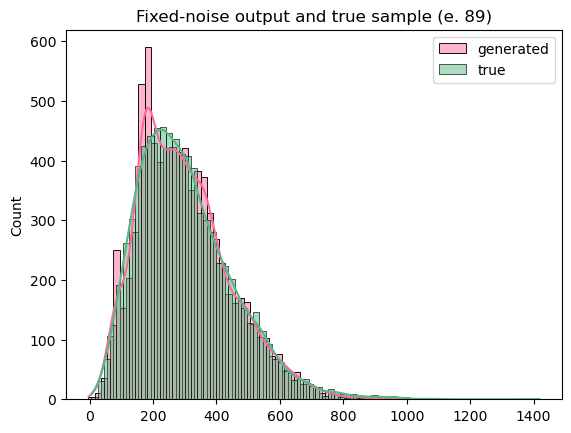

Classifier train:
    5: loss: 0.672, pred: [0.515, 0.444, 0.442, 0.441, 0.443, 0.448, 0.447, 0.445, 0.453, 0.461, 0.462, 0.461, 0.448, 0.461, 0.455, 0.443, 0.445, 0.452, 0.459, 0.455, 0.455, 0.457, 0.452, 0.457, 0.48, 0.49, 0.503, 0.519, 0.511, 0.474, 0.458, 0.468, 0.485, 0.494, 0.507, 0.52, 0.512, 0.5, 0.509, 0.516, 0.512, 0.509, 0.513, 0.513, 0.512, 0.513, 0.514, 0.512, 0.516, 0.515, 0.513, 0.514, 0.515, 0.515, 0.514, 0.515, 0.513, 0.51, 0.505, 0.498, 0.492, 0.49, 0.494, 0.501, 0.51, 0.513, 0.512, 0.509, 0.507, 0.504, 0.504, 0.502, 0.506, 0.511, 0.511, 0.511, 0.512, 0.513, 0.512, 0.513, 0.514, 0.515, 0.513, 0.514, 0.515, 0.516, 0.515, 0.514, 0.513, 0.514, 0.513]
    10: loss: 0.643, pred: [0.531, 0.394, 0.392, 0.392, 0.399, 0.409, 0.401, 0.387, 0.404, 0.414, 0.408, 0.402, 0.391, 0.417, 0.392, 0.386, 0.387, 0.404, 0.403, 0.404, 0.406, 0.412, 0.379, 0.369, 0.413, 0.442, 0.479, 0.527, 0.511, 0.413, 0.375, 0.406, 0.455, 0.476, 0.51, 0.534, 0.498, 0.451, 0.485, 0.515, 0.52, 0.517, 0.526,

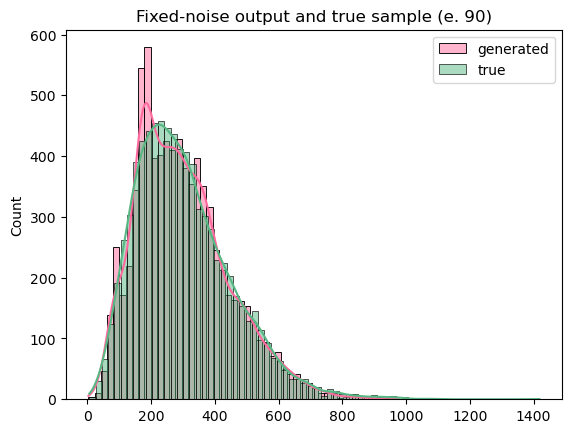

Classifier train:
    5: loss: 0.674, pred: [0.509, 0.46, 0.458, 0.456, 0.455, 0.454, 0.448, 0.442, 0.446, 0.45, 0.446, 0.45, 0.451, 0.467, 0.455, 0.452, 0.452, 0.452, 0.456, 0.451, 0.448, 0.449, 0.442, 0.444, 0.466, 0.478, 0.493, 0.511, 0.509, 0.479, 0.463, 0.467, 0.48, 0.485, 0.498, 0.513, 0.508, 0.5, 0.509, 0.515, 0.508, 0.504, 0.507, 0.508, 0.509, 0.511, 0.512, 0.51, 0.511, 0.508, 0.506, 0.507, 0.509, 0.509, 0.511, 0.513, 0.511, 0.507, 0.5, 0.489, 0.481, 0.479, 0.485, 0.494, 0.505, 0.51, 0.508, 0.506, 0.503, 0.499, 0.497, 0.494, 0.498, 0.504, 0.504, 0.504, 0.505, 0.506, 0.505, 0.507, 0.508, 0.51, 0.507, 0.508, 0.51, 0.512, 0.511, 0.51, 0.508, 0.509, 0.507, 0.507]
    10: loss: 0.646, pred: [0.525, 0.408, 0.405, 0.404, 0.408, 0.413, 0.401, 0.385, 0.397, 0.404, 0.393, 0.392, 0.394, 0.422, 0.392, 0.393, 0.393, 0.402, 0.4, 0.399, 0.398, 0.403, 0.373, 0.36, 0.403, 0.434, 0.472, 0.522, 0.509, 0.419, 0.382, 0.407, 0.45, 0.468, 0.501, 0.529, 0.498, 0.456, 0.489, 0.517, 0.518, 0.513, 0.52, 

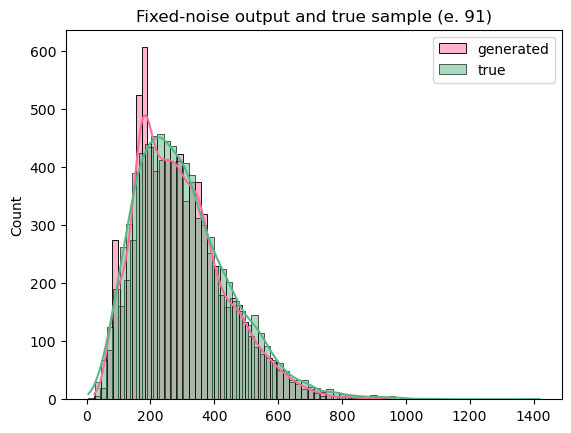

Classifier train:
    5: loss: 0.673, pred: [0.514, 0.444, 0.442, 0.442, 0.443, 0.444, 0.441, 0.438, 0.448, 0.456, 0.447, 0.458, 0.467, 0.469, 0.448, 0.444, 0.46, 0.462, 0.459, 0.465, 0.462, 0.462, 0.453, 0.456, 0.477, 0.489, 0.502, 0.519, 0.51, 0.473, 0.459, 0.468, 0.483, 0.49, 0.505, 0.52, 0.514, 0.504, 0.512, 0.518, 0.513, 0.509, 0.514, 0.514, 0.513, 0.514, 0.514, 0.513, 0.516, 0.515, 0.513, 0.514, 0.514, 0.514, 0.513, 0.513, 0.511, 0.507, 0.503, 0.497, 0.491, 0.489, 0.493, 0.5, 0.508, 0.512, 0.511, 0.507, 0.506, 0.503, 0.503, 0.501, 0.504, 0.51, 0.511, 0.511, 0.512, 0.513, 0.512, 0.513, 0.514, 0.516, 0.513, 0.513, 0.515, 0.517, 0.515, 0.514, 0.513, 0.514, 0.512, 0.511, 0.515]
    10: loss: 0.644, pred: [0.53, 0.393, 0.391, 0.391, 0.397, 0.404, 0.394, 0.381, 0.398, 0.409, 0.395, 0.399, 0.408, 0.424, 0.385, 0.388, 0.401, 0.413, 0.402, 0.411, 0.41, 0.415, 0.382, 0.367, 0.409, 0.442, 0.479, 0.525, 0.505, 0.408, 0.376, 0.406, 0.452, 0.472, 0.505, 0.532, 0.5, 0.454, 0.487, 0.516, 0.521, 

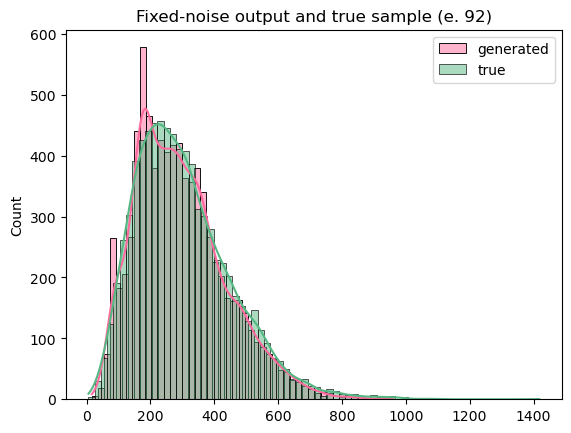

Classifier train:
    5: loss: 0.675, pred: [0.505, 0.448, 0.444, 0.44, 0.437, 0.437, 0.437, 0.441, 0.454, 0.459, 0.452, 0.46, 0.456, 0.463, 0.463, 0.452, 0.448, 0.448, 0.45, 0.454, 0.456, 0.453, 0.445, 0.446, 0.468, 0.48, 0.494, 0.509, 0.5, 0.468, 0.454, 0.46, 0.474, 0.482, 0.495, 0.511, 0.508, 0.5, 0.507, 0.511, 0.503, 0.5, 0.505, 0.506, 0.506, 0.507, 0.507, 0.505, 0.507, 0.506, 0.505, 0.506, 0.506, 0.506, 0.505, 0.507, 0.504, 0.501, 0.496, 0.487, 0.48, 0.479, 0.483, 0.491, 0.5, 0.505, 0.503, 0.5, 0.498, 0.494, 0.494, 0.491, 0.494, 0.501, 0.501, 0.501, 0.503, 0.503, 0.502, 0.503, 0.505, 0.506, 0.504, 0.504, 0.506, 0.507, 0.506, 0.505, 0.503, 0.504, 0.503, 0.502, 0.505, 0.507]
    10: loss: 0.649, pred: [0.52, 0.397, 0.392, 0.389, 0.39, 0.396, 0.39, 0.383, 0.403, 0.412, 0.399, 0.402, 0.399, 0.419, 0.399, 0.392, 0.39, 0.398, 0.394, 0.402, 0.404, 0.405, 0.379, 0.365, 0.407, 0.44, 0.475, 0.518, 0.497, 0.409, 0.378, 0.404, 0.446, 0.465, 0.496, 0.525, 0.5, 0.461, 0.489, 0.514, 0.514, 0.511

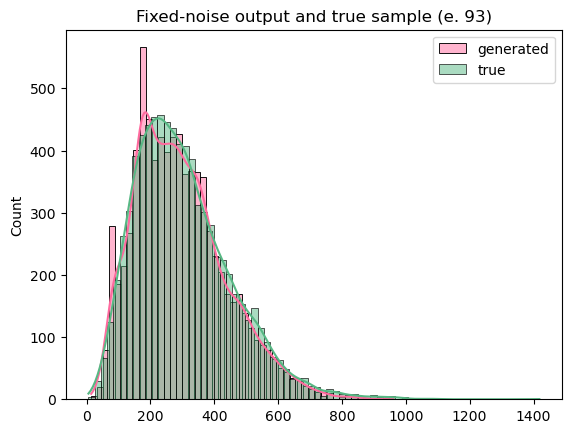

Classifier train:
    5: loss: 0.672, pred: [0.515, 0.445, 0.443, 0.441, 0.442, 0.444, 0.445, 0.445, 0.452, 0.449, 0.444, 0.456, 0.448, 0.452, 0.455, 0.438, 0.448, 0.451, 0.451, 0.449, 0.451, 0.456, 0.452, 0.452, 0.472, 0.483, 0.497, 0.515, 0.509, 0.473, 0.459, 0.469, 0.485, 0.492, 0.505, 0.518, 0.51, 0.498, 0.509, 0.518, 0.514, 0.512, 0.515, 0.514, 0.513, 0.515, 0.515, 0.515, 0.518, 0.517, 0.515, 0.516, 0.516, 0.517, 0.516, 0.516, 0.513, 0.51, 0.506, 0.499, 0.491, 0.489, 0.494, 0.502, 0.51, 0.513, 0.511, 0.509, 0.507, 0.504, 0.505, 0.502, 0.505, 0.512, 0.512, 0.512, 0.513, 0.514, 0.513, 0.514, 0.515, 0.516, 0.514, 0.514, 0.515, 0.516, 0.515, 0.514, 0.513, 0.513, 0.512, 0.512, 0.514, 0.515, 0.516]
    10: loss: 0.644, pred: [0.532, 0.395, 0.392, 0.392, 0.397, 0.406, 0.399, 0.388, 0.402, 0.403, 0.393, 0.397, 0.39, 0.409, 0.389, 0.383, 0.39, 0.404, 0.394, 0.398, 0.401, 0.41, 0.384, 0.364, 0.403, 0.437, 0.475, 0.521, 0.499, 0.404, 0.374, 0.408, 0.454, 0.474, 0.506, 0.529, 0.496, 0.447, 0.

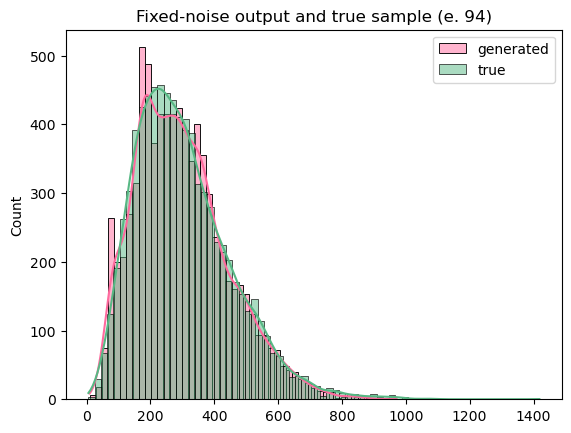

Classifier train:
    5: loss: 0.676, pred: [0.502, 0.445, 0.443, 0.442, 0.442, 0.444, 0.442, 0.438, 0.441, 0.446, 0.451, 0.463, 0.449, 0.456, 0.446, 0.455, 0.449, 0.444, 0.442, 0.446, 0.445, 0.447, 0.446, 0.451, 0.471, 0.481, 0.492, 0.505, 0.497, 0.469, 0.455, 0.459, 0.471, 0.478, 0.49, 0.506, 0.503, 0.497, 0.504, 0.508, 0.5, 0.496, 0.5, 0.501, 0.502, 0.504, 0.505, 0.503, 0.504, 0.502, 0.501, 0.502, 0.503, 0.503, 0.503, 0.504, 0.503, 0.499, 0.495, 0.488, 0.481, 0.479, 0.484, 0.491, 0.499, 0.504, 0.501, 0.499, 0.496, 0.493, 0.492, 0.49, 0.492, 0.498, 0.498, 0.498, 0.499, 0.499, 0.498, 0.5, 0.501, 0.502, 0.5, 0.5, 0.502, 0.503, 0.502, 0.501, 0.5, 0.5, 0.499, 0.499, 0.502, 0.502, 0.502, 0.5]
    10: loss: 0.651, pred: [0.517, 0.395, 0.392, 0.392, 0.396, 0.402, 0.395, 0.382, 0.392, 0.401, 0.398, 0.404, 0.392, 0.412, 0.383, 0.394, 0.391, 0.395, 0.386, 0.395, 0.395, 0.4, 0.382, 0.37, 0.411, 0.442, 0.474, 0.515, 0.494, 0.41, 0.38, 0.404, 0.442, 0.46, 0.491, 0.52, 0.496, 0.46, 0.487, 0.512, 0

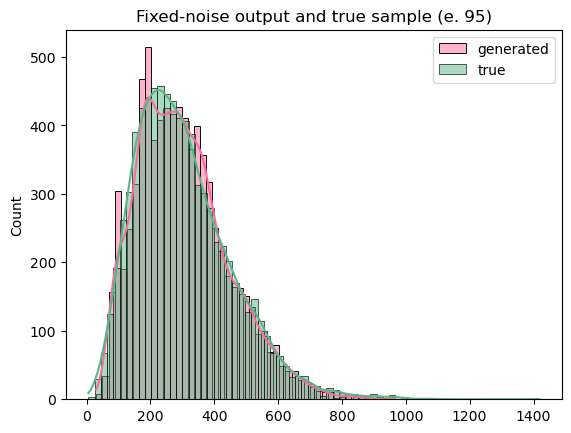

Classifier train:
    5: loss: 0.674, pred: [0.508, 0.445, 0.443, 0.442, 0.443, 0.447, 0.446, 0.443, 0.448, 0.449, 0.442, 0.453, 0.456, 0.453, 0.445, 0.444, 0.444, 0.441, 0.45, 0.453, 0.457, 0.46, 0.455, 0.453, 0.474, 0.486, 0.499, 0.515, 0.503, 0.465, 0.451, 0.46, 0.477, 0.485, 0.499, 0.515, 0.509, 0.499, 0.507, 0.512, 0.506, 0.503, 0.507, 0.507, 0.507, 0.508, 0.508, 0.507, 0.51, 0.51, 0.508, 0.51, 0.51, 0.51, 0.508, 0.509, 0.506, 0.503, 0.5, 0.493, 0.486, 0.484, 0.488, 0.495, 0.504, 0.508, 0.506, 0.502, 0.501, 0.498, 0.498, 0.496, 0.499, 0.505, 0.506, 0.505, 0.506, 0.507, 0.506, 0.507, 0.509, 0.51, 0.507, 0.507, 0.509, 0.51, 0.509, 0.508, 0.506, 0.507, 0.506, 0.505, 0.508, 0.509, 0.509, 0.506, 0.508]
    10: loss: 0.648, pred: [0.524, 0.396, 0.393, 0.393, 0.398, 0.407, 0.4, 0.387, 0.399, 0.403, 0.391, 0.395, 0.397, 0.411, 0.38, 0.386, 0.387, 0.395, 0.393, 0.402, 0.405, 0.414, 0.389, 0.368, 0.408, 0.442, 0.477, 0.521, 0.497, 0.401, 0.371, 0.401, 0.444, 0.465, 0.497, 0.526, 0.497, 0.45

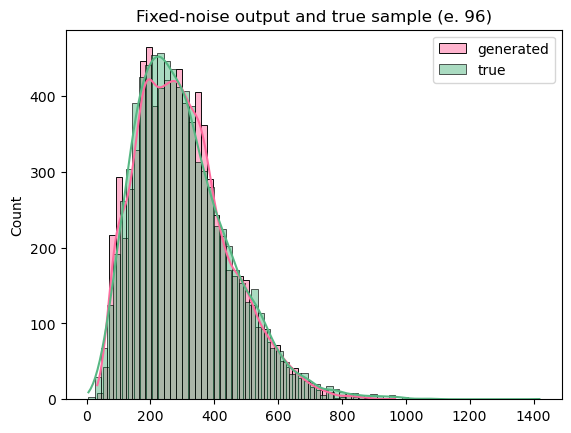

Classifier train:
    5: loss: 0.677, pred: [0.502, 0.45, 0.447, 0.445, 0.444, 0.446, 0.448, 0.45, 0.458, 0.459, 0.45, 0.449, 0.439, 0.452, 0.455, 0.452, 0.457, 0.452, 0.447, 0.445, 0.444, 0.451, 0.453, 0.457, 0.472, 0.481, 0.491, 0.502, 0.494, 0.466, 0.453, 0.46, 0.472, 0.479, 0.49, 0.503, 0.499, 0.491, 0.499, 0.504, 0.497, 0.494, 0.498, 0.499, 0.5, 0.502, 0.502, 0.501, 0.503, 0.502, 0.502, 0.503, 0.504, 0.504, 0.504, 0.505, 0.503, 0.501, 0.497, 0.49, 0.483, 0.482, 0.487, 0.493, 0.501, 0.505, 0.502, 0.501, 0.498, 0.495, 0.494, 0.491, 0.494, 0.499, 0.498, 0.498, 0.498, 0.499, 0.498, 0.5, 0.501, 0.502, 0.499, 0.5, 0.5, 0.502, 0.501, 0.5, 0.499, 0.5, 0.498, 0.498, 0.501, 0.501, 0.501, 0.499, 0.499, 0.5]
    10: loss: 0.652, pred: [0.516, 0.399, 0.396, 0.394, 0.397, 0.404, 0.4, 0.392, 0.407, 0.412, 0.397, 0.392, 0.383, 0.409, 0.391, 0.391, 0.398, 0.402, 0.391, 0.394, 0.393, 0.404, 0.388, 0.376, 0.413, 0.441, 0.472, 0.512, 0.492, 0.409, 0.378, 0.403, 0.441, 0.46, 0.488, 0.515, 0.492, 0.456

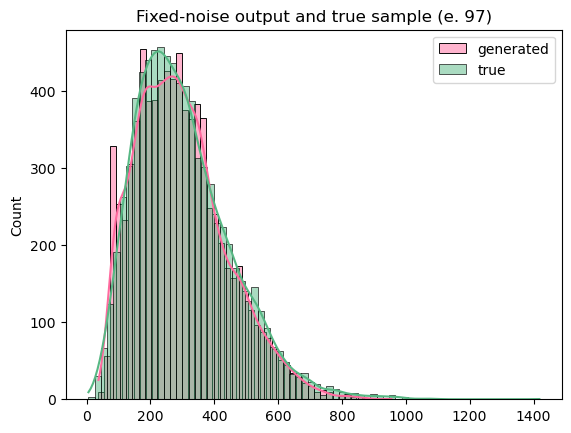

Classifier train:
    5: loss: 0.67, pred: [0.524, 0.437, 0.435, 0.434, 0.434, 0.436, 0.435, 0.434, 0.443, 0.45, 0.453, 0.452, 0.449, 0.457, 0.454, 0.456, 0.457, 0.456, 0.448, 0.445, 0.443, 0.452, 0.455, 0.458, 0.477, 0.491, 0.505, 0.523, 0.514, 0.478, 0.461, 0.47, 0.487, 0.496, 0.509, 0.525, 0.518, 0.506, 0.517, 0.525, 0.518, 0.516, 0.52, 0.521, 0.522, 0.524, 0.523, 0.523, 0.526, 0.525, 0.524, 0.526, 0.527, 0.527, 0.526, 0.527, 0.524, 0.521, 0.517, 0.507, 0.498, 0.496, 0.502, 0.512, 0.522, 0.525, 0.523, 0.521, 0.519, 0.514, 0.513, 0.509, 0.513, 0.52, 0.519, 0.519, 0.519, 0.521, 0.52, 0.522, 0.523, 0.524, 0.521, 0.521, 0.522, 0.524, 0.522, 0.522, 0.52, 0.521, 0.52, 0.519, 0.522, 0.523, 0.523, 0.52, 0.521, 0.522, 0.525]
    10: loss: 0.641, pred: [0.54, 0.385, 0.382, 0.381, 0.386, 0.393, 0.386, 0.375, 0.392, 0.402, 0.401, 0.394, 0.391, 0.413, 0.388, 0.401, 0.398, 0.412, 0.388, 0.393, 0.39, 0.406, 0.383, 0.364, 0.401, 0.439, 0.476, 0.52, 0.498, 0.405, 0.369, 0.399, 0.448, 0.471, 0.5, 0.5

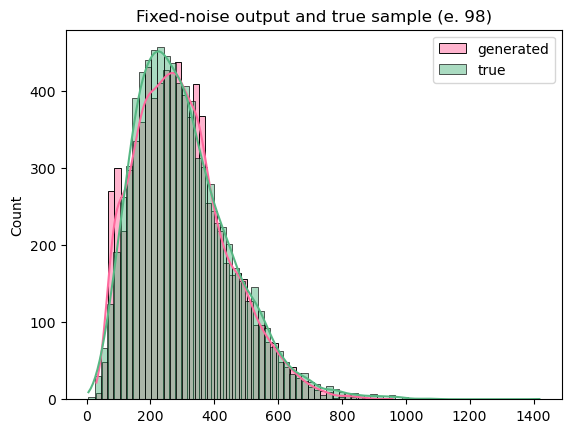

Classifier train:
    5: loss: 0.671, pred: [0.523, 0.448, 0.446, 0.445, 0.445, 0.445, 0.44, 0.437, 0.445, 0.448, 0.443, 0.455, 0.452, 0.464, 0.445, 0.459, 0.443, 0.449, 0.446, 0.456, 0.455, 0.452, 0.446, 0.454, 0.479, 0.493, 0.508, 0.526, 0.516, 0.477, 0.459, 0.468, 0.486, 0.495, 0.51, 0.527, 0.518, 0.506, 0.517, 0.524, 0.518, 0.514, 0.518, 0.519, 0.52, 0.522, 0.523, 0.522, 0.525, 0.523, 0.522, 0.524, 0.525, 0.525, 0.525, 0.527, 0.524, 0.521, 0.516, 0.505, 0.495, 0.492, 0.499, 0.509, 0.521, 0.525, 0.523, 0.519, 0.517, 0.512, 0.512, 0.507, 0.512, 0.519, 0.519, 0.518, 0.519, 0.52, 0.519, 0.521, 0.522, 0.524, 0.52, 0.521, 0.522, 0.524, 0.523, 0.522, 0.52, 0.521, 0.52, 0.519, 0.523, 0.524, 0.523, 0.52, 0.521, 0.522, 0.525, 0.525]
    10: loss: 0.642, pred: [0.54, 0.396, 0.394, 0.394, 0.398, 0.405, 0.394, 0.379, 0.395, 0.401, 0.392, 0.395, 0.392, 0.42, 0.379, 0.402, 0.385, 0.406, 0.386, 0.404, 0.402, 0.407, 0.376, 0.36, 0.402, 0.44, 0.478, 0.524, 0.501, 0.404, 0.366, 0.397, 0.448, 0.472, 0

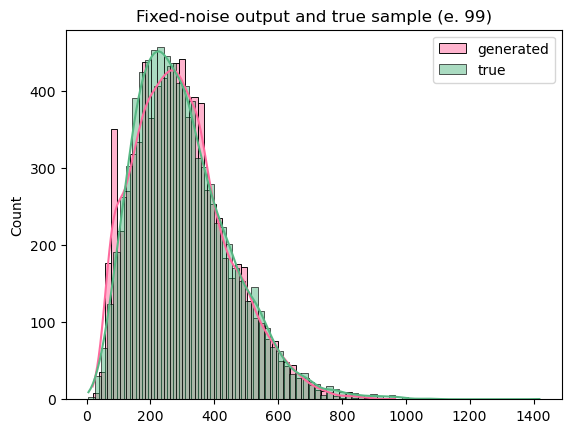

Classifier train:
    5: loss: 0.674, pred: [0.514, 0.453, 0.452, 0.453, 0.455, 0.458, 0.454, 0.448, 0.451, 0.453, 0.44, 0.433, 0.441, 0.45, 0.457, 0.444, 0.445, 0.452, 0.452, 0.453, 0.453, 0.456, 0.454, 0.46, 0.479, 0.488, 0.5, 0.515, 0.508, 0.473, 0.458, 0.467, 0.483, 0.492, 0.504, 0.516, 0.508, 0.498, 0.507, 0.515, 0.51, 0.507, 0.511, 0.511, 0.511, 0.512, 0.513, 0.512, 0.515, 0.514, 0.513, 0.514, 0.515, 0.515, 0.515, 0.516, 0.513, 0.511, 0.507, 0.499, 0.491, 0.49, 0.495, 0.502, 0.511, 0.514, 0.512, 0.51, 0.508, 0.505, 0.505, 0.501, 0.505, 0.511, 0.51, 0.51, 0.51, 0.511, 0.51, 0.512, 0.513, 0.514, 0.511, 0.512, 0.513, 0.514, 0.513, 0.513, 0.511, 0.512, 0.511, 0.51, 0.513, 0.514, 0.514, 0.511, 0.512, 0.513, 0.515, 0.515, 0.513]
    10: loss: 0.648, pred: [0.528, 0.401, 0.4, 0.402, 0.409, 0.417, 0.406, 0.39, 0.401, 0.407, 0.39, 0.376, 0.383, 0.408, 0.39, 0.387, 0.387, 0.407, 0.393, 0.402, 0.401, 0.41, 0.387, 0.373, 0.412, 0.441, 0.475, 0.521, 0.502, 0.408, 0.372, 0.401, 0.448, 0.471, 0

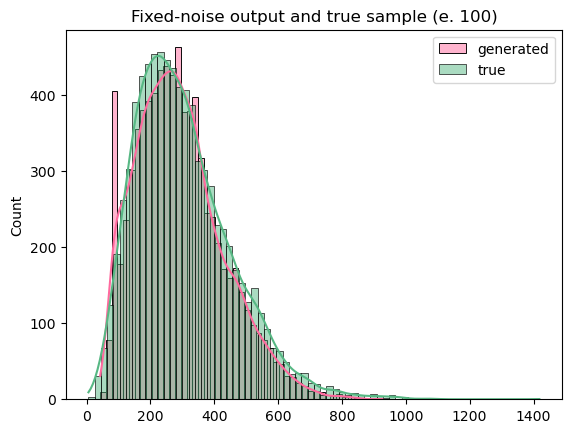

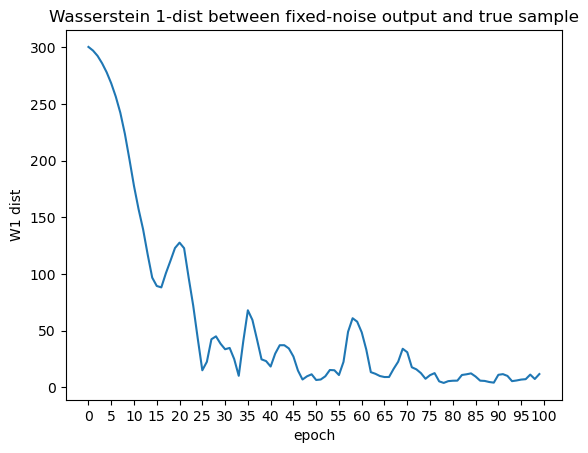

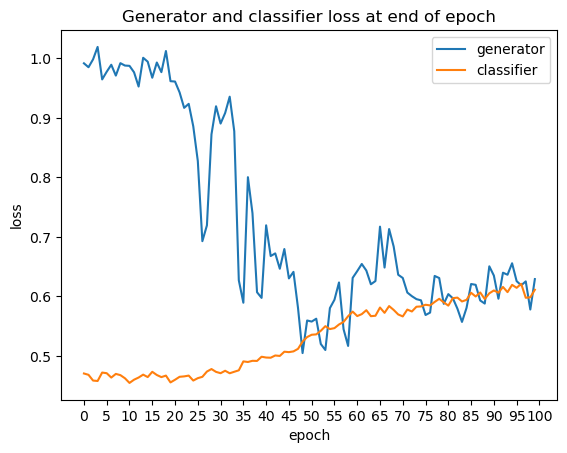

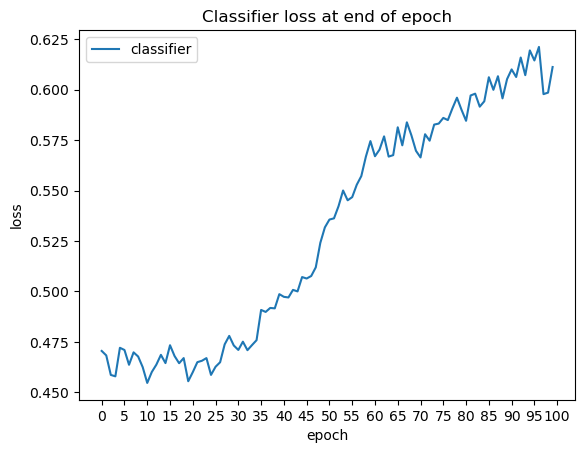

In [ ]:
n_dim = samples_per_dist = 8_000

mean = 300
std = 150

true_pdf = utils.gamma_pdf(mean, std)

ground_dist = distributions.Normal.rand_unf(
    1, n_dim, mean, std, subclass="gamma"
)
ground_dist.sample(samples_per_dist)

ground_sample = ground_dist.samples

n_kme_features = 400
n_features = 400

kme_rff_encoder = RffEncoder(
    n_dim,
    n_kme_features,
    kernel="gaussian",
    log_amplitude=1.0,
    log_length_scale=4.0,
)

reg_rff_encoder = RffEncoder(
    n_kme_features,
    n_features,
    kernel="gaussian",
    log_amplitude=0.0,
    log_length_scale=0.0,
)


noise_dim = n_dim
n_noise_dists = 1

fixed_noise_dists = distributions.Normal.rand_unf(
    1, noise_dim, 0, 1, subclass="normal"
)
fixed_noise_dists.sample(samples_per_dist)

noise_dists = distributions.Normal.rand_unf(
    n_noise_dists, noise_dim, 0, 1, subclass="normal"
)
noise_dists.sample(samples_per_dist)

gan_dist_set = GanDistributionSet(
    kme_rff_encoder,
    reg_rff_encoder,
    ground_sample,
    noise_dists,
    fixed_noise_dists,
    samples_per_dist,
)

classifier_lr = 0.001

generator = GeneratorSimple(noise_dim, n_dim, bias=True)
generator_opt = torch.optim.Adam(
    generator.parameters(), lr=0.15, betas=(0.5, 0.999)
)
generator_scheduler = torch.optim.lr_scheduler.ExponentialLR(
    generator_opt, gamma=0.98
)
gen_epochs = 1

train_gan(
    gan_dist_set,
    classifier_lr,
    generator,
    generator_opt,
    generator_scheduler,
    0.15,
    n_features,
    100,
    15,
    gen_epochs,
    verbose=True,
    save_plots=True,
    resample_each_subepoch=True,
)

#### Learn bimodal distribution (sum of normals) - failed

Classifier train:
    5: loss: 0.596, pred: [0.551, 0.449]
    10: loss: 0.521, pred: [0.594, 0.406]
    15: loss: 0.458, pred: [0.633, 0.368]
    20: loss: 0.404, pred: [0.667, 0.333]
Generator training: (lr=0.2)
    SE 1: loss: 1.101, pred: 0.333
### Epoch: 1
 train loss = 0.4020, pred = 0.6690, wass_d = 11.3812
output mean: 79.51 std: 25.78
ground mean: 75.13 std: 28.24


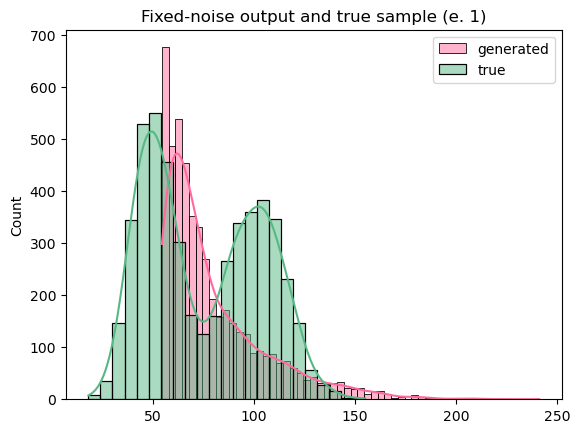

Classifier train:
    5: loss: 0.61, pred: [0.538, 0.43, 0.47]
    10: loss: 0.532, pred: [0.582, 0.389, 0.426]
    15: loss: 0.467, pred: [0.622, 0.352, 0.385]
    20: loss: 0.412, pred: [0.659, 0.318, 0.349]
Generator training: (lr=0.194)
    SE 1: loss: 1.06, pred: 0.346
### Epoch: 2
 train loss = 0.0324, pred = 0.9682, wass_d = 26.3154
output mean: 60.37 std: 51.17
ground mean: 75.13 std: 28.24


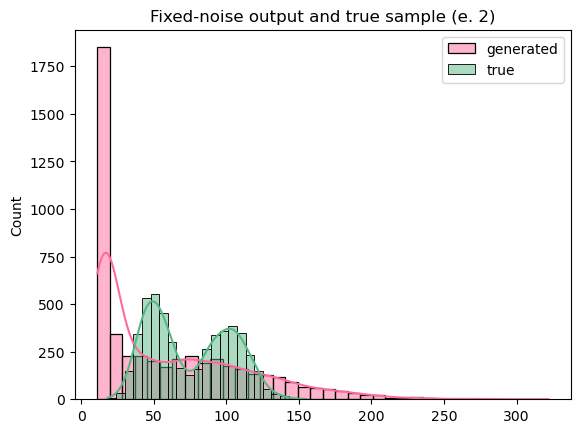

Classifier train:
    5: loss: 0.622, pred: [0.531, 0.437, 0.484, 0.45]
    10: loss: 0.543, pred: [0.576, 0.395, 0.44, 0.407]
    15: loss: 0.476, pred: [0.617, 0.357, 0.398, 0.368]
    20: loss: 0.42, pred: [0.654, 0.324, 0.361, 0.334]
Generator training: (lr=0.188)
    SE 1: loss: 1.207, pred: 0.299
### Epoch: 3
 train loss = 0.3547, pred = 0.7014, wass_d = 769.2803
output mean: 844.41 std: 153.69
ground mean: 75.13 std: 28.24


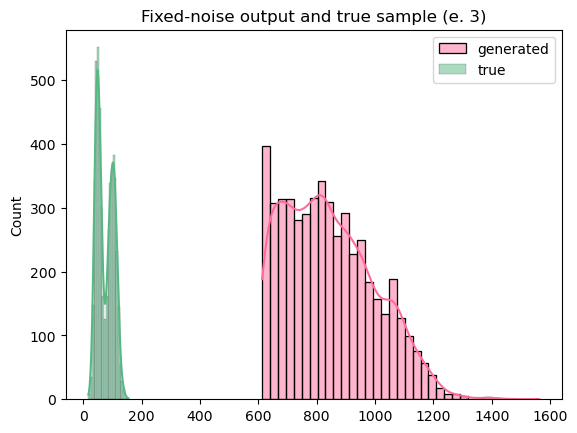

Classifier train:
    5: loss: 0.621, pred: [0.543, 0.442, 0.508, 0.46, 0.459]
    10: loss: 0.542, pred: [0.587, 0.398, 0.465, 0.416, 0.414]
    15: loss: 0.476, pred: [0.627, 0.36, 0.422, 0.377, 0.375]
    20: loss: 0.419, pred: [0.663, 0.326, 0.382, 0.341, 0.339]
Generator training: (lr=0.183)
    SE 1: loss: 1.087, pred: 0.337
### Epoch: 4
 train loss = 0.5240, pred = 0.5921, wass_d = 189.8232
output mean: 264.95 std: 34.40
ground mean: 75.13 std: 28.24


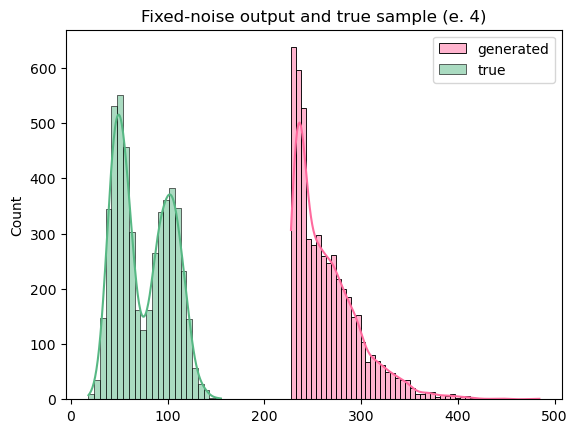

Classifier train:
    5: loss: 0.621, pred: [0.543, 0.447, 0.517, 0.455, 0.459, 0.461]
    10: loss: 0.543, pred: [0.586, 0.402, 0.48, 0.411, 0.412, 0.415]
    15: loss: 0.477, pred: [0.626, 0.363, 0.434, 0.372, 0.373, 0.375]
    20: loss: 0.42, pred: [0.662, 0.329, 0.393, 0.337, 0.338, 0.34]
Generator training: (lr=0.177)
    SE 1: loss: 1.071, pred: 0.343
### Epoch: 5
 train loss = 0.3362, pred = 0.7145, wass_d = 296.4350
output mean: 371.57 std: 64.88
ground mean: 75.13 std: 28.24


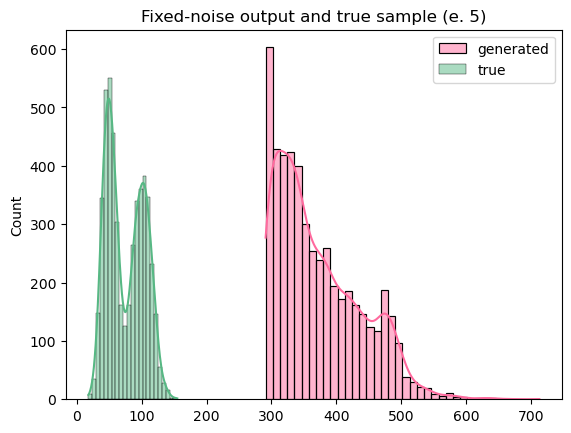

Classifier train:
    5: loss: 0.622, pred: [0.542, 0.458, 0.521, 0.463, 0.461, 0.455, 0.448]
    10: loss: 0.546, pred: [0.584, 0.411, 0.491, 0.419, 0.414, 0.408, 0.403]
    15: loss: 0.479, pred: [0.624, 0.372, 0.445, 0.379, 0.374, 0.37, 0.364]
    20: loss: 0.422, pred: [0.66, 0.336, 0.403, 0.343, 0.339, 0.334, 0.33]
Generator training: (lr=0.172)
    SE 1: loss: 1.115, pred: 0.328
### Epoch: 6
 train loss = 1.0590, pred = 0.3468, wass_d = 290.4491
output mean: 365.58 std: 38.58
ground mean: 75.13 std: 28.24


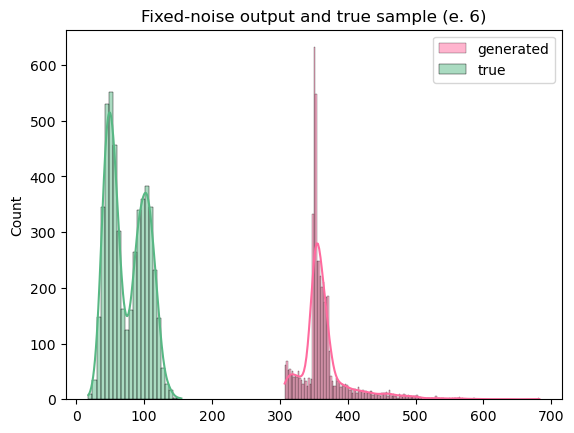

Classifier train:
    5: loss: 0.616, pred: [0.545, 0.446, 0.531, 0.47, 0.451, 0.443, 0.454, 0.457]
    10: loss: 0.542, pred: [0.587, 0.4, 0.51, 0.425, 0.405, 0.397, 0.408, 0.409]
    15: loss: 0.475, pred: [0.626, 0.361, 0.462, 0.385, 0.366, 0.359, 0.369, 0.37]
    20: loss: 0.419, pred: [0.662, 0.327, 0.418, 0.348, 0.331, 0.325, 0.334, 0.335]
Generator training: (lr=0.167)
    SE 1: loss: 1.09, pred: 0.336
### Epoch: 7
 train loss = 0.7645, pred = 0.4656, wass_d = 197.3452
output mean: 272.48 std: 7.85
ground mean: 75.13 std: 28.24


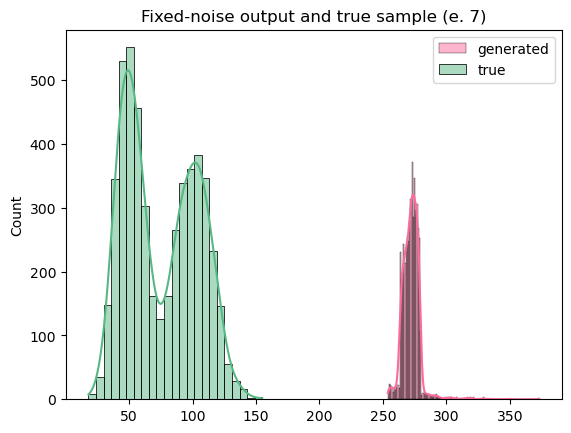

Classifier train:
    5: loss: 0.617, pred: [0.542, 0.449, 0.529, 0.476, 0.454, 0.44, 0.457, 0.455, 0.439]
    10: loss: 0.543, pred: [0.583, 0.402, 0.516, 0.431, 0.407, 0.394, 0.411, 0.408, 0.395]
    15: loss: 0.477, pred: [0.623, 0.363, 0.469, 0.39, 0.368, 0.356, 0.372, 0.368, 0.357]
    20: loss: 0.42, pred: [0.659, 0.329, 0.425, 0.353, 0.333, 0.322, 0.337, 0.333, 0.323]
Generator training: (lr=0.162)
    SE 1: loss: 1.125, pred: 0.325
### Epoch: 8
 train loss = 0.5768, pred = 0.5617, wass_d = 136.2584
output mean: 211.39 std: 5.41
ground mean: 75.13 std: 28.24


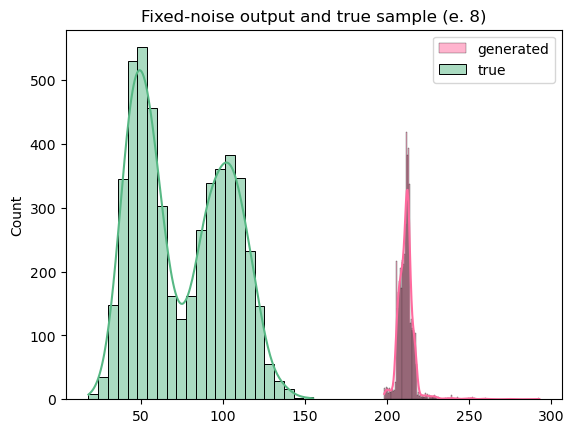

Classifier train:
    5: loss: 0.619, pred: [0.539, 0.448, 0.529, 0.466, 0.444, 0.455, 0.451, 0.447, 0.451, 0.46]
    10: loss: 0.546, pred: [0.58, 0.401, 0.524, 0.423, 0.398, 0.408, 0.406, 0.4, 0.405, 0.412]
    15: loss: 0.479, pred: [0.62, 0.362, 0.48, 0.382, 0.36, 0.369, 0.367, 0.361, 0.366, 0.371]
    20: loss: 0.422, pred: [0.656, 0.328, 0.434, 0.345, 0.325, 0.334, 0.332, 0.326, 0.331, 0.336]
Generator training: (lr=0.157)
    SE 1: loss: 1.09, pred: 0.336
### Epoch: 9
 train loss = 0.6080, pred = 0.5444, wass_d = 112.7962
output mean: -37.67 std: 7.39
ground mean: 75.13 std: 28.24


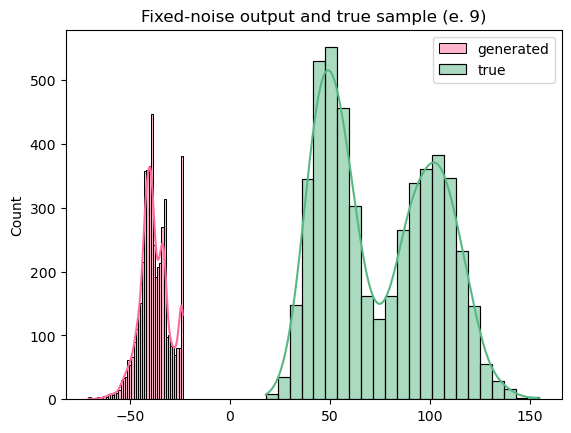

Classifier train:
    5: loss: 0.619, pred: [0.536, 0.443, 0.529, 0.471, 0.458, 0.444, 0.452, 0.452, 0.449, 0.444, 0.444]
    10: loss: 0.547, pred: [0.577, 0.397, 0.529, 0.429, 0.411, 0.398, 0.407, 0.404, 0.404, 0.397, 0.398]
    15: loss: 0.48, pred: [0.617, 0.358, 0.489, 0.387, 0.37, 0.359, 0.368, 0.364, 0.365, 0.358, 0.359]
    20: loss: 0.423, pred: [0.653, 0.324, 0.443, 0.35, 0.335, 0.325, 0.333, 0.33, 0.33, 0.324, 0.325]
Generator training: (lr=0.152)
    SE 1: loss: 1.126, pred: 0.324
### Epoch: 10
 train loss = 1.0197, pred = 0.3607, wass_d = 94.6935
output mean: -19.56 std: 1.34
ground mean: 75.13 std: 28.24


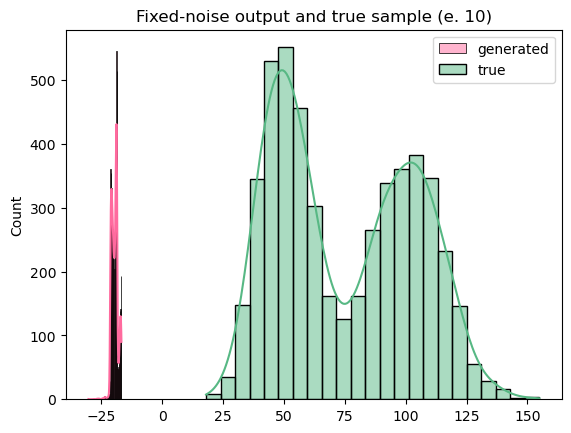

Classifier train:
    5: loss: 0.623, pred: [0.537, 0.45, 0.531, 0.475, 0.452, 0.45, 0.453, 0.456, 0.458, 0.464, 0.456, 0.454]
    10: loss: 0.55, pred: [0.578, 0.403, 0.536, 0.433, 0.406, 0.404, 0.409, 0.408, 0.412, 0.416, 0.409, 0.41]
    15: loss: 0.483, pred: [0.618, 0.362, 0.501, 0.391, 0.365, 0.363, 0.369, 0.367, 0.372, 0.374, 0.367, 0.372]
    20: loss: 0.425, pred: [0.654, 0.327, 0.453, 0.354, 0.33, 0.329, 0.334, 0.332, 0.337, 0.338, 0.331, 0.337]
Generator training: (lr=0.147)
    SE 1: loss: 1.088, pred: 0.337
### Epoch: 11
 train loss = 1.0874, pred = 0.3371, wass_d = 95.9941
output mean: -20.86 std: 1.10
ground mean: 75.13 std: 28.24


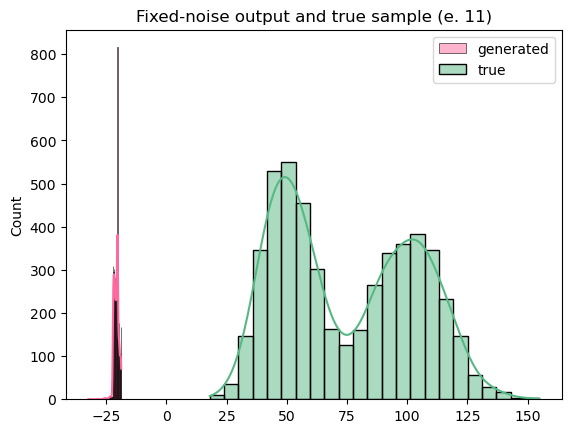

Classifier train:
    5: loss: 0.61, pred: [0.547, 0.444, 0.543, 0.475, 0.449, 0.453, 0.456, 0.452, 0.447, 0.442, 0.455, 0.448, 0.449]
    10: loss: 0.539, pred: [0.586, 0.397, 0.55, 0.434, 0.404, 0.407, 0.412, 0.405, 0.403, 0.396, 0.408, 0.405, 0.405]
    15: loss: 0.474, pred: [0.625, 0.357, 0.518, 0.391, 0.363, 0.366, 0.372, 0.364, 0.364, 0.356, 0.365, 0.366, 0.367]
    20: loss: 0.418, pred: [0.661, 0.322, 0.469, 0.354, 0.328, 0.331, 0.336, 0.329, 0.329, 0.322, 0.33, 0.332, 0.332]
Generator training: (lr=0.143)
    SE 1: loss: 1.103, pred: 0.332
### Epoch: 12
 train loss = 1.1022, pred = 0.3321, wass_d = 97.9830
output mean: -22.85 std: 0.94
ground mean: 75.13 std: 28.24


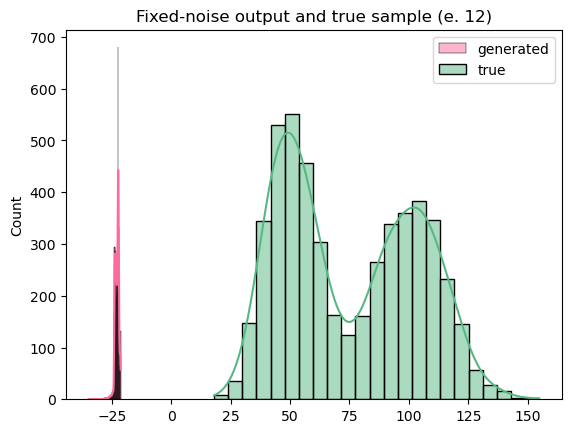

Classifier train:
    5: loss: 0.616, pred: [0.545, 0.445, 0.541, 0.472, 0.462, 0.474, 0.449, 0.456, 0.475, 0.441, 0.46, 0.451, 0.452, 0.453]
    10: loss: 0.545, pred: [0.585, 0.398, 0.552, 0.432, 0.415, 0.426, 0.405, 0.409, 0.428, 0.396, 0.413, 0.407, 0.408, 0.408]
    15: loss: 0.479, pred: [0.623, 0.357, 0.527, 0.389, 0.373, 0.383, 0.366, 0.366, 0.386, 0.355, 0.369, 0.368, 0.369, 0.369]
    20: loss: 0.422, pred: [0.659, 0.323, 0.479, 0.352, 0.337, 0.346, 0.331, 0.331, 0.349, 0.321, 0.333, 0.334, 0.334, 0.334]
Generator training: (lr=0.139)
    SE 1: loss: 1.095, pred: 0.334
### Epoch: 13
 train loss = 1.0943, pred = 0.3348, wass_d = 100.3312
output mean: -25.20 std: 0.88
ground mean: 75.13 std: 28.24


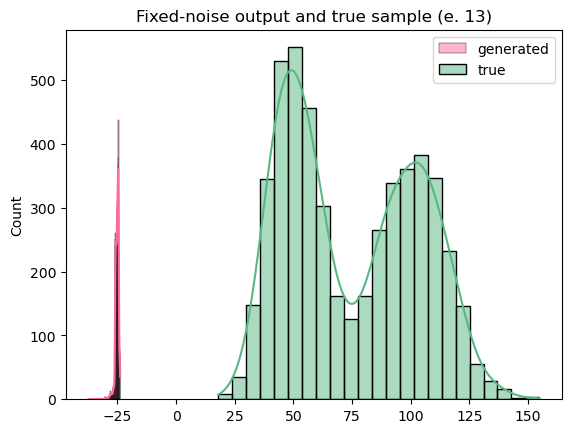

Classifier train:
    5: loss: 0.625, pred: [0.532, 0.444, 0.53, 0.464, 0.443, 0.472, 0.464, 0.462, 0.465, 0.449, 0.454, 0.451, 0.452, 0.452, 0.452]
    10: loss: 0.553, pred: [0.573, 0.398, 0.547, 0.426, 0.399, 0.424, 0.419, 0.415, 0.42, 0.403, 0.407, 0.408, 0.408, 0.408, 0.408]
    15: loss: 0.487, pred: [0.612, 0.357, 0.531, 0.384, 0.358, 0.381, 0.378, 0.372, 0.378, 0.361, 0.364, 0.369, 0.369, 0.369, 0.368]
    20: loss: 0.429, pred: [0.649, 0.322, 0.485, 0.347, 0.323, 0.344, 0.342, 0.335, 0.342, 0.326, 0.327, 0.334, 0.334, 0.334, 0.333]
Generator training: (lr=0.135)
    SE 1: loss: 1.099, pred: 0.333
### Epoch: 14
 train loss = 1.0984, pred = 0.3334, wass_d = 99.0449
output mean: -23.91 std: 0.88
ground mean: 75.13 std: 28.24


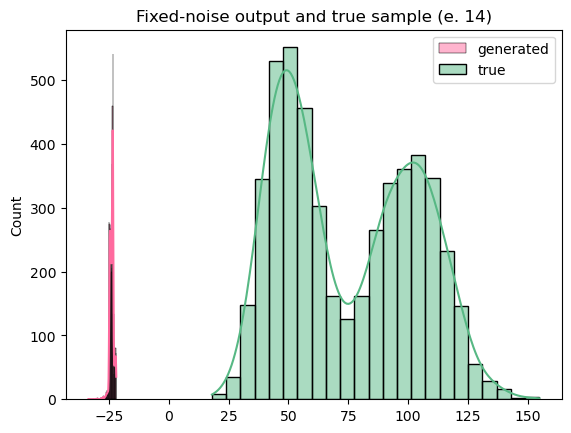

Classifier train:
    5: loss: 0.605, pred: [0.557, 0.456, 0.555, 0.478, 0.469, 0.455, 0.456, 0.459, 0.459, 0.452, 0.459, 0.452, 0.452, 0.452, 0.453, 0.453]
    10: loss: 0.536, pred: [0.596, 0.409, 0.571, 0.439, 0.423, 0.409, 0.412, 0.412, 0.414, 0.406, 0.413, 0.408, 0.408, 0.408, 0.408, 0.408]
    15: loss: 0.472, pred: [0.633, 0.366, 0.555, 0.396, 0.379, 0.367, 0.372, 0.369, 0.373, 0.364, 0.368, 0.369, 0.369, 0.369, 0.368, 0.369]
    20: loss: 0.416, pred: [0.668, 0.33, 0.509, 0.358, 0.342, 0.331, 0.336, 0.332, 0.337, 0.328, 0.331, 0.334, 0.334, 0.334, 0.333, 0.334]
Generator training: (lr=0.131)
    SE 1: loss: 1.098, pred: 0.334
### Epoch: 15
 train loss = 1.0973, pred = 0.3338, wass_d = 98.2266
output mean: -23.10 std: 0.88
ground mean: 75.13 std: 28.24


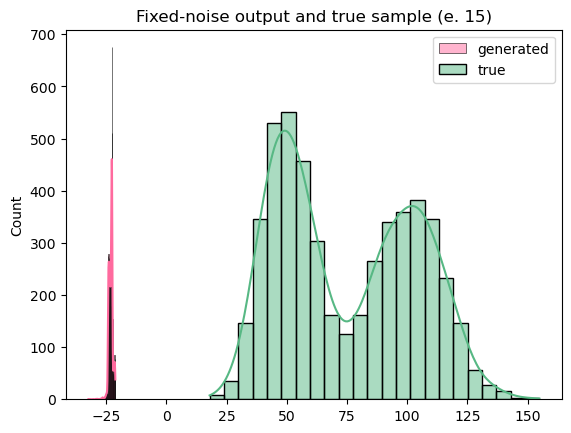

Classifier train:
    5: loss: 0.626, pred: [0.528, 0.458, 0.526, 0.467, 0.449, 0.461, 0.443, 0.442, 0.472, 0.457, 0.453, 0.451, 0.451, 0.451, 0.451, 0.451, 0.451]
    10: loss: 0.553, pred: [0.57, 0.411, 0.549, 0.43, 0.405, 0.415, 0.4, 0.397, 0.426, 0.411, 0.408, 0.408, 0.407, 0.407, 0.407, 0.407, 0.407]
    15: loss: 0.488, pred: [0.609, 0.368, 0.545, 0.389, 0.363, 0.372, 0.362, 0.355, 0.384, 0.368, 0.364, 0.369, 0.368, 0.368, 0.367, 0.367, 0.368]
    20: loss: 0.43, pred: [0.646, 0.33, 0.507, 0.35, 0.327, 0.335, 0.327, 0.319, 0.347, 0.33, 0.325, 0.334, 0.334, 0.333, 0.332, 0.332, 0.333]
Generator training: (lr=0.127)
    SE 1: loss: 1.1, pred: 0.333
### Epoch: 16
 train loss = 1.1004, pred = 0.3327, wass_d = 97.5926
output mean: -22.46 std: 0.88
ground mean: 75.13 std: 28.24


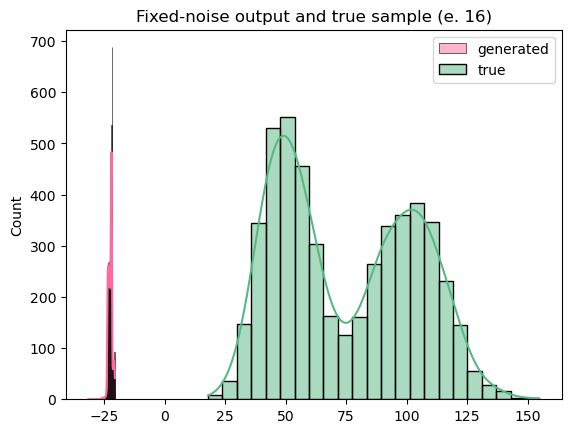

Classifier train:
    5: loss: 0.621, pred: [0.533, 0.455, 0.532, 0.468, 0.453, 0.453, 0.439, 0.441, 0.459, 0.463, 0.455, 0.452, 0.452, 0.452, 0.452, 0.452, 0.452, 0.452]
    10: loss: 0.549, pred: [0.574, 0.409, 0.556, 0.431, 0.409, 0.407, 0.397, 0.397, 0.415, 0.416, 0.41, 0.408, 0.408, 0.408, 0.408, 0.408, 0.408, 0.408]
    15: loss: 0.485, pred: [0.613, 0.366, 0.555, 0.391, 0.367, 0.365, 0.359, 0.355, 0.374, 0.373, 0.366, 0.369, 0.369, 0.369, 0.368, 0.368, 0.369, 0.369]
    20: loss: 0.428, pred: [0.649, 0.328, 0.521, 0.351, 0.33, 0.328, 0.325, 0.318, 0.337, 0.334, 0.327, 0.334, 0.334, 0.334, 0.333, 0.333, 0.334, 0.334]
Generator training: (lr=0.123)
    SE 1: loss: 1.097, pred: 0.334
### Epoch: 17
 train loss = 1.0974, pred = 0.3337, wass_d = 96.9760
output mean: -21.85 std: 0.86
ground mean: 75.13 std: 28.24


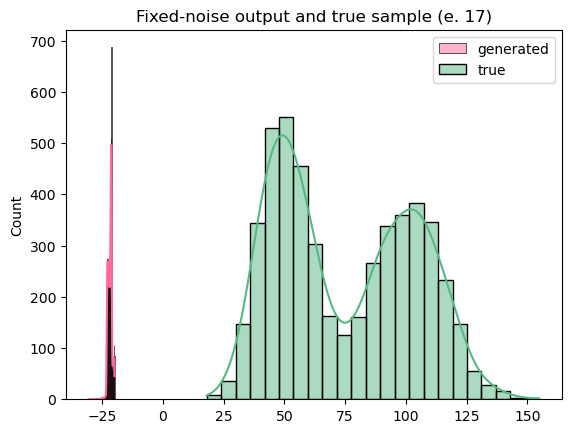

Classifier train:
    5: loss: 0.604, pred: [0.553, 0.447, 0.553, 0.478, 0.463, 0.45, 0.451, 0.458, 0.454, 0.447, 0.456, 0.45, 0.451, 0.451, 0.452, 0.452, 0.451, 0.451, 0.451]
    10: loss: 0.535, pred: [0.592, 0.402, 0.577, 0.441, 0.418, 0.404, 0.408, 0.411, 0.41, 0.402, 0.41, 0.407, 0.407, 0.407, 0.408, 0.408, 0.407, 0.407, 0.407]
    15: loss: 0.474, pred: [0.628, 0.359, 0.577, 0.399, 0.375, 0.363, 0.369, 0.368, 0.37, 0.36, 0.366, 0.368, 0.368, 0.368, 0.368, 0.368, 0.368, 0.368, 0.368]
    20: loss: 0.418, pred: [0.663, 0.322, 0.544, 0.359, 0.337, 0.326, 0.334, 0.33, 0.333, 0.323, 0.327, 0.333, 0.333, 0.333, 0.332, 0.333, 0.333, 0.333, 0.333]
Generator training: (lr=0.119)
    SE 1: loss: 1.1, pred: 0.333
### Epoch: 18
 train loss = 1.0997, pred = 0.3330, wass_d = 96.5342
output mean: -21.40 std: 0.89
ground mean: 75.13 std: 28.24


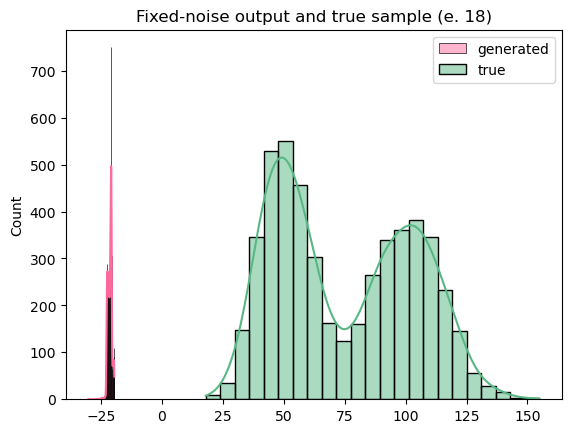

Classifier train:
    5: loss: 0.61, pred: [0.543, 0.454, 0.546, 0.476, 0.45, 0.455, 0.454, 0.455, 0.457, 0.458, 0.453, 0.444, 0.444, 0.444, 0.444, 0.444, 0.444, 0.444, 0.444, 0.444]
    10: loss: 0.54, pred: [0.583, 0.408, 0.573, 0.44, 0.406, 0.409, 0.41, 0.409, 0.413, 0.412, 0.408, 0.401, 0.401, 0.401, 0.4, 0.401, 0.401, 0.401, 0.401, 0.401]
    15: loss: 0.478, pred: [0.621, 0.365, 0.578, 0.399, 0.365, 0.367, 0.371, 0.366, 0.373, 0.369, 0.365, 0.363, 0.363, 0.362, 0.361, 0.362, 0.362, 0.362, 0.362, 0.362]
    20: loss: 0.422, pred: [0.656, 0.326, 0.551, 0.359, 0.327, 0.329, 0.335, 0.328, 0.336, 0.33, 0.325, 0.329, 0.328, 0.327, 0.326, 0.327, 0.327, 0.327, 0.328, 0.328]
Generator training: (lr=0.116)
    SE 1: loss: 1.115, pred: 0.328
### Epoch: 19
 train loss = 1.1150, pred = 0.3279, wass_d = 95.8782
output mean: -20.75 std: 0.91
ground mean: 75.13 std: 28.24


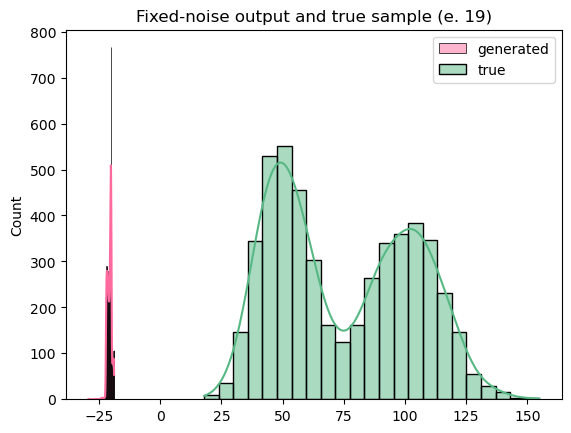

Classifier train:
    5: loss: 0.617, pred: [0.534, 0.434, 0.536, 0.466, 0.463, 0.457, 0.467, 0.465, 0.453, 0.462, 0.45, 0.441, 0.442, 0.442, 0.444, 0.443, 0.443, 0.442, 0.442, 0.442, 0.442]
    10: loss: 0.546, pred: [0.575, 0.39, 0.565, 0.431, 0.418, 0.412, 0.422, 0.419, 0.41, 0.416, 0.406, 0.399, 0.399, 0.4, 0.4, 0.4, 0.4, 0.399, 0.399, 0.399, 0.399]
    15: loss: 0.483, pred: [0.613, 0.349, 0.574, 0.393, 0.376, 0.369, 0.382, 0.375, 0.37, 0.373, 0.363, 0.36, 0.361, 0.361, 0.361, 0.361, 0.361, 0.361, 0.361, 0.361, 0.361]
    20: loss: 0.427, pred: [0.649, 0.312, 0.555, 0.353, 0.337, 0.331, 0.345, 0.335, 0.334, 0.333, 0.323, 0.326, 0.326, 0.326, 0.326, 0.326, 0.326, 0.326, 0.326, 0.326, 0.326]
Generator training: (lr=0.112)
    SE 1: loss: 1.12, pred: 0.326
### Epoch: 20
 train loss = 1.1199, pred = 0.3263, wass_d = 95.5487
output mean: -20.42 std: 0.92
ground mean: 75.13 std: 28.24


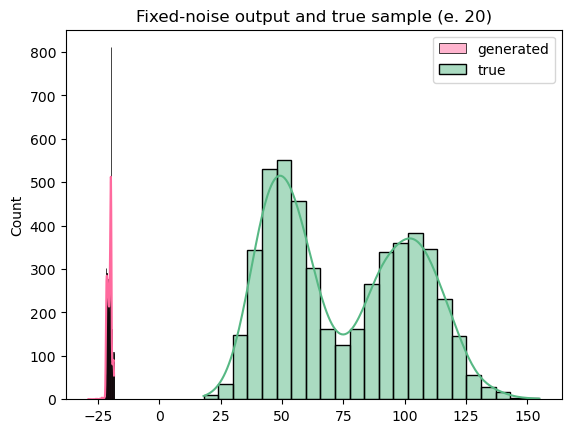

Classifier train:
    5: loss: 0.599, pred: [0.551, 0.442, 0.552, 0.485, 0.462, 0.461, 0.454, 0.455, 0.456, 0.46, 0.445, 0.439, 0.439, 0.439, 0.439, 0.439, 0.439, 0.439, 0.439, 0.439, 0.439, 0.439]
    10: loss: 0.531, pred: [0.591, 0.398, 0.581, 0.448, 0.417, 0.415, 0.411, 0.41, 0.413, 0.415, 0.402, 0.397, 0.397, 0.397, 0.396, 0.396, 0.397, 0.397, 0.397, 0.397, 0.397, 0.397]
    15: loss: 0.47, pred: [0.627, 0.356, 0.591, 0.408, 0.374, 0.372, 0.371, 0.367, 0.372, 0.371, 0.359, 0.359, 0.359, 0.358, 0.358, 0.358, 0.358, 0.358, 0.358, 0.359, 0.359, 0.359]
    20: loss: 0.416, pred: [0.662, 0.318, 0.572, 0.367, 0.335, 0.333, 0.336, 0.328, 0.335, 0.332, 0.32, 0.325, 0.324, 0.324, 0.323, 0.323, 0.324, 0.324, 0.324, 0.324, 0.324, 0.325]
Generator training: (lr=0.109)
    SE 1: loss: 1.125, pred: 0.325
### Epoch: 21
 train loss = 1.1251, pred = 0.3246, wass_d = 95.1010
output mean: -19.97 std: 0.90
ground mean: 75.13 std: 28.24


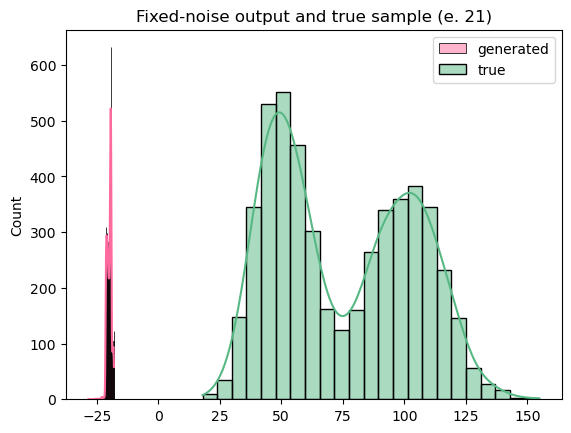

Classifier train:
    5: loss: 0.626, pred: [0.535, 0.457, 0.537, 0.485, 0.461, 0.457, 0.454, 0.452, 0.456, 0.467, 0.473, 0.46, 0.46, 0.462, 0.463, 0.462, 0.462, 0.461, 0.461, 0.461, 0.46, 0.46, 0.46]
    10: loss: 0.553, pred: [0.576, 0.411, 0.569, 0.449, 0.417, 0.412, 0.411, 0.408, 0.412, 0.421, 0.427, 0.416, 0.416, 0.417, 0.418, 0.417, 0.417, 0.417, 0.417, 0.416, 0.416, 0.416, 0.416]
    15: loss: 0.489, pred: [0.614, 0.369, 0.583, 0.41, 0.375, 0.37, 0.372, 0.365, 0.372, 0.377, 0.382, 0.376, 0.376, 0.377, 0.377, 0.377, 0.377, 0.377, 0.376, 0.376, 0.376, 0.376, 0.376]
    20: loss: 0.433, pred: [0.649, 0.329, 0.572, 0.369, 0.336, 0.331, 0.336, 0.326, 0.335, 0.337, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34]
Generator training: (lr=0.105)
    SE 1: loss: 1.078, pred: 0.34
### Epoch: 22
 train loss = 1.0784, pred = 0.3401, wass_d = 94.9488
output mean: -19.82 std: 0.93
ground mean: 75.13 std: 28.24


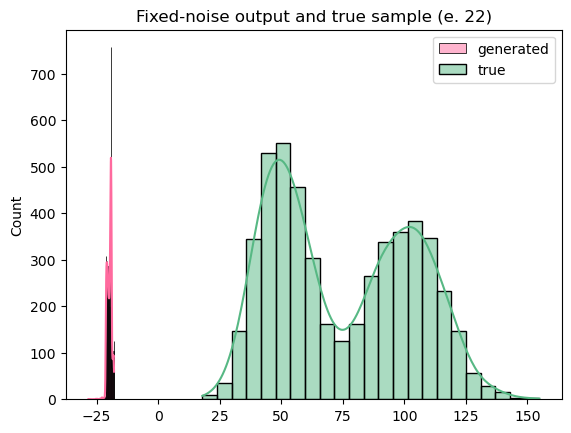

Classifier train:
    5: loss: 0.615, pred: [0.543, 0.46, 0.544, 0.484, 0.455, 0.456, 0.456, 0.462, 0.456, 0.447, 0.456, 0.456, 0.455, 0.455, 0.455, 0.455, 0.455, 0.455, 0.455, 0.455, 0.455, 0.456, 0.456, 0.456]
    10: loss: 0.543, pred: [0.583, 0.413, 0.576, 0.449, 0.411, 0.411, 0.412, 0.416, 0.413, 0.403, 0.412, 0.412, 0.412, 0.411, 0.411, 0.411, 0.411, 0.411, 0.411, 0.411, 0.412, 0.412, 0.412, 0.412]
    15: loss: 0.481, pred: [0.62, 0.37, 0.591, 0.41, 0.37, 0.369, 0.373, 0.373, 0.372, 0.362, 0.369, 0.372, 0.372, 0.371, 0.371, 0.371, 0.371, 0.372, 0.372, 0.372, 0.372, 0.372, 0.372, 0.372]
    20: loss: 0.426, pred: [0.655, 0.331, 0.582, 0.369, 0.331, 0.33, 0.337, 0.333, 0.336, 0.323, 0.329, 0.337, 0.336, 0.335, 0.334, 0.335, 0.335, 0.336, 0.336, 0.336, 0.336, 0.337, 0.337, 0.337]
Generator training: (lr=0.102)
    SE 1: loss: 1.088, pred: 0.337
### Epoch: 23
 train loss = 1.0880, pred = 0.3369, wass_d = 94.6070
output mean: -19.48 std: 0.94
ground mean: 75.13 std: 28.24


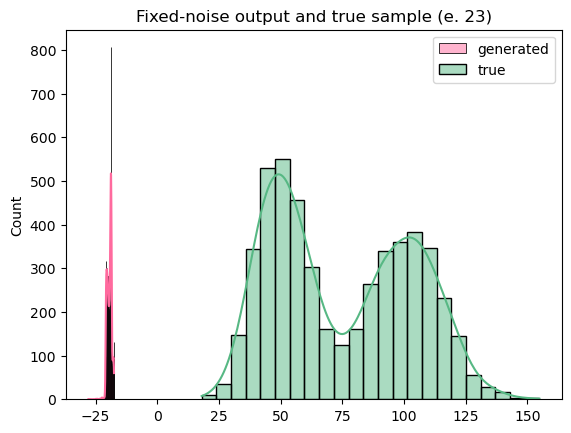

Classifier train:
    5: loss: 0.61, pred: [0.542, 0.438, 0.546, 0.479, 0.451, 0.446, 0.458, 0.46, 0.451, 0.463, 0.46, 0.446, 0.447, 0.448, 0.45, 0.449, 0.449, 0.448, 0.447, 0.447, 0.447, 0.446, 0.446, 0.446, 0.445]
    10: loss: 0.539, pred: [0.583, 0.394, 0.58, 0.444, 0.408, 0.401, 0.415, 0.414, 0.408, 0.417, 0.415, 0.403, 0.404, 0.405, 0.407, 0.406, 0.405, 0.405, 0.404, 0.404, 0.404, 0.403, 0.403, 0.403, 0.403]
    15: loss: 0.478, pred: [0.62, 0.353, 0.596, 0.406, 0.367, 0.361, 0.375, 0.371, 0.368, 0.374, 0.372, 0.364, 0.365, 0.366, 0.367, 0.366, 0.366, 0.366, 0.365, 0.365, 0.365, 0.365, 0.364, 0.364, 0.364]
    20: loss: 0.423, pred: [0.655, 0.315, 0.591, 0.367, 0.329, 0.323, 0.339, 0.332, 0.332, 0.334, 0.332, 0.329, 0.33, 0.33, 0.331, 0.331, 0.331, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.329]
Generator training: (lr=0.099)
    SE 1: loss: 1.11, pred: 0.329
### Epoch: 24
 train loss = 1.1104, pred = 0.3294, wass_d = 94.7261
output mean: -19.60 std: 0.93
ground mean: 75.13 std:

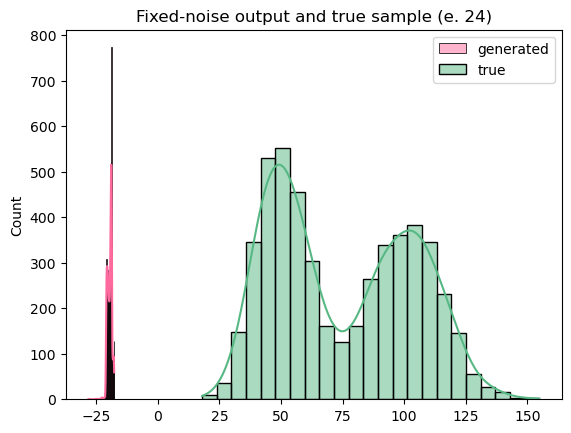

Classifier train:
    5: loss: 0.604, pred: [0.547, 0.445, 0.549, 0.48, 0.465, 0.458, 0.462, 0.457, 0.458, 0.463, 0.455, 0.442, 0.442, 0.443, 0.444, 0.443, 0.443, 0.443, 0.443, 0.443, 0.442, 0.442, 0.442, 0.442, 0.442, 0.442]
    10: loss: 0.534, pred: [0.587, 0.4, 0.582, 0.446, 0.421, 0.413, 0.418, 0.411, 0.414, 0.418, 0.411, 0.4, 0.4, 0.4, 0.401, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
    15: loss: 0.474, pred: [0.624, 0.358, 0.6, 0.408, 0.378, 0.371, 0.378, 0.369, 0.374, 0.375, 0.369, 0.361, 0.361, 0.361, 0.362, 0.362, 0.362, 0.361, 0.361, 0.361, 0.361, 0.361, 0.361, 0.361, 0.362, 0.361]
    20: loss: 0.42, pred: [0.658, 0.32, 0.597, 0.368, 0.339, 0.332, 0.342, 0.33, 0.337, 0.334, 0.328, 0.327, 0.327, 0.327, 0.326, 0.326, 0.326, 0.327, 0.327, 0.327, 0.327, 0.327, 0.327, 0.327, 0.327, 0.327]
Generator training: (lr=0.099)
    SE 1: loss: 1.118, pred: 0.327
### Epoch: 25
 train loss = 1.1178, pred = 0.3270, wass_d = 94.7025
output mean: -19.57 std: 0.93
ground mean: 75

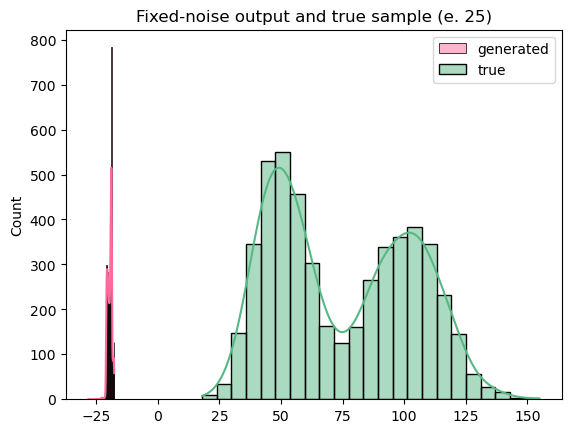

Classifier train:
    5: loss: 0.613, pred: [0.541, 0.452, 0.54, 0.485, 0.472, 0.455, 0.46, 0.46, 0.461, 0.454, 0.459, 0.448, 0.448, 0.449, 0.45, 0.449, 0.449, 0.449, 0.449, 0.448, 0.448, 0.448, 0.448, 0.448, 0.448, 0.448, 0.448]
    10: loss: 0.541, pred: [0.582, 0.407, 0.575, 0.45, 0.427, 0.411, 0.416, 0.415, 0.417, 0.41, 0.415, 0.405, 0.405, 0.405, 0.406, 0.406, 0.406, 0.405, 0.405, 0.405, 0.405, 0.405, 0.405, 0.405, 0.405, 0.405, 0.405]
    15: loss: 0.48, pred: [0.619, 0.365, 0.595, 0.413, 0.384, 0.369, 0.376, 0.372, 0.377, 0.367, 0.373, 0.366, 0.366, 0.366, 0.366, 0.366, 0.366, 0.366, 0.366, 0.366, 0.366, 0.366, 0.366, 0.366, 0.366, 0.366, 0.366]
    20: loss: 0.425, pred: [0.654, 0.326, 0.596, 0.373, 0.344, 0.33, 0.34, 0.332, 0.34, 0.328, 0.332, 0.331, 0.331, 0.331, 0.33, 0.331, 0.331, 0.331, 0.331, 0.331, 0.331, 0.331, 0.331, 0.331, 0.331, 0.331, 0.331]
Generator training: (lr=0.099)
    SE 1: loss: 1.104, pred: 0.331
### Epoch: 26
 train loss = 1.1043, pred = 0.3314, wass_d = 

KeyboardInterrupt: 

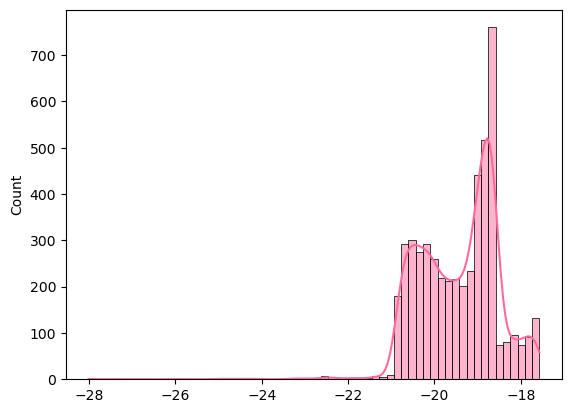

In [ ]:
n_dim = 1
samples_per_dist = 5_000

mean = 300
std = 150

mean2 = 900
std2 = 200

true_pdf = utils.gamma_pdf(mean, std)

ground_dist = BimodalNormal(1, n_dim, mean, std, mean2, std2)

ground_dist.sample(samples_per_dist)

n_kme_features = 500
n_features = 400

kme_rff_encoder = RffEncoder(
    n_dim,
    n_kme_features,
    kernel="gaussian",
    log_amplitude=1.0,
    log_length_scale=4.0,
)

reg_rff_encoder = RffEncoder(
    n_kme_features,
    n_features,
    kernel="gaussian",
    log_amplitude=0.0,
    log_length_scale=0.0,
)


noise_dim = n_dim
n_noise_dists = 1

fixed_noise_dists = distributions.Normal.rand_unf(
    1, noise_dim, 0, 1, subclass="normal"
)
fixed_noise_dists.sample(samples_per_dist)

noise_dists = distributions.Normal.rand_unf(
    n_noise_dists, noise_dim, 0, 1, subclass="normal"
)
noise_dists.sample(samples_per_dist)

gan_dist_set = GanDistributionSet(
    kme_rff_encoder,
    reg_rff_encoder,
    ground_sample,
    noise_dists,
    fixed_noise_dists,
    samples_per_dist,
)

classifier_lr = 0.001
classifier = Classifier(n_features)
classifier_opt = torch.optim.LBFGS(classifier.parameters(), lr=classifier_lr)

generator = GeneratorDoubleHidden(noise_dim, n_dim, bias=True)
generator_opt = torch.optim.Adam(
    generator.parameters(), lr=0.15, betas=(0.1, 0.999)
)
generator_scheduler = torch.optim.lr_scheduler.ExponentialLR(
    generator_opt, gamma=0.97
)
gen_epochs = 1

train_gan(
    gan_dist_set,
    classifier_lr,
    generator,
    generator_opt,
    generator_scheduler,
    0.1,
    n_features,
    30,
    15,
    gen_epochs,
    verbose=True,
    save_plots=True,
    resample_each_subepoch=False,
)

#### Learn Normal - vanishing gradient

Classifier train:
    5: loss: 0.607, pred: [0.542, 0.452]
    10: loss: 0.53, pred: [0.586, 0.409]
    15: loss: 0.466, pred: [0.625, 0.37]
    20: loss: 0.411, pred: [0.661, 0.335]
    25: loss: 0.364, pred: [0.693, 0.303]
    30: loss: 0.323, pred: [0.722, 0.274]
    35: loss: 0.287, pred: [0.749, 0.248]
    40: loss: 0.256, pred: [0.773, 0.224]
    45: loss: 0.229, pred: [0.794, 0.203]
    50: loss: 0.204, pred: [0.814, 0.184]
    55: loss: 0.183, pred: [0.832, 0.166]
    60: loss: 0.164, pred: [0.848, 0.15]
    65: loss: 0.147, pred: [0.862, 0.136]
    70: loss: 0.132, pred: [0.875, 0.123]
    75: loss: 0.119, pred: [0.887, 0.111]
    80: loss: 0.107, pred: [0.898, 0.101]
Generator training: (lr=0.5)
    SE 1: loss: 2.294, pred: 0.101
### Epoch: 1
 train loss = 2.2942, pred = 0.1008, wass_d = 301.8296
output mean: 1.13 std: 1.36
ground mean: 300.41 std: 151.86


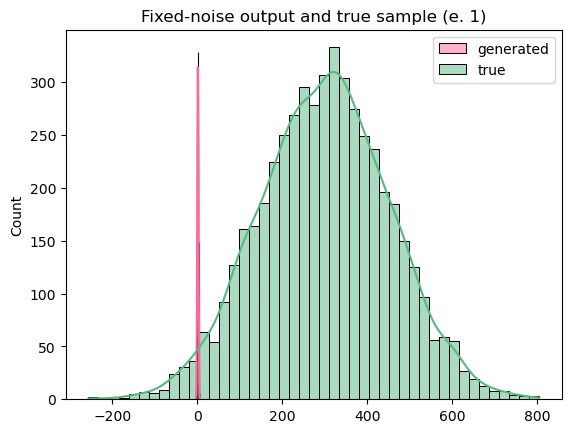

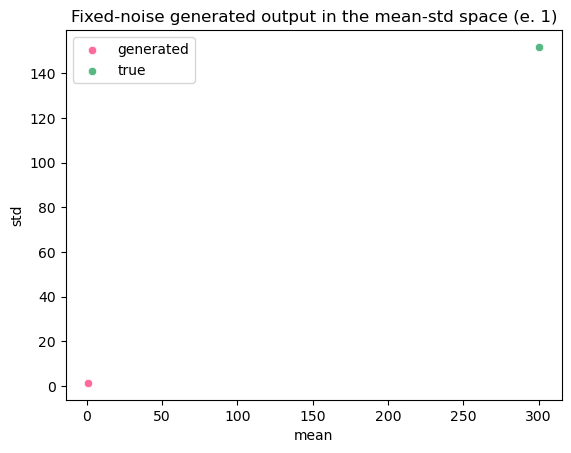

Classifier train:
    5: loss: 0.593, pred: [0.55, 0.445, 0.445]
    10: loss: 0.519, pred: [0.593, 0.402, 0.403]
    15: loss: 0.456, pred: [0.632, 0.364, 0.364]
    20: loss: 0.403, pred: [0.667, 0.329, 0.33]
    25: loss: 0.356, pred: [0.698, 0.298, 0.298]
    30: loss: 0.317, pred: [0.727, 0.27, 0.27]
    35: loss: 0.282, pred: [0.753, 0.244, 0.244]
    40: loss: 0.251, pred: [0.777, 0.221, 0.221]
    45: loss: 0.224, pred: [0.798, 0.2, 0.2]
    50: loss: 0.201, pred: [0.817, 0.181, 0.181]
    55: loss: 0.18, pred: [0.834, 0.163, 0.164]
    60: loss: 0.161, pred: [0.85, 0.148, 0.148]
    65: loss: 0.145, pred: [0.864, 0.134, 0.134]
    70: loss: 0.13, pred: [0.877, 0.121, 0.121]
    75: loss: 0.117, pred: [0.889, 0.11, 0.11]
    80: loss: 0.105, pred: [0.9, 0.099, 0.099]
Generator training: (lr=0.5)
    SE 1: loss: 2.308, pred: 0.099
### Epoch: 2
 train loss = 2.3085, pred = 0.0994, wass_d = 301.3173
output mean: 1.62 std: 1.75
ground mean: 300.41 std: 151.86


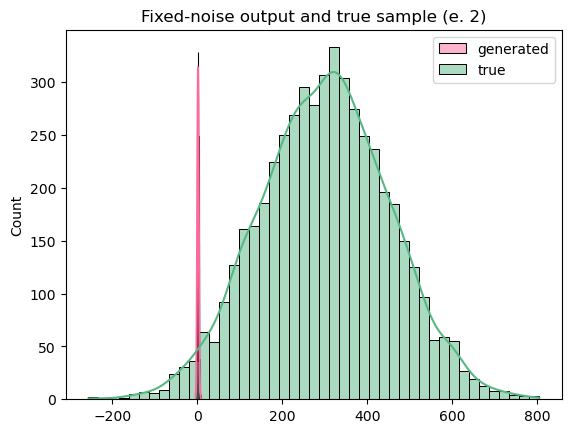

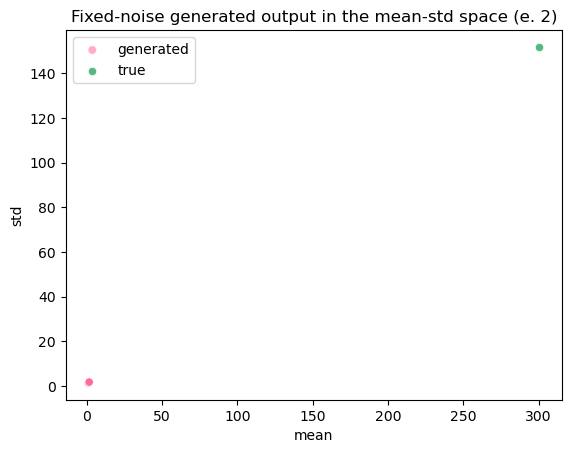

Classifier train:
    5: loss: 0.615, pred: [0.54, 0.459, 0.46, 0.46]
    10: loss: 0.538, pred: [0.584, 0.415, 0.416, 0.416]
    15: loss: 0.472, pred: [0.624, 0.376, 0.376, 0.377]
    20: loss: 0.416, pred: [0.66, 0.34, 0.34, 0.341]
    25: loss: 0.368, pred: [0.692, 0.308, 0.308, 0.309]
    30: loss: 0.327, pred: [0.721, 0.278, 0.279, 0.279]
    35: loss: 0.291, pred: [0.748, 0.252, 0.252, 0.253]
    40: loss: 0.259, pred: [0.772, 0.228, 0.228, 0.229]
    45: loss: 0.231, pred: [0.794, 0.206, 0.206, 0.207]
    50: loss: 0.207, pred: [0.813, 0.186, 0.187, 0.187]
    55: loss: 0.185, pred: [0.831, 0.169, 0.169, 0.17]
    60: loss: 0.166, pred: [0.847, 0.153, 0.153, 0.153]
    65: loss: 0.149, pred: [0.862, 0.138, 0.138, 0.139]
    70: loss: 0.134, pred: [0.875, 0.125, 0.125, 0.126]
    75: loss: 0.12, pred: [0.887, 0.113, 0.113, 0.114]
    80: loss: 0.108, pred: [0.897, 0.102, 0.103, 0.103]
Generator training: (lr=0.5)
    SE 1: loss: 2.274, pred: 0.103
### Epoch: 3
 train loss = 2.27

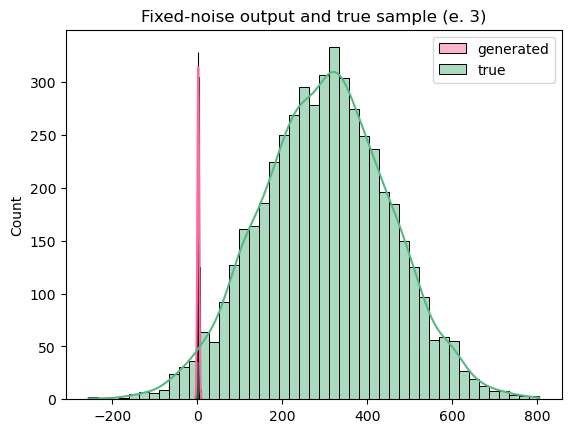

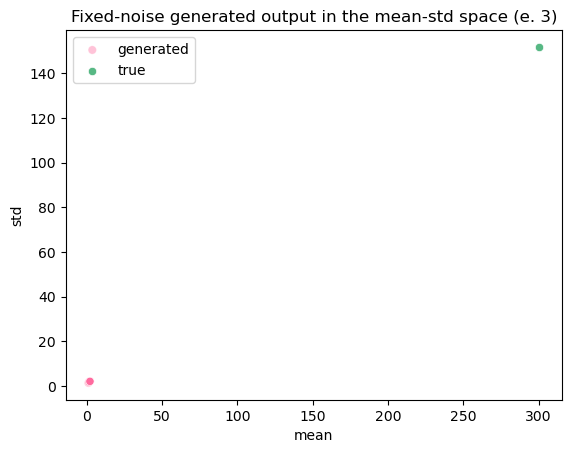

Classifier train:
    5: loss: 0.613, pred: [0.541, 0.457, 0.457, 0.457, 0.458]
    10: loss: 0.535, pred: [0.585, 0.413, 0.413, 0.414, 0.414]
    15: loss: 0.47, pred: [0.624, 0.374, 0.374, 0.374, 0.375]
    20: loss: 0.414, pred: [0.66, 0.338, 0.338, 0.339, 0.34]
    25: loss: 0.367, pred: [0.692, 0.306, 0.306, 0.307, 0.307]
    30: loss: 0.325, pred: [0.722, 0.277, 0.277, 0.277, 0.278]
    35: loss: 0.289, pred: [0.748, 0.25, 0.251, 0.251, 0.252]
    40: loss: 0.258, pred: [0.772, 0.226, 0.227, 0.227, 0.228]
    45: loss: 0.23, pred: [0.794, 0.205, 0.205, 0.206, 0.206]
    50: loss: 0.206, pred: [0.813, 0.185, 0.186, 0.186, 0.187]
    55: loss: 0.185, pred: [0.831, 0.168, 0.168, 0.168, 0.169]
    60: loss: 0.165, pred: [0.847, 0.152, 0.152, 0.152, 0.153]
    65: loss: 0.148, pred: [0.862, 0.137, 0.137, 0.138, 0.138]
    70: loss: 0.133, pred: [0.875, 0.124, 0.124, 0.125, 0.125]
    75: loss: 0.12, pred: [0.887, 0.112, 0.113, 0.113, 0.113]
    80: loss: 0.108, pred: [0.898, 0.102, 0.

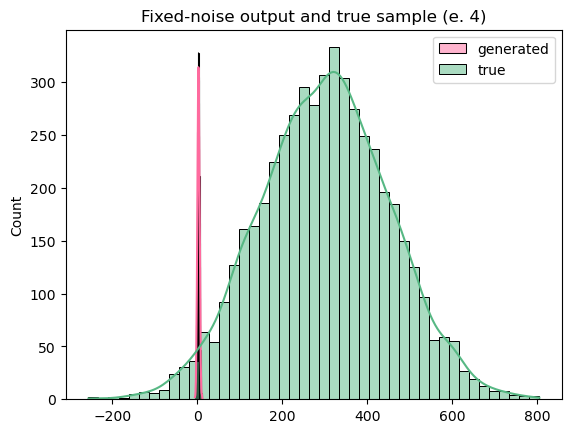

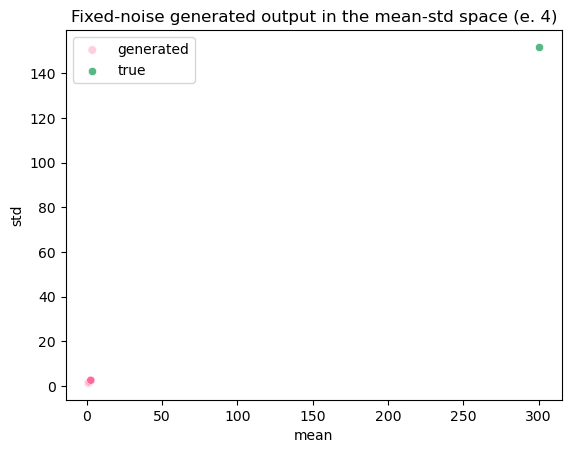

Classifier train:
    5: loss: 0.59, pred: [0.567, 0.458, 0.458, 0.458, 0.459, 0.459]
    10: loss: 0.517, pred: [0.608, 0.414, 0.414, 0.415, 0.415, 0.416]
    15: loss: 0.454, pred: [0.646, 0.375, 0.375, 0.375, 0.376, 0.376]
    20: loss: 0.401, pred: [0.679, 0.339, 0.339, 0.34, 0.34, 0.341]
    25: loss: 0.355, pred: [0.71, 0.307, 0.307, 0.307, 0.308, 0.309]
    30: loss: 0.315, pred: [0.737, 0.277, 0.278, 0.278, 0.278, 0.279]
    35: loss: 0.281, pred: [0.762, 0.251, 0.251, 0.251, 0.252, 0.253]
    40: loss: 0.25, pred: [0.785, 0.227, 0.227, 0.228, 0.228, 0.229]
    45: loss: 0.224, pred: [0.805, 0.205, 0.206, 0.206, 0.206, 0.207]
    50: loss: 0.2, pred: [0.824, 0.186, 0.186, 0.186, 0.187, 0.187]
    55: loss: 0.179, pred: [0.841, 0.168, 0.168, 0.169, 0.169, 0.17]
    60: loss: 0.161, pred: [0.856, 0.152, 0.152, 0.152, 0.153, 0.154]
    65: loss: 0.144, pred: [0.87, 0.138, 0.138, 0.138, 0.138, 0.139]
    70: loss: 0.13, pred: [0.882, 0.125, 0.125, 0.125, 0.125, 0.126]
    75: loss:

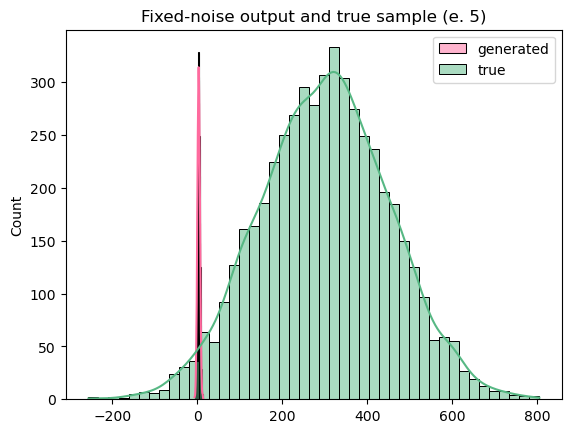

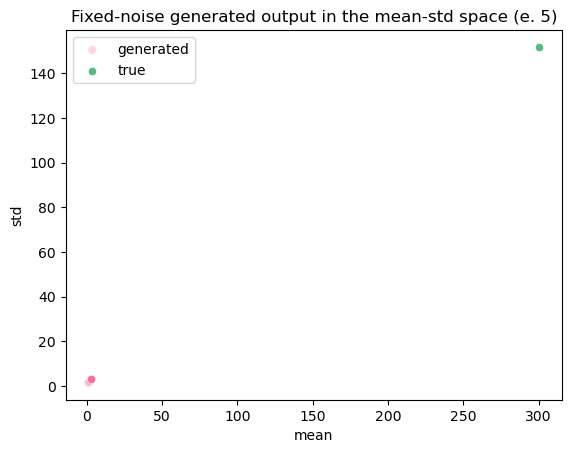

Classifier train:
    5: loss: 0.602, pred: [0.541, 0.445, 0.445, 0.445, 0.446, 0.446, 0.446]
    10: loss: 0.526, pred: [0.585, 0.402, 0.403, 0.403, 0.403, 0.404, 0.404]
    15: loss: 0.462, pred: [0.624, 0.364, 0.364, 0.364, 0.365, 0.365, 0.366]
    20: loss: 0.408, pred: [0.66, 0.329, 0.329, 0.33, 0.33, 0.331, 0.331]
    25: loss: 0.361, pred: [0.692, 0.298, 0.298, 0.298, 0.299, 0.299, 0.3]
    30: loss: 0.321, pred: [0.722, 0.27, 0.27, 0.27, 0.27, 0.271, 0.271]
    35: loss: 0.285, pred: [0.748, 0.244, 0.244, 0.244, 0.244, 0.245, 0.246]
    40: loss: 0.254, pred: [0.772, 0.221, 0.221, 0.221, 0.221, 0.222, 0.222]
    45: loss: 0.227, pred: [0.794, 0.2, 0.2, 0.2, 0.2, 0.201, 0.201]
    50: loss: 0.203, pred: [0.813, 0.181, 0.181, 0.181, 0.181, 0.182, 0.182]
    55: loss: 0.182, pred: [0.831, 0.164, 0.163, 0.164, 0.164, 0.164, 0.165]
    60: loss: 0.163, pred: [0.847, 0.148, 0.148, 0.148, 0.148, 0.149, 0.149]
    65: loss: 0.146, pred: [0.862, 0.134, 0.134, 0.134, 0.134, 0.134, 0.135]

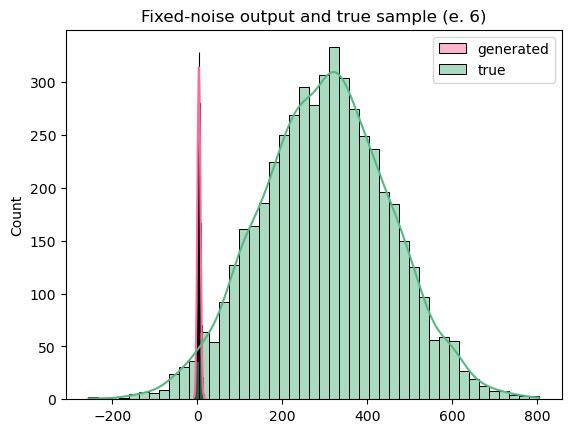

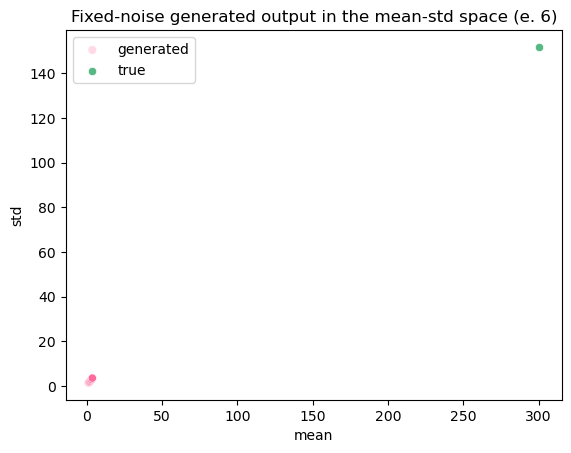

Classifier train:
    5: loss: 0.599, pred: [0.543, 0.444, 0.444, 0.444, 0.444, 0.445, 0.445, 0.445]
    10: loss: 0.524, pred: [0.587, 0.402, 0.402, 0.402, 0.402, 0.402, 0.403, 0.403]
    15: loss: 0.46, pred: [0.626, 0.363, 0.363, 0.364, 0.364, 0.364, 0.364, 0.365]
    20: loss: 0.406, pred: [0.662, 0.329, 0.329, 0.329, 0.329, 0.329, 0.33, 0.33]
    25: loss: 0.36, pred: [0.694, 0.297, 0.297, 0.297, 0.298, 0.298, 0.299, 0.299]
    30: loss: 0.319, pred: [0.723, 0.269, 0.269, 0.269, 0.269, 0.27, 0.27, 0.271]
    35: loss: 0.284, pred: [0.749, 0.244, 0.243, 0.243, 0.244, 0.244, 0.244, 0.245]
    40: loss: 0.253, pred: [0.773, 0.22, 0.22, 0.22, 0.22, 0.221, 0.221, 0.222]
    45: loss: 0.226, pred: [0.795, 0.199, 0.199, 0.199, 0.199, 0.2, 0.2, 0.201]
    50: loss: 0.202, pred: [0.814, 0.181, 0.18, 0.18, 0.18, 0.181, 0.181, 0.182]
    55: loss: 0.181, pred: [0.832, 0.163, 0.163, 0.163, 0.163, 0.164, 0.164, 0.165]
    60: loss: 0.163, pred: [0.848, 0.148, 0.148, 0.148, 0.148, 0.148, 0.148,

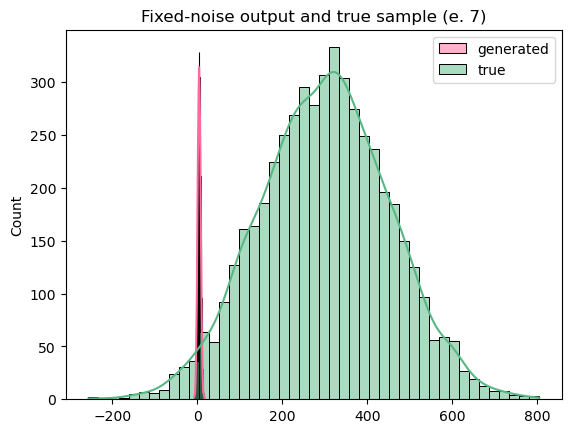

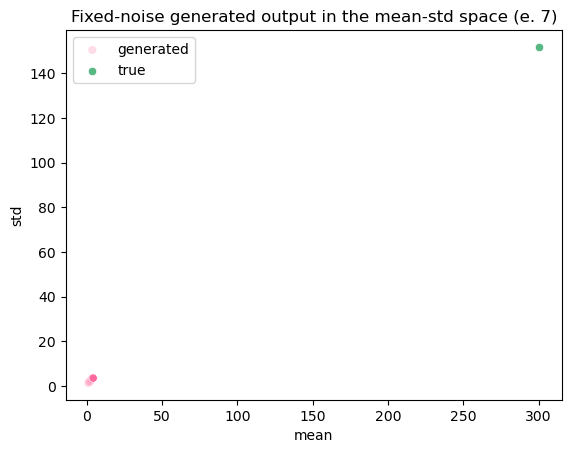

Classifier train:
    5: loss: 0.582, pred: [0.55, 0.433, 0.433, 0.432, 0.432, 0.432, 0.432, 0.432, 0.432]
    10: loss: 0.509, pred: [0.593, 0.392, 0.391, 0.391, 0.391, 0.391, 0.391, 0.391, 0.391]
    15: loss: 0.448, pred: [0.632, 0.354, 0.354, 0.354, 0.354, 0.354, 0.354, 0.354, 0.354]
    20: loss: 0.395, pred: [0.667, 0.321, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.321]
    25: loss: 0.35, pred: [0.699, 0.29, 0.29, 0.29, 0.289, 0.289, 0.29, 0.29, 0.29]
    30: loss: 0.311, pred: [0.727, 0.263, 0.262, 0.262, 0.262, 0.262, 0.262, 0.262, 0.263]
    35: loss: 0.277, pred: [0.753, 0.238, 0.237, 0.237, 0.237, 0.237, 0.237, 0.237, 0.238]
    40: loss: 0.247, pred: [0.777, 0.215, 0.215, 0.214, 0.214, 0.214, 0.215, 0.215, 0.215]
    45: loss: 0.221, pred: [0.798, 0.195, 0.194, 0.194, 0.194, 0.194, 0.194, 0.194, 0.195]
    50: loss: 0.198, pred: [0.817, 0.176, 0.176, 0.175, 0.175, 0.175, 0.176, 0.176, 0.176]
    55: loss: 0.177, pred: [0.835, 0.159, 0.159, 0.159, 0.159, 0.159, 0.159, 0.159, 0.1

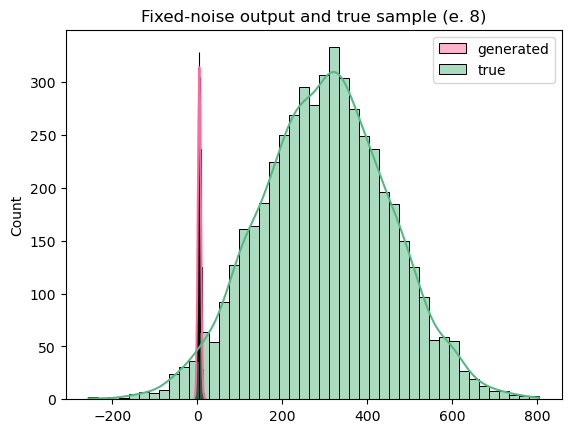

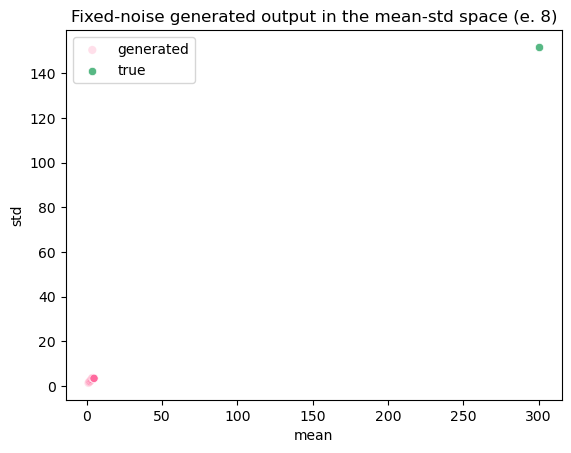

Classifier train:
    5: loss: 0.612, pred: [0.554, 0.47, 0.47, 0.469, 0.469, 0.469, 0.469, 0.469, 0.469, 0.469]
    10: loss: 0.535, pred: [0.597, 0.425, 0.425, 0.425, 0.425, 0.424, 0.424, 0.424, 0.424, 0.425]
    15: loss: 0.469, pred: [0.635, 0.385, 0.384, 0.384, 0.384, 0.384, 0.384, 0.384, 0.384, 0.385]
    20: loss: 0.414, pred: [0.67, 0.348, 0.348, 0.347, 0.347, 0.347, 0.347, 0.348, 0.348, 0.348]
    25: loss: 0.366, pred: [0.701, 0.315, 0.315, 0.314, 0.314, 0.314, 0.314, 0.314, 0.315, 0.315]
    30: loss: 0.325, pred: [0.73, 0.285, 0.285, 0.284, 0.284, 0.284, 0.284, 0.285, 0.285, 0.285]
    35: loss: 0.289, pred: [0.755, 0.258, 0.258, 0.257, 0.257, 0.257, 0.257, 0.257, 0.258, 0.258]
    40: loss: 0.258, pred: [0.779, 0.234, 0.233, 0.233, 0.233, 0.233, 0.233, 0.233, 0.233, 0.234]
    45: loss: 0.23, pred: [0.8, 0.211, 0.211, 0.211, 0.21, 0.21, 0.21, 0.211, 0.211, 0.212]
    50: loss: 0.206, pred: [0.819, 0.191, 0.191, 0.191, 0.19, 0.19, 0.19, 0.191, 0.191, 0.192]
    55: loss: 0.

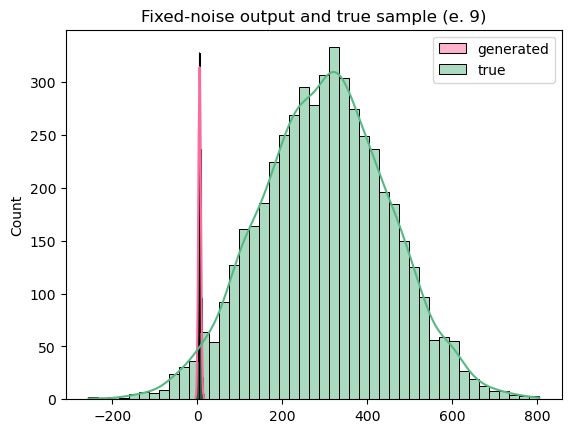

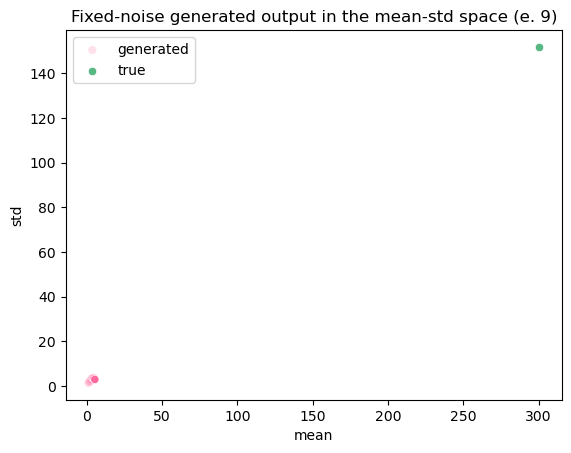

Classifier train:
    5: loss: 0.597, pred: [0.542, 0.44, 0.44, 0.44, 0.441, 0.441, 0.441, 0.441, 0.442, 0.442, 0.443]
    10: loss: 0.522, pred: [0.586, 0.398, 0.398, 0.398, 0.398, 0.399, 0.399, 0.399, 0.4, 0.4, 0.401]
    15: loss: 0.459, pred: [0.625, 0.361, 0.36, 0.36, 0.36, 0.361, 0.361, 0.361, 0.362, 0.362, 0.363]
    20: loss: 0.405, pred: [0.661, 0.326, 0.326, 0.326, 0.326, 0.326, 0.326, 0.327, 0.327, 0.328, 0.329]
    25: loss: 0.358, pred: [0.693, 0.295, 0.295, 0.295, 0.295, 0.295, 0.295, 0.296, 0.296, 0.297, 0.298]
    30: loss: 0.318, pred: [0.722, 0.267, 0.267, 0.267, 0.267, 0.267, 0.267, 0.267, 0.268, 0.269, 0.269]
    35: loss: 0.283, pred: [0.749, 0.242, 0.242, 0.241, 0.241, 0.241, 0.242, 0.242, 0.242, 0.243, 0.244]
    40: loss: 0.253, pred: [0.773, 0.219, 0.219, 0.218, 0.218, 0.218, 0.218, 0.219, 0.219, 0.22, 0.221]
    45: loss: 0.226, pred: [0.794, 0.199, 0.198, 0.198, 0.197, 0.197, 0.198, 0.198, 0.198, 0.199, 0.2]
    50: loss: 0.202, pred: [0.814, 0.18, 0.179, 0.1

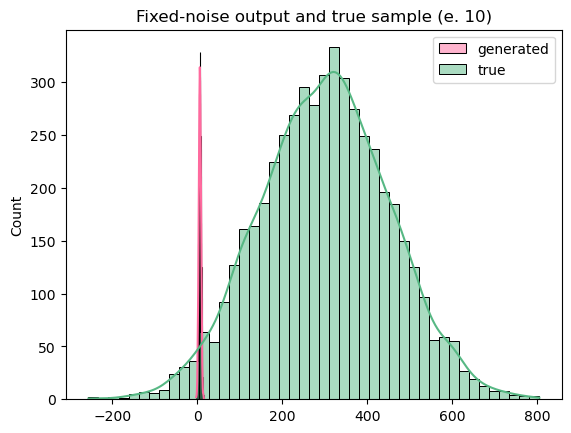

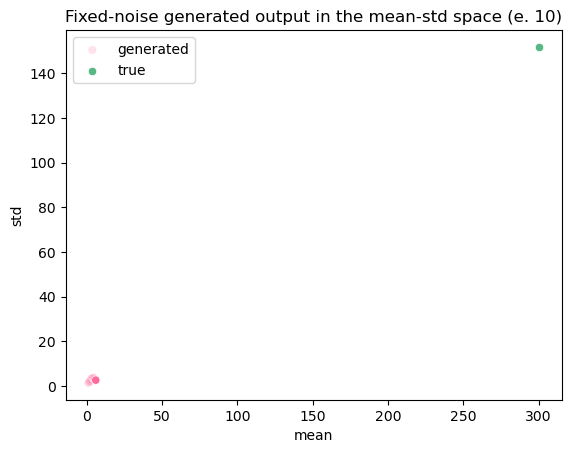

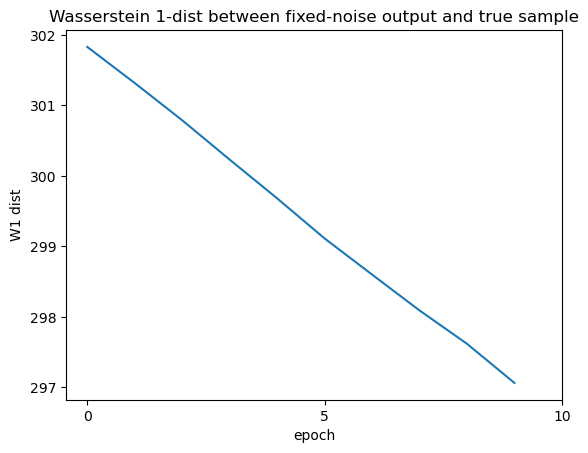

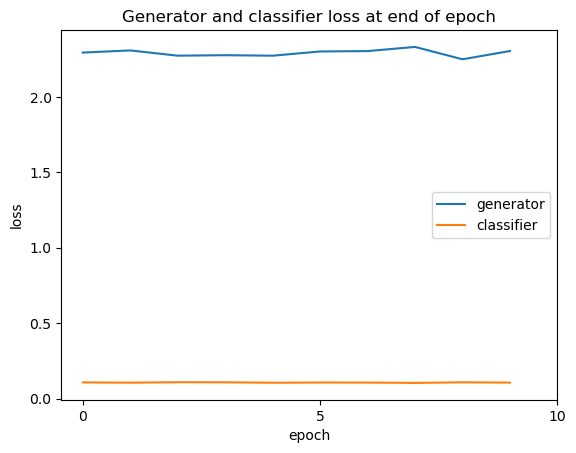

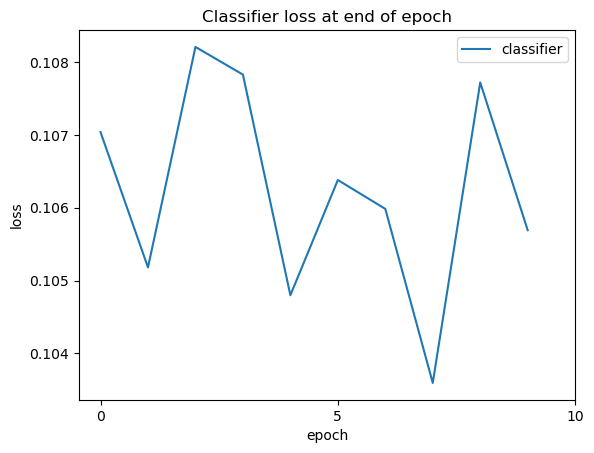

In [406]:
noise_dim = 1
n_dim = 1
samples_per_dist = 5_000

mean = 300
std = 150

ground_dist = distributions.Normal.rand_unf(
    1, noise_dim, mean, std, subclass="normal"
)

ground_dist.sample(samples_per_dist)

ground_sample = ground_dist.samples

n_kme_features = 200
n_features = 200

kme_rff_encoder = RffEncoder(
    n_dim,
    n_kme_features,
    kernel="gaussian",
    log_amplitude=1.0,
    log_length_scale=4.0,
)

reg_rff_encoder = RffEncoder(
    n_kme_features,
    n_features,
    kernel="gaussian",
    log_amplitude=0.0,
    log_length_scale=0.0,
)


noise_dim = n_dim

fixed_noise_dists = distributions.Normal.rand_unf(
    1, noise_dim, 0, 1, subclass="normal"
)
fixed_noise_dists.sample(samples_per_dist)

noise_dists = distributions.Normal.rand_unf(
    1, noise_dim, 0, 1, subclass="normal"
)
noise_dists.sample(samples_per_dist)

gan_dist_set = GanDistributionSet(
    kme_rff_encoder,
    reg_rff_encoder,
    ground_sample,
    noise_dists,
    fixed_noise_dists,
    samples_per_dist,
)

generator = Generator(noise_dim, n_dim, bias=True)
generator_opt = torch.optim.Adam(
    generator.parameters(), lr=0.5, betas=(0.5, 0.999)
)
generator_scheduler = torch.optim.lr_scheduler.ExponentialLR(
    generator_opt, gamma=1.0
)
gen_epochs = 1

classifier_lr = 0.001

train_gan(
    gan_dist_set,
    classifier_lr,
    generator,
    generator_opt,
    generator_scheduler,
    0.1,
    n_features,
    10,
    80,
    gen_epochs,
    verbose=True,
    save_plots=True,
    resample_each_subepoch=False,
    print_output_params=True,
)

#### Learn Gamma - divergence

Classifier train:
    5: loss: 0.622, pred: [0.54, 0.467]
    10: loss: 0.543, pred: [0.584, 0.422]
    15: loss: 0.477, pred: [0.624, 0.382]
    20: loss: 0.42, pred: [0.66, 0.346]
    25: loss: 0.372, pred: [0.692, 0.313]
    30: loss: 0.33, pred: [0.721, 0.283]
    35: loss: 0.293, pred: [0.748, 0.256]
    40: loss: 0.261, pred: [0.772, 0.232]
    45: loss: 0.233, pred: [0.794, 0.21]
    50: loss: 0.209, pred: [0.813, 0.19]
    55: loss: 0.187, pred: [0.831, 0.172]
    60: loss: 0.167, pred: [0.847, 0.155]
    65: loss: 0.15, pred: [0.862, 0.141]
    70: loss: 0.135, pred: [0.875, 0.127]
    75: loss: 0.121, pred: [0.887, 0.115]
    80: loss: 0.109, pred: [0.897, 0.104]
    85: loss: 0.098, pred: [0.907, 0.094]
    90: loss: 0.088, pred: [0.916, 0.085]
    95: loss: 0.08, pred: [0.924, 0.077]
    100: loss: 0.072, pred: [0.931, 0.07]
Generator training: (lr=0.1)
    SE 1: loss: 2.662, pred: 0.07
### Epoch: 1
 train loss = 2.6620, pred = 0.0698, wass_d = 302.8319
output mean: -1.65 s

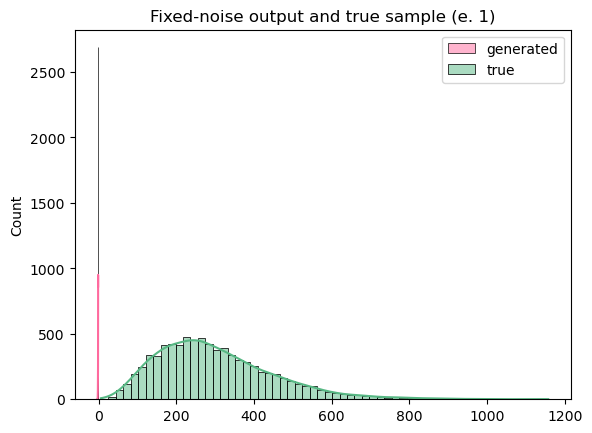

Classifier train:
    5: loss: 0.607, pred: [0.538, 0.447, 0.447]
    10: loss: 0.53, pred: [0.582, 0.404, 0.405]
    15: loss: 0.466, pred: [0.622, 0.366, 0.367]
    20: loss: 0.411, pred: [0.658, 0.331, 0.332]
    25: loss: 0.364, pred: [0.69, 0.299, 0.3]
    30: loss: 0.323, pred: [0.72, 0.271, 0.272]
    35: loss: 0.287, pred: [0.746, 0.245, 0.246]
    40: loss: 0.256, pred: [0.77, 0.221, 0.223]
    45: loss: 0.229, pred: [0.792, 0.2, 0.202]
    50: loss: 0.204, pred: [0.812, 0.181, 0.182]
    55: loss: 0.183, pred: [0.83, 0.164, 0.165]
    60: loss: 0.164, pred: [0.846, 0.148, 0.149]
    65: loss: 0.147, pred: [0.861, 0.134, 0.135]
    70: loss: 0.132, pred: [0.874, 0.122, 0.122]
    75: loss: 0.119, pred: [0.886, 0.11, 0.111]
    80: loss: 0.107, pred: [0.897, 0.099, 0.1]
    85: loss: 0.096, pred: [0.907, 0.09, 0.091]
    90: loss: 0.087, pred: [0.916, 0.081, 0.082]
    95: loss: 0.078, pred: [0.924, 0.074, 0.074]
    100: loss: 0.07, pred: [0.931, 0.067, 0.067]
Generator traini

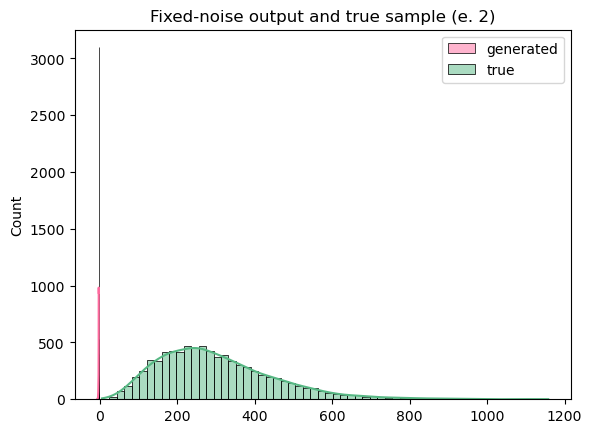

Classifier train:
    5: loss: 0.614, pred: [0.534, 0.45, 0.451, 0.452]
    10: loss: 0.536, pred: [0.578, 0.407, 0.408, 0.409]
    15: loss: 0.471, pred: [0.618, 0.368, 0.369, 0.37]
    20: loss: 0.415, pred: [0.655, 0.333, 0.334, 0.335]
    25: loss: 0.367, pred: [0.688, 0.302, 0.302, 0.303]
    30: loss: 0.326, pred: [0.717, 0.273, 0.273, 0.274]
    35: loss: 0.29, pred: [0.744, 0.247, 0.247, 0.248]
    40: loss: 0.258, pred: [0.769, 0.223, 0.224, 0.225]
    45: loss: 0.231, pred: [0.791, 0.202, 0.202, 0.203]
    50: loss: 0.206, pred: [0.81, 0.183, 0.183, 0.184]
    55: loss: 0.185, pred: [0.828, 0.166, 0.166, 0.167]
    60: loss: 0.166, pred: [0.845, 0.15, 0.15, 0.151]
    65: loss: 0.149, pred: [0.86, 0.136, 0.136, 0.136]
    70: loss: 0.134, pred: [0.873, 0.123, 0.123, 0.123]
    75: loss: 0.12, pred: [0.885, 0.111, 0.111, 0.112]
    80: loss: 0.108, pred: [0.896, 0.101, 0.1, 0.101]
    85: loss: 0.097, pred: [0.906, 0.091, 0.091, 0.091]
    90: loss: 0.088, pred: [0.915, 0.082,

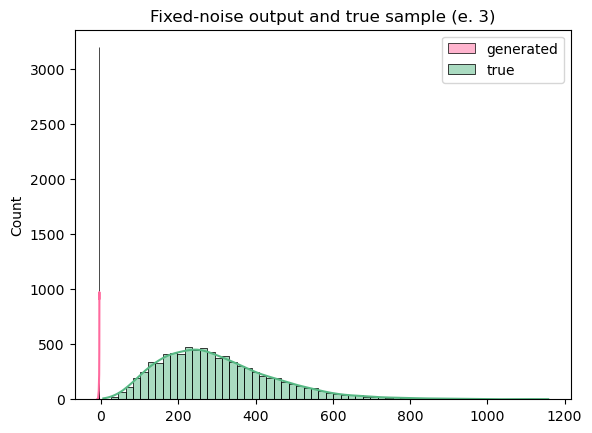

Classifier train:
    5: loss: 0.61, pred: [0.545, 0.459, 0.459, 0.459, 0.459]
    10: loss: 0.533, pred: [0.589, 0.415, 0.415, 0.415, 0.416]
    15: loss: 0.468, pred: [0.628, 0.375, 0.375, 0.376, 0.377]
    20: loss: 0.413, pred: [0.663, 0.34, 0.339, 0.34, 0.341]
    25: loss: 0.366, pred: [0.695, 0.308, 0.307, 0.307, 0.308]
    30: loss: 0.324, pred: [0.724, 0.278, 0.278, 0.278, 0.279]
    35: loss: 0.289, pred: [0.75, 0.252, 0.251, 0.251, 0.253]
    40: loss: 0.257, pred: [0.774, 0.228, 0.227, 0.227, 0.229]
    45: loss: 0.23, pred: [0.796, 0.206, 0.206, 0.206, 0.207]
    50: loss: 0.205, pred: [0.815, 0.187, 0.186, 0.186, 0.187]
    55: loss: 0.184, pred: [0.833, 0.169, 0.168, 0.168, 0.17]
    60: loss: 0.165, pred: [0.849, 0.153, 0.152, 0.152, 0.154]
    65: loss: 0.148, pred: [0.863, 0.139, 0.138, 0.138, 0.139]
    70: loss: 0.133, pred: [0.876, 0.125, 0.125, 0.125, 0.126]
    75: loss: 0.12, pred: [0.888, 0.114, 0.113, 0.113, 0.114]
    80: loss: 0.108, pred: [0.899, 0.103, 0.1

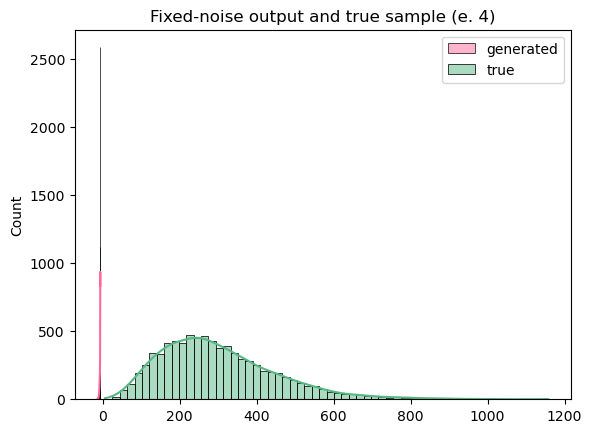

Classifier train:
    5: loss: 0.603, pred: [0.552, 0.457, 0.457, 0.457, 0.457, 0.458]
    10: loss: 0.527, pred: [0.594, 0.414, 0.413, 0.413, 0.413, 0.415]
    15: loss: 0.463, pred: [0.633, 0.375, 0.374, 0.373, 0.374, 0.376]
    20: loss: 0.409, pred: [0.668, 0.339, 0.338, 0.338, 0.338, 0.34]
    25: loss: 0.362, pred: [0.699, 0.307, 0.306, 0.305, 0.306, 0.308]
    30: loss: 0.321, pred: [0.728, 0.278, 0.277, 0.276, 0.276, 0.279]
    35: loss: 0.286, pred: [0.754, 0.252, 0.25, 0.25, 0.25, 0.252]
    40: loss: 0.255, pred: [0.777, 0.228, 0.226, 0.226, 0.226, 0.229]
    45: loss: 0.227, pred: [0.799, 0.207, 0.205, 0.204, 0.204, 0.207]
    50: loss: 0.203, pred: [0.818, 0.187, 0.185, 0.185, 0.185, 0.187]
    55: loss: 0.182, pred: [0.835, 0.169, 0.168, 0.167, 0.167, 0.17]
    60: loss: 0.163, pred: [0.851, 0.153, 0.152, 0.151, 0.151, 0.154]
    65: loss: 0.147, pred: [0.865, 0.139, 0.137, 0.136, 0.137, 0.139]
    70: loss: 0.132, pred: [0.878, 0.126, 0.124, 0.123, 0.124, 0.126]
    75: 

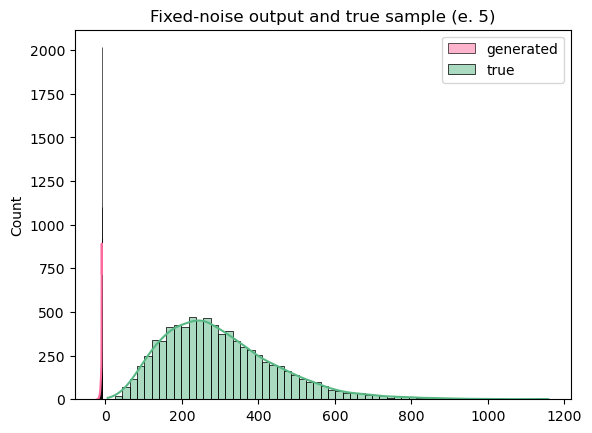

Classifier train:
    5: loss: 0.602, pred: [0.543, 0.448, 0.447, 0.447, 0.447, 0.448, 0.45]
    10: loss: 0.526, pred: [0.587, 0.406, 0.405, 0.404, 0.404, 0.405, 0.408]
    15: loss: 0.462, pred: [0.626, 0.368, 0.366, 0.365, 0.365, 0.366, 0.369]
    20: loss: 0.408, pred: [0.662, 0.333, 0.331, 0.33, 0.33, 0.331, 0.335]
    25: loss: 0.361, pred: [0.694, 0.302, 0.3, 0.299, 0.298, 0.299, 0.303]
    30: loss: 0.321, pred: [0.723, 0.273, 0.271, 0.27, 0.269, 0.27, 0.275]
    35: loss: 0.285, pred: [0.749, 0.248, 0.246, 0.244, 0.243, 0.244, 0.249]
    40: loss: 0.254, pred: [0.773, 0.225, 0.222, 0.221, 0.22, 0.221, 0.226]
    45: loss: 0.227, pred: [0.795, 0.203, 0.201, 0.2, 0.199, 0.2, 0.204]
    50: loss: 0.203, pred: [0.814, 0.184, 0.182, 0.181, 0.18, 0.18, 0.185]
    55: loss: 0.182, pred: [0.832, 0.167, 0.165, 0.163, 0.163, 0.163, 0.168]
    60: loss: 0.163, pred: [0.848, 0.151, 0.149, 0.148, 0.147, 0.147, 0.152]
    65: loss: 0.146, pred: [0.862, 0.137, 0.135, 0.134, 0.133, 0.133, 0.1

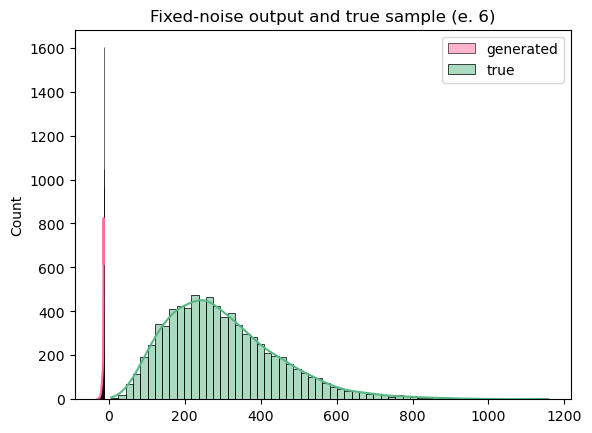

Classifier train:
    5: loss: 0.608, pred: [0.535, 0.447, 0.446, 0.445, 0.445, 0.445, 0.446, 0.449]
    10: loss: 0.532, pred: [0.579, 0.405, 0.404, 0.403, 0.402, 0.401, 0.403, 0.407]
    15: loss: 0.467, pred: [0.619, 0.368, 0.366, 0.364, 0.363, 0.362, 0.364, 0.37]
    20: loss: 0.412, pred: [0.655, 0.333, 0.331, 0.33, 0.328, 0.327, 0.329, 0.335]
    25: loss: 0.364, pred: [0.688, 0.302, 0.3, 0.298, 0.297, 0.296, 0.297, 0.304]
    30: loss: 0.323, pred: [0.718, 0.274, 0.271, 0.27, 0.268, 0.267, 0.269, 0.275]
    35: loss: 0.288, pred: [0.745, 0.248, 0.246, 0.244, 0.242, 0.242, 0.243, 0.25]
    40: loss: 0.257, pred: [0.769, 0.224, 0.222, 0.221, 0.219, 0.218, 0.22, 0.226]
    45: loss: 0.229, pred: [0.791, 0.203, 0.201, 0.2, 0.198, 0.197, 0.199, 0.205]
    50: loss: 0.205, pred: [0.811, 0.184, 0.182, 0.181, 0.179, 0.179, 0.18, 0.185]
    55: loss: 0.183, pred: [0.829, 0.167, 0.165, 0.164, 0.162, 0.162, 0.162, 0.168]
    60: loss: 0.164, pred: [0.845, 0.151, 0.149, 0.148, 0.147, 0.146,

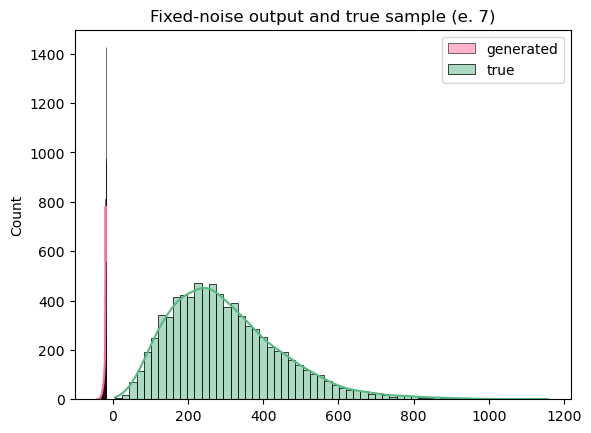

Classifier train:
    5: loss: 0.604, pred: [0.546, 0.454, 0.453, 0.453, 0.452, 0.452, 0.452, 0.453, 0.456]
    10: loss: 0.528, pred: [0.589, 0.411, 0.41, 0.41, 0.409, 0.408, 0.408, 0.409, 0.414]
    15: loss: 0.464, pred: [0.628, 0.373, 0.372, 0.371, 0.37, 0.369, 0.368, 0.37, 0.376]
    20: loss: 0.41, pred: [0.663, 0.338, 0.336, 0.335, 0.334, 0.333, 0.333, 0.334, 0.34]
    25: loss: 0.363, pred: [0.695, 0.306, 0.304, 0.303, 0.303, 0.302, 0.301, 0.302, 0.308]
    30: loss: 0.322, pred: [0.724, 0.277, 0.275, 0.275, 0.274, 0.273, 0.272, 0.273, 0.279]
    35: loss: 0.286, pred: [0.751, 0.25, 0.249, 0.248, 0.248, 0.247, 0.246, 0.247, 0.253]
    40: loss: 0.255, pred: [0.774, 0.226, 0.226, 0.225, 0.224, 0.223, 0.223, 0.224, 0.229]
    45: loss: 0.228, pred: [0.796, 0.205, 0.204, 0.203, 0.203, 0.202, 0.202, 0.202, 0.207]
    50: loss: 0.204, pred: [0.815, 0.185, 0.185, 0.184, 0.184, 0.183, 0.183, 0.183, 0.187]
    55: loss: 0.183, pred: [0.833, 0.168, 0.167, 0.167, 0.166, 0.166, 0.165, 0.1

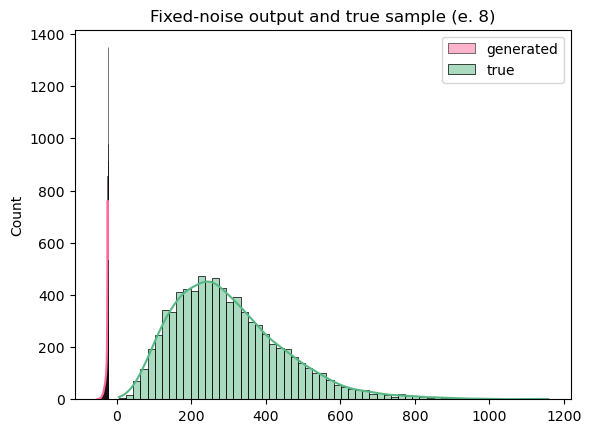

Classifier train:
    5: loss: 0.611, pred: [0.536, 0.448, 0.448, 0.448, 0.448, 0.449, 0.45, 0.453, 0.454, 0.455]
    10: loss: 0.534, pred: [0.58, 0.406, 0.405, 0.405, 0.405, 0.406, 0.407, 0.409, 0.411, 0.413]
    15: loss: 0.469, pred: [0.62, 0.367, 0.367, 0.367, 0.367, 0.367, 0.368, 0.37, 0.371, 0.374]
    20: loss: 0.414, pred: [0.656, 0.332, 0.332, 0.332, 0.332, 0.332, 0.334, 0.335, 0.336, 0.338]
    25: loss: 0.366, pred: [0.689, 0.301, 0.3, 0.3, 0.3, 0.301, 0.302, 0.303, 0.304, 0.306]
    30: loss: 0.325, pred: [0.718, 0.272, 0.272, 0.271, 0.272, 0.272, 0.273, 0.274, 0.275, 0.277]
    35: loss: 0.289, pred: [0.745, 0.246, 0.246, 0.246, 0.246, 0.246, 0.247, 0.248, 0.248, 0.251]
    40: loss: 0.258, pred: [0.769, 0.223, 0.222, 0.222, 0.222, 0.223, 0.224, 0.225, 0.225, 0.227]
    45: loss: 0.23, pred: [0.791, 0.202, 0.201, 0.201, 0.201, 0.202, 0.203, 0.203, 0.203, 0.206]
    50: loss: 0.206, pred: [0.811, 0.183, 0.182, 0.182, 0.182, 0.182, 0.183, 0.184, 0.184, 0.186]
    55: loss: 

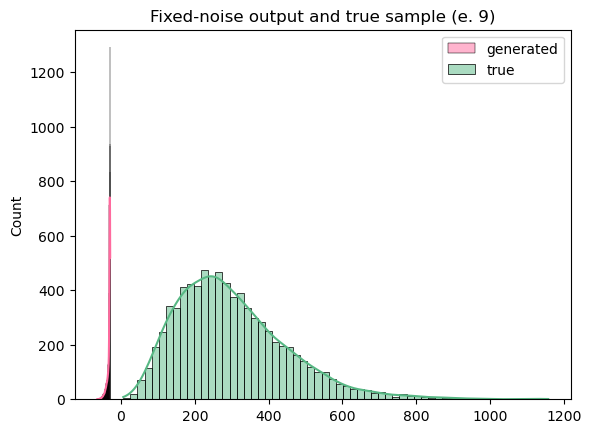

Classifier train:
    5: loss: 0.616, pred: [0.539, 0.457, 0.457, 0.458, 0.458, 0.459, 0.46, 0.46, 0.461, 0.46, 0.461]
    10: loss: 0.538, pred: [0.583, 0.414, 0.414, 0.414, 0.414, 0.415, 0.416, 0.417, 0.417, 0.416, 0.418]
    15: loss: 0.473, pred: [0.623, 0.374, 0.374, 0.374, 0.375, 0.375, 0.377, 0.377, 0.377, 0.376, 0.378]
    20: loss: 0.417, pred: [0.659, 0.339, 0.339, 0.339, 0.339, 0.34, 0.341, 0.342, 0.341, 0.34, 0.342]
    25: loss: 0.369, pred: [0.691, 0.307, 0.306, 0.306, 0.306, 0.307, 0.308, 0.309, 0.309, 0.307, 0.31]
    30: loss: 0.327, pred: [0.72, 0.278, 0.277, 0.277, 0.277, 0.278, 0.279, 0.28, 0.279, 0.278, 0.281]
    35: loss: 0.291, pred: [0.747, 0.251, 0.251, 0.251, 0.251, 0.251, 0.253, 0.254, 0.253, 0.251, 0.254]
    40: loss: 0.259, pred: [0.771, 0.228, 0.227, 0.227, 0.227, 0.227, 0.229, 0.23, 0.229, 0.227, 0.23]
    45: loss: 0.232, pred: [0.793, 0.206, 0.205, 0.205, 0.205, 0.206, 0.207, 0.208, 0.207, 0.205, 0.208]
    50: loss: 0.207, pred: [0.813, 0.187, 0.186,

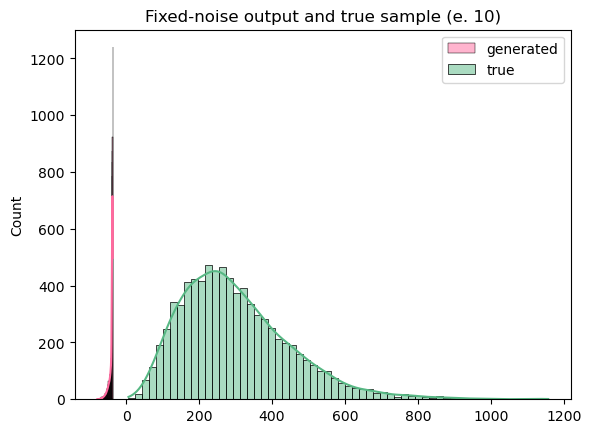

Classifier train:
    5: loss: 0.599, pred: [0.547, 0.449, 0.448, 0.448, 0.447, 0.447, 0.446, 0.446, 0.447, 0.448, 0.45, 0.454]
    10: loss: 0.524, pred: [0.59, 0.406, 0.406, 0.405, 0.404, 0.404, 0.404, 0.404, 0.405, 0.405, 0.406, 0.411]
    15: loss: 0.461, pred: [0.629, 0.368, 0.367, 0.366, 0.366, 0.365, 0.365, 0.366, 0.367, 0.367, 0.366, 0.373]
    20: loss: 0.406, pred: [0.664, 0.333, 0.332, 0.331, 0.331, 0.33, 0.33, 0.332, 0.332, 0.332, 0.331, 0.338]
    25: loss: 0.36, pred: [0.696, 0.302, 0.301, 0.3, 0.299, 0.298, 0.299, 0.3, 0.301, 0.3, 0.299, 0.306]
    30: loss: 0.319, pred: [0.725, 0.274, 0.272, 0.271, 0.27, 0.27, 0.27, 0.272, 0.273, 0.272, 0.27, 0.277]
    35: loss: 0.284, pred: [0.751, 0.248, 0.246, 0.245, 0.244, 0.244, 0.245, 0.246, 0.247, 0.246, 0.244, 0.251]
    40: loss: 0.253, pred: [0.775, 0.224, 0.223, 0.222, 0.221, 0.221, 0.221, 0.223, 0.224, 0.222, 0.22, 0.227]
    45: loss: 0.226, pred: [0.796, 0.203, 0.202, 0.201, 0.2, 0.199, 0.2, 0.202, 0.203, 0.201, 0.199, 0.

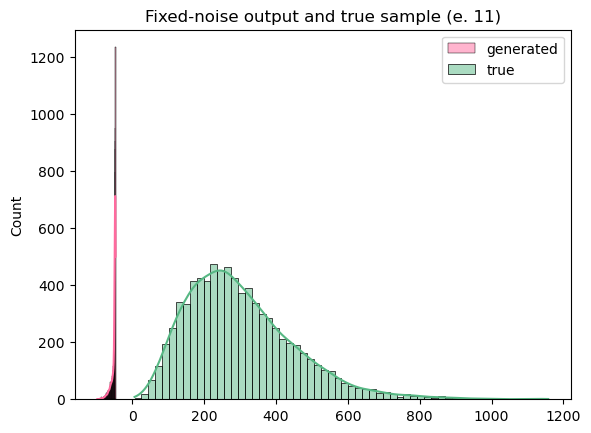

Classifier train:
    5: loss: 0.608, pred: [0.541, 0.455, 0.454, 0.453, 0.452, 0.451, 0.45, 0.449, 0.45, 0.451, 0.452, 0.453, 0.458]
    10: loss: 0.532, pred: [0.585, 0.412, 0.411, 0.41, 0.409, 0.408, 0.407, 0.407, 0.407, 0.408, 0.409, 0.409, 0.415]
    15: loss: 0.467, pred: [0.624, 0.374, 0.372, 0.371, 0.37, 0.368, 0.368, 0.368, 0.369, 0.37, 0.37, 0.369, 0.376]
    20: loss: 0.412, pred: [0.66, 0.339, 0.337, 0.336, 0.334, 0.333, 0.332, 0.333, 0.334, 0.335, 0.335, 0.333, 0.34]
    25: loss: 0.364, pred: [0.692, 0.307, 0.305, 0.304, 0.302, 0.301, 0.3, 0.301, 0.303, 0.304, 0.303, 0.301, 0.308]
    30: loss: 0.323, pred: [0.722, 0.278, 0.276, 0.275, 0.273, 0.272, 0.272, 0.272, 0.274, 0.275, 0.274, 0.272, 0.279]
    35: loss: 0.288, pred: [0.748, 0.252, 0.25, 0.249, 0.247, 0.246, 0.246, 0.246, 0.248, 0.249, 0.248, 0.246, 0.253]
    40: loss: 0.257, pred: [0.772, 0.228, 0.226, 0.225, 0.224, 0.223, 0.222, 0.223, 0.224, 0.225, 0.225, 0.222, 0.229]
    45: loss: 0.229, pred: [0.794, 0.206, 

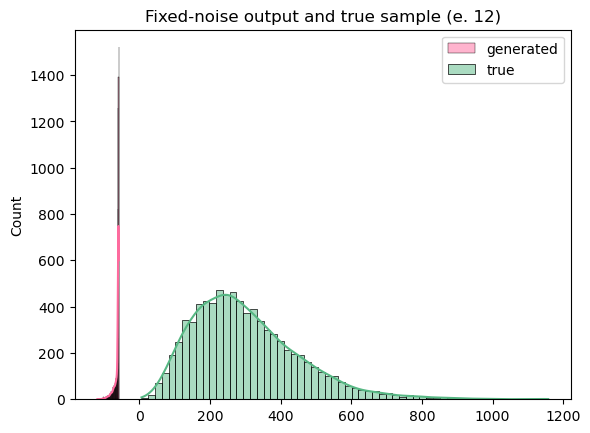

Classifier train:
    5: loss: 0.6, pred: [0.553, 0.457, 0.457, 0.457, 0.457, 0.458, 0.459, 0.46, 0.46, 0.458, 0.455, 0.449, 0.444, 0.445]
    10: loss: 0.525, pred: [0.596, 0.414, 0.414, 0.414, 0.414, 0.414, 0.415, 0.416, 0.416, 0.415, 0.412, 0.406, 0.401, 0.403]
    15: loss: 0.461, pred: [0.634, 0.375, 0.375, 0.374, 0.374, 0.374, 0.375, 0.376, 0.377, 0.376, 0.373, 0.368, 0.362, 0.365]
    20: loss: 0.407, pred: [0.669, 0.34, 0.339, 0.339, 0.338, 0.339, 0.339, 0.341, 0.341, 0.34, 0.337, 0.333, 0.328, 0.331]
    25: loss: 0.36, pred: [0.7, 0.308, 0.307, 0.306, 0.306, 0.306, 0.307, 0.308, 0.309, 0.308, 0.305, 0.301, 0.296, 0.299]
    30: loss: 0.32, pred: [0.729, 0.278, 0.278, 0.277, 0.277, 0.277, 0.278, 0.279, 0.279, 0.278, 0.276, 0.273, 0.268, 0.271]
    35: loss: 0.284, pred: [0.755, 0.252, 0.251, 0.251, 0.25, 0.251, 0.251, 0.253, 0.253, 0.252, 0.25, 0.247, 0.242, 0.245]
    40: loss: 0.254, pred: [0.778, 0.228, 0.227, 0.227, 0.226, 0.227, 0.228, 0.229, 0.229, 0.228, 0.226, 0.224, 0

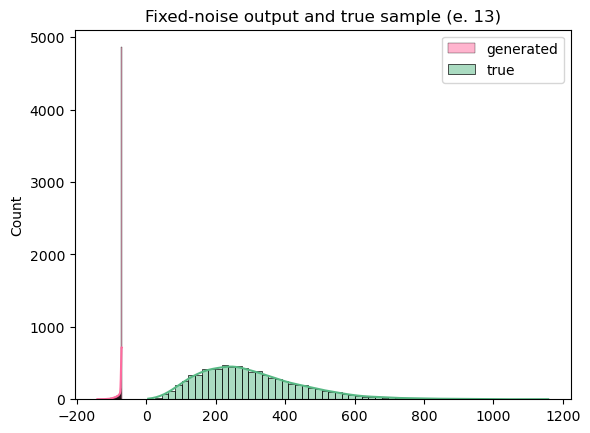

Classifier train:
    5: loss: 0.616, pred: [0.533, 0.453, 0.453, 0.454, 0.454, 0.455, 0.456, 0.457, 0.457, 0.456, 0.454, 0.45, 0.445, 0.443, 0.45]
    10: loss: 0.538, pred: [0.577, 0.41, 0.41, 0.41, 0.411, 0.411, 0.412, 0.414, 0.414, 0.412, 0.41, 0.407, 0.402, 0.4, 0.407]
    15: loss: 0.473, pred: [0.617, 0.372, 0.371, 0.371, 0.371, 0.372, 0.373, 0.374, 0.374, 0.373, 0.371, 0.369, 0.364, 0.362, 0.369]
    20: loss: 0.417, pred: [0.654, 0.337, 0.336, 0.336, 0.336, 0.336, 0.337, 0.339, 0.339, 0.338, 0.336, 0.333, 0.33, 0.327, 0.334]
    25: loss: 0.369, pred: [0.687, 0.305, 0.304, 0.304, 0.304, 0.304, 0.305, 0.307, 0.307, 0.306, 0.304, 0.302, 0.299, 0.296, 0.302]
    30: loss: 0.327, pred: [0.717, 0.276, 0.275, 0.275, 0.275, 0.275, 0.276, 0.278, 0.278, 0.277, 0.275, 0.273, 0.271, 0.268, 0.273]
    35: loss: 0.291, pred: [0.744, 0.25, 0.249, 0.249, 0.248, 0.249, 0.25, 0.251, 0.252, 0.25, 0.248, 0.247, 0.245, 0.242, 0.247]
    40: loss: 0.259, pred: [0.768, 0.226, 0.225, 0.225, 0.225, 0

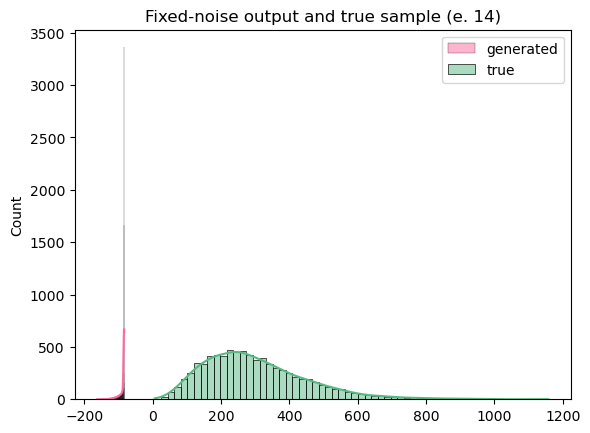

Classifier train:
    5: loss: 0.594, pred: [0.559, 0.463, 0.462, 0.461, 0.459, 0.458, 0.456, 0.454, 0.453, 0.454, 0.455, 0.454, 0.451, 0.446, 0.441, 0.447]
    10: loss: 0.52, pred: [0.601, 0.42, 0.418, 0.417, 0.415, 0.414, 0.412, 0.411, 0.411, 0.411, 0.412, 0.411, 0.408, 0.405, 0.398, 0.405]
    15: loss: 0.457, pred: [0.639, 0.38, 0.378, 0.377, 0.376, 0.374, 0.373, 0.372, 0.372, 0.372, 0.372, 0.371, 0.369, 0.367, 0.36, 0.367]
    20: loss: 0.403, pred: [0.673, 0.344, 0.343, 0.341, 0.34, 0.338, 0.337, 0.337, 0.337, 0.337, 0.337, 0.336, 0.334, 0.332, 0.325, 0.332]
    25: loss: 0.357, pred: [0.704, 0.312, 0.31, 0.309, 0.307, 0.306, 0.305, 0.305, 0.305, 0.305, 0.305, 0.304, 0.302, 0.301, 0.294, 0.3]
    30: loss: 0.317, pred: [0.732, 0.282, 0.281, 0.279, 0.278, 0.277, 0.276, 0.276, 0.276, 0.276, 0.276, 0.275, 0.273, 0.273, 0.266, 0.272]
    35: loss: 0.282, pred: [0.758, 0.256, 0.254, 0.253, 0.251, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.249, 0.247, 0.247, 0.24, 0.246]
    40: loss: 0.25

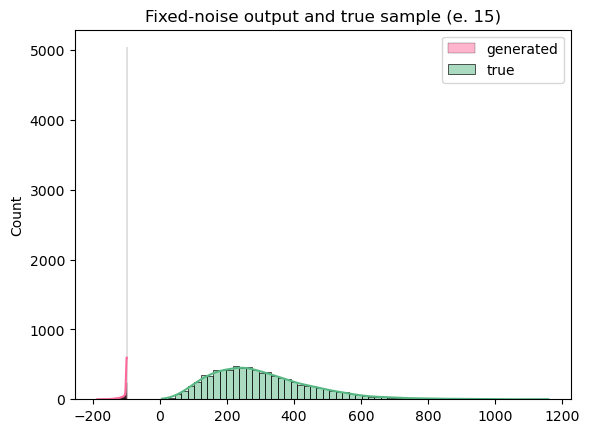

Classifier train:
    5: loss: 0.602, pred: [0.545, 0.453, 0.452, 0.451, 0.451, 0.45, 0.45, 0.451, 0.452, 0.452, 0.45, 0.447, 0.445, 0.448, 0.446, 0.444, 0.451]
    10: loss: 0.526, pred: [0.588, 0.41, 0.409, 0.408, 0.407, 0.407, 0.407, 0.408, 0.409, 0.409, 0.407, 0.404, 0.402, 0.405, 0.404, 0.401, 0.409]
    15: loss: 0.462, pred: [0.628, 0.372, 0.37, 0.369, 0.368, 0.368, 0.368, 0.369, 0.37, 0.37, 0.368, 0.365, 0.364, 0.366, 0.366, 0.362, 0.37]
    20: loss: 0.408, pred: [0.663, 0.337, 0.335, 0.334, 0.333, 0.333, 0.333, 0.334, 0.335, 0.335, 0.333, 0.331, 0.329, 0.331, 0.332, 0.327, 0.335]
    25: loss: 0.361, pred: [0.695, 0.305, 0.303, 0.302, 0.301, 0.301, 0.301, 0.303, 0.304, 0.303, 0.302, 0.299, 0.298, 0.3, 0.3, 0.296, 0.303]
    30: loss: 0.321, pred: [0.724, 0.276, 0.275, 0.273, 0.272, 0.272, 0.272, 0.274, 0.275, 0.274, 0.273, 0.271, 0.27, 0.271, 0.272, 0.268, 0.274]
    35: loss: 0.285, pred: [0.75, 0.25, 0.248, 0.247, 0.246, 0.246, 0.247, 0.248, 0.249, 0.248, 0.247, 0.245, 0.24

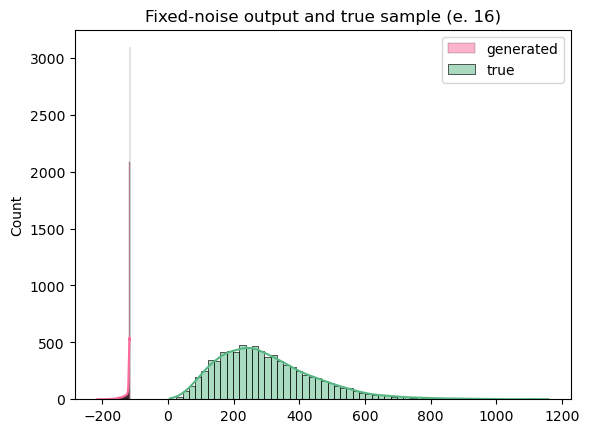

Classifier train:
    5: loss: 0.606, pred: [0.546, 0.454, 0.454, 0.453, 0.453, 0.453, 0.453, 0.453, 0.452, 0.451, 0.451, 0.455, 0.459, 0.459, 0.454, 0.455, 0.463, 0.462]
    10: loss: 0.53, pred: [0.589, 0.411, 0.411, 0.41, 0.41, 0.41, 0.41, 0.409, 0.409, 0.408, 0.409, 0.411, 0.416, 0.416, 0.411, 0.412, 0.419, 0.418]
    15: loss: 0.465, pred: [0.628, 0.372, 0.372, 0.371, 0.371, 0.37, 0.371, 0.371, 0.37, 0.369, 0.37, 0.372, 0.376, 0.376, 0.372, 0.373, 0.379, 0.379]
    20: loss: 0.411, pred: [0.664, 0.337, 0.336, 0.336, 0.335, 0.335, 0.335, 0.335, 0.335, 0.334, 0.334, 0.336, 0.34, 0.341, 0.336, 0.338, 0.343, 0.343]
    25: loss: 0.363, pred: [0.696, 0.305, 0.304, 0.304, 0.303, 0.303, 0.303, 0.304, 0.303, 0.303, 0.302, 0.304, 0.308, 0.308, 0.304, 0.306, 0.31, 0.31]
    30: loss: 0.322, pred: [0.725, 0.277, 0.275, 0.275, 0.274, 0.274, 0.274, 0.275, 0.275, 0.274, 0.274, 0.275, 0.279, 0.279, 0.275, 0.277, 0.28, 0.281]
    35: loss: 0.287, pred: [0.751, 0.25, 0.249, 0.249, 0.248, 0.248, 0.

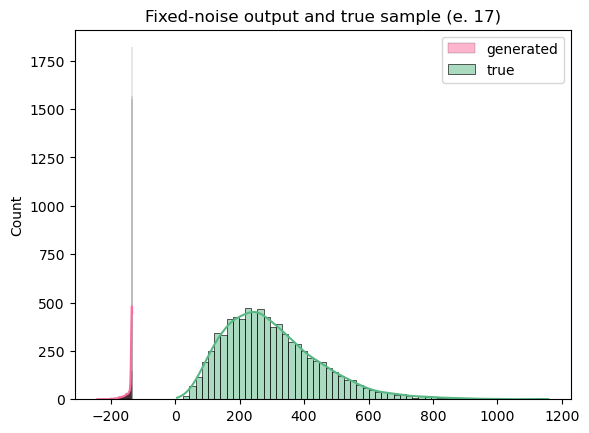

Classifier train:
    5: loss: 0.601, pred: [0.552, 0.46, 0.46, 0.459, 0.458, 0.456, 0.455, 0.453, 0.451, 0.45, 0.45, 0.452, 0.456, 0.459, 0.459, 0.454, 0.452, 0.456, 0.458]
    10: loss: 0.525, pred: [0.595, 0.417, 0.416, 0.415, 0.414, 0.413, 0.411, 0.41, 0.408, 0.407, 0.408, 0.409, 0.412, 0.416, 0.415, 0.41, 0.41, 0.412, 0.414]
    15: loss: 0.461, pred: [0.634, 0.378, 0.377, 0.375, 0.374, 0.373, 0.372, 0.371, 0.37, 0.369, 0.369, 0.37, 0.373, 0.376, 0.376, 0.371, 0.371, 0.373, 0.375]
    20: loss: 0.407, pred: [0.668, 0.342, 0.341, 0.34, 0.339, 0.337, 0.336, 0.335, 0.335, 0.334, 0.334, 0.335, 0.337, 0.341, 0.34, 0.335, 0.336, 0.337, 0.339]
    25: loss: 0.36, pred: [0.7, 0.31, 0.308, 0.307, 0.306, 0.305, 0.304, 0.304, 0.303, 0.302, 0.302, 0.303, 0.305, 0.308, 0.308, 0.303, 0.304, 0.305, 0.307]
    30: loss: 0.32, pred: [0.729, 0.281, 0.279, 0.278, 0.277, 0.276, 0.275, 0.275, 0.274, 0.273, 0.273, 0.274, 0.276, 0.279, 0.278, 0.274, 0.275, 0.276, 0.278]
    35: loss: 0.285, pred: [0.754

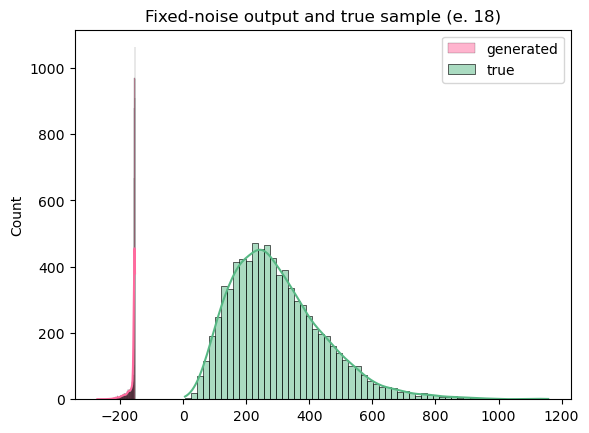

Classifier train:
    5: loss: 0.617, pred: [0.536, 0.465, 0.465, 0.464, 0.464, 0.463, 0.461, 0.459, 0.457, 0.456, 0.457, 0.459, 0.457, 0.453, 0.452, 0.452, 0.451, 0.447, 0.449, 0.454]
    10: loss: 0.539, pred: [0.58, 0.421, 0.421, 0.42, 0.419, 0.418, 0.417, 0.415, 0.414, 0.413, 0.414, 0.415, 0.414, 0.41, 0.409, 0.409, 0.407, 0.405, 0.406, 0.411]
    15: loss: 0.473, pred: [0.62, 0.382, 0.381, 0.38, 0.379, 0.378, 0.377, 0.376, 0.375, 0.374, 0.374, 0.375, 0.374, 0.371, 0.37, 0.37, 0.368, 0.367, 0.367, 0.372]
    20: loss: 0.417, pred: [0.657, 0.346, 0.345, 0.344, 0.343, 0.342, 0.341, 0.34, 0.339, 0.338, 0.339, 0.34, 0.339, 0.335, 0.335, 0.335, 0.333, 0.332, 0.332, 0.337]
    25: loss: 0.369, pred: [0.689, 0.313, 0.312, 0.311, 0.31, 0.309, 0.308, 0.308, 0.307, 0.306, 0.306, 0.307, 0.307, 0.303, 0.303, 0.303, 0.301, 0.301, 0.3, 0.305]
    30: loss: 0.327, pred: [0.719, 0.284, 0.282, 0.281, 0.28, 0.279, 0.279, 0.279, 0.278, 0.277, 0.277, 0.278, 0.277, 0.274, 0.274, 0.275, 0.272, 0.272, 0.

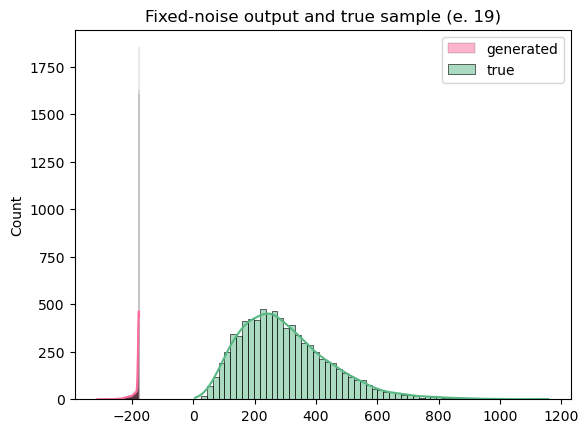

Classifier train:
    5: loss: 0.597, pred: [0.557, 0.452, 0.451, 0.45, 0.45, 0.449, 0.45, 0.451, 0.455, 0.458, 0.459, 0.458, 0.457, 0.463, 0.471, 0.469, 0.462, 0.463, 0.455, 0.448, 0.453]
    10: loss: 0.522, pred: [0.599, 0.409, 0.408, 0.407, 0.407, 0.406, 0.406, 0.408, 0.412, 0.415, 0.415, 0.414, 0.413, 0.419, 0.426, 0.424, 0.418, 0.419, 0.412, 0.405, 0.41]
    15: loss: 0.459, pred: [0.638, 0.371, 0.37, 0.369, 0.368, 0.367, 0.367, 0.37, 0.373, 0.375, 0.376, 0.374, 0.374, 0.379, 0.385, 0.384, 0.378, 0.379, 0.373, 0.367, 0.371]
    20: loss: 0.405, pred: [0.672, 0.336, 0.335, 0.333, 0.332, 0.332, 0.332, 0.335, 0.338, 0.34, 0.34, 0.338, 0.338, 0.343, 0.349, 0.347, 0.342, 0.343, 0.337, 0.332, 0.336]
    25: loss: 0.359, pred: [0.703, 0.305, 0.303, 0.302, 0.3, 0.3, 0.301, 0.303, 0.306, 0.307, 0.307, 0.306, 0.306, 0.311, 0.315, 0.314, 0.31, 0.31, 0.305, 0.3, 0.304]
    30: loss: 0.318, pred: [0.731, 0.276, 0.274, 0.273, 0.272, 0.271, 0.272, 0.274, 0.277, 0.278, 0.278, 0.277, 0.277, 0.281

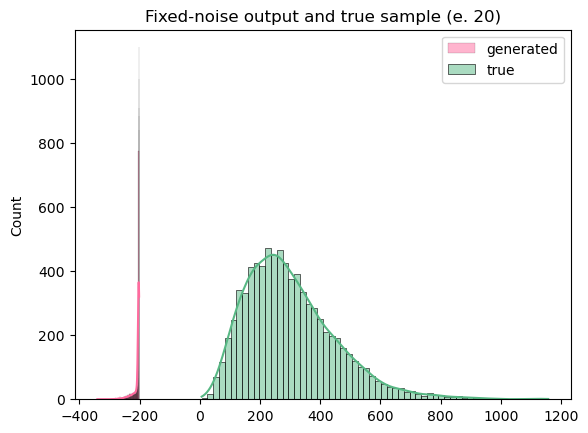

Classifier train:
    5: loss: 0.614, pred: [0.539, 0.462, 0.462, 0.462, 0.463, 0.463, 0.464, 0.464, 0.463, 0.461, 0.457, 0.452, 0.448, 0.45, 0.454, 0.458, 0.461, 0.454, 0.449, 0.45, 0.453, 0.441]
    10: loss: 0.537, pred: [0.583, 0.419, 0.418, 0.418, 0.418, 0.419, 0.419, 0.42, 0.419, 0.417, 0.414, 0.409, 0.405, 0.408, 0.411, 0.414, 0.417, 0.411, 0.406, 0.408, 0.409, 0.4]
    15: loss: 0.471, pred: [0.622, 0.379, 0.379, 0.378, 0.378, 0.378, 0.379, 0.38, 0.38, 0.378, 0.374, 0.37, 0.366, 0.369, 0.372, 0.374, 0.378, 0.372, 0.367, 0.369, 0.37, 0.362]
    20: loss: 0.416, pred: [0.658, 0.344, 0.343, 0.342, 0.342, 0.342, 0.343, 0.344, 0.344, 0.342, 0.339, 0.334, 0.331, 0.334, 0.337, 0.339, 0.342, 0.337, 0.332, 0.334, 0.335, 0.327]
    25: loss: 0.368, pred: [0.691, 0.311, 0.31, 0.31, 0.309, 0.309, 0.31, 0.311, 0.311, 0.31, 0.306, 0.302, 0.3, 0.302, 0.305, 0.306, 0.309, 0.305, 0.3, 0.302, 0.303, 0.296]
    30: loss: 0.326, pred: [0.72, 0.282, 0.281, 0.28, 0.28, 0.28, 0.28, 0.282, 0.282, 0.28

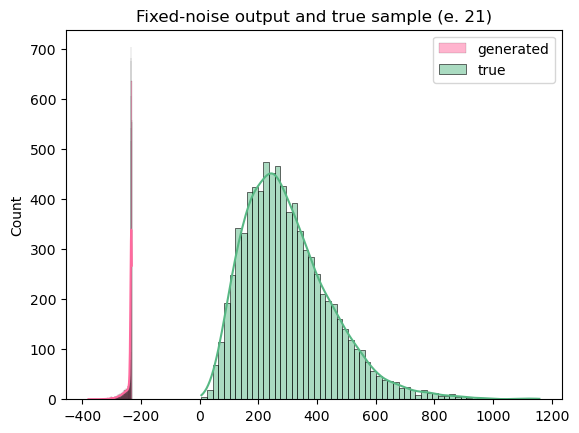

Classifier train:
    5: loss: 0.61, pred: [0.543, 0.447, 0.447, 0.447, 0.447, 0.449, 0.451, 0.454, 0.457, 0.458, 0.457, 0.453, 0.448, 0.445, 0.45, 0.459, 0.462, 0.462, 0.464, 0.466, 0.467, 0.467, 0.481]
    10: loss: 0.533, pred: [0.586, 0.405, 0.405, 0.404, 0.405, 0.405, 0.407, 0.411, 0.414, 0.415, 0.414, 0.41, 0.405, 0.403, 0.408, 0.415, 0.418, 0.418, 0.42, 0.421, 0.423, 0.422, 0.435]
    15: loss: 0.468, pred: [0.626, 0.367, 0.366, 0.366, 0.366, 0.366, 0.368, 0.372, 0.375, 0.376, 0.375, 0.371, 0.366, 0.365, 0.369, 0.376, 0.378, 0.378, 0.38, 0.381, 0.382, 0.382, 0.394]
    20: loss: 0.413, pred: [0.661, 0.333, 0.332, 0.331, 0.331, 0.331, 0.333, 0.336, 0.339, 0.34, 0.339, 0.335, 0.331, 0.331, 0.334, 0.34, 0.343, 0.342, 0.344, 0.345, 0.346, 0.346, 0.356]
    25: loss: 0.366, pred: [0.693, 0.301, 0.3, 0.299, 0.299, 0.299, 0.301, 0.304, 0.307, 0.308, 0.307, 0.303, 0.3, 0.299, 0.302, 0.308, 0.31, 0.31, 0.311, 0.312, 0.313, 0.313, 0.322]
    30: loss: 0.324, pred: [0.723, 0.273, 0.272, 0.

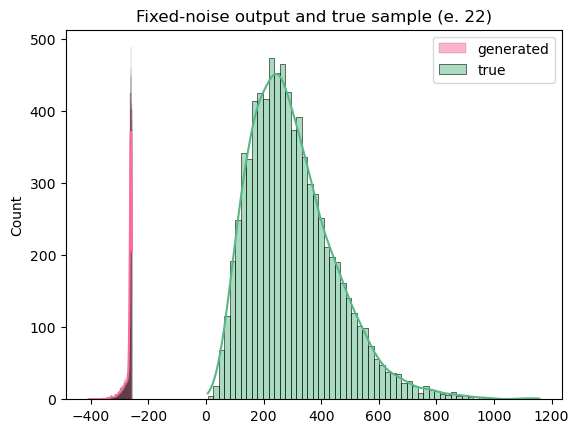

Classifier train:
    5: loss: 0.604, pred: [0.544, 0.451, 0.45, 0.45, 0.45, 0.45, 0.451, 0.453, 0.455, 0.458, 0.458, 0.455, 0.448, 0.443, 0.441, 0.442, 0.447, 0.45, 0.448, 0.454, 0.456, 0.463, 0.456, 0.451]
    10: loss: 0.528, pred: [0.588, 0.408, 0.408, 0.407, 0.407, 0.407, 0.408, 0.41, 0.412, 0.415, 0.415, 0.411, 0.405, 0.401, 0.399, 0.4, 0.405, 0.407, 0.405, 0.411, 0.412, 0.419, 0.412, 0.408]
    15: loss: 0.464, pred: [0.627, 0.37, 0.369, 0.368, 0.368, 0.368, 0.369, 0.371, 0.374, 0.375, 0.375, 0.372, 0.366, 0.363, 0.361, 0.361, 0.366, 0.369, 0.366, 0.372, 0.373, 0.379, 0.373, 0.369]
    20: loss: 0.409, pred: [0.662, 0.335, 0.334, 0.333, 0.333, 0.333, 0.333, 0.336, 0.338, 0.34, 0.34, 0.336, 0.332, 0.329, 0.327, 0.327, 0.331, 0.334, 0.331, 0.337, 0.337, 0.343, 0.337, 0.334]
    25: loss: 0.362, pred: [0.694, 0.304, 0.302, 0.302, 0.301, 0.301, 0.302, 0.304, 0.306, 0.308, 0.307, 0.304, 0.3, 0.298, 0.295, 0.296, 0.3, 0.302, 0.3, 0.305, 0.305, 0.31, 0.305, 0.302]
    30: loss: 0.322, 

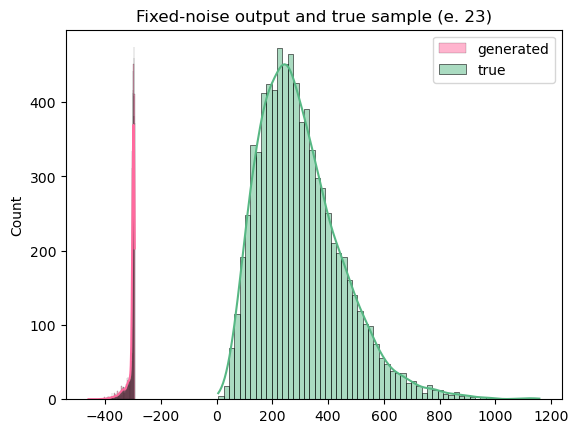

Classifier train:
    5: loss: 0.604, pred: [0.551, 0.459, 0.458, 0.458, 0.457, 0.456, 0.456, 0.458, 0.461, 0.466, 0.471, 0.473, 0.469, 0.464, 0.459, 0.457, 0.46, 0.458, 0.448, 0.448, 0.442, 0.449, 0.45, 0.458, 0.463]
    10: loss: 0.528, pred: [0.594, 0.416, 0.415, 0.414, 0.413, 0.413, 0.413, 0.414, 0.418, 0.422, 0.426, 0.428, 0.424, 0.42, 0.416, 0.413, 0.417, 0.415, 0.405, 0.405, 0.4, 0.406, 0.407, 0.414, 0.419]
    15: loss: 0.464, pred: [0.633, 0.377, 0.376, 0.375, 0.374, 0.373, 0.373, 0.375, 0.378, 0.382, 0.386, 0.387, 0.384, 0.38, 0.376, 0.374, 0.377, 0.376, 0.366, 0.367, 0.362, 0.368, 0.368, 0.375, 0.379]
    20: loss: 0.41, pred: [0.667, 0.341, 0.34, 0.339, 0.338, 0.337, 0.337, 0.339, 0.342, 0.346, 0.349, 0.35, 0.347, 0.344, 0.34, 0.338, 0.341, 0.34, 0.331, 0.332, 0.327, 0.333, 0.333, 0.339, 0.343]
    25: loss: 0.362, pred: [0.699, 0.309, 0.308, 0.307, 0.306, 0.305, 0.305, 0.307, 0.31, 0.313, 0.316, 0.316, 0.314, 0.312, 0.308, 0.306, 0.309, 0.308, 0.3, 0.3, 0.296, 0.301, 0.302

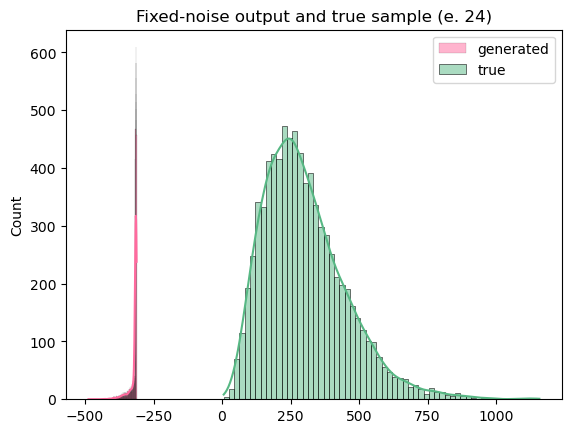

Classifier train:
    5: loss: 0.602, pred: [0.547, 0.444, 0.444, 0.445, 0.446, 0.447, 0.45, 0.453, 0.456, 0.458, 0.459, 0.458, 0.456, 0.453, 0.45, 0.448, 0.449, 0.453, 0.459, 0.463, 0.453, 0.453, 0.447, 0.453, 0.451, 0.443]
    10: loss: 0.526, pred: [0.59, 0.402, 0.402, 0.402, 0.403, 0.404, 0.407, 0.41, 0.413, 0.415, 0.415, 0.414, 0.413, 0.41, 0.407, 0.405, 0.407, 0.41, 0.415, 0.419, 0.409, 0.41, 0.404, 0.41, 0.408, 0.4]
    15: loss: 0.462, pred: [0.629, 0.364, 0.364, 0.364, 0.364, 0.366, 0.368, 0.371, 0.374, 0.375, 0.375, 0.375, 0.374, 0.371, 0.368, 0.366, 0.368, 0.371, 0.375, 0.379, 0.37, 0.371, 0.366, 0.371, 0.369, 0.362]
    20: loss: 0.408, pred: [0.665, 0.33, 0.329, 0.329, 0.33, 0.331, 0.333, 0.336, 0.338, 0.34, 0.34, 0.339, 0.338, 0.336, 0.333, 0.331, 0.333, 0.336, 0.34, 0.343, 0.335, 0.336, 0.331, 0.335, 0.334, 0.328]
    25: loss: 0.361, pred: [0.697, 0.299, 0.298, 0.298, 0.298, 0.299, 0.301, 0.304, 0.306, 0.307, 0.307, 0.306, 0.306, 0.304, 0.301, 0.3, 0.301, 0.304, 0.307, 

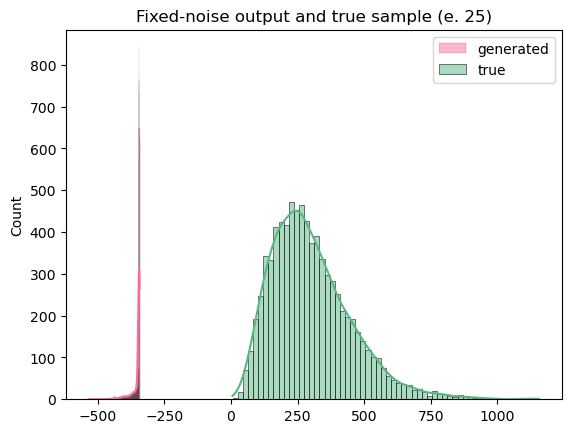

Classifier train:
    5: loss: 0.595, pred: [0.558, 0.457, 0.456, 0.455, 0.454, 0.452, 0.451, 0.449, 0.449, 0.45, 0.452, 0.454, 0.455, 0.454, 0.451, 0.447, 0.446, 0.45, 0.454, 0.447, 0.457, 0.46, 0.465, 0.46, 0.457, 0.452, 0.471]
    10: loss: 0.52, pred: [0.6, 0.415, 0.413, 0.412, 0.41, 0.409, 0.407, 0.407, 0.407, 0.408, 0.409, 0.411, 0.412, 0.411, 0.408, 0.404, 0.404, 0.407, 0.41, 0.404, 0.413, 0.417, 0.42, 0.416, 0.415, 0.408, 0.426]
    15: loss: 0.457, pred: [0.638, 0.376, 0.374, 0.373, 0.371, 0.369, 0.368, 0.368, 0.368, 0.369, 0.37, 0.371, 0.373, 0.372, 0.369, 0.366, 0.365, 0.369, 0.371, 0.366, 0.374, 0.377, 0.38, 0.376, 0.375, 0.369, 0.386]
    20: loss: 0.404, pred: [0.672, 0.34, 0.339, 0.337, 0.335, 0.334, 0.333, 0.333, 0.334, 0.334, 0.335, 0.336, 0.337, 0.337, 0.334, 0.331, 0.331, 0.334, 0.336, 0.331, 0.338, 0.341, 0.344, 0.341, 0.34, 0.334, 0.349]
    25: loss: 0.357, pred: [0.703, 0.308, 0.306, 0.305, 0.303, 0.302, 0.301, 0.301, 0.302, 0.303, 0.303, 0.304, 0.305, 0.305, 0.3

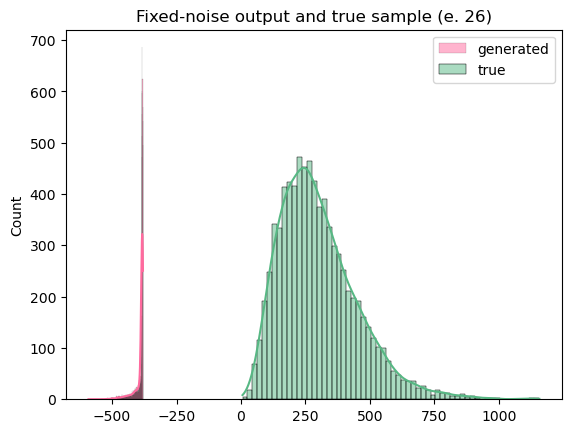

Classifier train:
    5: loss: 0.603, pred: [0.547, 0.454, 0.454, 0.454, 0.454, 0.454, 0.455, 0.456, 0.457, 0.457, 0.455, 0.452, 0.45, 0.448, 0.446, 0.446, 0.452, 0.452, 0.45, 0.449, 0.452, 0.456, 0.452, 0.451, 0.455, 0.449, 0.456, 0.46]
    10: loss: 0.527, pred: [0.59, 0.412, 0.411, 0.411, 0.41, 0.411, 0.411, 0.413, 0.414, 0.414, 0.412, 0.409, 0.407, 0.406, 0.403, 0.403, 0.409, 0.409, 0.407, 0.407, 0.409, 0.413, 0.409, 0.407, 0.412, 0.406, 0.413, 0.416]
    15: loss: 0.463, pred: [0.629, 0.373, 0.372, 0.372, 0.371, 0.371, 0.372, 0.374, 0.375, 0.375, 0.373, 0.369, 0.368, 0.368, 0.365, 0.364, 0.37, 0.37, 0.369, 0.368, 0.37, 0.373, 0.37, 0.369, 0.373, 0.367, 0.374, 0.376]
    20: loss: 0.409, pred: [0.664, 0.338, 0.337, 0.336, 0.335, 0.335, 0.336, 0.338, 0.34, 0.34, 0.337, 0.334, 0.333, 0.333, 0.33, 0.33, 0.335, 0.335, 0.334, 0.333, 0.335, 0.338, 0.335, 0.333, 0.338, 0.332, 0.338, 0.341]
    25: loss: 0.362, pred: [0.696, 0.306, 0.305, 0.304, 0.303, 0.303, 0.304, 0.306, 0.308, 0.308, 0.

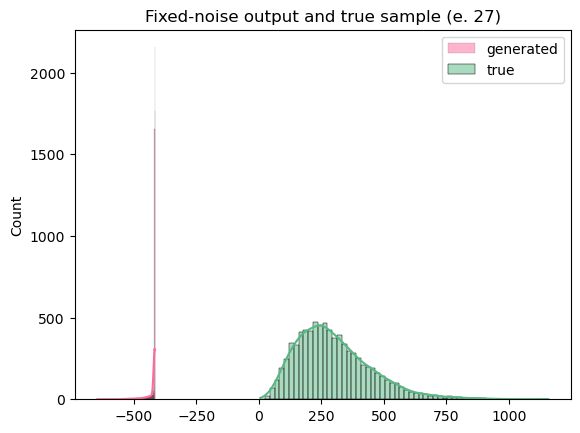

Classifier train:
    5: loss: 0.613, pred: [0.543, 0.46, 0.459, 0.458, 0.457, 0.456, 0.455, 0.453, 0.453, 0.452, 0.452, 0.454, 0.458, 0.463, 0.464, 0.464, 0.471, 0.465, 0.465, 0.472, 0.47, 0.463, 0.456, 0.459, 0.461, 0.453, 0.45, 0.462, 0.458]
    10: loss: 0.536, pred: [0.586, 0.417, 0.416, 0.415, 0.413, 0.412, 0.411, 0.41, 0.41, 0.41, 0.41, 0.41, 0.414, 0.42, 0.419, 0.419, 0.427, 0.42, 0.421, 0.428, 0.425, 0.419, 0.412, 0.416, 0.418, 0.409, 0.408, 0.418, 0.414]
    15: loss: 0.47, pred: [0.626, 0.378, 0.376, 0.375, 0.374, 0.372, 0.371, 0.371, 0.371, 0.371, 0.371, 0.371, 0.375, 0.38, 0.379, 0.379, 0.387, 0.38, 0.381, 0.387, 0.384, 0.379, 0.373, 0.376, 0.378, 0.37, 0.369, 0.378, 0.375]
    20: loss: 0.415, pred: [0.661, 0.343, 0.341, 0.339, 0.338, 0.336, 0.336, 0.336, 0.336, 0.336, 0.335, 0.335, 0.339, 0.344, 0.343, 0.343, 0.35, 0.344, 0.345, 0.35, 0.348, 0.343, 0.338, 0.34, 0.342, 0.335, 0.334, 0.342, 0.339]
    25: loss: 0.367, pred: [0.694, 0.31, 0.309, 0.307, 0.305, 0.304, 0.303, 

KeyboardInterrupt: 

In [404]:
from distreg.models.generator import GeneratorSimple


n_dim = 1
samples_per_dist = 8_000

mean = 300
std = 150

true_pdf = utils.gamma_pdf(mean, std)

ground_dist = distributions.Normal.rand_unf(
    1, n_dim, mean, std, subclass="gamma"
)
ground_dist.sample(samples_per_dist)

ground_sample = ground_dist.samples

n_kme_features = 400
n_features = 400

kme_rff_encoder = RffEncoder(
    n_dim,
    n_kme_features,
    kernel="gaussian",
    log_amplitude=1.0,
    log_length_scale=4.0,
)

reg_rff_encoder = RffEncoder(
    n_kme_features,
    n_features,
    kernel="gaussian",
    log_amplitude=0.0,
    log_length_scale=0.0,
)


noise_dim = n_dim
n_noise_dists = 1

fixed_noise_dists = distributions.Normal.rand_unf(
    1, noise_dim, 0, 1, subclass="normal"
)
fixed_noise_dists.sample(samples_per_dist)

noise_dists = distributions.Normal.rand_unf(
    n_noise_dists, noise_dim, 0, 1, subclass="normal"
)
noise_dists.sample(samples_per_dist)

gan_dist_set = GanDistributionSet(
    kme_rff_encoder,
    reg_rff_encoder,
    ground_sample,
    noise_dists,
    fixed_noise_dists,
    samples_per_dist,
)

classifier_lr = 0.001

generator = GeneratorSimple(noise_dim, n_dim, bias=True)
generator_opt = torch.optim.Adam(
    generator.parameters(), lr=0.1, betas=(0.5, 0.999)
)
generator_scheduler = torch.optim.lr_scheduler.ExponentialLR(
    generator_opt, gamma=0.98
)
gen_epochs = 1

train_gan(
    gan_dist_set,
    classifier_lr,
    generator,
    generator_opt,
    generator_scheduler,
    0.15,
    n_features,
    100,
    100,
    gen_epochs,
    verbose=True,
    save_plots=True,
    resample_each_subepoch=True,
)